In [2]:
#%matplotlib inline # set backend option to inline
%matplotlib notebook 
# set backend option for interactive plotting

import matplotlib 
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import os
import os.path as osp
import numpy as np
import pandas as pd
import json


In [3]:
from datetime import datetime , timedelta, date
import pytz
#print(datetime.utcfromtimestamp(1492043679))   #2017-04-13 00:34:39
#print(datetime.utcfromtimestamp(1492372131))   #2017-04-16 19:48:51
#print(datetime.strptime("170416-194851", "%y%m%d-%H%M%S"))   #2017-04-16 19:48:51

f_utc2ts_naive = lambda t: datetime.timestamp(datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
g_utc2ts_naive = lambda t: datetime.timestamp(datetime.strptime(t, '%b %d, %Y, %I:%M:%S %p'))

f_utc2dt_naive = lambda t: (datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
g_utc2dt_naive = lambda t: (datetime.strptime(t, '%b %d, %Y, %I:%M:%S %p'))


#time zone aware datetime 
Time_Zone_US_E = pytz.timezone('US/Eastern')
f_utc2ts_timezone = lambda t: datetime.timestamp(datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
g_utc2ts_timezone= lambda t: datetime.timestamp(datetime.strptime(t, '%b %d, %Y, %I:%M:%S %p'))

f_utc2dt_timezone = lambda t: (datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
g_utc2dt_timezone = lambda t: (datetime.strptime(t, '%b %d, %Y, %I:%M:%S %p'))

In [10]:
import pytz
pst = pytz.timezone('US/Eastern')
d = datetime.fromtimestamp(1.491404e+09)
print(d)
print(d.astimezone(pst))
d1 = datetime.utcfromtimestamp(1.491404e+09)
print(d1)
print(d1.astimezone(pst))

2017-04-05 19:53:20
2017-04-05 10:53:20-04:00
2017-04-05 14:53:20
2017-04-05 05:53:20-04:00


In [13]:
timezone_startTime=(datetime.utcfromtimestamp(float(1.491404e+09))).astimezone(pst)
print(timezone_startTime)

2017-04-05 05:53:20-04:00


In [3]:
from datetime import datetime
import pytz
pst = pytz.timezone('US/Eastern')
d = datetime.utcfromtimestamp(1.491404e+09)
# print(d)
s='2017-04-28 09:30:14'
datetime_object = datetime.strptime(s, '%Y-%m-%d %H:%M:%S').astimezone(pst)
print(datetime_object)
# add timezone info
# d = pytz.UTC.localize(d)
# s = pytz.UTC.localize(s)
print('another s')
print(s)
# >>> datetime.datetime(2017, 9, 13, 17, 53, 37, tzinfo=<UTC>)
# pst = pytz.timezone('US/Eastern')
# print(d.astimezone(pst))

ts=1.491404e+09
r=lambda ts: pytz.UTC.localize(datetime.utcfromtimestamp(ts))

2017-04-28 00:30:14-04:00
another s
2017-04-28 09:30:14


In [4]:
ts=1492043679
startTime = pd.to_datetime(float(ts),unit="s")
r=lambda ts: pytz.UTC.localize(datetime.utcfromtimestamp(ts)).astimezone(pst)
timezone_startTime=pytz.UTC.localize(datetime.utcfromtimestamp(float(ts))).astimezone(pst)
print(timezone_startTime)
print(startTime)

2017-04-12 20:34:39-04:00
2017-04-13 00:34:39


In [5]:
dpd_dir=os.getcwd()
dpd_n='subject_diary_data-migraine-app-6a5b55f9-423f-463a-a345-3b268a63a8e9-export.json'
#print(dpd_dir)

dpd_path=os.path.join(dpd_dir, dpd_n)
#print("Does the file path exist?: ",os.path.exists(dpd_path))
#print("Do I have read access to the file?: ",os.access(dpd_path, os.R_OK))

#Read json file using pd
dpd=pd.read_json(dpd_path)
#print(dpd.shape)

# The timestamps are labeled as columns. Change to rows
dpd=dpd.transpose()
# Convert row indices, which are time stamps, to a dataframe column
dpd.reset_index(inplace = True)
#print(dpd.shape, dpd.head())dpd['ts_diary'] = dpd['dt_diary'].map(datetime.timestamp)

###################################################################################
# Change column name 'index' to 'dt_diary'
#....................................................................................
#print(dpd.index)   # RangeIndex(start=0, stop=92, step=1)
#print(dpd[['index']].dtypes)  #index    datetime64[ns]  #dtype: object
#print(dpd[['index']].columns[0])   #index
#print(dpd.columns)  # Index(['index', 'HADMIGRAINE', 'HELPMIGRAINETODAY', 'LURKINGMIGRAINE','MIGRAINEEND', 'MIGRAINESEVERITY', 'MIGRAINESTART','SLEEPDURATIONHOURS', 'SLEEPDURATIONMINUTES', 'SLEEPQUALITY','STRESSLEVEL', 'SYMPTOMSTODAY', 'TRIGGERSTODAY'],dtype='object')
#....................................................................................
x = list(dpd.columns); #print(x)  # ['index', 'HADMIGRAINE', 'HELPMIGRAINETODAY', 'LURKINGMIGRAINE', 'MIGRAINEEND', 'MIGRAINESEVERITY', 'MIGRAINESTART', 'SLEEPDURATIONHOURS', 'SLEEPDURATIONMINUTES', 'SLEEPQUALITY', 'STRESSLEVEL', 'SYMPTOMSTODAY', 'TRIGGERSTODAY']
x[0] = 'dt_diary' ; #print(x) # ['dt_diary', 'HADMIGRAINE', 'HELPMIGRAINETODAY', 'LURKINGMIGRAINE', 'MIGRAINEEND', 'MIGRAINESEVERITY', 'MIGRAINESTART', 'SLEEPDURATIONHOURS', 'SLEEPDURATIONMINUTES', 'SLEEPQUALITY', 'STRESSLEVEL', 'SYMPTOMSTODAY', 'TRIGGERSTODAY']
dpd.columns = x ; #print(dpd.columns) # Index(['dt_diary', 'HADMIGRAINE', 'HELPMIGRAINETODAY', 'LURKINGMIGRAINE', 'MIGRAINEEND', 'MIGRAINESEVERITY', 'MIGRAINESTART', 'SLEEPDURATIONHOURS', 'SLEEPDURATIONMINUTES', 'SLEEPQUALITY', 'STRESSLEVEL', 'SYMPTOMSTODAY', 'TRIGGERSTODAY'], dtype='object')
print(dpd.head(2))


             dt_diary HADMIGRAINE HELPMIGRAINETODAY LURKINGMIGRAINE  \
0 2017-04-21 19:23:19       False               NaN              No   
1 2017-04-21 20:45:56       False     [Meditation ]              No   

  MIGRAINEEND MIGRAINESEVERITY MIGRAINESTART SLEEPDURATIONHOURS  \
0         NaN              NaN           NaN                  7   
1         NaN              NaN           NaN                  7   

  SLEEPDURATIONMINUTES SLEEPQUALITY STRESSLEVEL  \
0                   15            3           2   
1                                 3           2   

                     SYMPTOMSTODAY                         TRIGGERSTODAY  
0                              NaN                                   NaN  
1  [Dizziness, Fatigue, Body Pain]  [Drop in Barometric Pressure, Smoke]  


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [6]:
# Diary entries are not in chronological order. So sort
dpd.sort_values(by = 'dt_diary', inplace = True)
# The row index/labels are maintained, so reset
dpd.reset_index(inplace = True)
#print(dpd['index'])
# Finally, drop the column with the old row indices/labels
dpd.drop(['index'], axis = 1, inplace = True)
#dpd[12:30]

In [7]:
r=lambda ts: pytz.UTC.localize(ts)
# # pytz.UTC.localize(d)
dpd['dt_diary_tz']=dpd['dt_diary'].map(r)

In [8]:
dpd['dt_diary_tz']

0    2017-04-21 19:23:19+00:00
1    2017-04-21 20:45:56+00:00
2    2017-04-22 13:56:02+00:00
3    2017-04-22 23:15:33+00:00
4    2017-04-23 21:23:50+00:00
5    2017-04-24 23:16:57+00:00
6    2017-04-25 22:15:56+00:00
7    2017-04-26 21:17:02+00:00
8    2017-04-27 23:11:28+00:00
9    2017-04-27 23:12:38+00:00
10   2017-04-28 21:30:55+00:00
11   2017-04-29 22:57:20+00:00
12   2017-05-01 21:35:23+00:00
13   2017-05-02 22:17:19+00:00
14   2017-05-03 22:03:26+00:00
15   2017-05-04 18:15:42+00:00
16   2017-05-06 22:23:45+00:00
17   2017-05-07 23:31:08+00:00
18   2017-05-08 23:54:25+00:00
19   2017-05-09 17:21:31+00:00
20   2017-05-10 23:24:29+00:00
21   2017-05-11 23:03:11+00:00
22   2017-05-12 22:04:44+00:00
23   2017-05-13 22:29:55+00:00
24   2017-05-14 23:51:58+00:00
25   2017-05-15 23:54:08+00:00
26   2017-05-16 23:46:42+00:00
27   2017-05-17 22:06:49+00:00
28   2017-05-18 21:53:30+00:00
29   2017-05-19 22:33:46+00:00
                ...           
62   2017-06-23 22:10:03+00:00
63   201

In [9]:
dpd['MIGRAINESTART_TimeZone'] = (dpd['MIGRAINESTART'].loc[ dpd['MIGRAINESTART'].notnull() ]).map(g_utc2dt_timezone)
dpd['MIGRAINEEND_TimeZone'] = (dpd['MIGRAINEEND'].loc[ dpd['MIGRAINEEND'].notnull() ]).map(g_utc2dt_timezone)

In [10]:
dpd['MIGRAINESTART_TimeZone'].loc[ dpd['MIGRAINESTART_TimeZone'].notnull()]

10   2017-04-28 09:30:14
19   2017-05-09 13:30:57
23   2017-05-13 13:30:08
32   2017-05-23 17:00:06
34   2017-05-25 17:30:09
38   2017-05-30 11:30:42
39   2017-05-31 10:30:14
43   2017-06-04 06:00:42
55   2017-06-16 06:00:07
57   2017-06-18 02:00:51
71   2017-07-04 10:00:15
75   2017-07-08 14:31:27
76   2017-07-09 03:00:40
81   2017-07-14 16:30:58
83   2017-07-16 10:31:34
Name: MIGRAINESTART_TimeZone, dtype: datetime64[ns]

In [11]:
condition_dpd11 = ( (dpd['MIGRAINESTART_TimeZone'].isnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )
# dpd['MIGRAINESTART_TimeZone']=dpd[condition_dpd11].MIGRAINEEND_TimeZone-timedelta(hours = 15)


In [12]:

datey=[]
for i,row in dpd.loc[condition_dpd11, :].iterrows() : 
    r=(row['MIGRAINEEND_TimeZone']-timedelta(hours = 15))
    datey.append(r)
    print(r)
    dpd.at[i, 'MIGRAINESTART_TimeZone'] = r
#     row['MIGRAINESTART_TimeZone']=r

2017-04-22 08:14:59
2017-04-23 02:40:46
2017-04-25 07:15:20
2017-05-01 06:34:39
2017-05-15 04:15:22
2017-05-18 06:00:47
2017-05-21 08:22:04
2017-05-27 07:43:14
2017-06-02 06:30:03
2017-06-04 23:30:01
2017-06-07 06:51:01
2017-06-08 07:47:55
2017-06-09 07:46:18
2017-06-15 07:30:07
2017-06-17 00:30:07
2017-06-20 05:46:15
2017-06-21 05:00:54
2017-06-24 07:05:47
2017-06-26 06:27:00
2017-06-27 02:45:36
2017-06-28 07:45:48
2017-06-30 00:00:46
2017-07-02 01:00:11
2017-07-20 21:00:38
2017-07-22 01:45:31


In [13]:
# Time Stamp
dpd['ts_MSTART'] = None
dpd['ts_MEND'] =  None

# Convert the string to a unix time stamp
dpd['ts_MSTART'] = (dpd['MIGRAINESTART'].loc[ dpd['MIGRAINESTART'].notnull() ]).map(g_utc2ts_naive)
dpd['ts_MEND'] = (dpd['MIGRAINEEND'].loc[ dpd['MIGRAINEEND'].notnull() ]).map(g_utc2ts_naive)

# Date Time
dpd['dt_MSTART'] = None
dpd['dt_MEND'] =  None

# Convert the string to a datetime object
dpd['dt_MSTART'] = (dpd['MIGRAINESTART'].loc[ dpd['MIGRAINESTART'].notnull() ]).map(g_utc2dt_timezone)
dpd['dt_MEND'] = (dpd['MIGRAINEEND'].loc[ dpd['MIGRAINEEND'].notnull() ]).map(g_utc2dt_timezone)

# dpd['dt_diary'] = (dpd['MIGRAINESTART'].loc[ dpd['MIGRAINESTART'].notnull() ]).map(g_utc2dt_timezone)

# Time delta
dpd["ts_delta"] = None
dpd["dt_delta"] = None

dpd["ts_delta"] = dpd['ts_MEND'] - dpd['ts_MSTART']
dpd["dt_delta"] = dpd['dt_MEND'] - dpd['dt_MSTART']

In [14]:
# dpd['dt_MSTART']

In [15]:
dpd['dt_delta'].mean()

Timedelta('0 days 15:06:47.666666')

In [16]:
# Add migraine status 'mig_status': 4 = migraine with start and end times provided;
#                                   3 = migraine with only end time
#                                   2 = migraine with only start time
#                                   1 = migraine with no start or end time
#                                   0 = no migraine
condition_dpd4 = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
condition_dpd3 = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
condition_dpd2 = (dpd['MIGRAINESTART'].notnull() )  & ( dpd['MIGRAINEEND'].isnull())
condition_dpd1 =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())
condition_dpd0 =  (dpd['HADMIGRAINE'] == False)  # Probably redundant to add 

dpd['mig_status']=(4 * condition_dpd4) + (3 * condition_dpd3) + (2 * condition_dpd2) + (1 * condition_dpd1) + (0 * condition_dpd0)

<IPython.core.display.Javascript object>


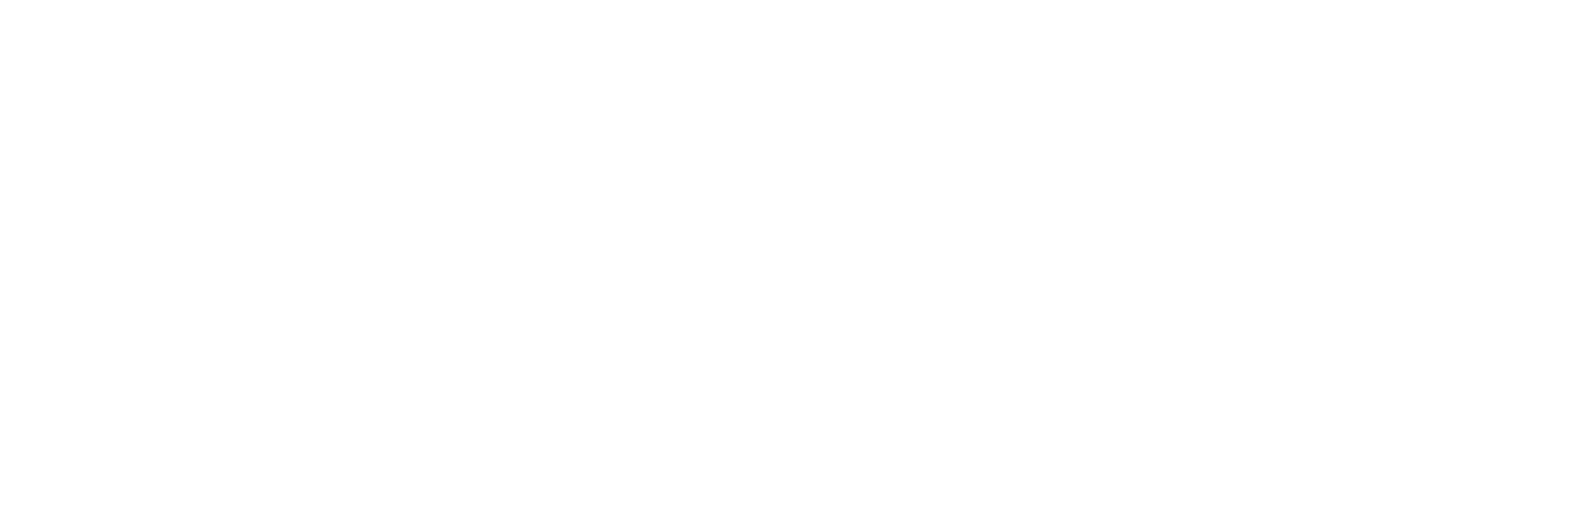

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [17]:
plt.ion()
fig_dpdX = plt.figure(figsize = (9,3))
sfig_dpdX1 = fig_dpdX.add_subplot(111)
sfig_dpdX1.set_xlim(xmin = -5, xmax = dpd.shape[0]+4)
sfig_dpdX1.set_ylim(ymin = dpd['dt_diary'].min() - timedelta(days = 5)  , ymax= dpd['dt_diary'].max() + timedelta(days = 5)  )
sfig_dpdX1.plot(dpd.loc[condition_dpd4,'dt_diary'], 'ro')
sfig_dpdX1.plot(dpd.loc[condition_dpd3,'dt_diary'], 'go')
sfig_dpdX1.plot(dpd.loc[condition_dpd2,'dt_diary'], 'g*')
sfig_dpdX1.plot(dpd.loc[condition_dpd1,'dt_diary'], 'g^')
sfig_dpdX1.plot(dpd.loc[condition_dpd0,'dt_diary'], 'bo')

for i, row in dpd.loc[condition_dpd4, :].iterrows() :
    #sfig_dpd01_2.axvline(row['dt_diary'], color = 'green', linewidth = 2)
    #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
    
    sfig_dpdX1.axhspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
    sfig_dpdX1.axhline(row['MIGRAINESTART'], color = 'orchid', linewidth = 2, linestyle = '--')
    sfig_dpdX1.axhline(row['MIGRAINEEND'], color = 'orchid', linewidth = 2, linestyle = ':')
    sfig_dpdX1.axhline(row['dt_diary'], color = 'orchid', linewidth = 1, linestyle = '-')


for i, row in dpd.loc[condition_dpd3, :].iterrows() :
    sfig_dpdX1.axhline(row['MIGRAINEEND'], color = 'green', linewidth = 2, linestyle = ':')
    sfig_dpdX1.axhline(row['dt_diary'], color = 'green', linewidth = 1, linestyle = '-', alpha = 0.7)

for i, row in dpd.loc[condition_dpd1, :].iterrows() :
    sfig_dpdX1.axhline(row['MIGRAINEEND'], color = 'blue', linewidth = 2, linestyle = ':')
    sfig_dpdX1.axhline(row['dt_diary'], color = 'blue', linewidth = 1, linestyle = '-', alpha = 0.7)

# index 74 - 87
# index 69 - 72
# index 49 - 53
# index 42 - 44
# index 36 - 40
# index 30 - 35
# index 12 - 24
# index 10 - 11

In [18]:
#dpd.mig_status.cumsum() == 0

In [19]:
#x  = dpd['SLEEPDURATIONHOURS'];y = dpd['SLEEPDURATIONMINUTES']

In [20]:
#isinstance('', str)
#np.isnan(np.nan)

#x.loc[x.notnull()].map(format_sleep)
#y.loc[y.notnull()].map(lambda x : (float("0" + str(x)))).map(lambda x : timedelta(minutes = x ))

In [21]:
x  = dpd['SLEEPDURATIONHOURS'].copy() ;y = dpd['SLEEPDURATIONMINUTES'].copy()
dpd['dt_deltasleep_hrs'] =None
dpd['dt_deltasleep_mins'] = None

dpd['dt_deltasleep_hrs'] = x.loc[x.notnull()].map(lambda x : (float("0" + str(x)))).map(lambda x : timedelta(hours = x ))
dpd['dt_deltasleep_mins'] = y.loc[y.notnull()].map(lambda x : (float("0" + str(x)))).map(lambda x : timedelta(minutes = x ))

dpd['dt_sleep'] = dpd['dt_deltasleep_hrs'].copy()

cond1 = dpd['dt_deltasleep_hrs'].notnull() & dpd['dt_deltasleep_mins'].isnull()
if cond1.any() :
    dpd['dt_sleep'].loc[cond1] = dpd['dt_deltasleep_hrs'].loc[cond1]

cond2 = dpd['dt_deltasleep_hrs'].notnull() & dpd['dt_deltasleep_mins'].notnull()
if cond2.any():
    dpd['dt_sleep'].loc[cond2] = dpd['dt_deltasleep_hrs'].loc[cond2] + dpd['dt_deltasleep_mins'].loc[cond2] 

cond3 = dpd['dt_deltasleep_hrs'].isnull() & dpd['dt_deltasleep_mins'].notnull()
if cond3.any():
    dpd['dt_sleep'].loc[cond3] =  dpd['dt_deltasleep_mins'].loc[cond3] 
 
dpd['dt_sleepQ']=dpd['dt_sleep'].copy()
cond4 = dpd['dt_sleep'].notnull() & dpd['SLEEPQUALITY'].notnull()
if cond4.any() :
    dpd['dt_sleepQ'].loc[cond4] = dpd['dt_sleep'].loc[cond4] * (dpd['SLEEPQUALITY'].loc[cond4]).map(int)

    
del x, y

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
# pt diary characteristics of sleep:
(dpd.SLEEPDURATIONMINUTES.notnull() & dpd.SLEEPDURATIONHOURS.isnull()).sum() #0
(dpd.SLEEPDURATIONMINUTES.isnull() & dpd.SLEEPDURATIONHOURS.isnull()).sum() #2
(dpd.SLEEPDURATIONMINUTES.isnull() & dpd.SLEEPDURATIONHOURS.notnull()).sum() #62
(dpd.SLEEPDURATIONMINUTES.notnull() & dpd.SLEEPDURATIONHOURS.notnull()).sum() #28

(dpd.SLEEPDURATIONMINUTES.notnull() & dpd.SLEEPDURATIONHOURS.isnull()& dpd.HADMIGRAINE == True).sum() # 0
(dpd.SLEEPDURATIONMINUTES.isnull() & dpd.SLEEPDURATIONHOURS.isnull()& dpd.HADMIGRAINE == True).sum() # 2
(dpd.SLEEPDURATIONMINUTES.isnull() & dpd.SLEEPDURATIONHOURS.notnull()& dpd.HADMIGRAINE == True).sum() # 28
(dpd.SLEEPDURATIONMINUTES.notnull() & dpd.SLEEPDURATIONHOURS.notnull()& dpd.HADMIGRAINE == True).sum() # 12

(dpd.SLEEPQUALITY.isnull()).sum() #3
(dpd.SLEEPQUALITY.isnull() & dpd.HADMIGRAINE == True).sum() #2
(dpd.SLEEPDURATIONMINUTES.isnull() & dpd.SLEEPDURATIONHOURS.isnull() & dpd.SLEEPQUALITY.isnull() & dpd.HADMIGRAINE == True).sum() #2

2

In [23]:
#dpd['SLEEPDURATIONHOURS'].loc[dpd['SLEEPDURATIONHOURS'].map(format_sleep)].map(lambda x: timedelta(hours = format_sleep(x)))

In [24]:
 #dpd['SLEEPQUALITY'].loc[cond4].map(int) *dpd['dt_sleep'].loc[cond4] 

In [25]:
#dpd['dt_deltasleep_mins'].notnull()
#dpd['dt_deltasleep_hrs'].loc[dpd['dt_deltasleep_mins'].notnull()]
#pd.concat([dpd[['dt_sleep','dt_deltasleep_hrs','dt_deltasleep_mins']],cond1, cond2, cond3], axis = 1)
#dpd[['SLEEPQUALITY', 'dt_sleepQ']]

In [26]:
#dpd.loc[0,['SLEEPQUALITY', 'dt_sleepQ', 'dt_sleep', 'dt_deltasleep_mins']].apply(type)
#timedelta(1)*2

In [27]:
#len()
#dpd['SLEEPDURATIONMINUTES'].loc[dpd['SLEEPDURATIONMINUTES'].notnull()].map(type) #> 0 #.map(lambda x: timedelta(minutes = float(x))

#( dpd['SLEEPDURATIONHOURS'].loc[dpd['SLEEPDURATIONHOURS'].notnull()] ).map(type)

In [28]:
#condition_dpdsleep = (dpd['SLEEPDURATIONHOURS'].notnull() & dpd['SLEEPDURATIONMINUTES'].notnull())
#dpd['dt_deltasleep'] = dpd['dt_deltasleep_hrs']
#dpd['dt_deltasleep'] = dpd.loc[condition_dpdsleep,'dt_deltasleep_hrs'] + dpd.loc[condition_dpdsleep,'dt_deltasleep_hrs']
#print(dpd.shape,'\n',dpd.columns)
#print(dpd.dtypes)

In [29]:
condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )

dpd.loc[condition_dpd, ['MIGRAINESEVERITY', 'dt_delta']].shape #
#dpd['MIGRAINESEVERITY'].max() # 2

(15, 2)

In [30]:
#
MDUR_mean = ( dpd.loc[(condition_dpd), ['ts_delta', 'dt_delta']] ).mean()

print(MDUR_mean)

ts_delta                   54407.7
dt_delta    0 days 15:06:47.666666
dtype: object


In [31]:
dpd.head(20)

dt_diary HADMIGRAINE        HELPMIGRAINETODAY LURKINGMIGRAINE  \
0  2017-04-21 19:23:19       False                      NaN              No   
1  2017-04-21 20:45:56       False            [Meditation ]              No   
2  2017-04-22 13:56:02         NaN                      NaN             NaN   
3  2017-04-22 23:15:33        True                      NaN             NaN   
4  2017-04-23 21:23:50        True                  [Sleep]             NaN   
5  2017-04-24 23:16:57       False                      NaN              No   
6  2017-04-25 22:15:56        True            [Meditation ]             NaN   
7  2017-04-26 21:17:02       False                      NaN             Yes   
8  2017-04-27 23:11:28       False                      NaN             Yes   
9  2017-04-27 23:12:38        True                      NaN             NaN   
10 2017-04-28 21:30:55        True  [Caffeine, Meditation ]             NaN   
11 2017-04-29 22:57:20       False            [Meditation ]             Yes   
12 2017-05-01 21:35:23        True            [Meditation ]             NaN   
13 2017-05-02 22:17:19       False                      NaN              No   
14 2017-05-03 22:03:26       False            [Meditation ]              No   
15 2017-05-04 18:15:42       False            [Meditation ]             Yes   
16 2017-05-06 22:23:45       False            [Meditation ]             Yes   
17 2017-05-07 23:31:08       False            [Meditation ]              No   
18 2017-05-08 23:54:25       False            [Meditation ]              No   
19 2017-05-09 17:21:31        True            [Meditation ]             NaN   

                  MIGRAINEEND MIGRAINESEVERITY             MIGRAINESTART  \
0                         NaN              NaN                       NaN   
1                         NaN              NaN                       NaN   
2                         NaN              NaN                       NaN   
3   Apr 22, 2017, 11:14:59 PM                1                       NaN   
4    Apr 23, 2017, 5:40:46 PM                2                       NaN   
5                         NaN              NaN                       NaN   
6   Apr 25, 2017, 10:15:20 PM                1                       NaN   
7                         NaN              NaN                       NaN   
8                         NaN              NaN                       NaN   
9                         NaN              NaN                       NaN   
10   Apr 28, 2017, 7:29:49 PM                1  Apr 28, 2017, 9:30:14 AM   
11                        NaN              NaN                       NaN   
12    May 1, 2017, 9:34:39 PM                2                       NaN   
13                        NaN              NaN                       NaN   
14                        NaN              NaN                       NaN   
15                        NaN              NaN                       NaN   
16                        NaN              NaN                       NaN   
17                        NaN              NaN                       NaN   
18                        NaN              NaN                       NaN   
19  May 10, 2017, 12:45:28 PM                1   May 9, 2017, 1:30:57 PM   

   SLEEPDURATIONHOURS SLEEPDURATIONMINUTES SLEEPQUALITY  ...       ts_MEND  \
0                   7                   15            3  ...           NaN   
1                   7                                 3  ...           NaN   
2                   0                  NaN          NaN  ...           NaN   
3                   6                   30            3  ...  1.492885e+09   
4                   7                   45            4  ...  1.492951e+09   
5                   6                   30            4  ...           NaN   
6                   6                   45            4  ...  1.493141e+09   
7                   7                   30            4  ...           NaN   
8                   7                   45            3

In [32]:
# x=dpf.loc[date]
#     if (x['MIGRAINESTART'].notnull() ) ) & ( x['MIGRAINEEND'].notnull())):
#         sfig_dpd01_2.axvline(x['dt_diary'], color = 'green', linewidth = 2)
#         #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

#         sfig_dpd01_2.axvspan(x['MIGRAINESTART'],x['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
#         sfig_dpd01_2.axvline(x['MIGRAINESTART'], color = 'red', linewidth = 1)
#         sfig_dpd01_2.axvline(x['MIGRAINEEND'], color = 'blue', linewidth = 1)

In [33]:
# # dpf.loc['2017-04-21'].empty
# strdate in dpf.index
# dpf.loc[date]

In [34]:
# print(x['MIGRAINESTART'])

In [35]:
dpd.MIGRAINESTART.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MIGRAINESTART, dtype: object

In [36]:
condition_dpd = ( (dpd['MIGRAINESTART_TimeZone'].notnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )
                  

In [37]:
condition_dpd11 = ( (dpd['MIGRAINESTART_TimeZone'].isnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )

In [38]:
dpd.loc[condition_dpd, :].count()

dt_diary                  40
HADMIGRAINE               40
HELPMIGRAINETODAY         37
LURKINGMIGRAINE            0
MIGRAINEEND               40
MIGRAINESEVERITY          40
MIGRAINESTART             15
SLEEPDURATIONHOURS        40
SLEEPDURATIONMINUTES      12
SLEEPQUALITY              40
STRESSLEVEL               40
SYMPTOMSTODAY             40
TRIGGERSTODAY             39
dt_diary_tz               40
MIGRAINESTART_TimeZone    40
MIGRAINEEND_TimeZone      40
ts_MSTART                 15
ts_MEND                   40
dt_MSTART                 15
dt_MEND                   40
ts_delta                  15
dt_delta                  15
mig_status                40
dt_deltasleep_hrs         40
dt_deltasleep_mins        12
dt_sleep                  40
dt_sleepQ                 40
dtype: int64

In [39]:
dpd[( (dpd['MIGRAINESTART'].isnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )].count()

dt_diary                  25
HADMIGRAINE               25
HELPMIGRAINETODAY         22
LURKINGMIGRAINE            0
MIGRAINEEND               25
MIGRAINESEVERITY          25
MIGRAINESTART              0
SLEEPDURATIONHOURS        25
SLEEPDURATIONMINUTES       6
SLEEPQUALITY              25
STRESSLEVEL               25
SYMPTOMSTODAY             25
TRIGGERSTODAY             24
dt_diary_tz               25
MIGRAINESTART_TimeZone    25
MIGRAINEEND_TimeZone      25
ts_MSTART                  0
ts_MEND                   25
dt_MSTART                  0
dt_MEND                   25
ts_delta                   0
dt_delta                   0
mig_status                25
dt_deltasleep_hrs         25
dt_deltasleep_mins         6
dt_sleep                  25
dt_sleepQ                 25
dtype: int64

In [40]:
len(datey)

25

In [41]:
date_extra = [d.strftime('%Y-%m-%d') for d in datey]

In [42]:
date_extra

['2017-04-22',
 '2017-04-23',
 '2017-04-25',
 '2017-05-01',
 '2017-05-15',
 '2017-05-18',
 '2017-05-21',
 '2017-05-27',
 '2017-06-02',
 '2017-06-04',
 '2017-06-07',
 '2017-06-08',
 '2017-06-09',
 '2017-06-15',
 '2017-06-17',
 '2017-06-20',
 '2017-06-21',
 '2017-06-24',
 '2017-06-26',
 '2017-06-27',
 '2017-06-28',
 '2017-06-30',
 '2017-07-02',
 '2017-07-20',
 '2017-07-22']

In [43]:
dpd['MIGRAINESTART_TimeZone'].count()

40

In [44]:
dpd.loc[condition_dpd11, :].count()

dt_diary                  0
HADMIGRAINE               0
HELPMIGRAINETODAY         0
LURKINGMIGRAINE           0
MIGRAINEEND               0
MIGRAINESEVERITY          0
MIGRAINESTART             0
SLEEPDURATIONHOURS        0
SLEEPDURATIONMINUTES      0
SLEEPQUALITY              0
STRESSLEVEL               0
SYMPTOMSTODAY             0
TRIGGERSTODAY             0
dt_diary_tz               0
MIGRAINESTART_TimeZone    0
MIGRAINEEND_TimeZone      0
ts_MSTART                 0
ts_MEND                   0
dt_MSTART                 0
dt_MEND                   0
ts_delta                  0
dt_delta                  0
mig_status                0
dt_deltasleep_hrs         0
dt_deltasleep_mins        0
dt_sleep                  0
dt_sleepQ                 0
dtype: int64

In [45]:
condition_dpd = ( (dpd['MIGRAINESTART_TimeZone'].notnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )

In [46]:
dpd.loc[condition_dpd, :].count()

dt_diary                  40
HADMIGRAINE               40
HELPMIGRAINETODAY         37
LURKINGMIGRAINE            0
MIGRAINEEND               40
MIGRAINESEVERITY          40
MIGRAINESTART             15
SLEEPDURATIONHOURS        40
SLEEPDURATIONMINUTES      12
SLEEPQUALITY              40
STRESSLEVEL               40
SYMPTOMSTODAY             40
TRIGGERSTODAY             39
dt_diary_tz               40
MIGRAINESTART_TimeZone    40
MIGRAINEEND_TimeZone      40
ts_MSTART                 15
ts_MEND                   40
dt_MSTART                 15
dt_MEND                   40
ts_delta                  15
dt_delta                  15
mig_status                40
dt_deltasleep_hrs         40
dt_deltasleep_mins        12
dt_sleep                  40
dt_sleepQ                 40
dtype: int64

In [60]:
import glob
import pandas as pd

dir = 'C:/Users/Chisel-Lab/Documents/Migraine_ML/eda-explorer-master/sensordata/*.csv'
# C:\Users\Chisel-Lab\Documents\Migraine_ML\empaticaHRV-master\hrv_final
dir_hrv='C:/Users/Chisel-Lab/Documents/Migraine_ML/empaticaHRV-master/hrv_final/*.csv'
files = glob.glob(dir)
files_hrv = glob.glob(dir_hrv)
data = pd.DataFrame()


# for f in files:
# #     io.StringIO(df.to_csv()), index_col=0
# #     pd.read_csv(io.StringIO(f),index_col=0)
# #     newdata = pd.read_csv(f,index_col=0)
#     newdata = pd.read_csv(f, index_col=0, parse_dates=[0])
#     print(type(newdata.index[0]))

In [48]:
def computeAllAccelerometerFeatures(data, time_frames):
    if DEBUG: print("\t\tcomputing motion...")
    motion = computeMotion(data['AccelX'], data['AccelY'], data['AccelZ'])

    if DEBUG: print("\t\tcomputing steps...")
    steps = computeSteps(motion)

    if DEBUG: print("\t\tcomputing stillness...")
    stillness = computeStillness(motion)

    features = []

    for time_frame in time_frames:
        start = time_frame[0]
        print(start)
        end = time_frame[1]
        start1Hz = int(start / SAMPLING_RATE)
        end1Hz = end if end == -1 else int(end / SAMPLING_RATE)
        if DEBUG: print("\t\tcomputing features for time frame. Start index: "+ str(start)+ " end index: "+ str(end))

        time_frame_feats = computeAccelerometerFeaturesOverOneTimeFrame(motion[start:end],
                                                                        steps[start:end],
                                                                        stillness[start1Hz:end1Hz])
        features.append(time_frame_feats)

    return features, steps, motion

def computeMotion(acc1, acc2, acc3):
    '''Aggregates 3-axis accelerometer signal into a single motion signal'''
    return np.sqrt(np.array(acc1)**2 + np.array(acc2)**2 + np.array(acc3)**2)

def computeSteps(motion):
    '''Determines the location of steps from the aggregated accelerometer signal.
    Signal is low-pass filtered, then minimums are located in the signal. For each
    min, if the max absolute derivative (first difference) immediately surrounding
    it is greater than a threshold, it is counted as a step.

    Args:
        motion:		root mean squared 3 axis acceleration
    Returns:
        steps:		binary array at 8Hz which is 1 everywhere there is a step'''

    filtered_signal = filterSignalFIR(motion, 2, 256)
    diff = filtered_signal[1:]-filtered_signal[:-1]

    mins = scisig.argrelextrema(filtered_signal, np.less)[0]

    steps = [0] * len(filtered_signal)
    for m in mins:
        if m <= 4 or m >= len(diff) - 4:
            continue
        if max(abs(diff[m-4:m+4])) > STEP_DIFFERENCE_THRESHOLD:
            steps[m] = 1.0

    return steps

def filterSignalFIR(eda, cutoff=0.4, numtaps=64):
    f = cutoff/(SAMPLING_RATE/2.0)
    FIR_coeff = scisig.firwin(numtaps,f)

    return scisig.lfilter(FIR_coeff,1,eda)

def computeStillness(motion):
    '''Locates periods in which the person is still or motionless.
    Total acceleration must be less than a threshold for 95 percent of one
    minute in order for that minute to count as still

    Args:
        motion:		an array containing the root mean squared acceleration
    Returns:
        A 1Hz array that is 1 for each second belonging to a still period, 0 otherwise
    '''
    diff = motion[1:]-motion[:-1]
    momentary_stillness = diff < STILLNESS_MOTION_THRESHOLD
    np.append(momentary_stillness,0) # to ensure list is the same size as the full day signal
    num_minutes_in_day = 24*60

    #create array indicating whether person was still or not for each second of the day
    #to be still the momentary_stillness signal must be true for more than 95% of the minute
    #containing that second
    second_stillness = [0]*SECONDS_IN_DAY

    for i in range(num_minutes_in_day):
        hours_start = int(i / 60)
        mins_start = i % 60
        hours_end = int((i+1) / 60)
        mins_end = (i+1) % 60

        start_idx = getIndexFromTimestamp(hours_start, mins_start)
        end_idx = getIndexFromTimestamp(hours_end, mins_end)

        this_minute = momentary_stillness[start_idx:end_idx]
        minute_stillness = sum(this_minute) > PERCENT_STILLNESS_THRESHOLD*(60*SAMPLING_RATE)

        second_idx = int(start_idx/8)
        for si in range(second_idx,second_idx+60):
            second_stillness[si] = float(minute_stillness)

    return second_stillness

def computeAccelerometerFeaturesOverOneTimeFrame(motion, steps, stillness):
    ''' Computes all available features for a time period. Incoming signals are assumed to be from
    only that time period.

    Args:
        motion:						8Hz		root mean squared 3 axis acceleration
        steps:						8Hz		binary signal that is 1 if there is a step
        stillness:					1Hz		1 if the person was still during this second, 0 otherwise
    Returns:
        A list of features containing (in order):
        -Step count 								number of steps detected
        -mean step time during movement				average number of samples between two steps (aggregated first to 1 minute,
                                                    then we take the mean of only the parts of this signal occuring during movement)
        -percent stillness 							percentage of time the person spent nearly motionless
    '''

    features = []

    features.extend(computeStepFeatures(steps,stillness))
    features.append(countStillness(stillness))

    return features

def computeStepFeatures(steps,stillness):
    '''Counts the total number of steps over a given period,
    as well as the average time between steps (meant to approximate walking speed)

    Args:
        steps:	an binary array at 8 Hz that is 1 every time there is a step
    Returns:
        sum: 			the number of steps in a period
        median time: 	average number of samples between two steps'''

    sum_steps = float(sum(steps))

    step_indices = np.nonzero(steps)[0]
    diff = step_indices[1:]-step_indices[:-1]

    #ensure length of step difference array is the same so we can get the actual locations of step differences
    timed_step_diff = np.empty(len(steps)) * np.nan
    timed_step_diff[step_indices[:len(diff)]] = diff

    signal_length_1s = len(stillness)
    signal_length_1min = int(signal_length_1s / 60)

    # if there aren't enough steps during this period, cannot accurately compute mean step diff
    if len(timed_step_diff) < signal_length_1min:
        return [sum_steps, np.nan]

    agg_stillness = aggregateSignal(stillness, signal_length_1min, 'max')
    agg_step_diff = aggregateSignal(timed_step_diff, signal_length_1min, 'mean')

    movement_indices = [i for i in range(len(agg_stillness)) if agg_stillness[i] == 0.0]
    step_diff_during_movement = agg_step_diff[movement_indices]

    return [sum_steps,round(np.nanmean(step_diff_during_movement),10)]

def countStillness(stillness):
    '''Counts the total percentage of time spent still over a period

    Args:
        stillness:	an binary array at 1Hz that is 1 if that second is part of a still period
    Returns:
        the percentage time spent still over a period'''

    return float(sum(stillness)) / float(len(stillness))

def aggregateSignal(signal, new_signal_length, agg_method='sum'):
    new_signal = np.zeros(new_signal_length)
    samples_per_bucket = int(len(signal) / new_signal_length)

    #the new signal length must be large enough that there is at least 1 sample per bucket
    assert(samples_per_bucket > 0)

    for i in range(new_signal_length):
        if agg_method == 'sum':
            new_signal[i] = np.nansum(signal[i*samples_per_bucket:(i+1)*samples_per_bucket])
        elif agg_method == 'percent':
            new_signal[i] = np.nansum(signal[i*samples_per_bucket:(i+1)*samples_per_bucket]) / samples_per_bucket
        elif agg_method == 'mean':
            new_signal[i] = np.nanmean(signal[i*samples_per_bucket:(i+1)*samples_per_bucket])
        elif agg_method == 'max':
            new_signal[i] = np.nanmax(signal[i*samples_per_bucket:(i+1)*samples_per_bucket])
    return new_signal

def getIndexFromTimestamp(hours, mins=0): 
    return ((hours * 60) + mins) * 60 * SAMPLING_RATE

def inputTimeFrames():
    '''Allows user to choose the time frames over which they compute accelerometer features.'''

    time_frames = []
    print("Accelerometer features can be extracted over different time periods.")
    cont = 'y' #get_user_input("If you would like to enter a time period over which to compute features, enter 'y', or press enter to compute features over the entire file.")
#    while cont != 'y' or cont != 'Y':
#        start = int(get_user_input("Enter the starting hour of the time period (hour 0 is when the file starts):"))
#        end = int(get_user_input("Enter the ending hour of the time period (hour 0 is when the file starts; use -1 for the end of the file):"))
#        start = getIndexFromTimestamp(int(start))
#        if end != -1:
#            end = getIndexFromTimestamp(int(end))
#        time_frames.append([start,end])
#        print("Great! Now computing features for the following time periods:"+ str(time_frames))
#        cont = get_user_input("To add another time period, enter 'y'. To finish, press enter.")

    if len(time_frames) == 0:
        time_frames = [[0,-1]] # the whole file

    return time_frames

def saveFeaturesToFile(features, time_frames, output_file):
    of = open(output_file, 'w')
    of.write("Time period start hour, Time period end hour, Step count, Mean step time during movement, Percent stillness\n")
    tf_i = 0
    for tf in time_frames:
        output_str = str(tf[0]) + ' , ' + str(tf[1])
        for feat in features[tf_i]:
            output_str += ' , ' + str(feat)
        tf_i += 1
        of.write(output_str + '\n')
    of.close()
    print("Saved features to file"+ output_file)

In [49]:
time_frames = inputTimeFrames()


Accelerometer features can be extracted over different time periods.


In [50]:
import numpy as np
import pandas as pd
import scipy.signal as scisig
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DEBUG = True

SAMPLING_RATE = 8

ONE_MINUTE_S = 60
THIRTY_MIN_S = ONE_MINUTE_S*30
SECONDS_IN_DAY = 24*60*60

STILLNESS_MOTION_THRESHOLD = .1
PERCENT_STILLNESS_THRESHOLD = .95

STEP_DIFFERENCE_THRESHOLD = 0.3


In [51]:

df_weather = pd.read_csv('weatherdata_hourly_everyday.csv', index_col=0, parse_dates=[0])



In [52]:
df_weather

apparentTemperature  cloudCover  dewPoint  \
date                                                                   
2017-04-05 00:00:00-04:00                39.69        1.00     37.93   
2017-04-05 01:00:00-04:00                39.52        1.00     37.79   
2017-04-05 02:00:00-04:00                39.03        1.00     37.19   
2017-04-05 03:00:00-04:00                36.43        1.00     36.74   
2017-04-05 04:00:00-04:00                37.96        1.00     36.21   
2017-04-05 05:00:00-04:00                37.55        1.00     35.74   
2017-04-05 06:00:00-04:00                37.23        1.00     35.42   
2017-04-05 07:00:00-04:00                36.99        1.00     35.07   
2017-04-05 08:00:00-04:00                37.22        1.00     35.15   
2017-04-05 09:00:00-04:00                37.70        1.00     35.40   
2017-04-05 10:00:00-04:00                38.46        1.00     35.72   
2017-04-05 11:00:00-04:00                39.61        1.00     36.33   
2017-04-05 12:00:00-04:00                41.17        1.00     36.91   
2017-04-05 13:00:00-04:00                42.55        1.00     37.36   
2017-04-05 14:00:00-04:00                43.36        1.00     37.52   
2017-04-05 15:00:00-04:00                43.88        1.00     37.61   
2017-04-05 16:00:00-04:00                43.73        1.00     37.43   
2017-04-05 17:00:00-04:00                43.25        1.00     37.09   
2017-04-05 18:00:00-04:00                42.44        1.00     36.75   
2017-04-05 19:00:00-04:00                41.37        1.00     36.16   
2017-04-05 20:00:00-04:00                40.60        1.00     35.90   
2017-04-05 21:00:00-04:00                39.94        1.00     35.53   
2017-04-05 22:00:00-04:00                39.46        0.88     35.28   
2017-04-05 23:00:00-04:00                39.31        1.00     35.34   
2017-04-06 00:00:00-04:00                39.22        1.00     35.40   
2017-04-06 01:00:00-04:00                39.28        1.00     35.45   
2017-04-06 02:00:00-04:00                39.09        1.00     35.43   
2017-04-06 03:00:00-04:00                38.95        1.00     35.30   
2017-04-06 04:00:00-04:00                38.89        1.00     34.99   
2017-04-06 05:00:00-04:00                38.69        1.00     34.96   
...                                        ...         ...       ...   
2017-07-20 18:00:00-04:00                92.23        0.21     70.35   
2017-07-20 19:00:00-04:00                89.99        0.00     70.67   
2017-07-20 20:00:00-04:00                86.53        0.11     70.40   
2017-07-20 21:00:00-04:00                83.09        0.62     69.58   
2017-07-20 22:00:00-04:00                79.42        0.53     68.99   
2017-07-20 23:00:00-04:00                77.10        0.10     68.46   
2017-07-21 00:00:00-04:00                75.03        0.42     68.13   
2017-07-21 01:00:00-04:00                73.58        0.20     67.53   
2017-07-21 02:00:00-04:00                72.24        0.00     66.94   
2017-07-21 03:00:00-04:00                70.97        0.00     65.98   
2017-07-21 04:00:00-04:00                69.86        0.00     64.70   
2017-07-21 05:00:00-04:00                68.39        0.00     63.69   
2017-07-21 06:00:00-04:00                67.50        0.00     62.75   
2017-07-21 07:00:00-04:00                69.30        0.00     63.18   
2017-07-21 08:00:00-04:00                73.98        0.00     63.97   
2017-07-21 09:00:00-04:00                77.86        0.00     63.92   
2017-07-21 10:00:00-04:00                82.38        0.00     63.41   
2017-07-21 11:00:00-04:00                84.02        0.00     61.72   
2017-07-21 12:00:00-04:00                85.72        0.00     61.35   
2017-07-21 13:00:00-04:00                87.37        0.00     61.63   
2017-07-21 14:00:00-04:00                88.80        0.00     61.91   
2017-07-21 15:00:00-04:00                90.21        0.09     62.27   
2017-07-21 16:00:00-04:00                90.93        0.21     63.8

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [54]:
dpd.head()

dt_diary HADMIGRAINE HELPMIGRAINETODAY LURKINGMIGRAINE  \
0 2017-04-21 19:23:19       False               NaN              No   
1 2017-04-21 20:45:56       False     [Meditation ]              No   
2 2017-04-22 13:56:02         NaN               NaN             NaN   
3 2017-04-22 23:15:33        True               NaN             NaN   
4 2017-04-23 21:23:50        True           [Sleep]             NaN   

                 MIGRAINEEND MIGRAINESEVERITY MIGRAINESTART  \
0                        NaN              NaN           NaN   
1                        NaN              NaN           NaN   
2                        NaN              NaN           NaN   
3  Apr 22, 2017, 11:14:59 PM                1           NaN   
4   Apr 23, 2017, 5:40:46 PM                2           NaN   

  SLEEPDURATIONHOURS SLEEPDURATIONMINUTES SLEEPQUALITY  ...       ts_MEND  \
0                  7                   15            3  ...           NaN   
1                  7                                 3  ...           NaN   
2                  0                  NaN          NaN  ...           NaN   
3                  6                   30            3  ...  1.492885e+09   
4                  7                   45            4  ...  1.492951e+09   

  dt_MSTART             dt_MEND ts_delta dt_delta mig_status  \
0       NaT                 NaT      NaN      NaT          0   
1       NaT                 NaT      NaN      NaT          0   
2       NaT                 NaT      NaN      NaT          0   
3       NaT 2017-04-22 23:14:59      NaN      NaT          3   
4       NaT 2017-04-23 17:40:46      NaN      NaT          3   

   dt_deltasleep_hrs  dt_deltasleep_mins dt_sleep       dt_sleepQ  
0           07:00:00            00:15:00 07:15:00 0 days 21:45:00  
1           07:00:00            00:00:00 07:00:00 0 days 21:00:00  
2           00:00:00                 NaT 00:00:00 0 days 00:00:00  
3           06:00:00            00:30:00 06:30:00 0 days 19:30:00  
4           07:00:00            00:45:00 07:45:00 1 days 07:00:00  

[5 rows x 27 columns]

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = ('Sleep Duration', 'stress level', 'migraine index')
y_pos = np.arange(len(objects))
performance = [int(dpd['SLEEPDURATIONHOURS'][3]),int(dpd['MIGRAINESEVERITY'][3]),int(dpd['SLEEPQUALITY'][3])]
# dpd['MIGRAINESEVERITY'][0] 
plt.bar(y_pos,performance, alpha=1,align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

<IPython.core.display.Javascript object>


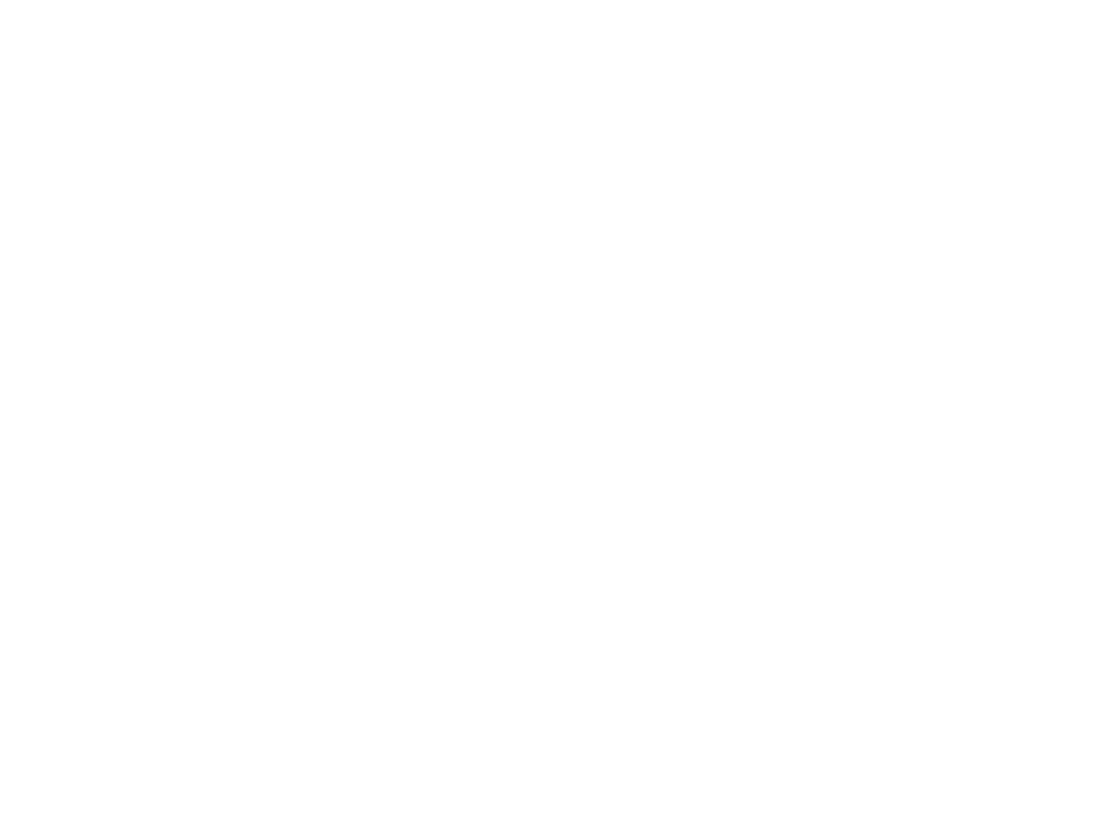

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=7)
gs = axs[1, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:,-1]:
    ax.remove()
    
axbig = fig.add_subplot(gs[2:5, -1])
# axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
#                xycoords='axes fraction', va='center')
objects = ('Sleep Duration', 'stress level', 'migraine index')
y_pos = np.arange(len(objects))
performance = [int(dpd['SLEEPDURATIONHOURS'][3]),int(dpd['MIGRAINESEVERITY'][3]),int(dpd['SLEEPQUALITY'][3])]
axbig.bar(y_pos,performance, alpha=1,align='center')
axbig.set_xticks(y_pos, objects)
# axbig.set_ylabel('Usage')
# axbig.set_title('Programming language usage')
axs[0,0].barh(y_pos,performance, alpha=1,align='center')
axs[0,0].set_yticks(y_pos, objects)
# plt.sca(axs[0, 0])
# plt.xticks(y_pos, objects)
# axs[0,0].xticks(y_pos, objects)
# axs[0,0].set_ylabel('Usage')
# axs[0,0].set_title('Programming language usage') 
# fig.tight_layout()

plt.show()



<IPython.core.display.Javascript object>


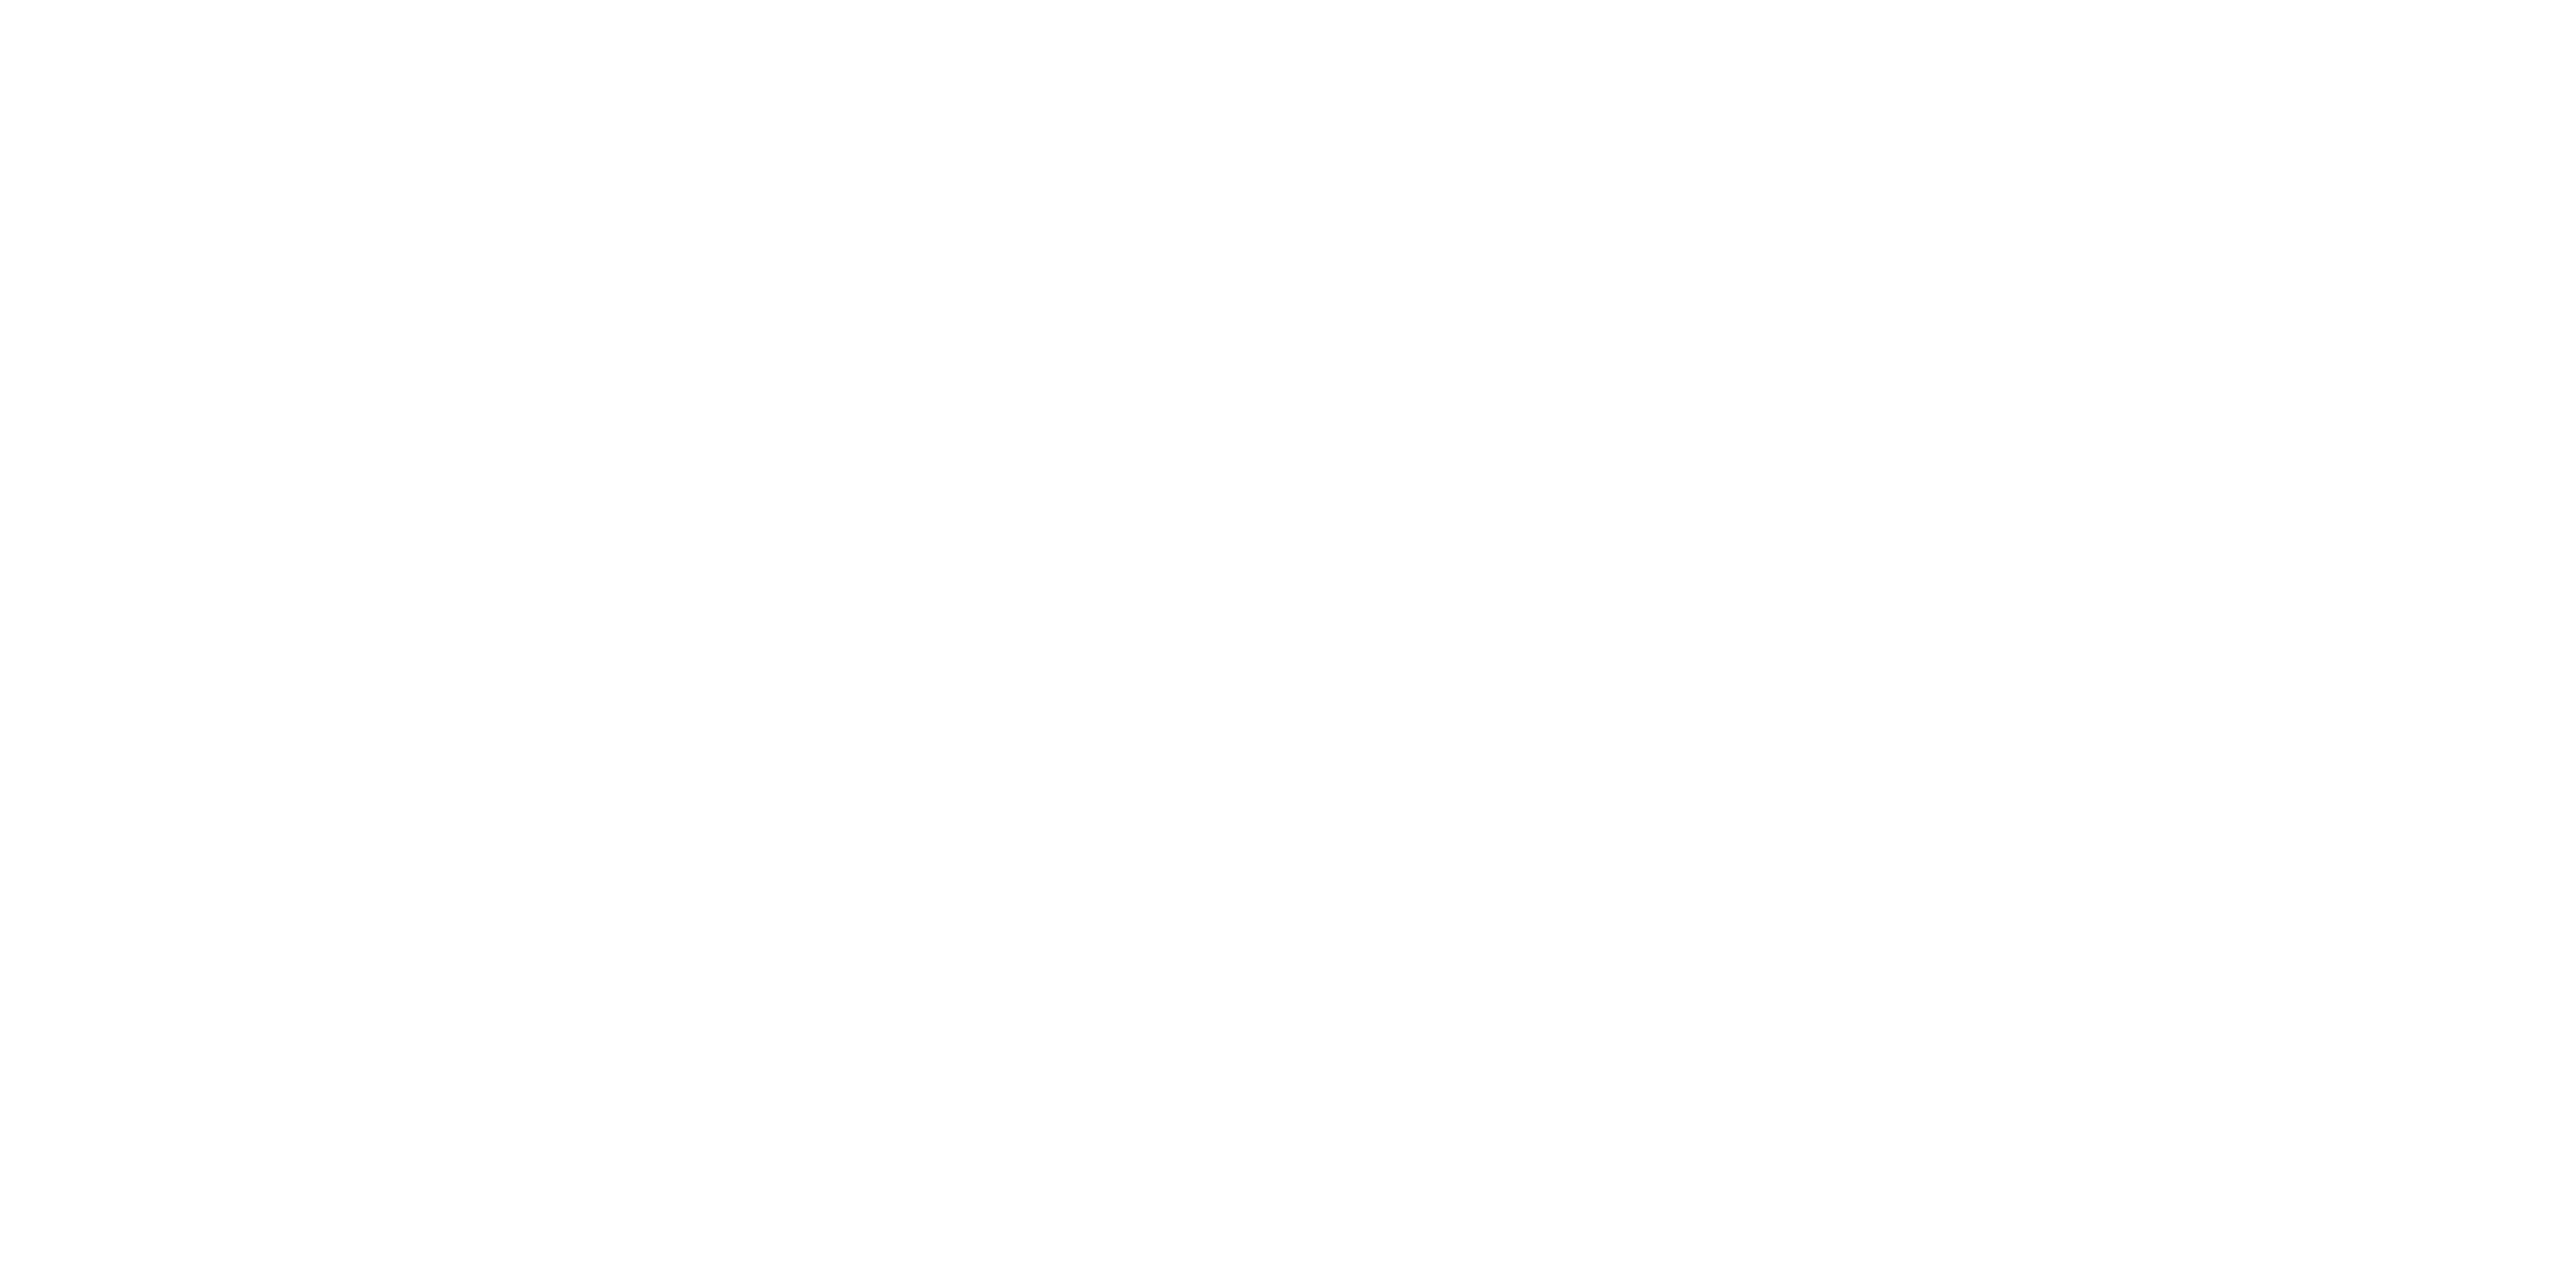

<IPython.core.display.Javascript object>


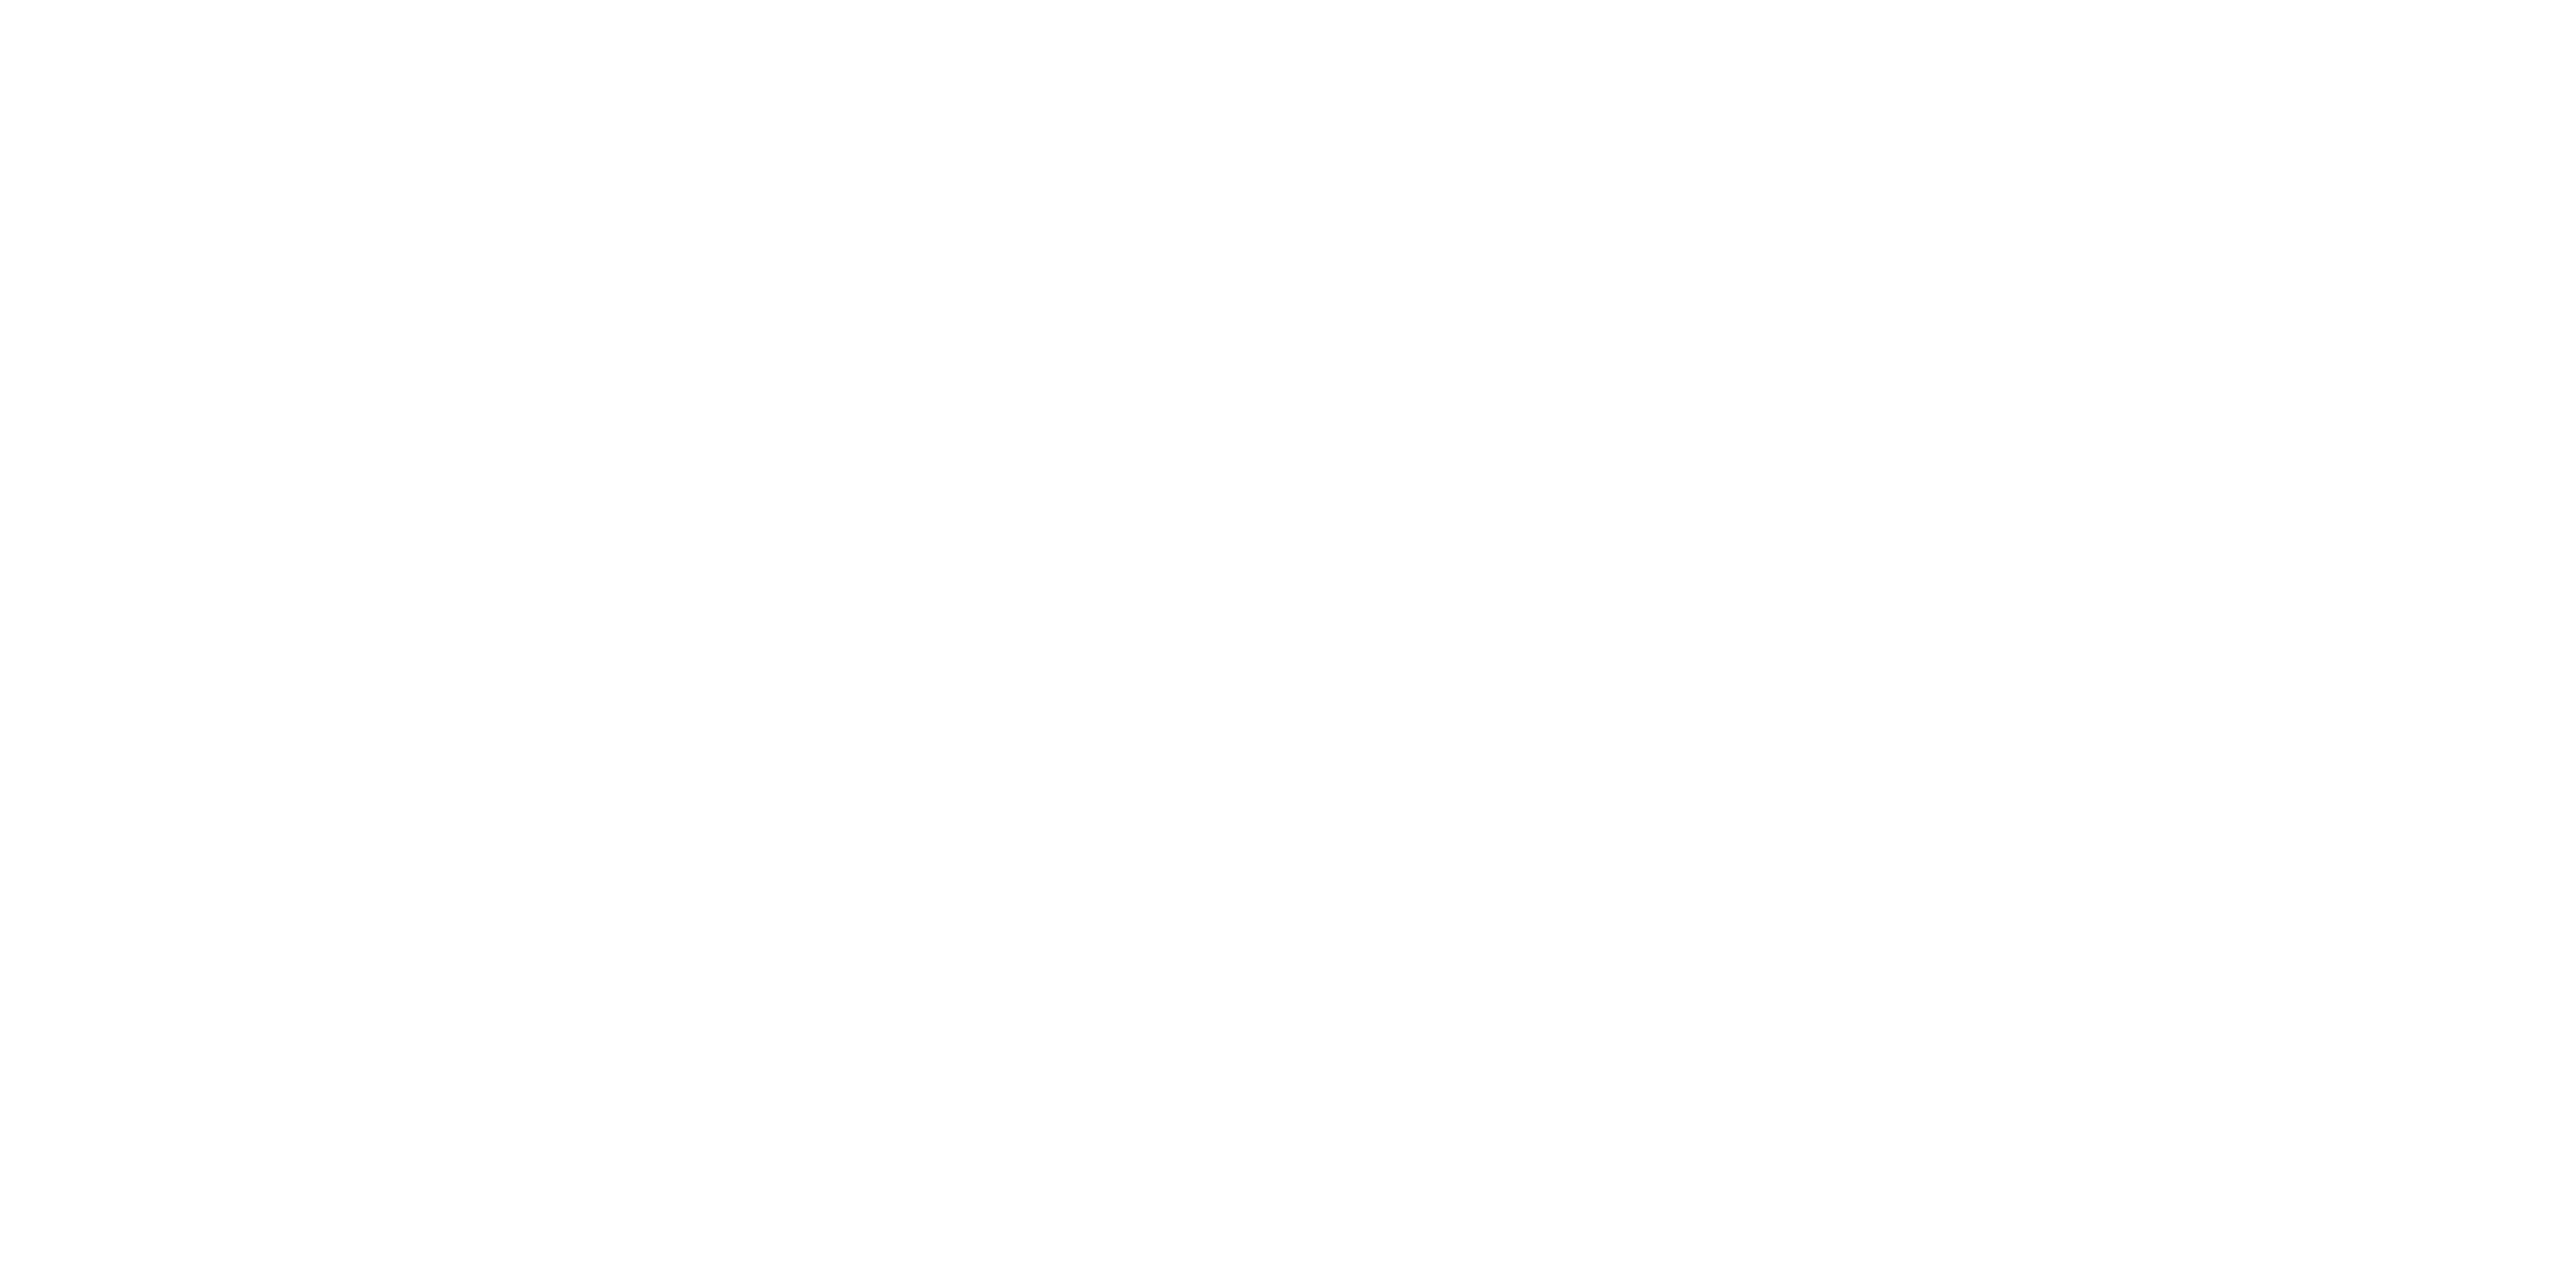

<IPython.core.display.Javascript object>


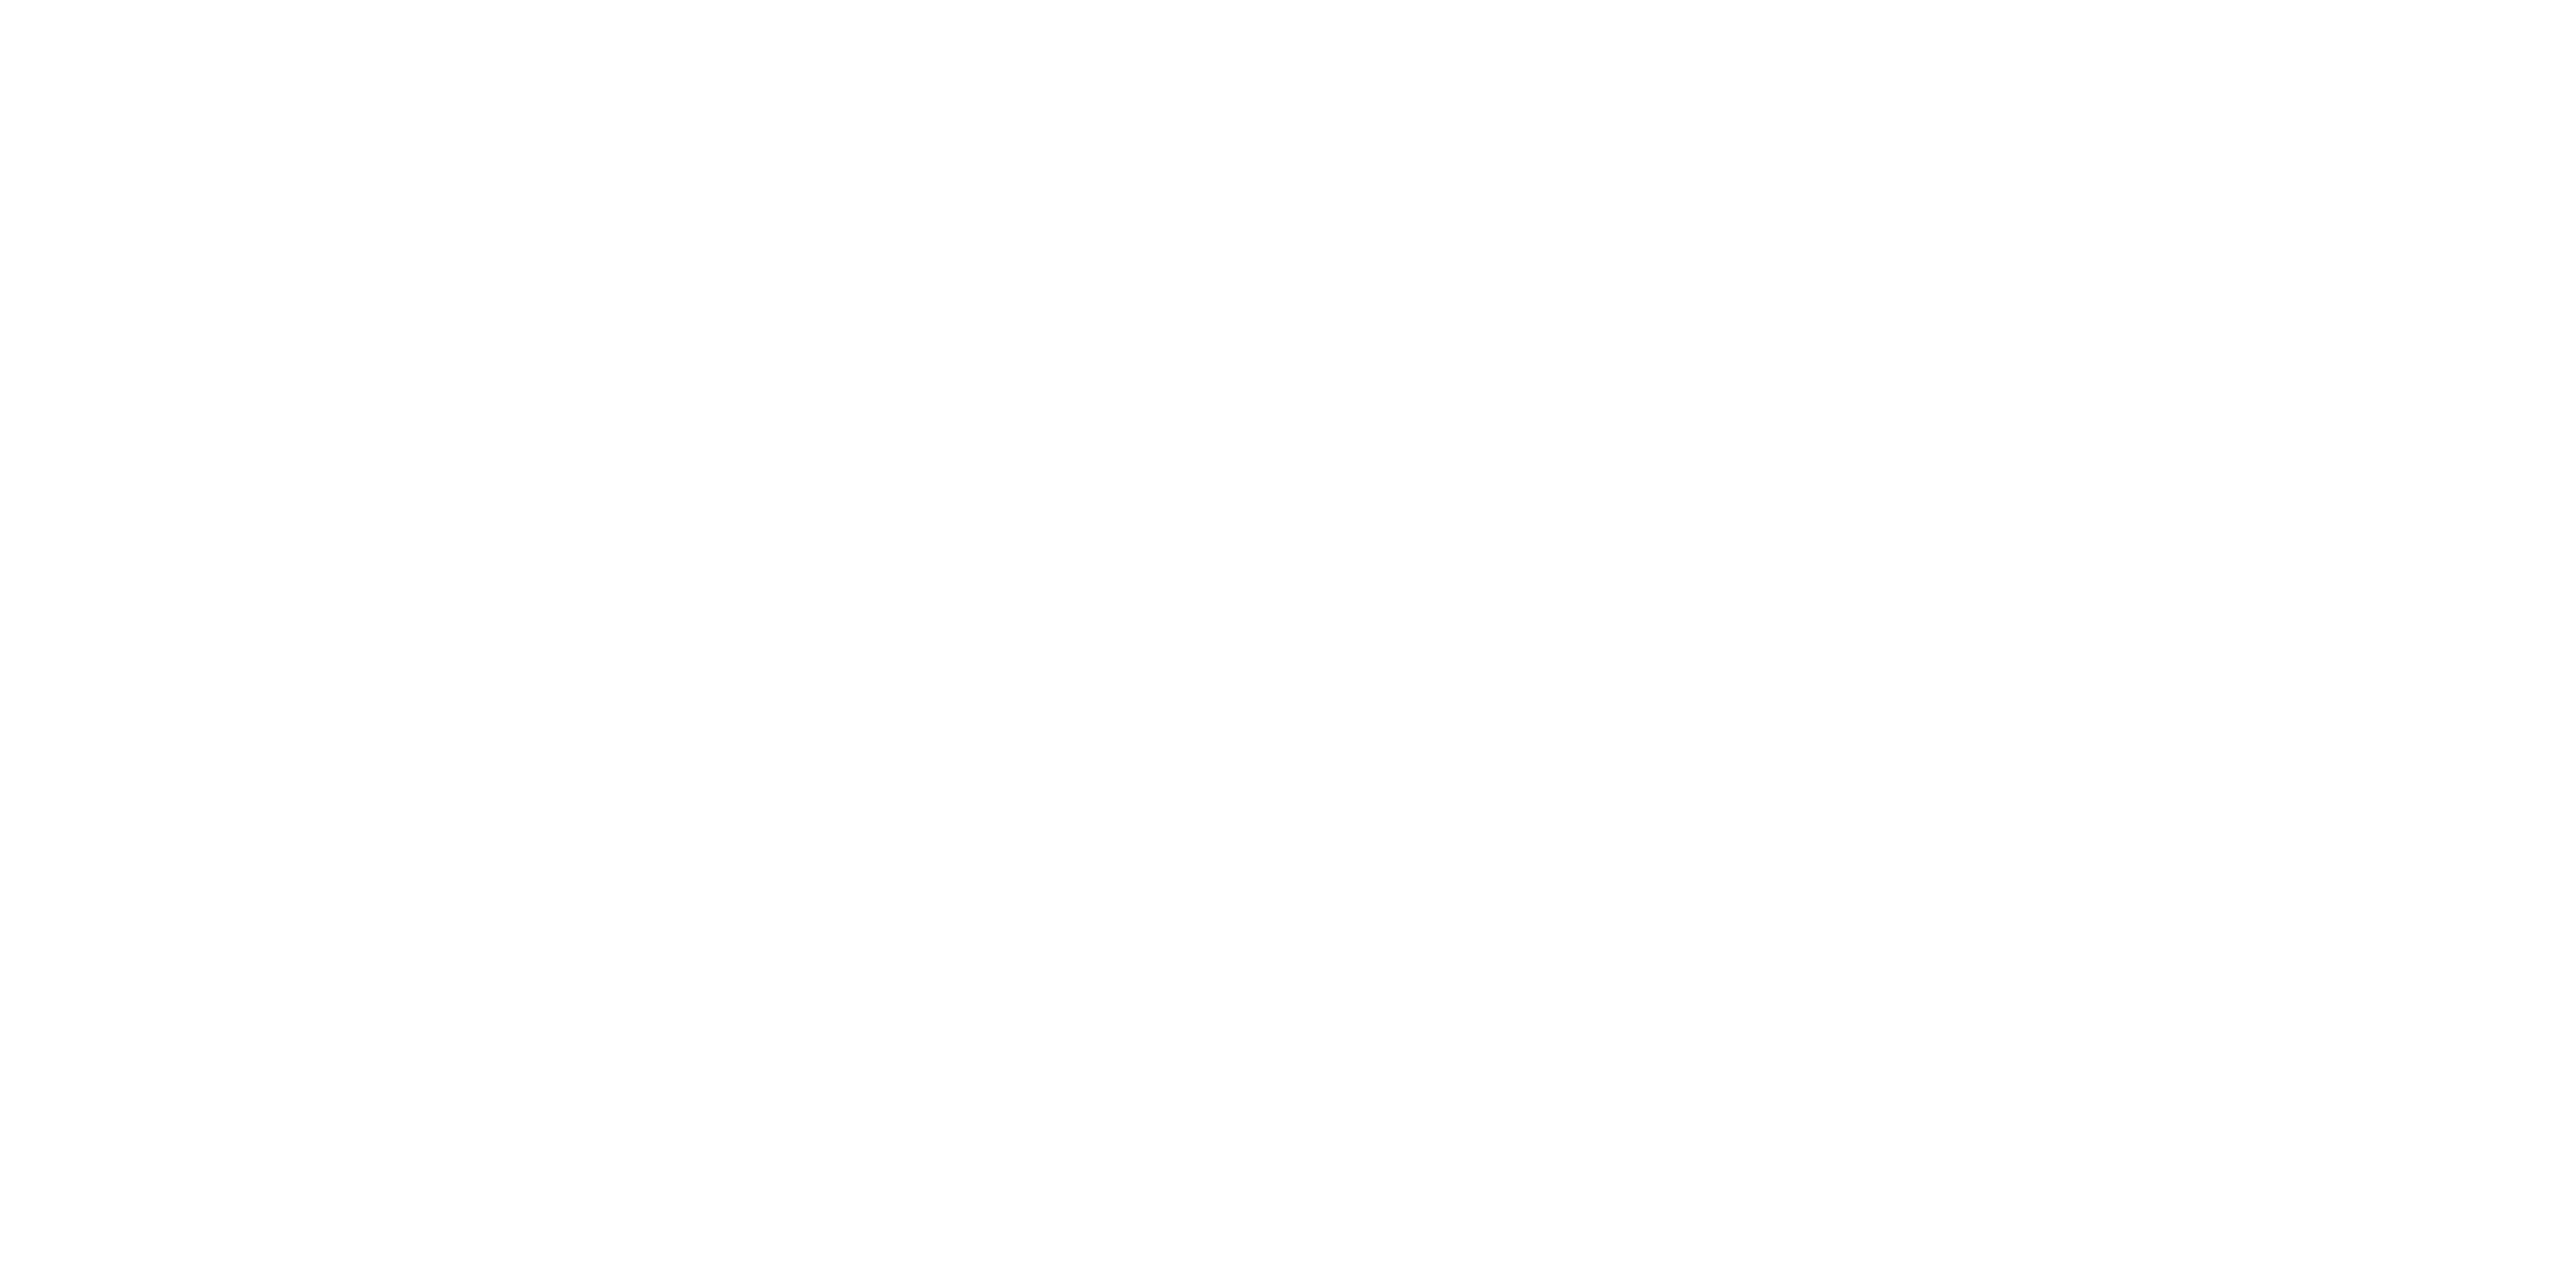

<IPython.core.display.Javascript object>


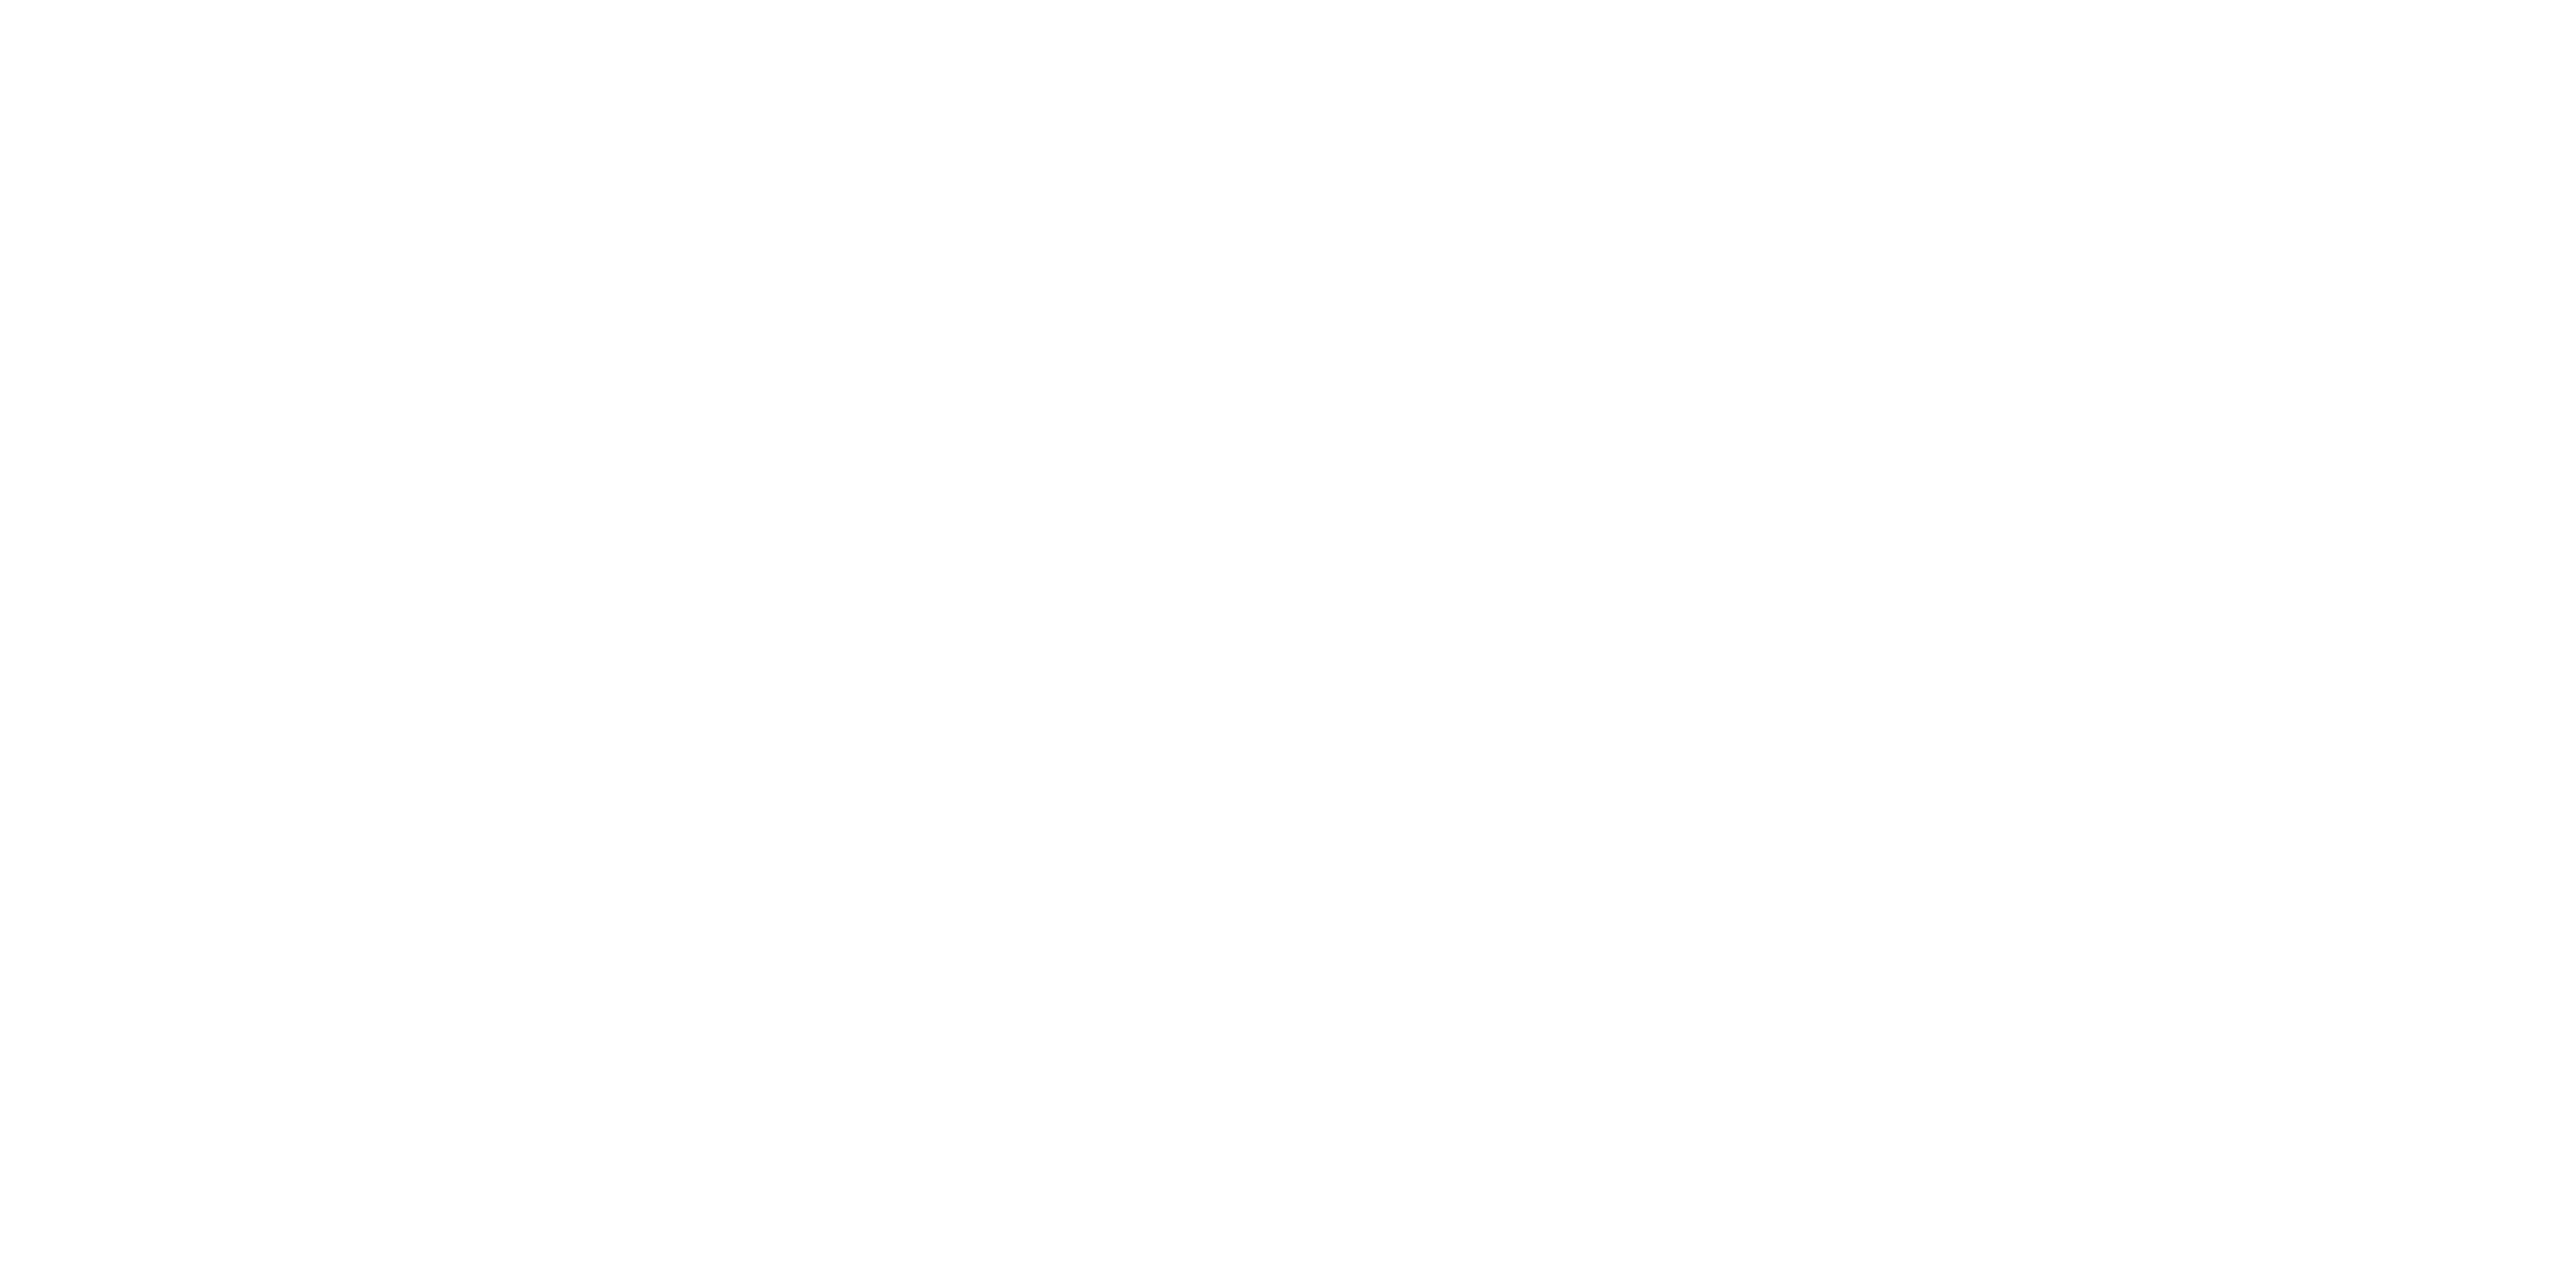

<IPython.core.display.Javascript object>


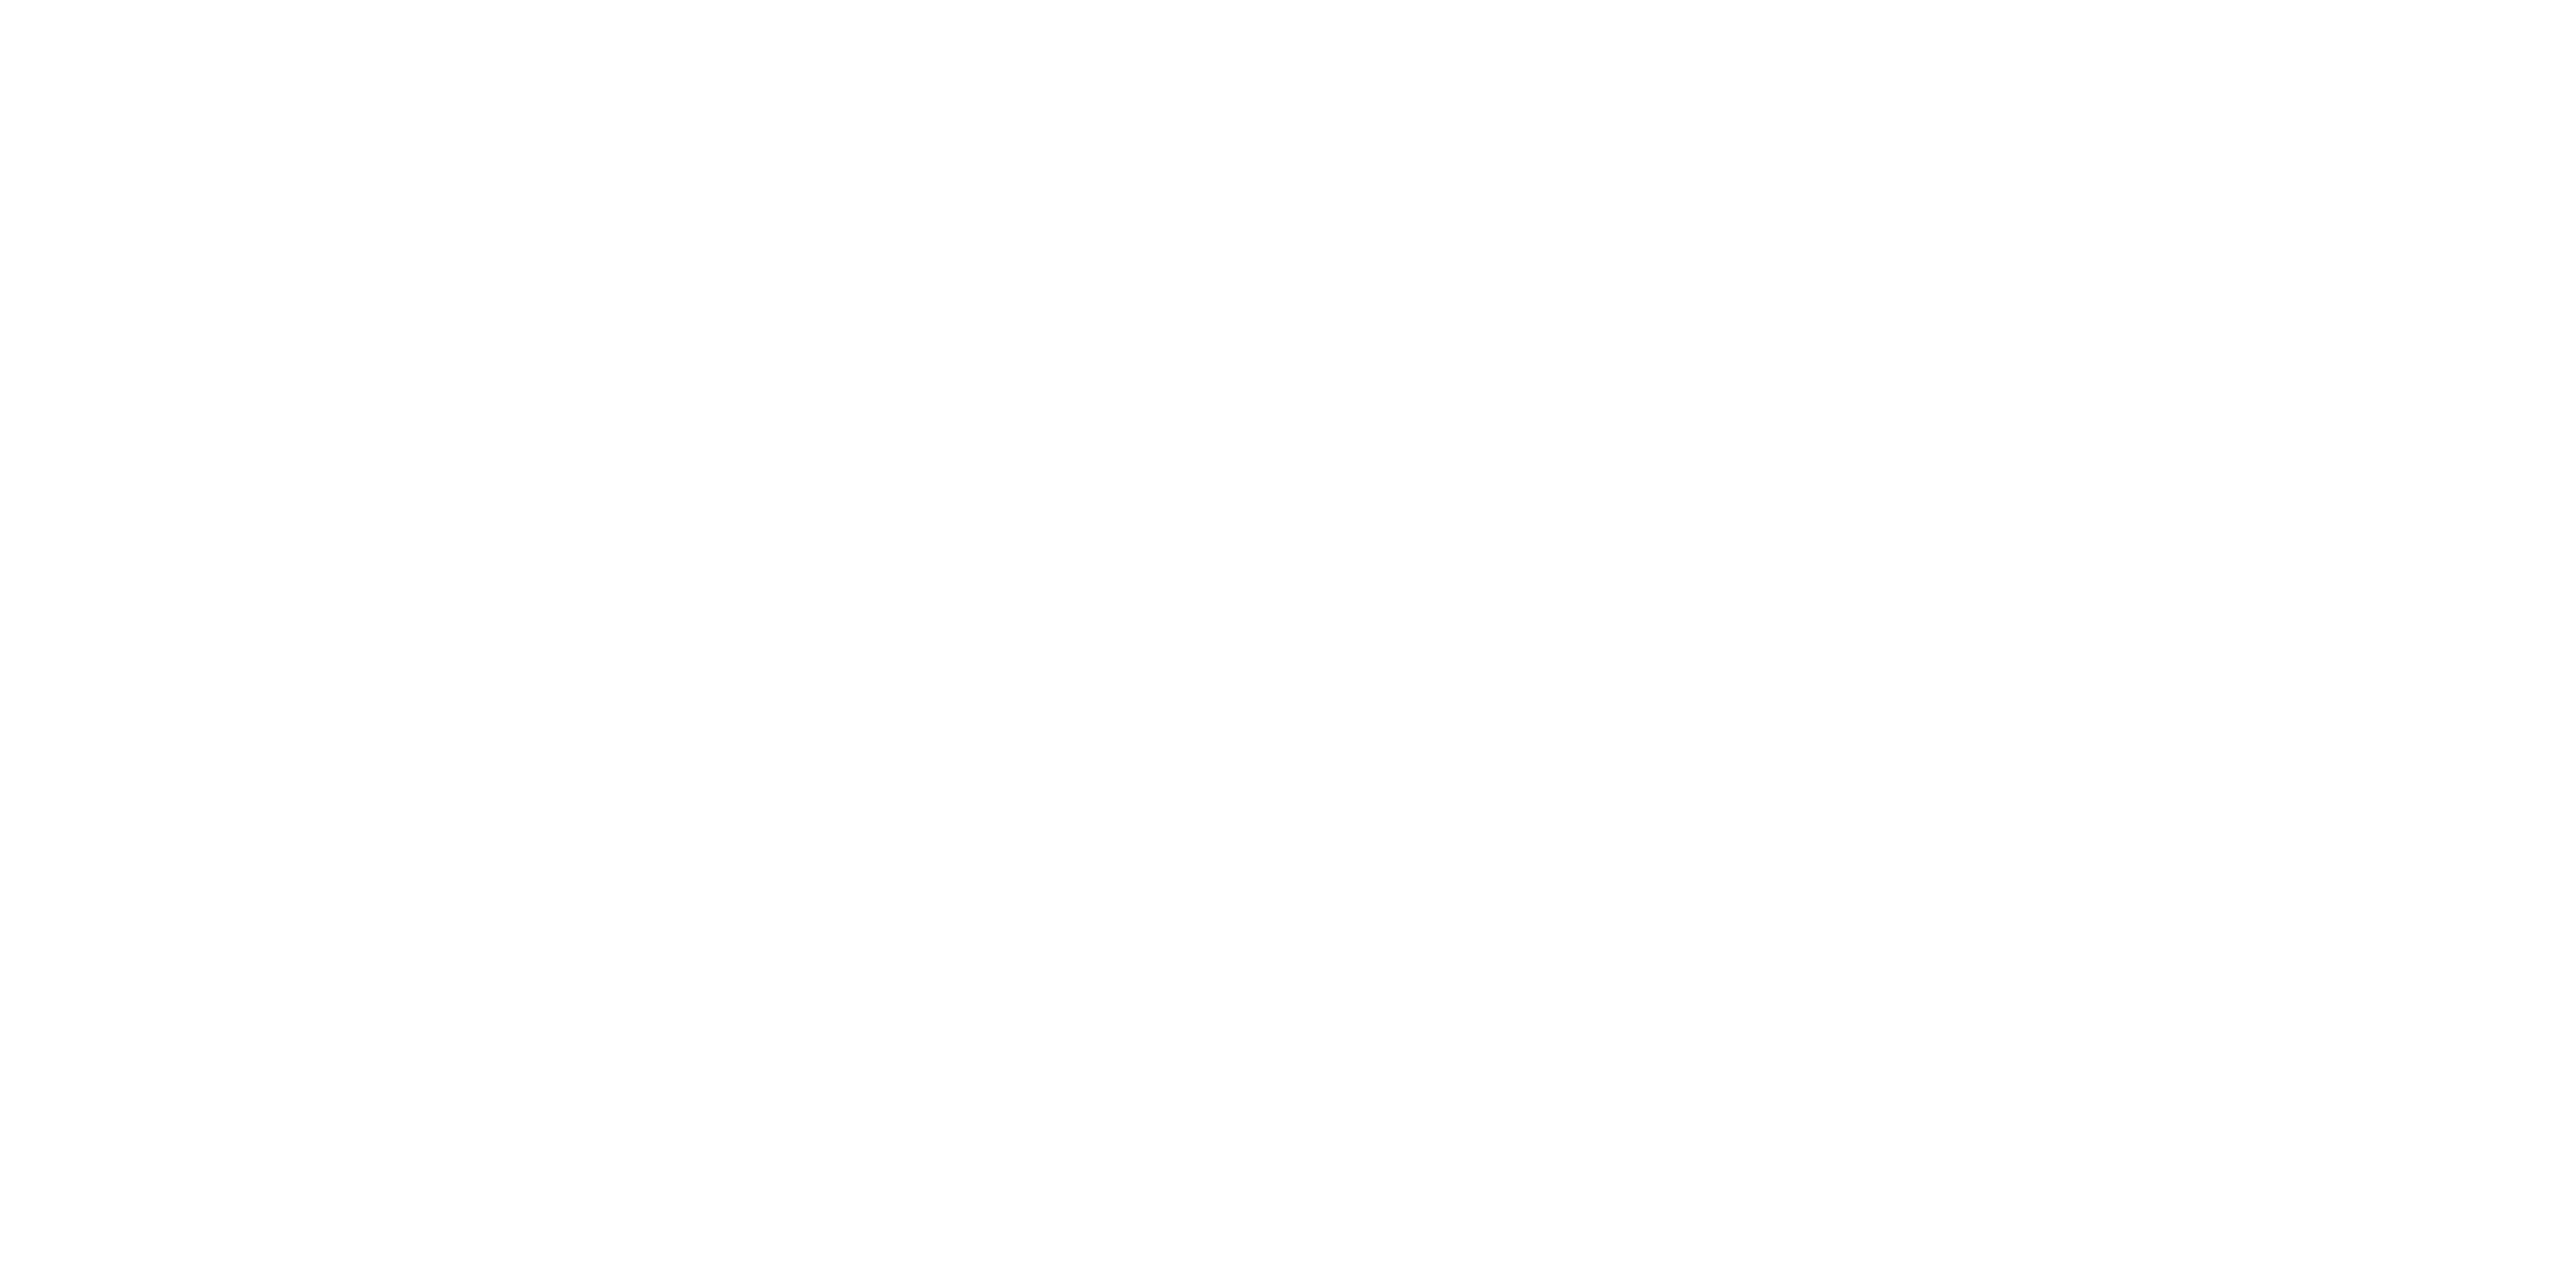

<IPython.core.display.Javascript object>


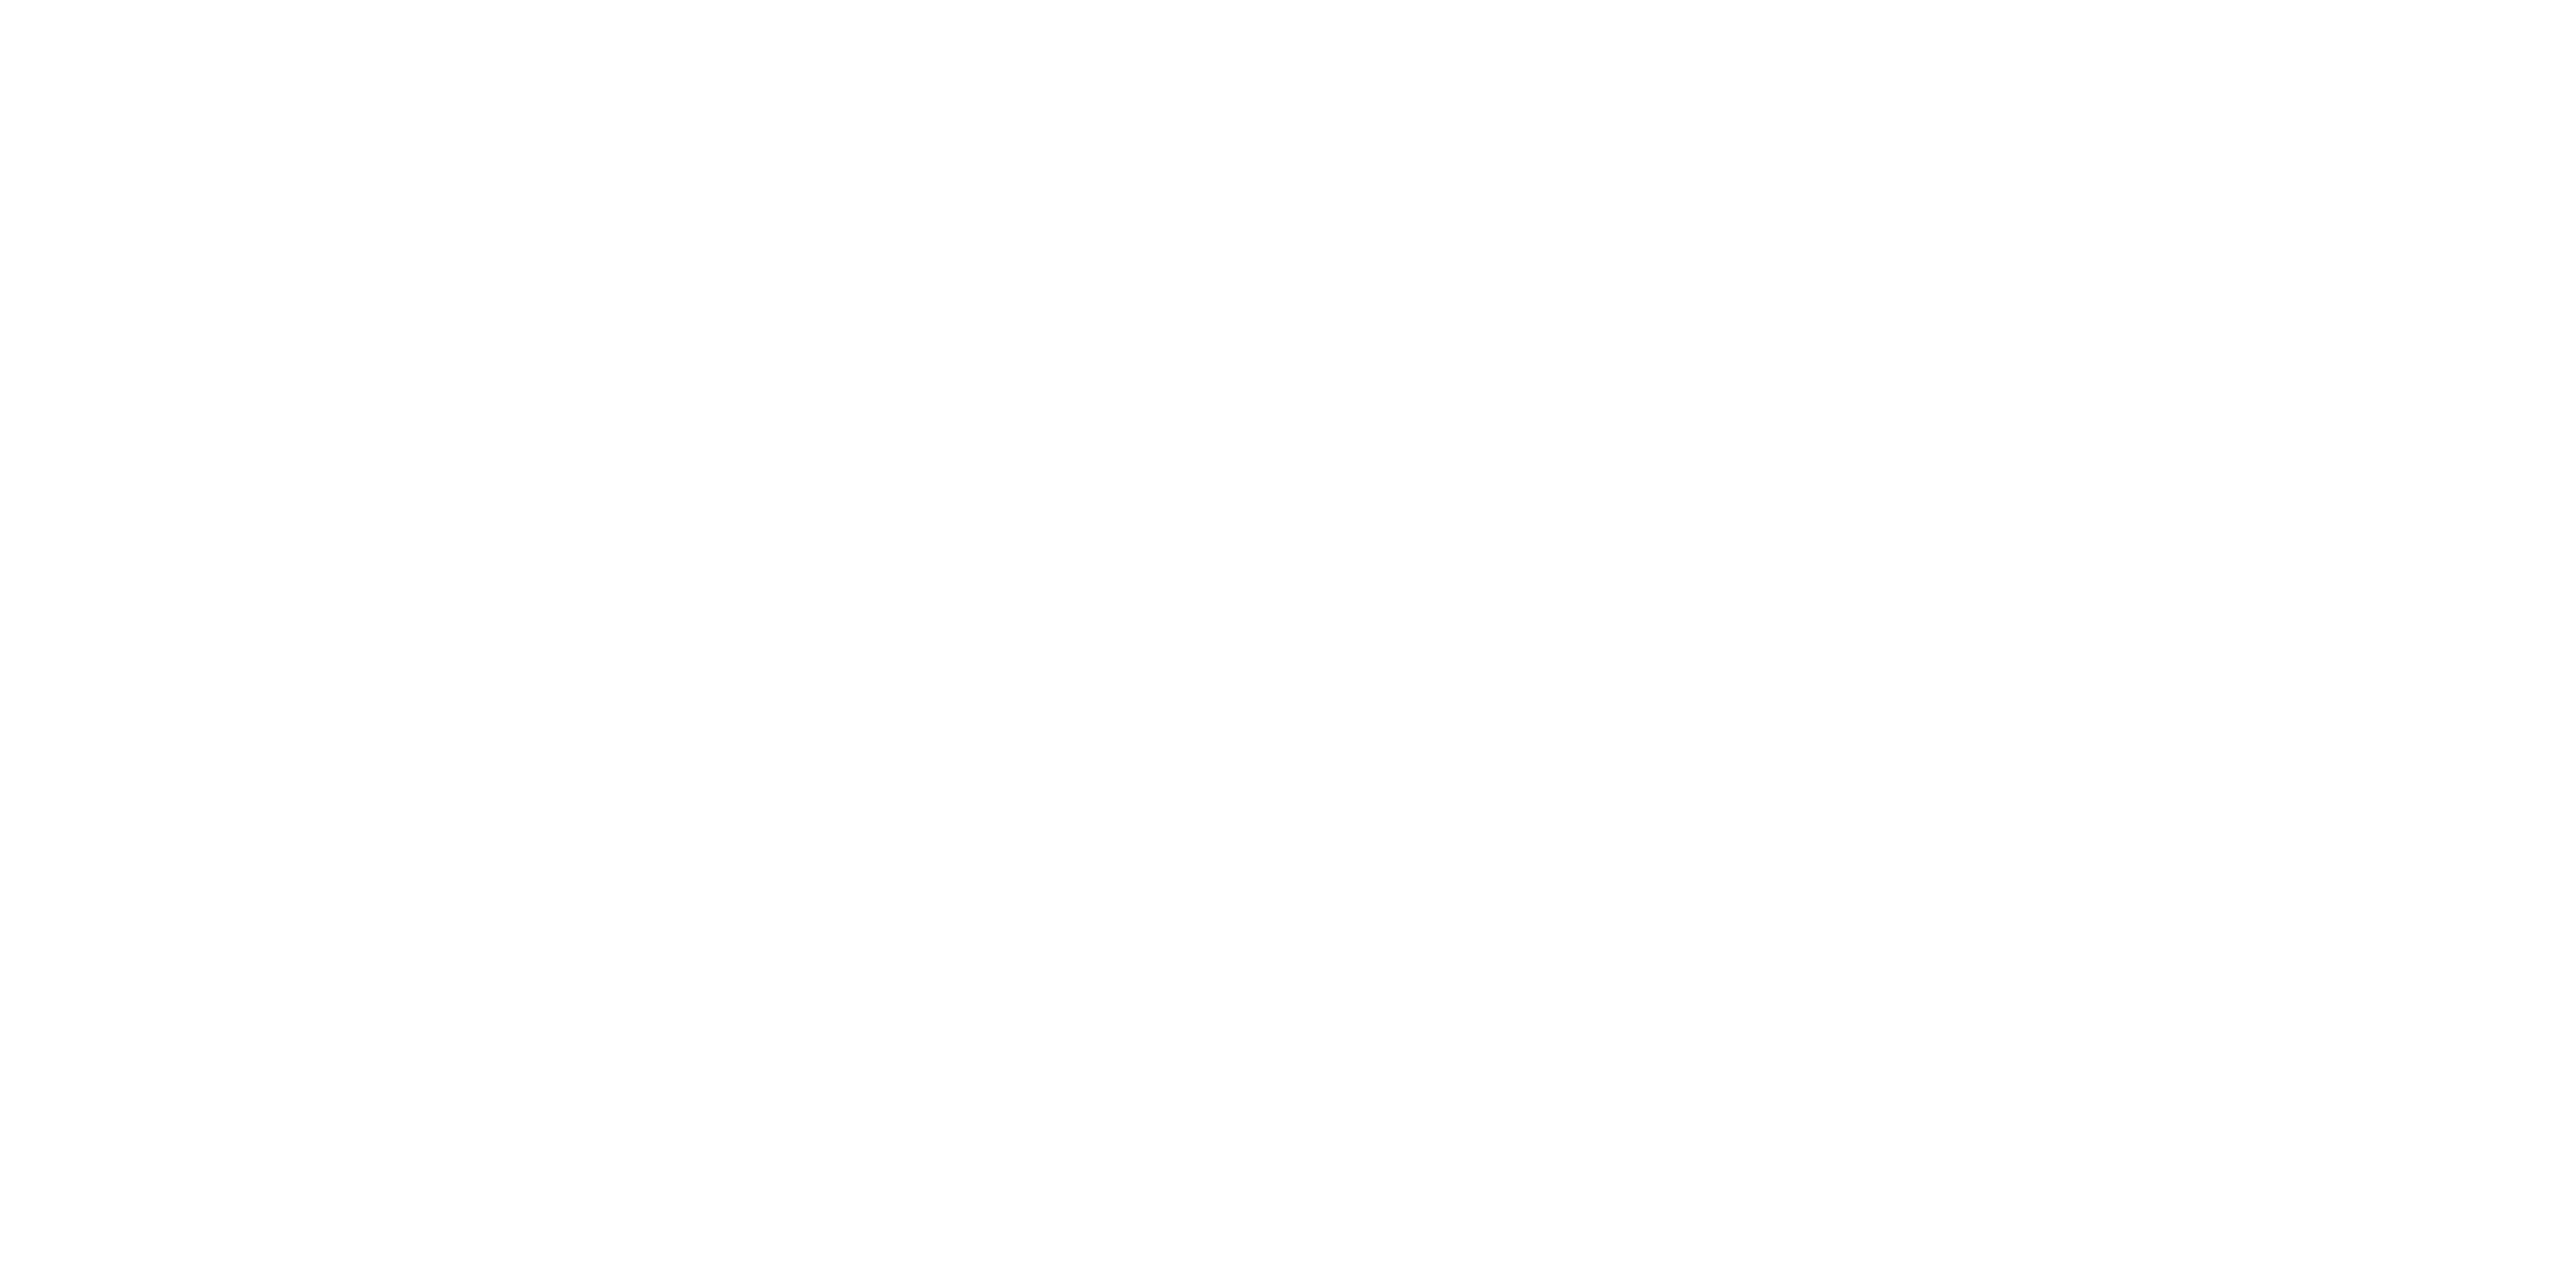

<IPython.core.display.Javascript object>


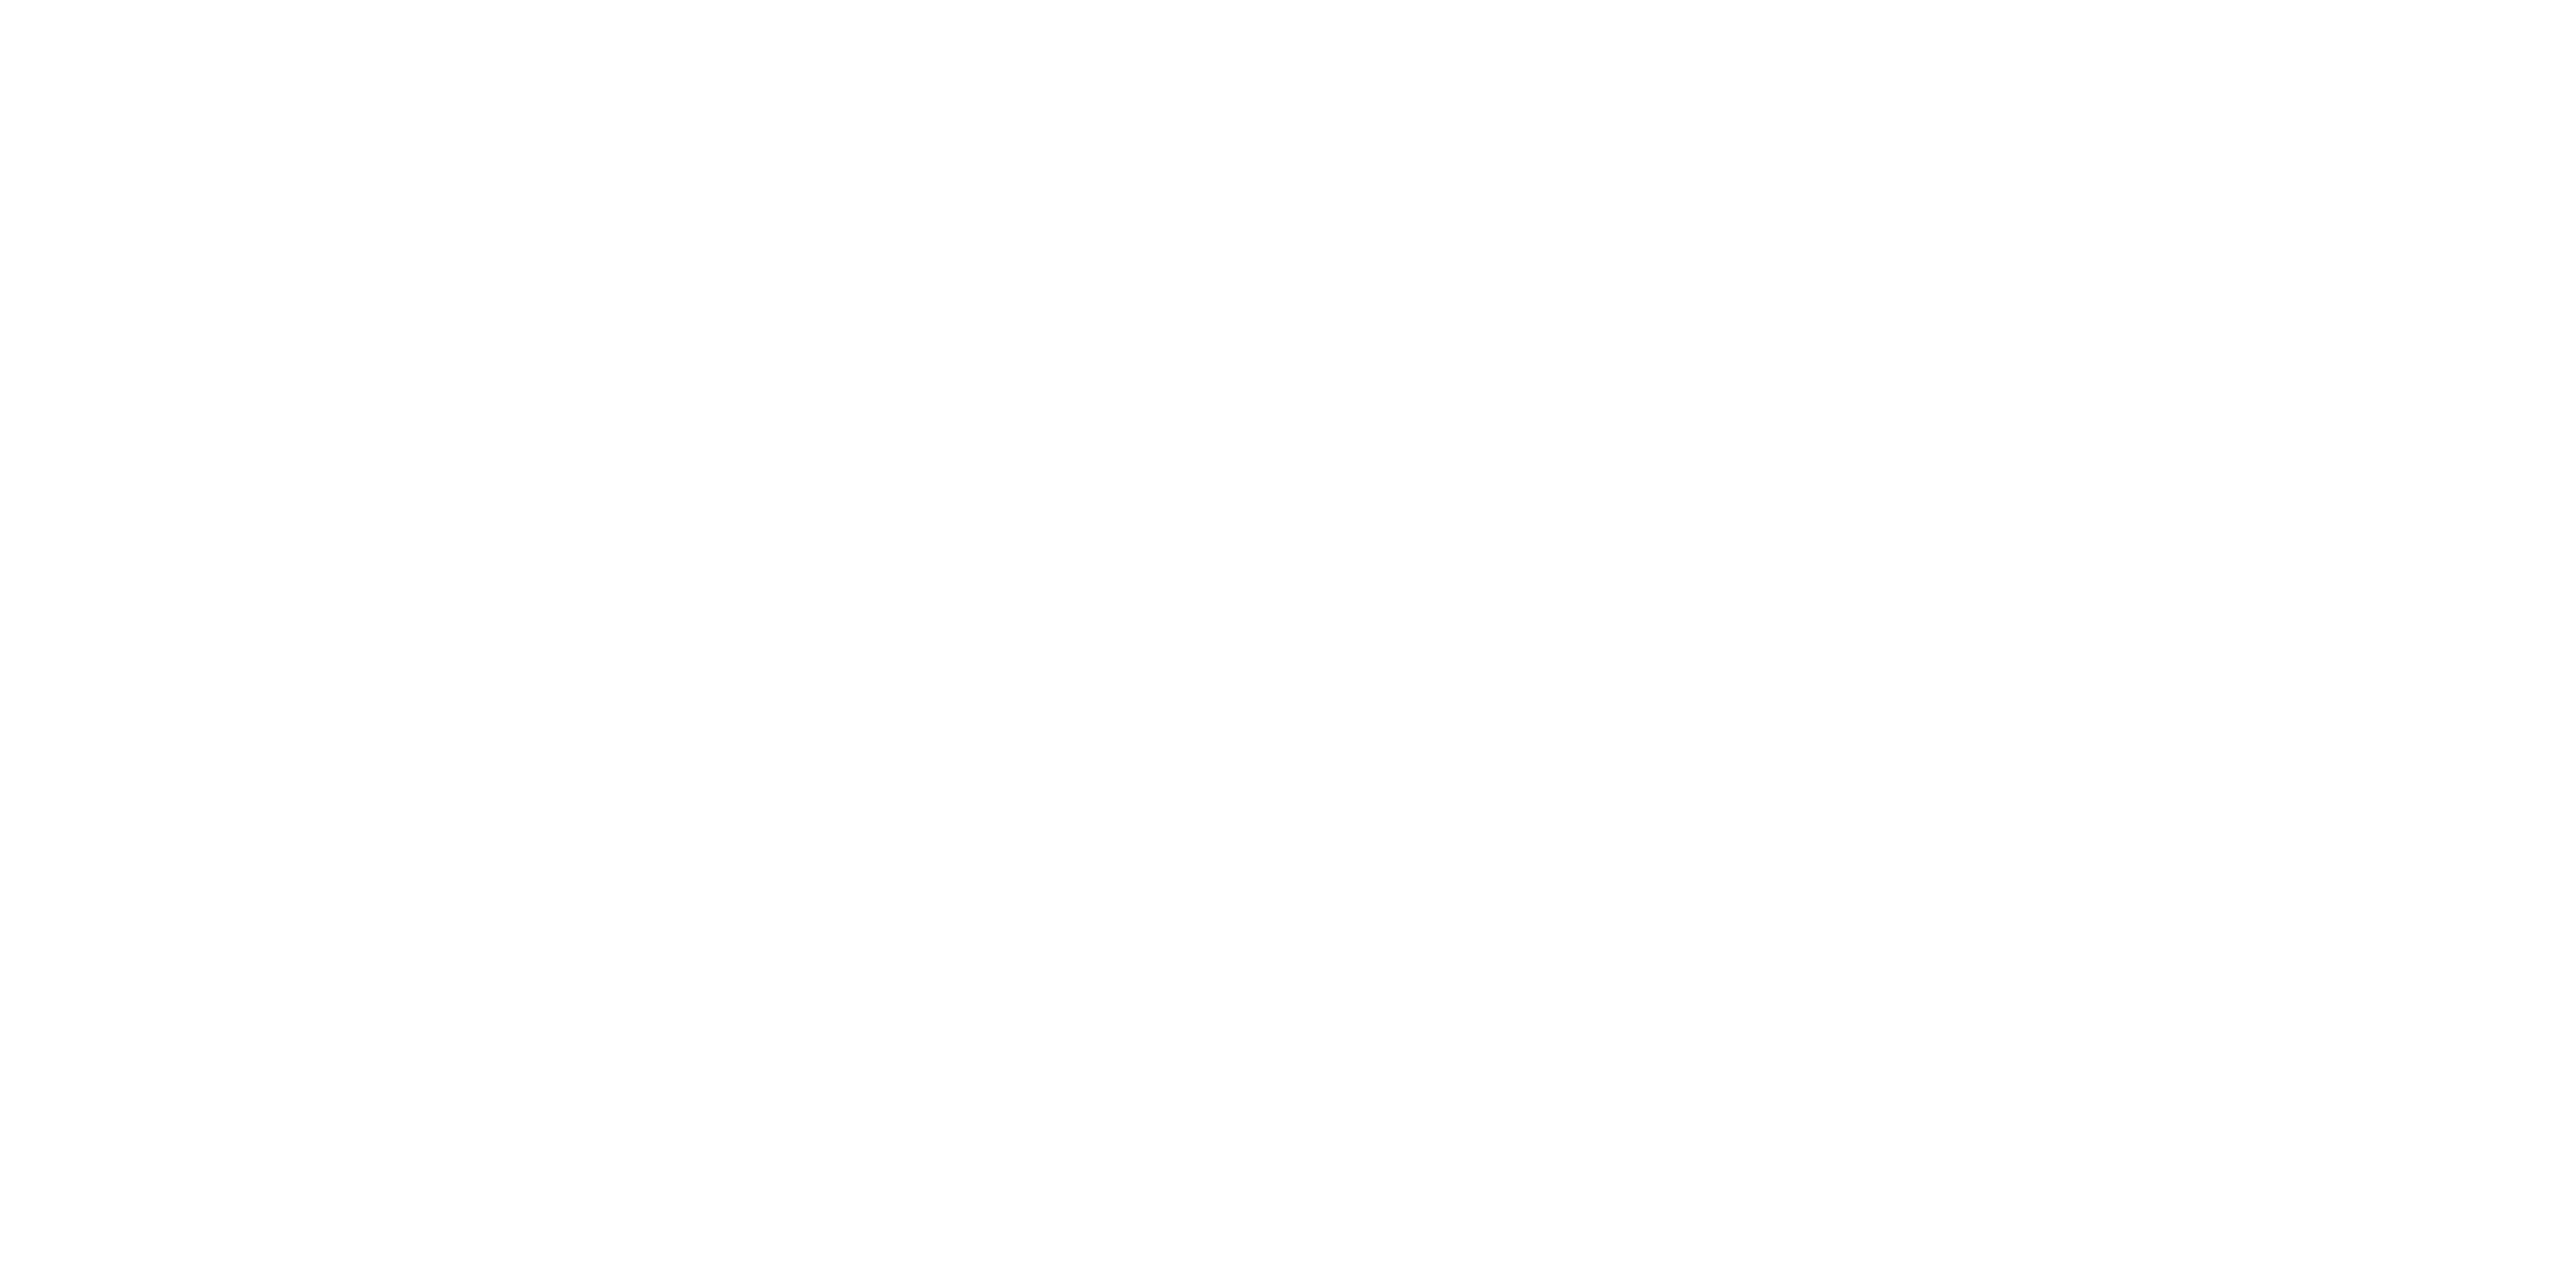

<IPython.core.display.Javascript object>


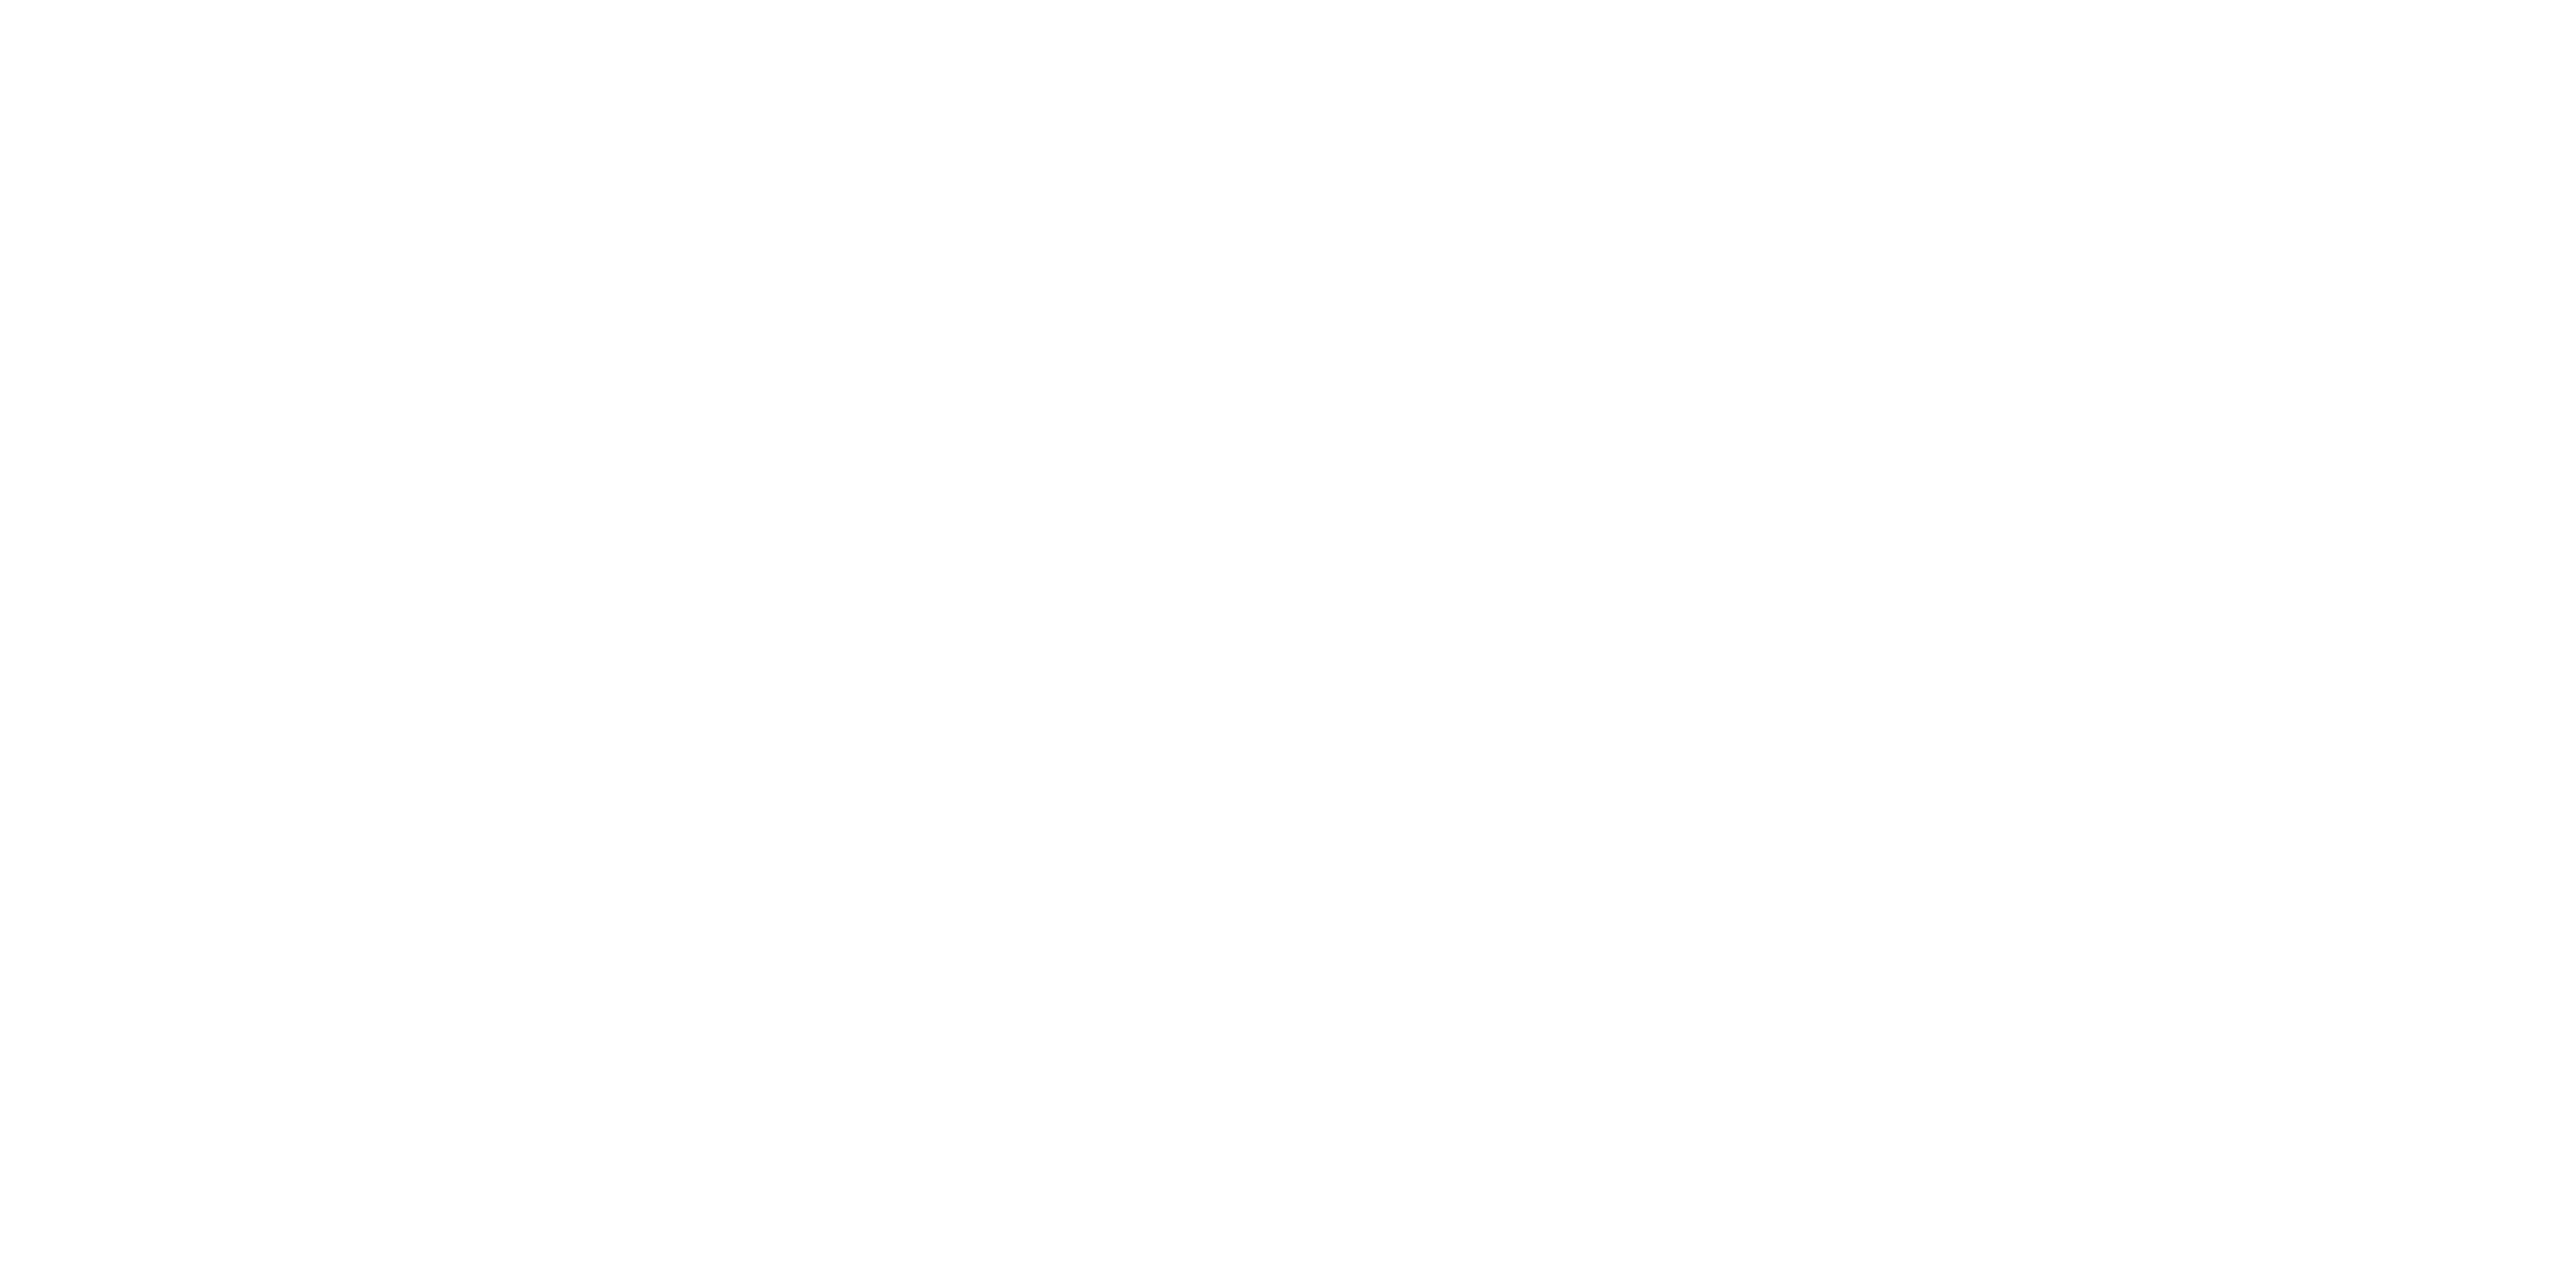

<IPython.core.display.Javascript object>


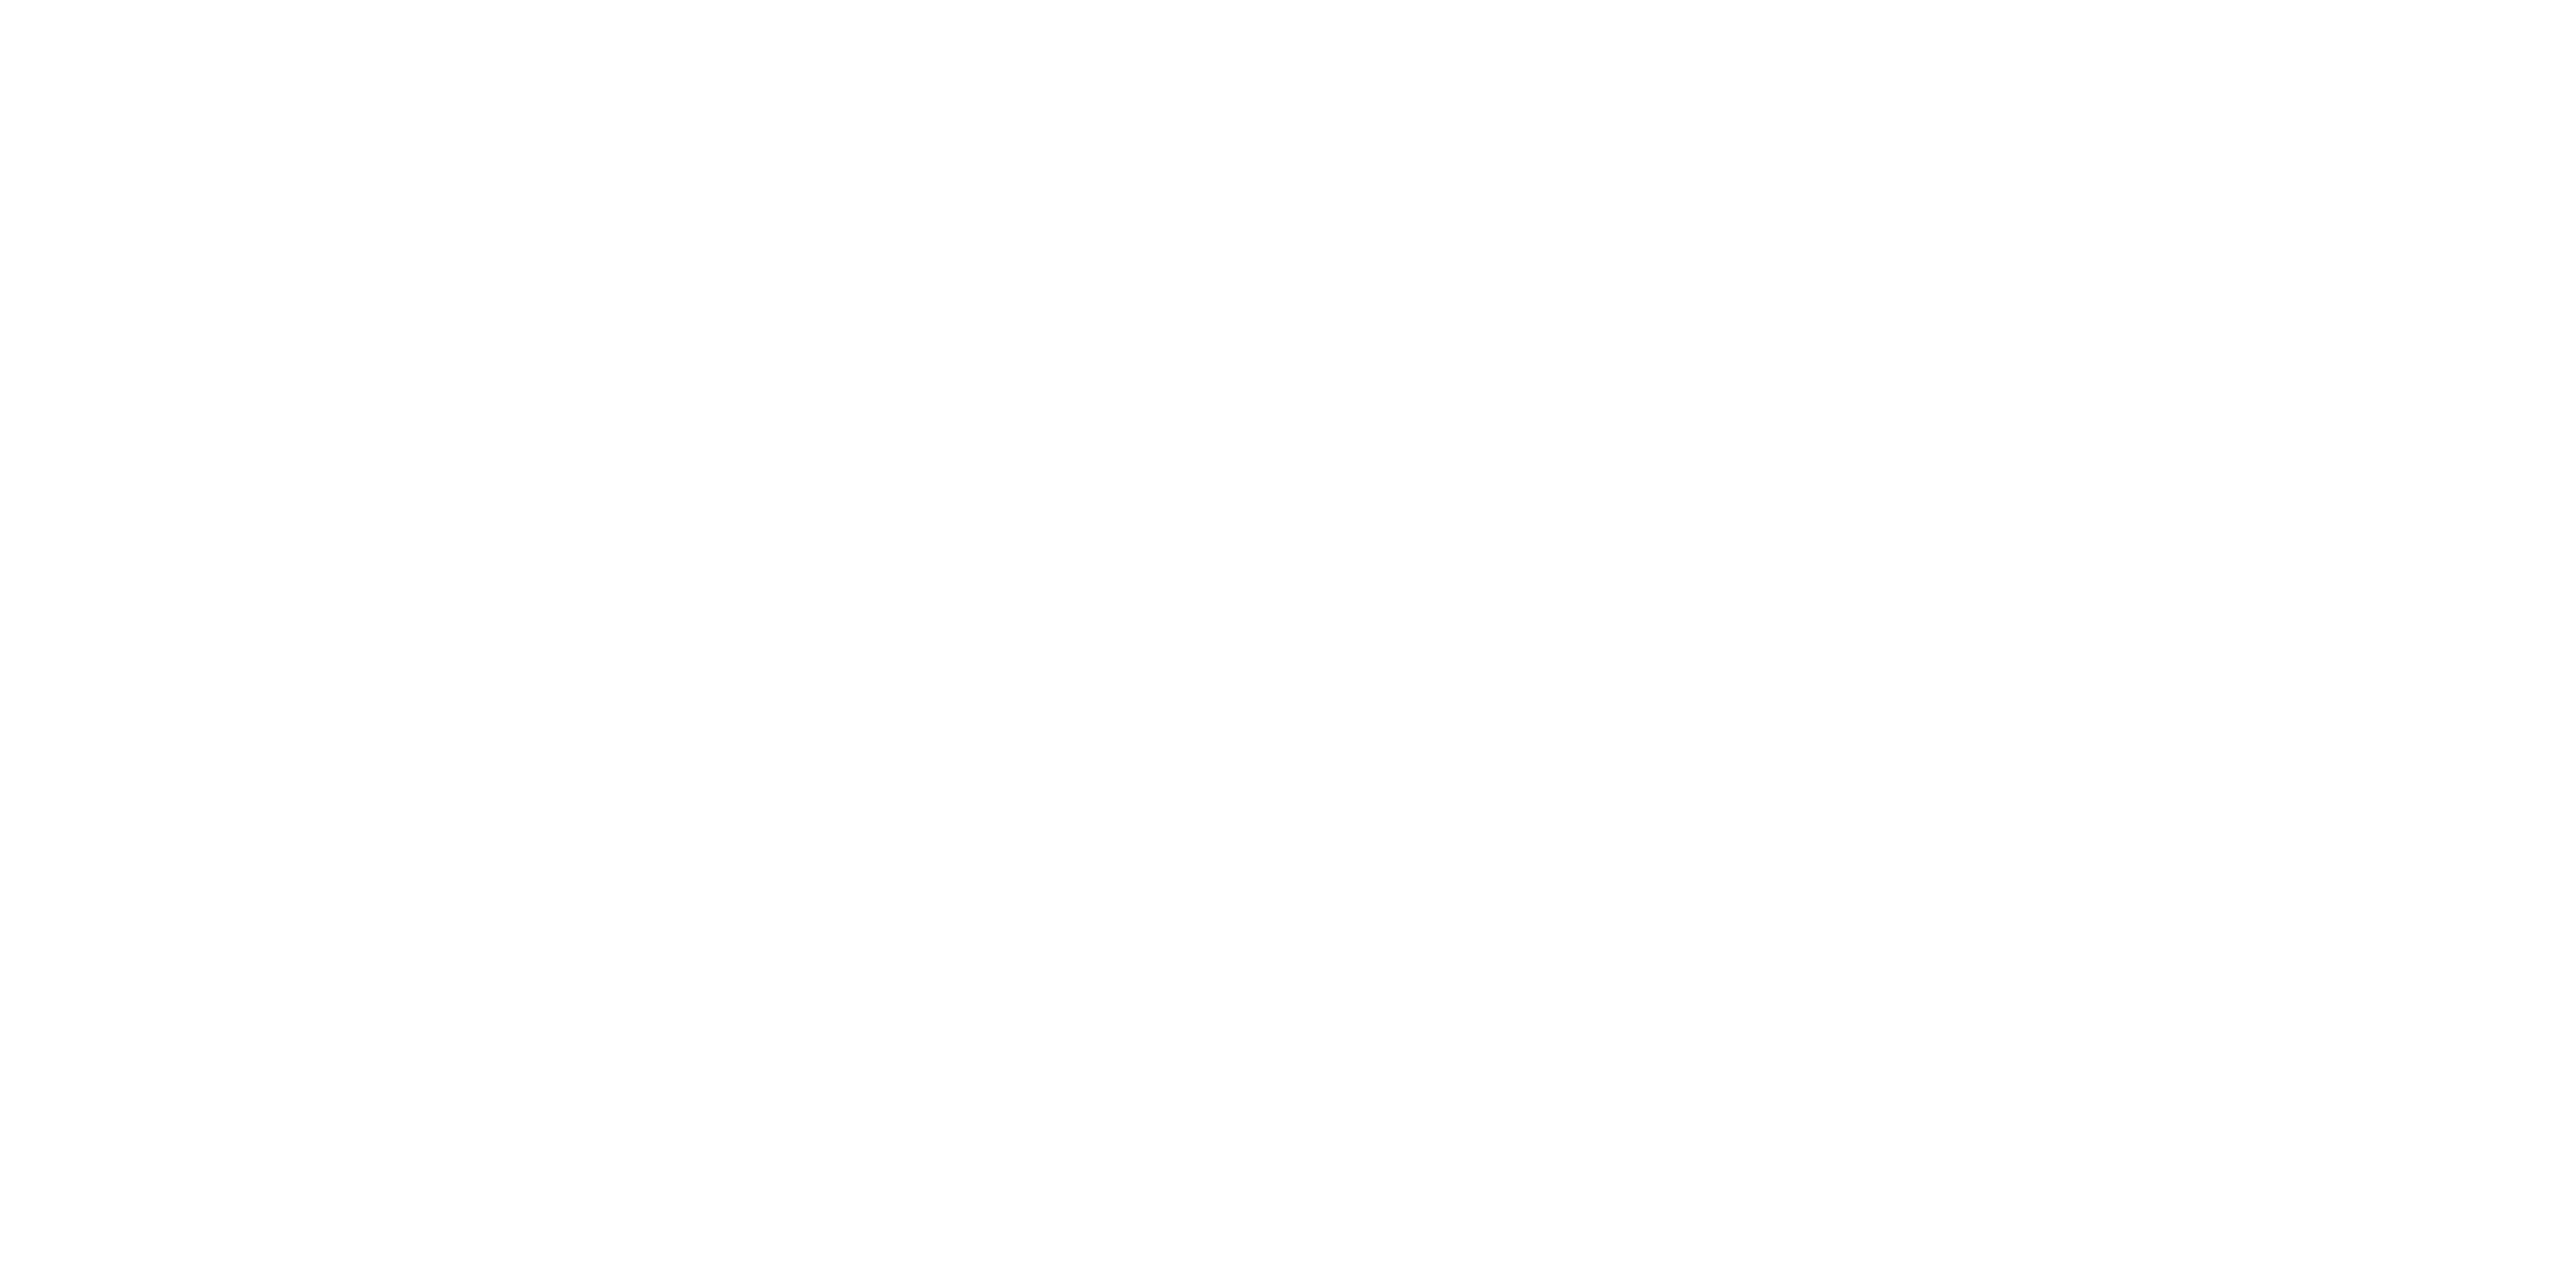

<IPython.core.display.Javascript object>


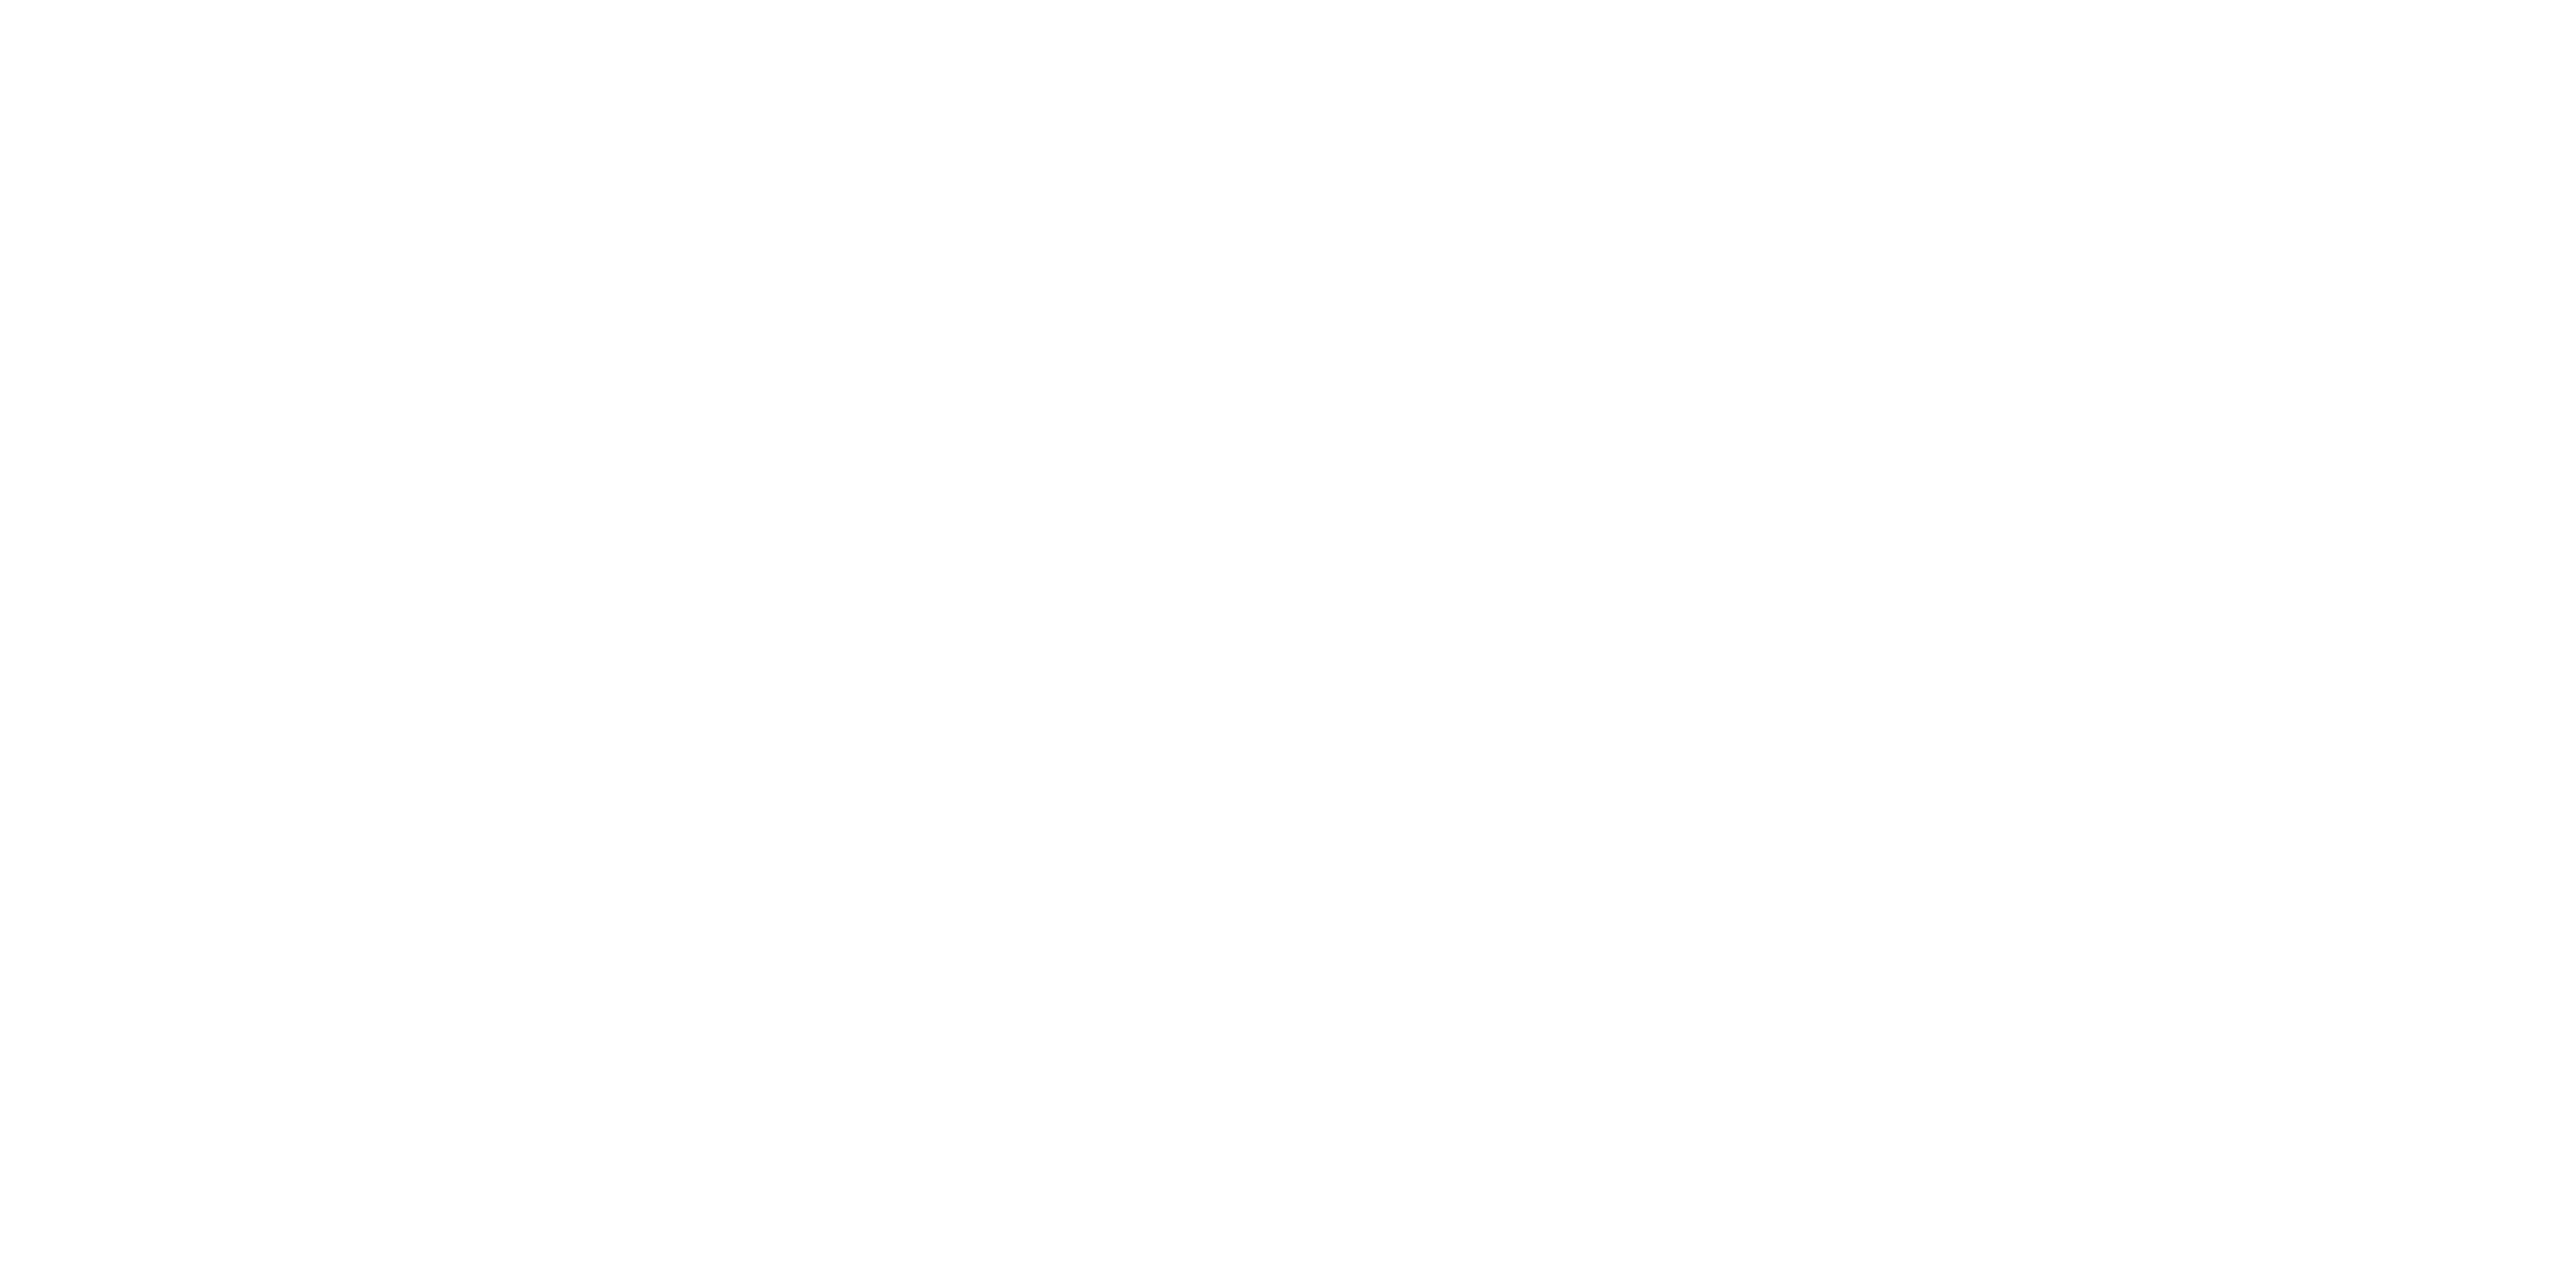

<IPython.core.display.Javascript object>


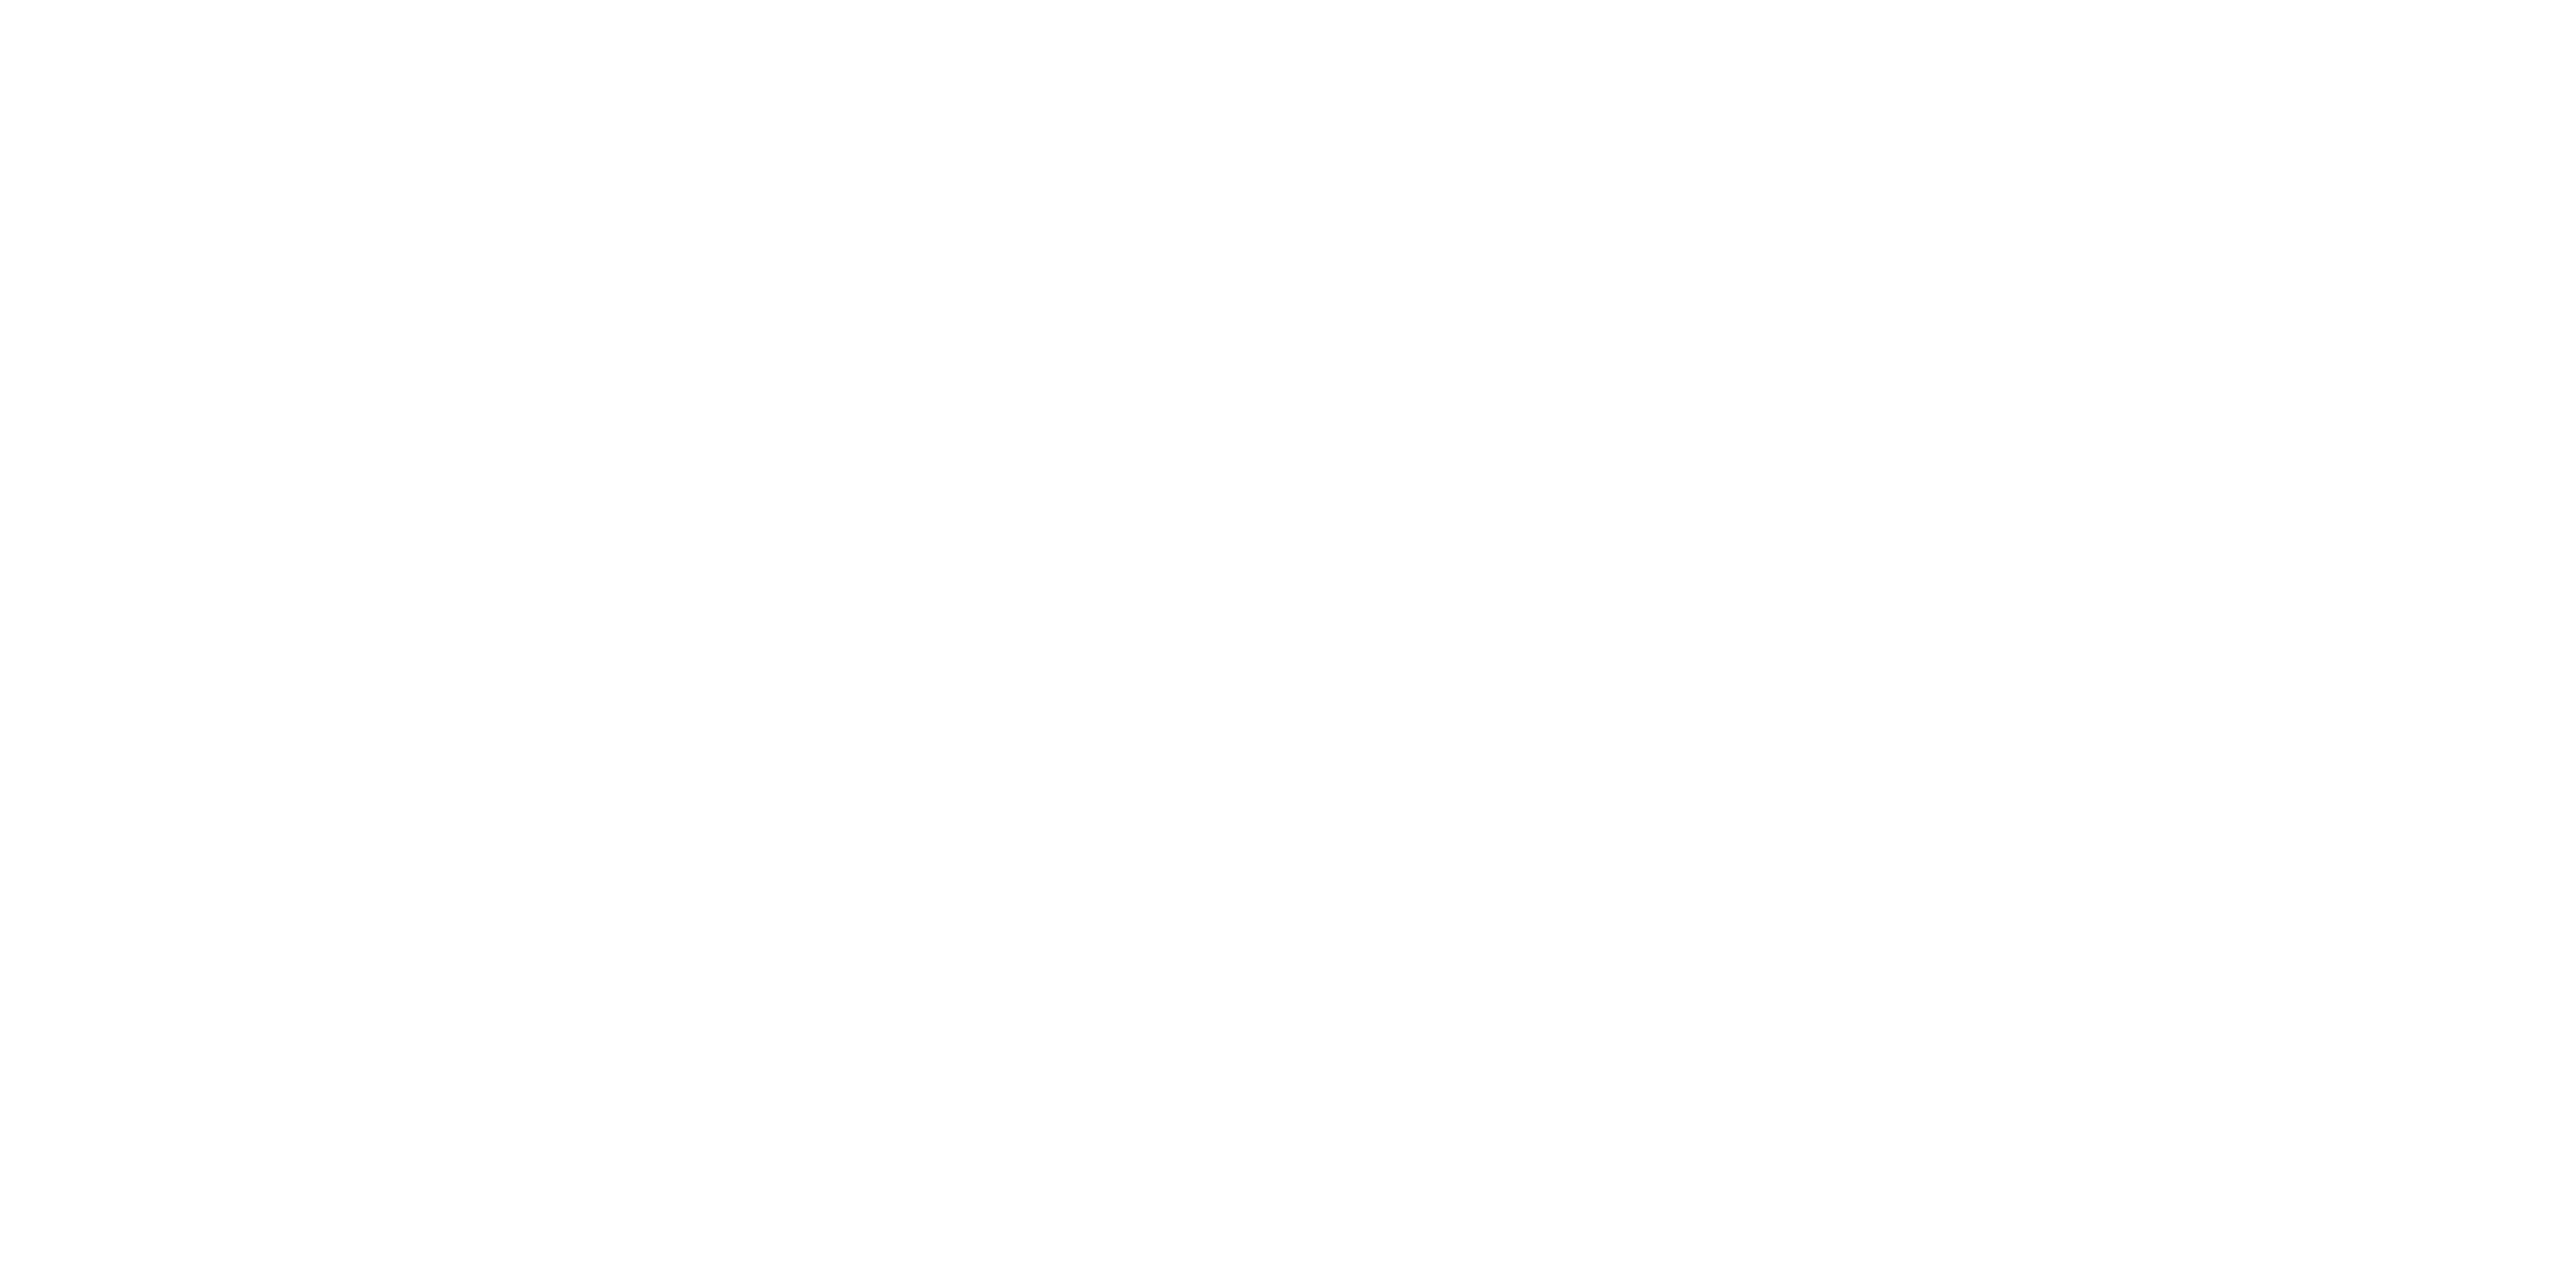

<IPython.core.display.Javascript object>


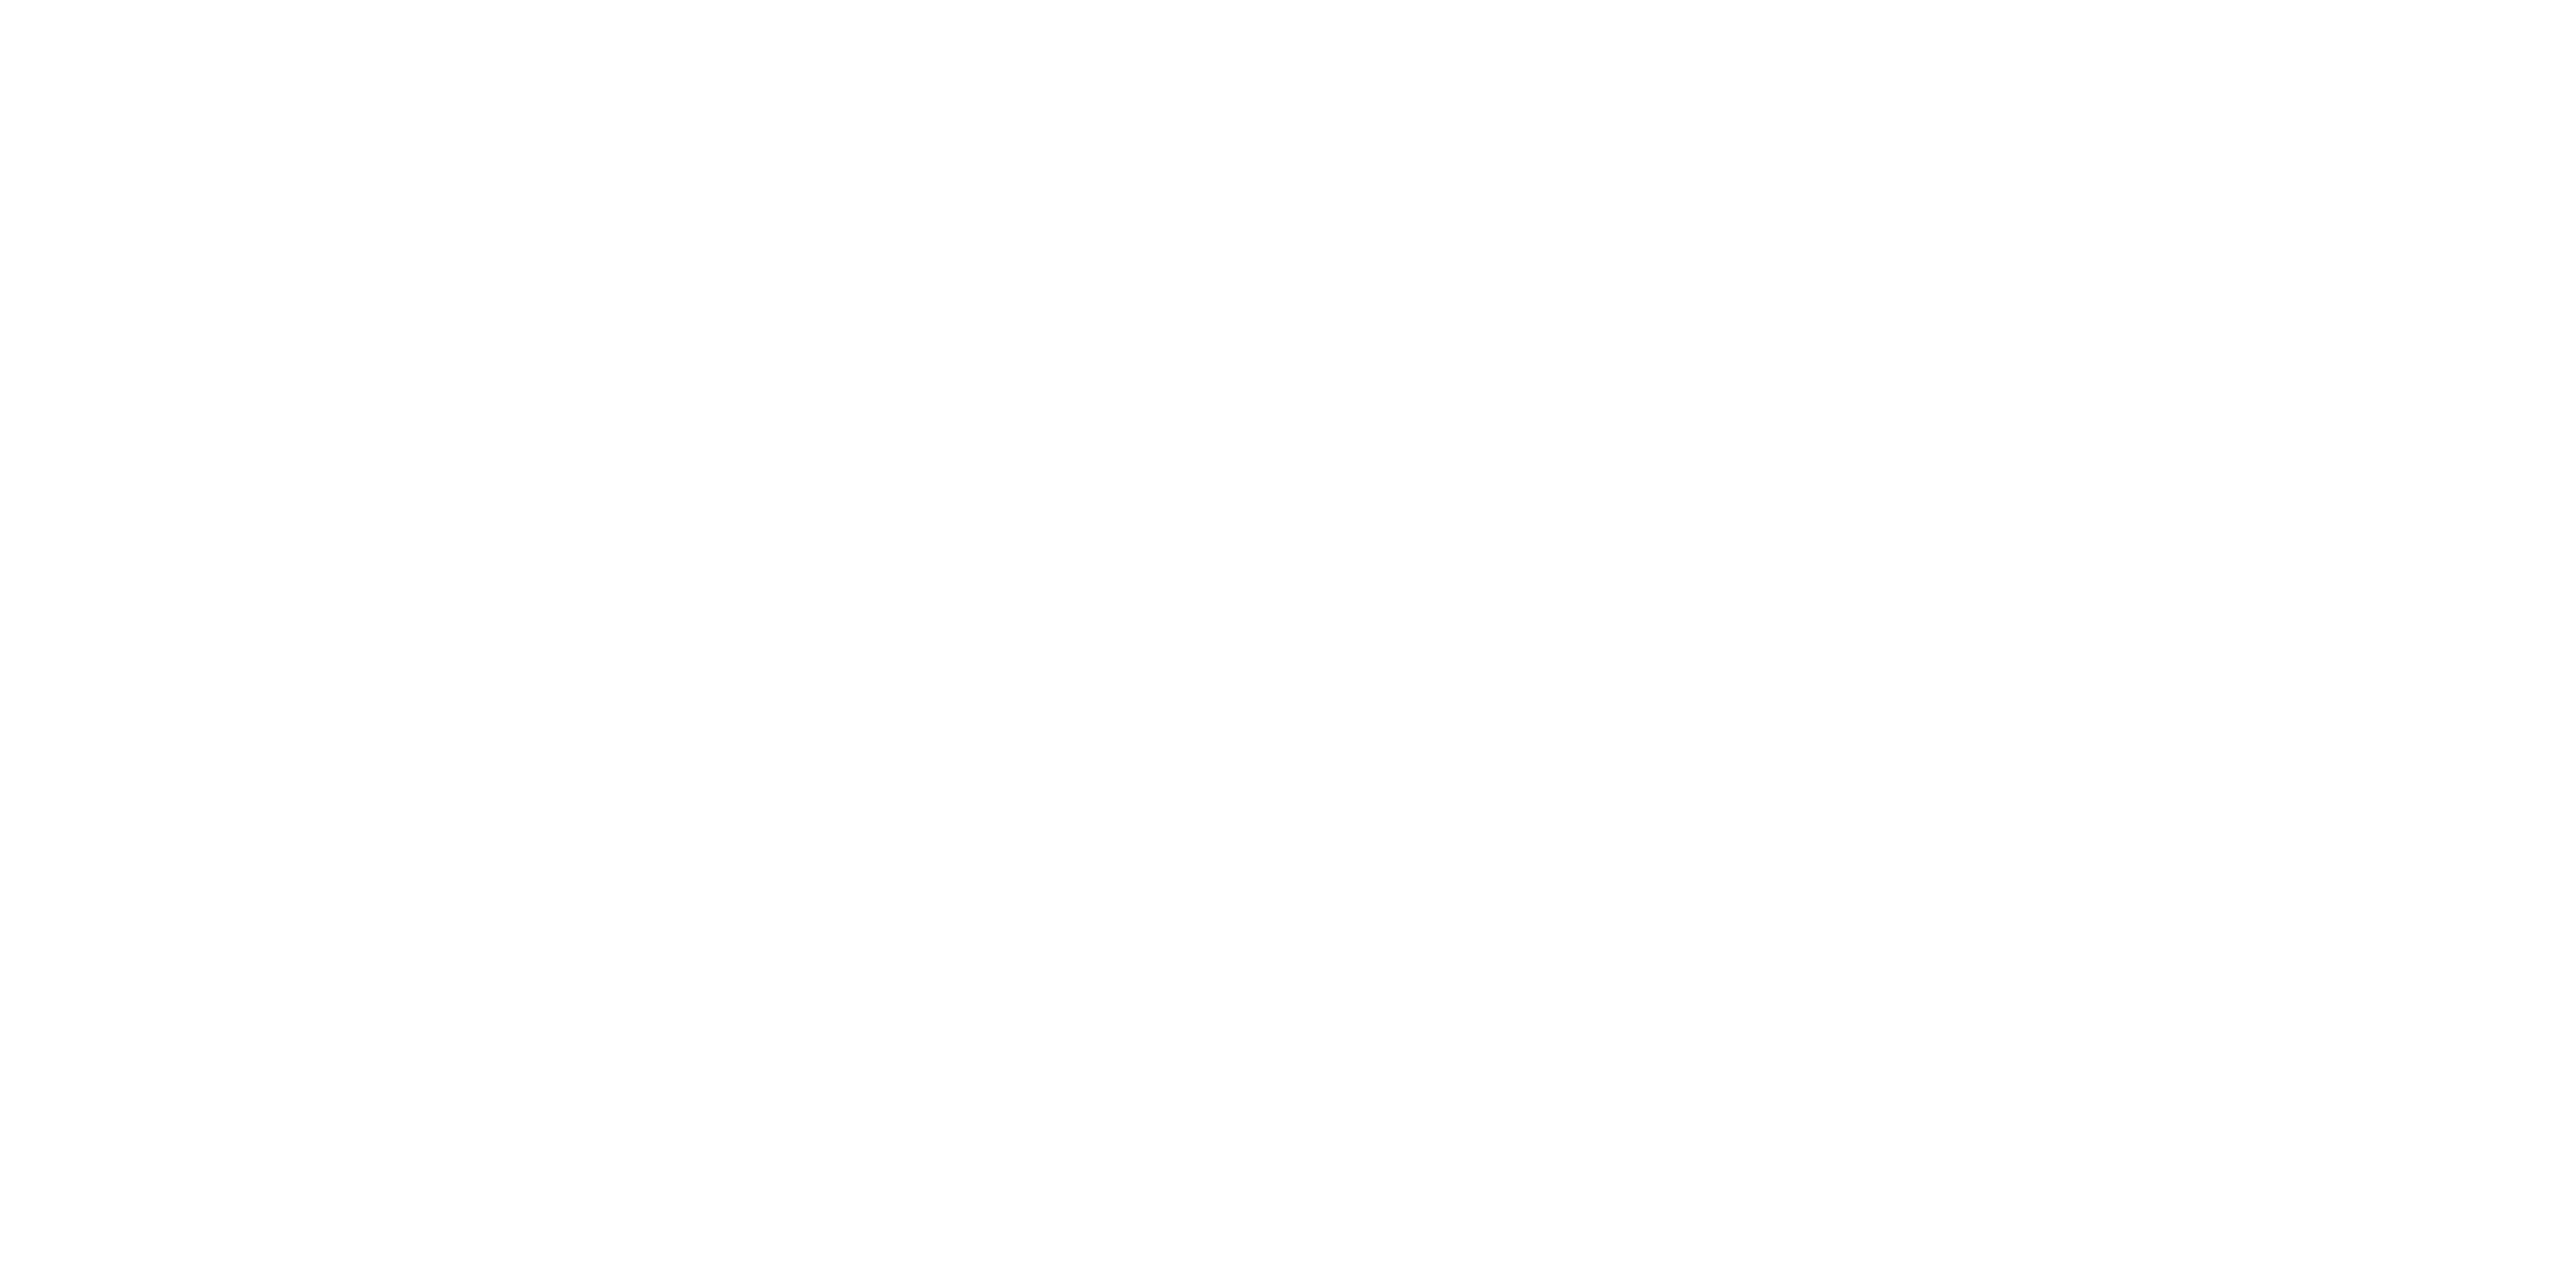

<IPython.core.display.Javascript object>


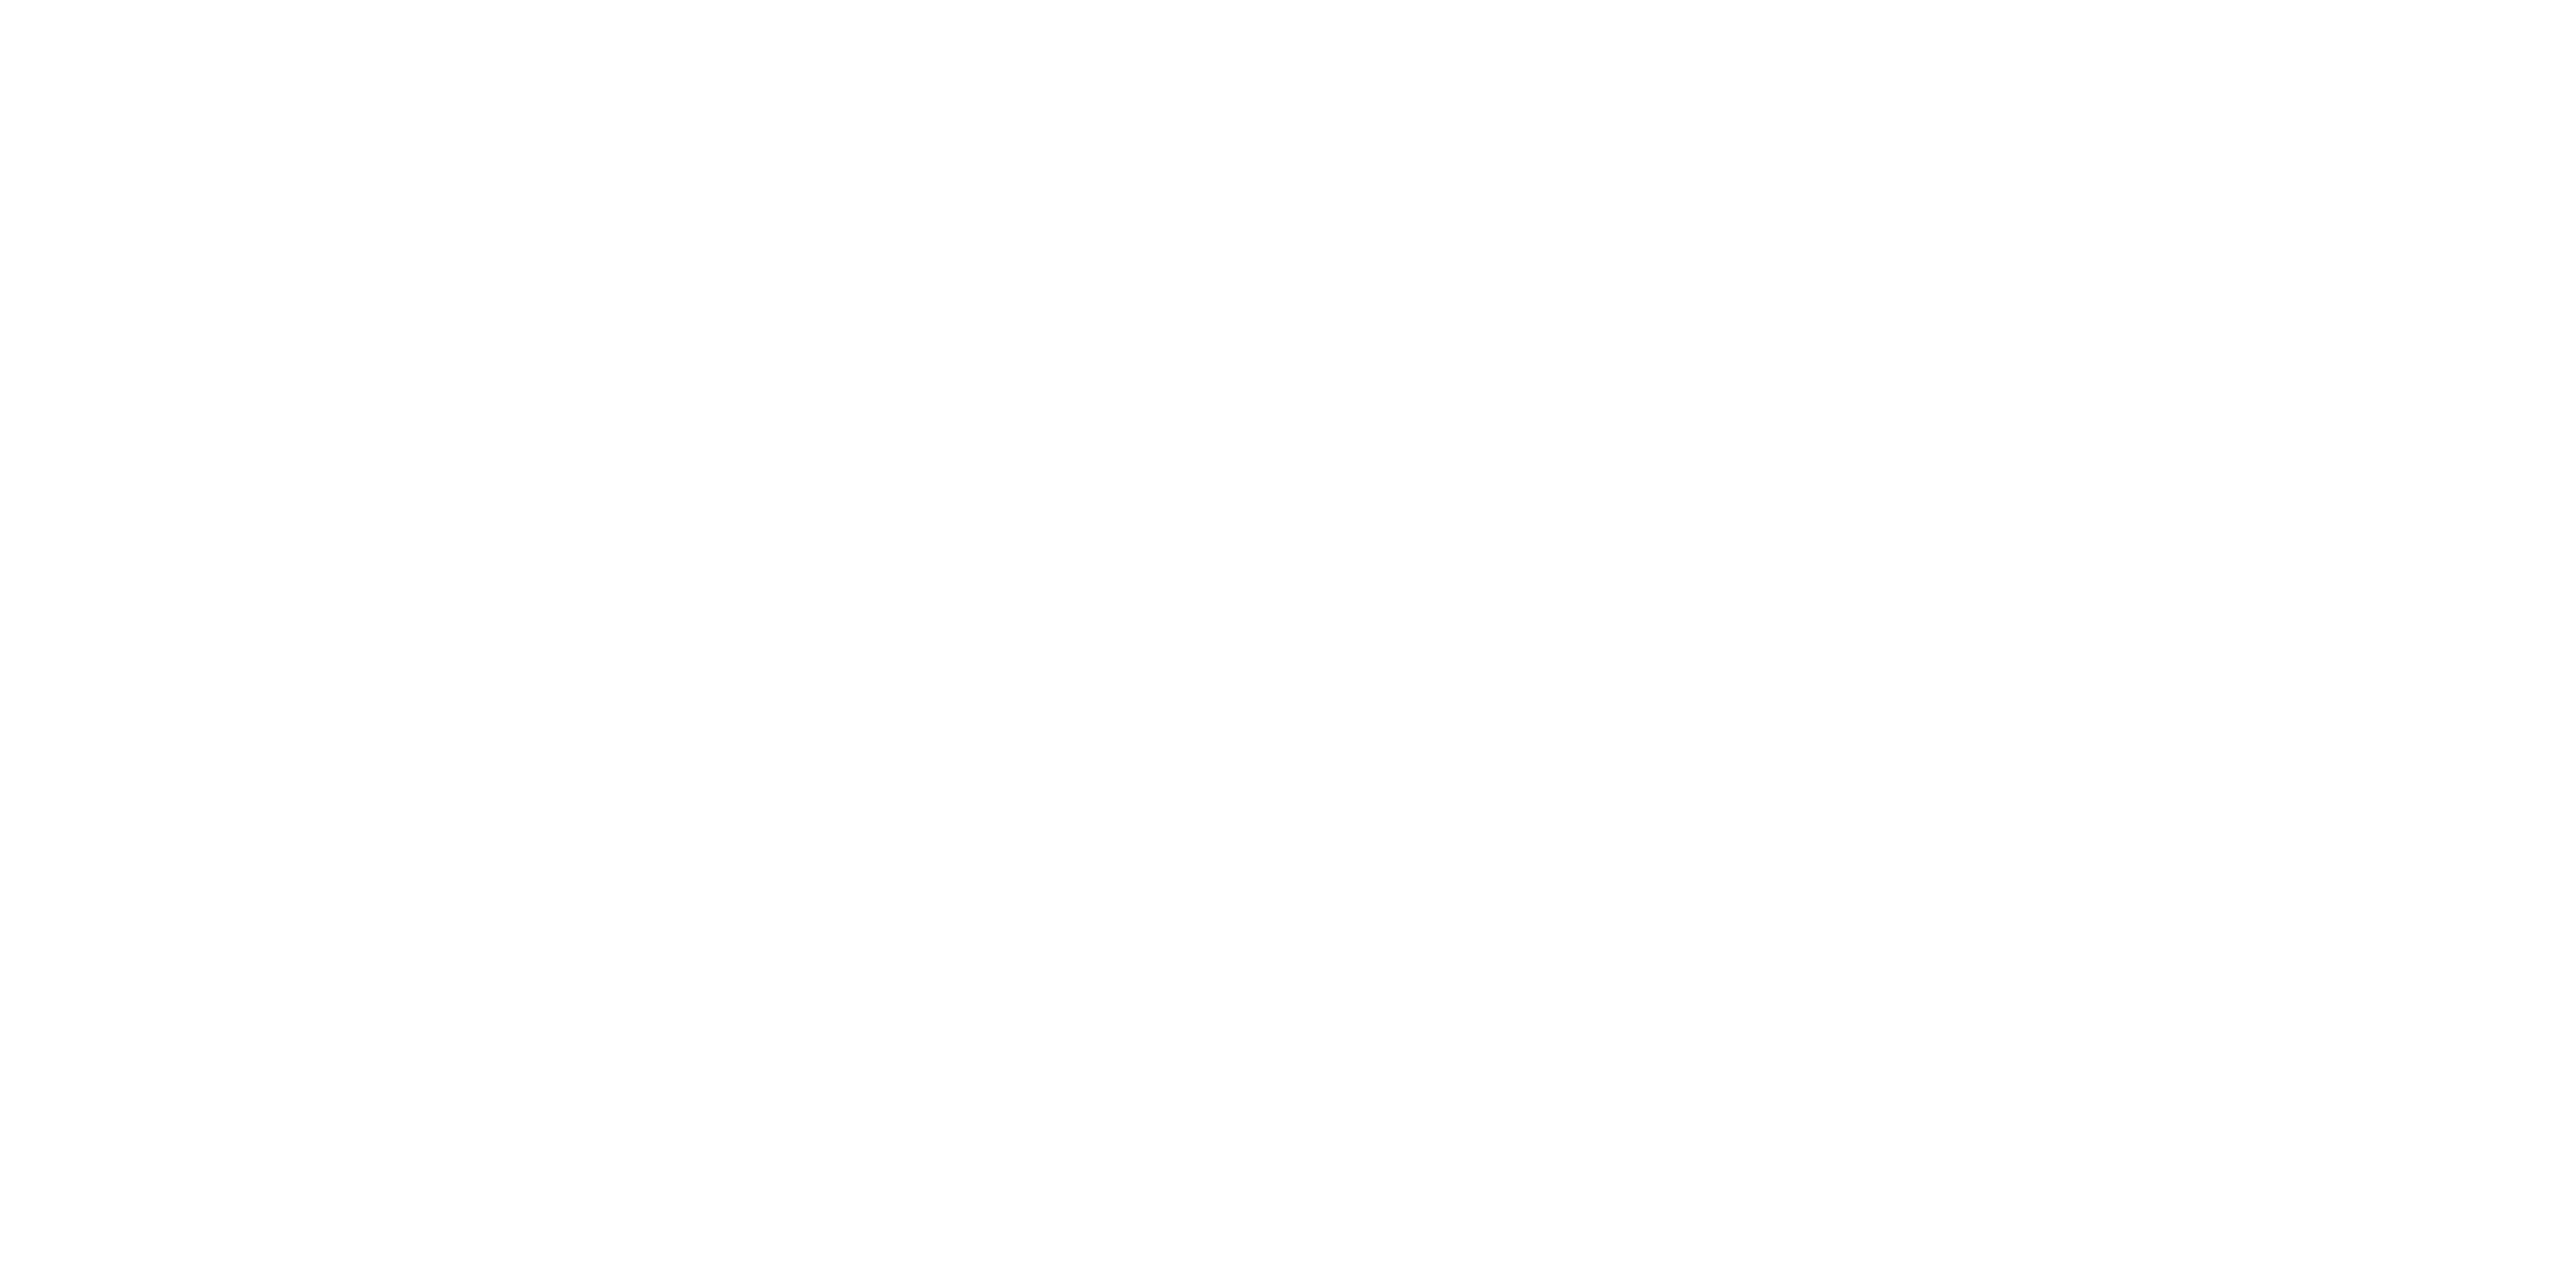

<IPython.core.display.Javascript object>


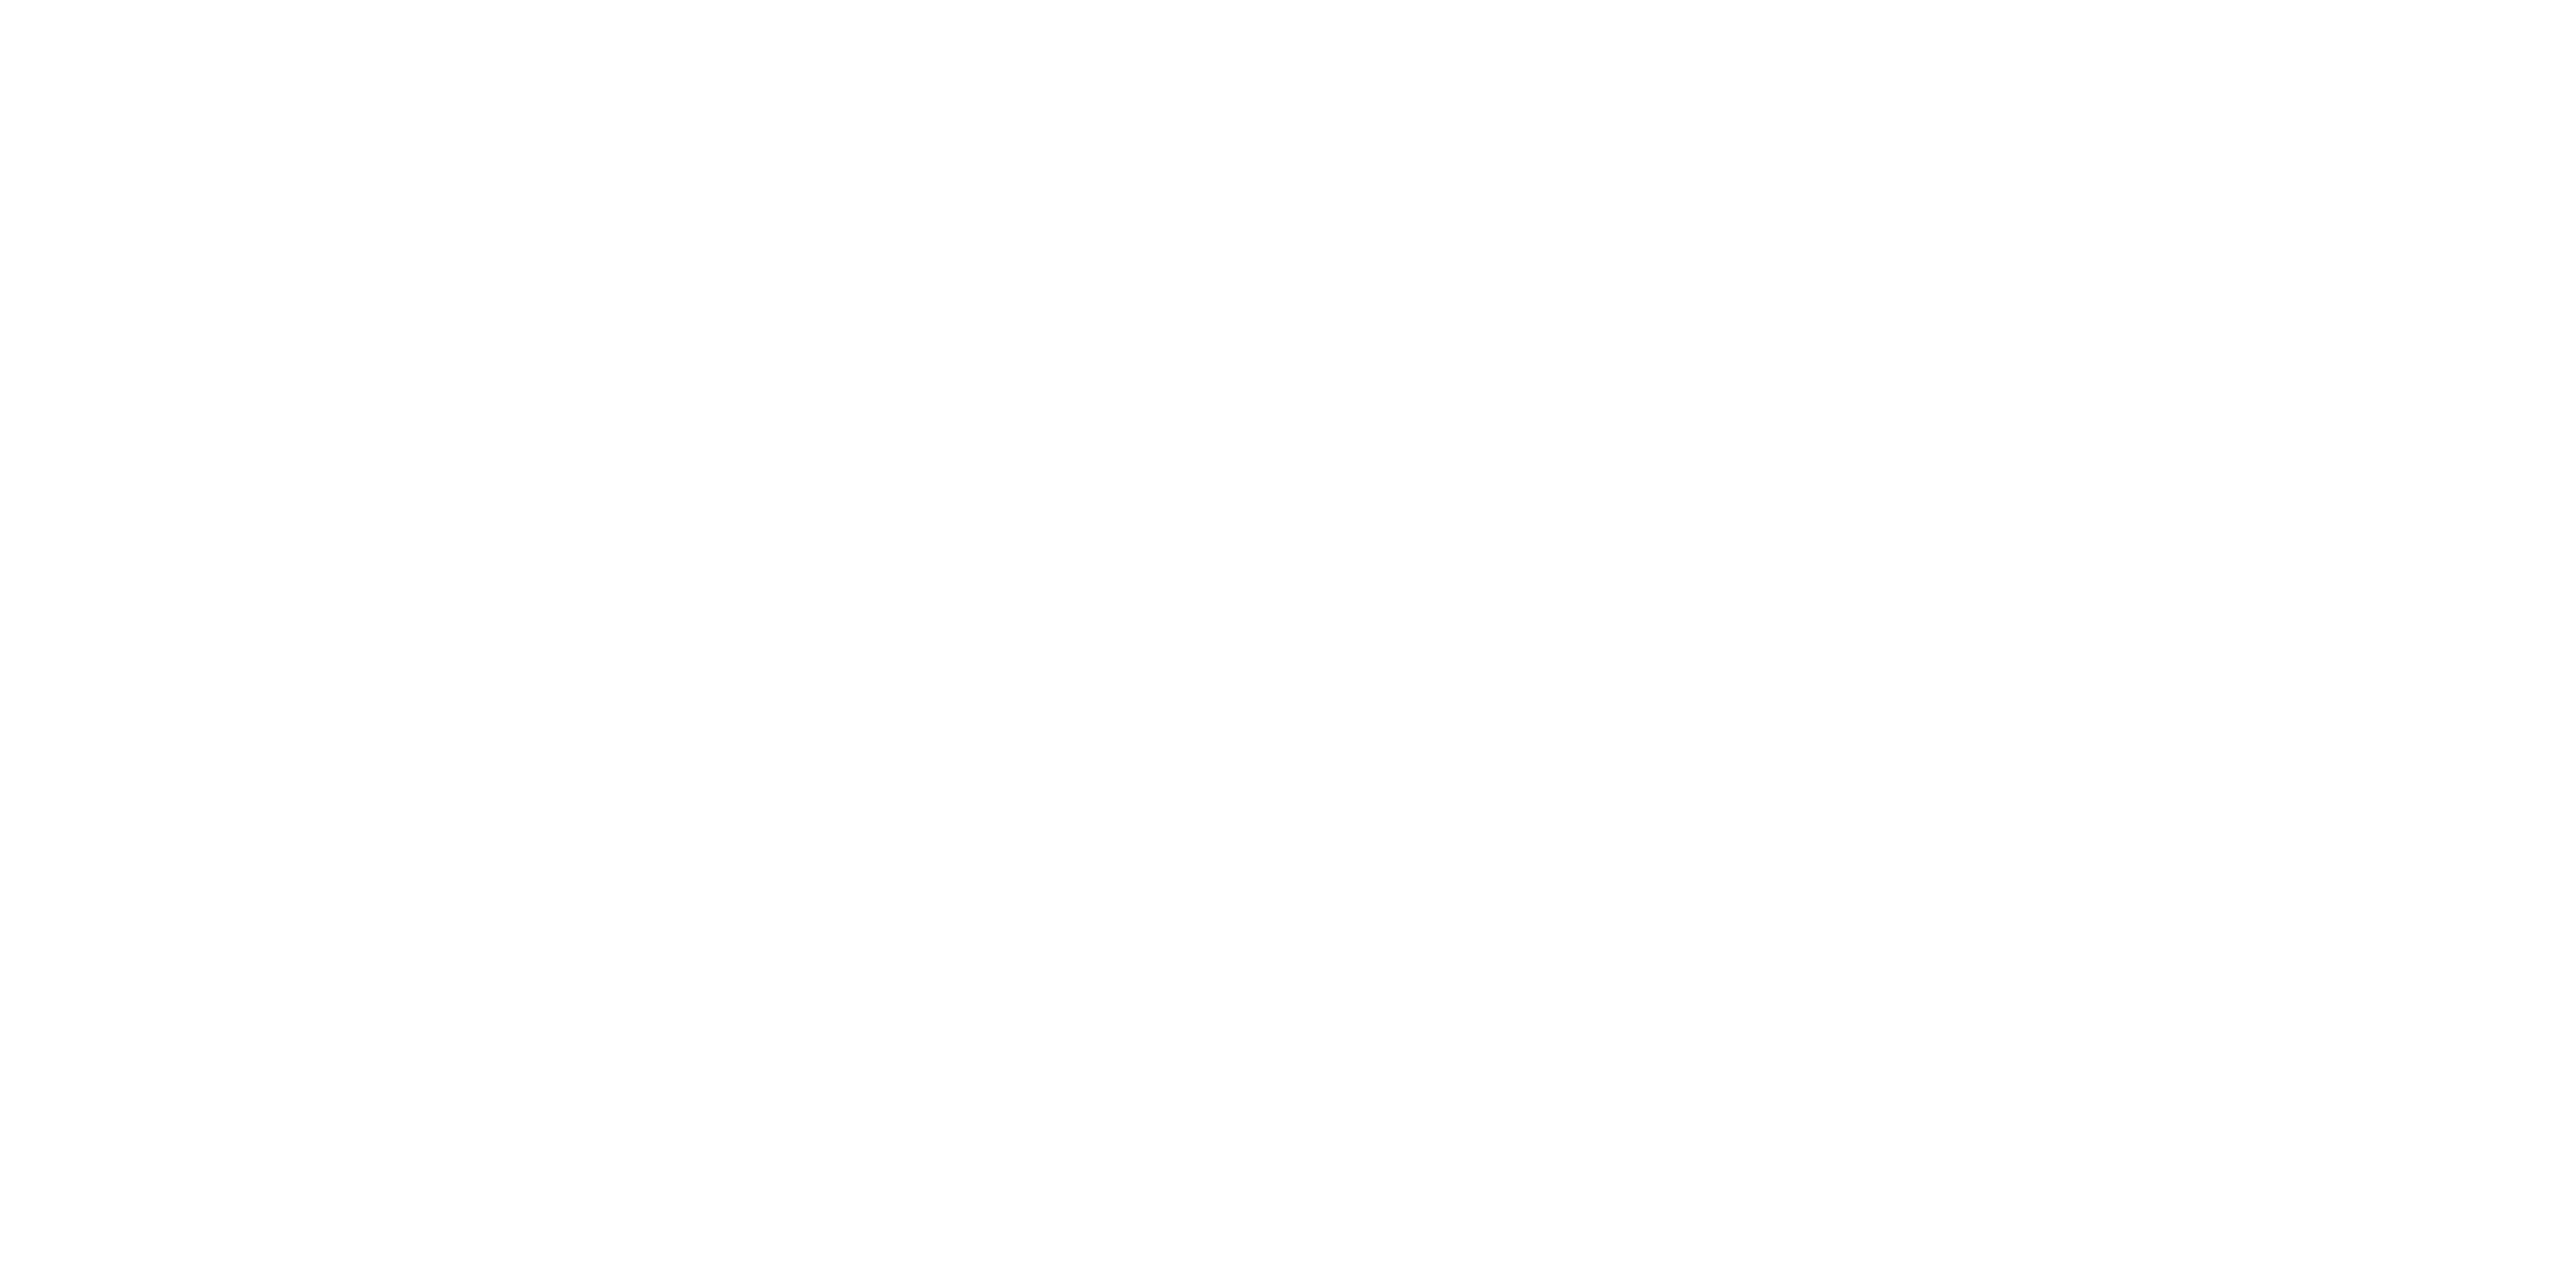

<IPython.core.display.Javascript object>


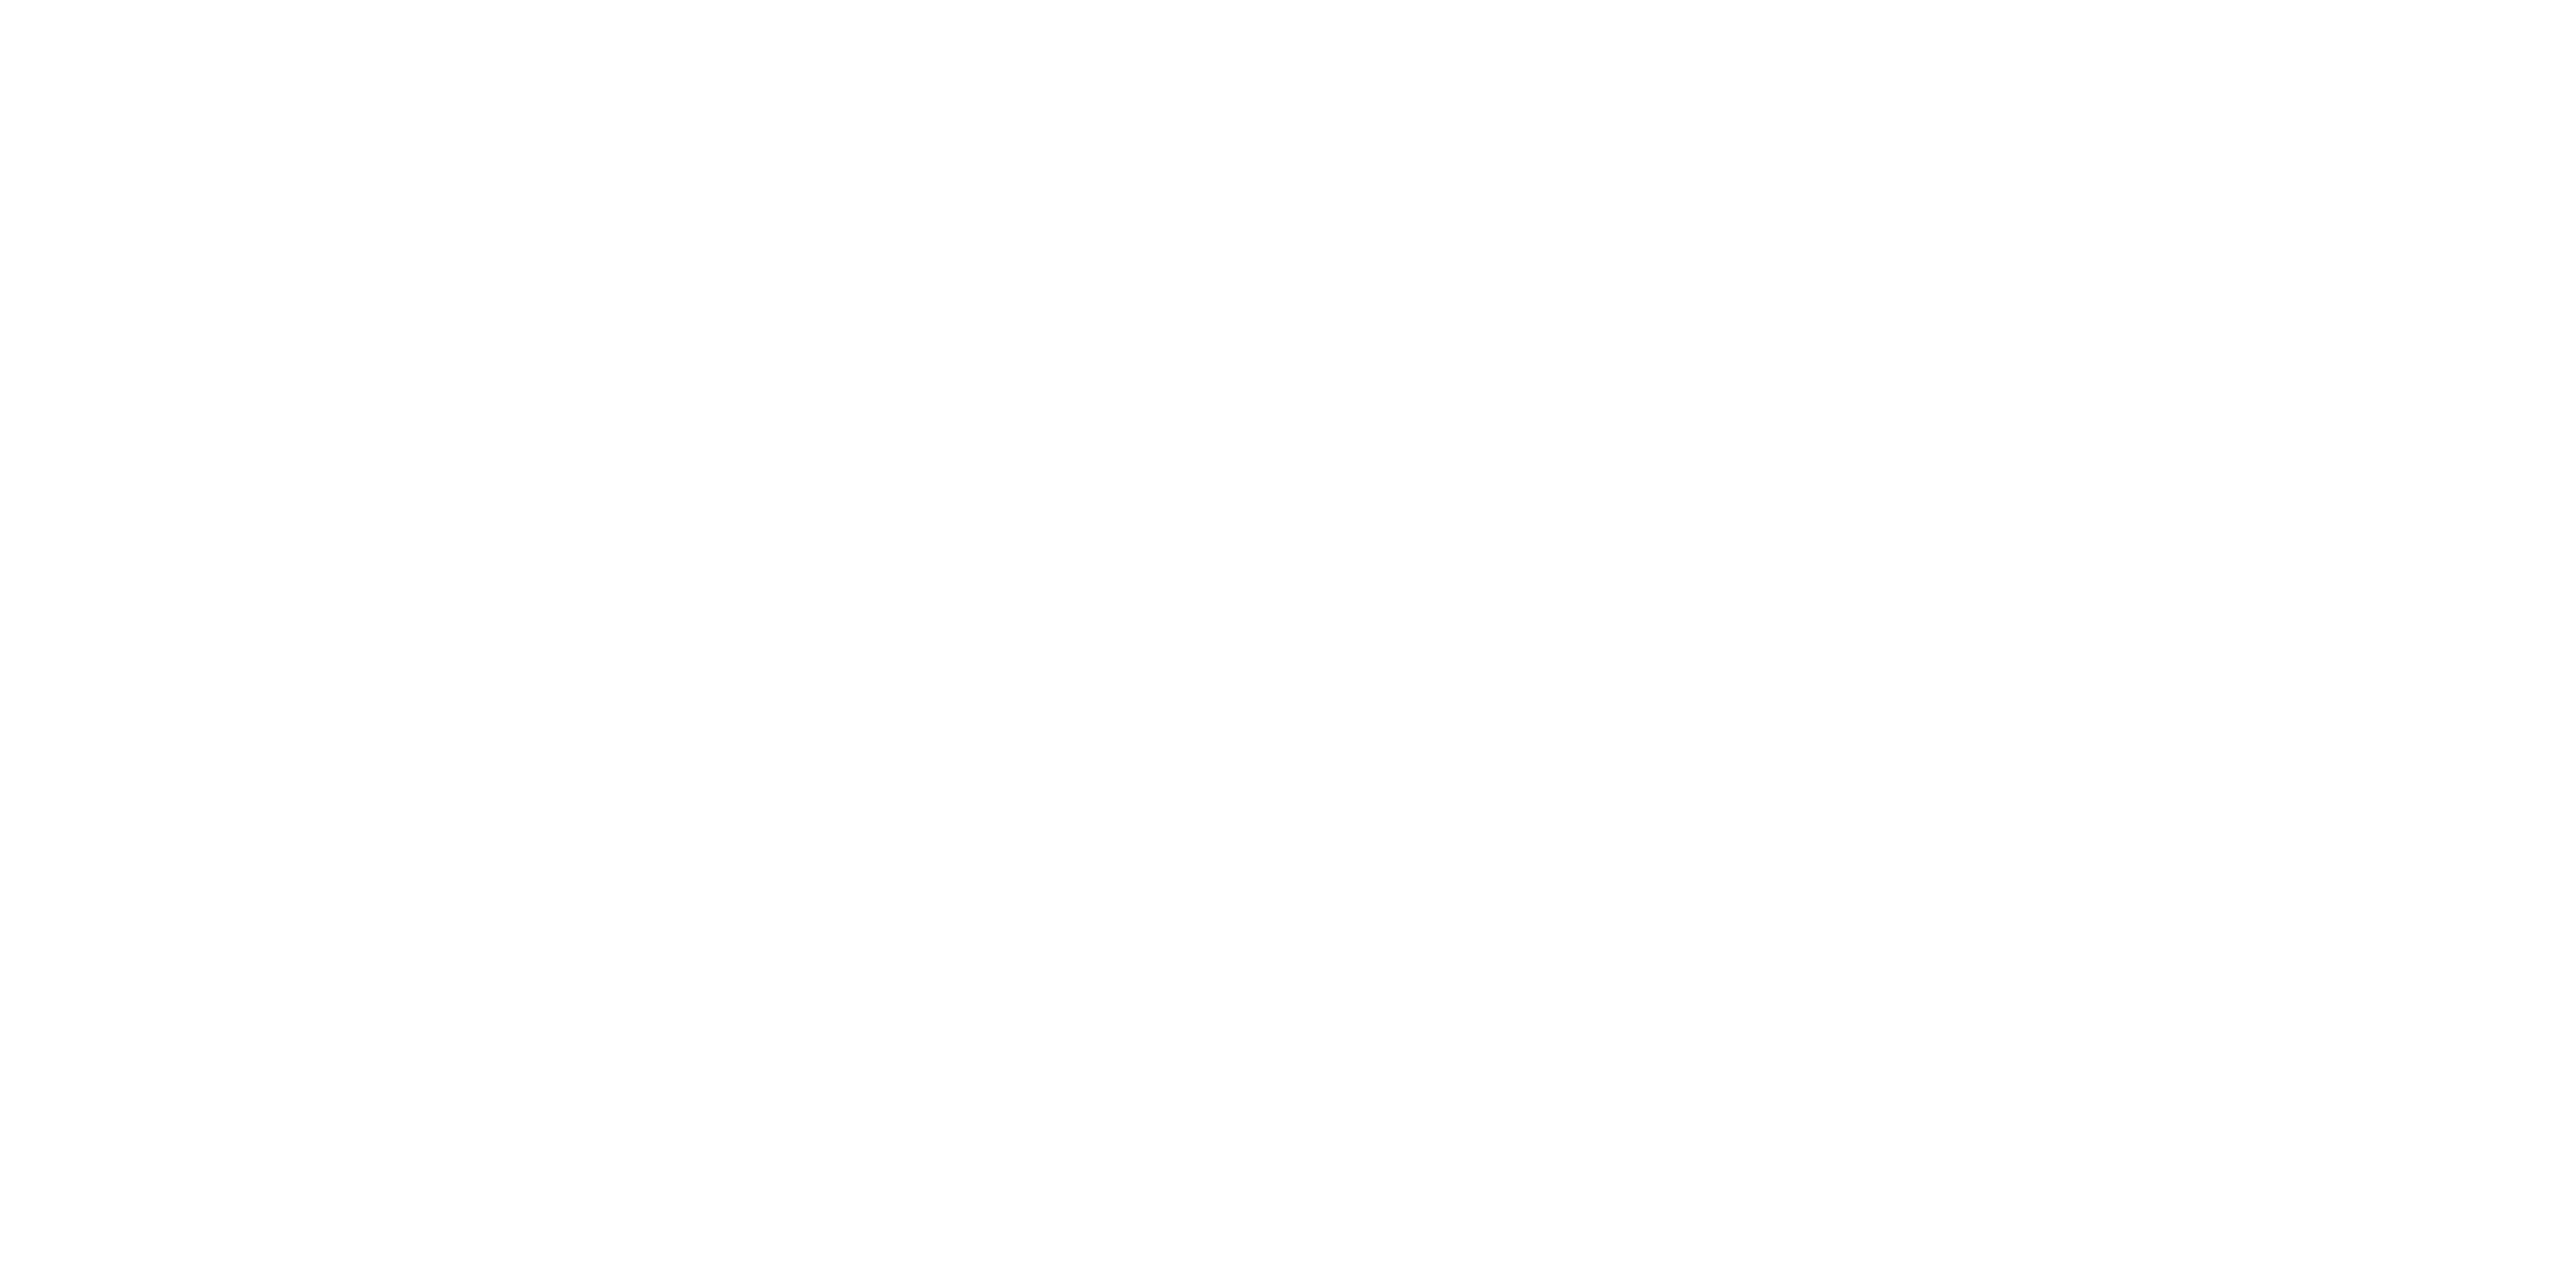

<IPython.core.display.Javascript object>


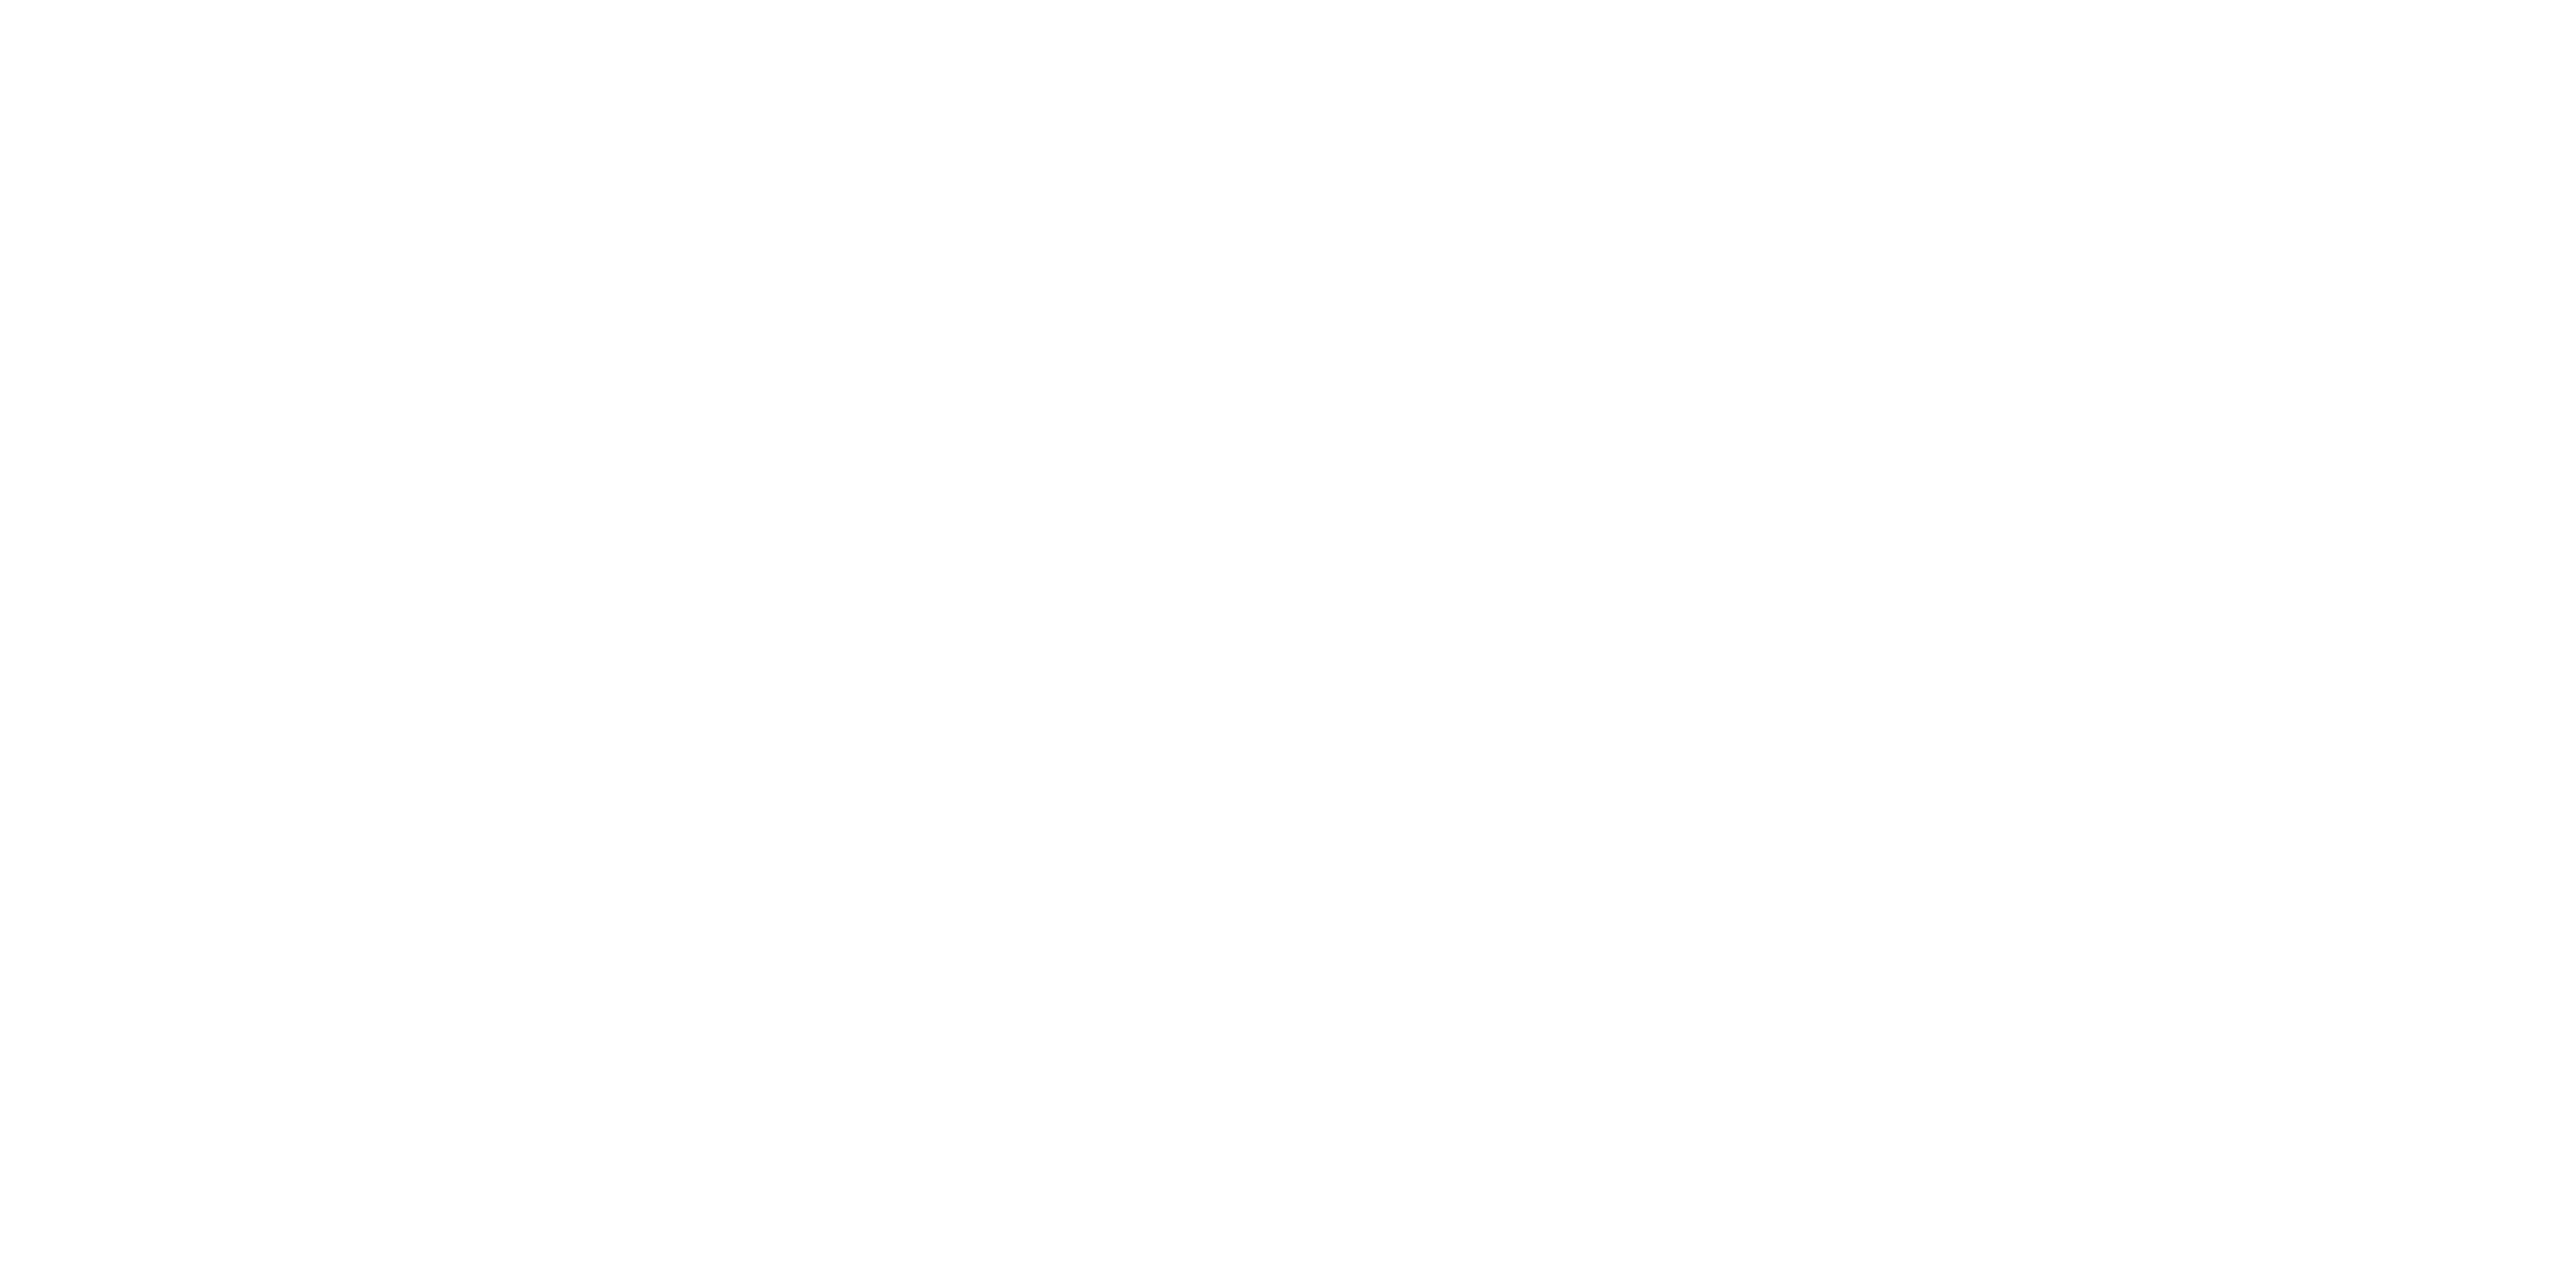

<IPython.core.display.Javascript object>


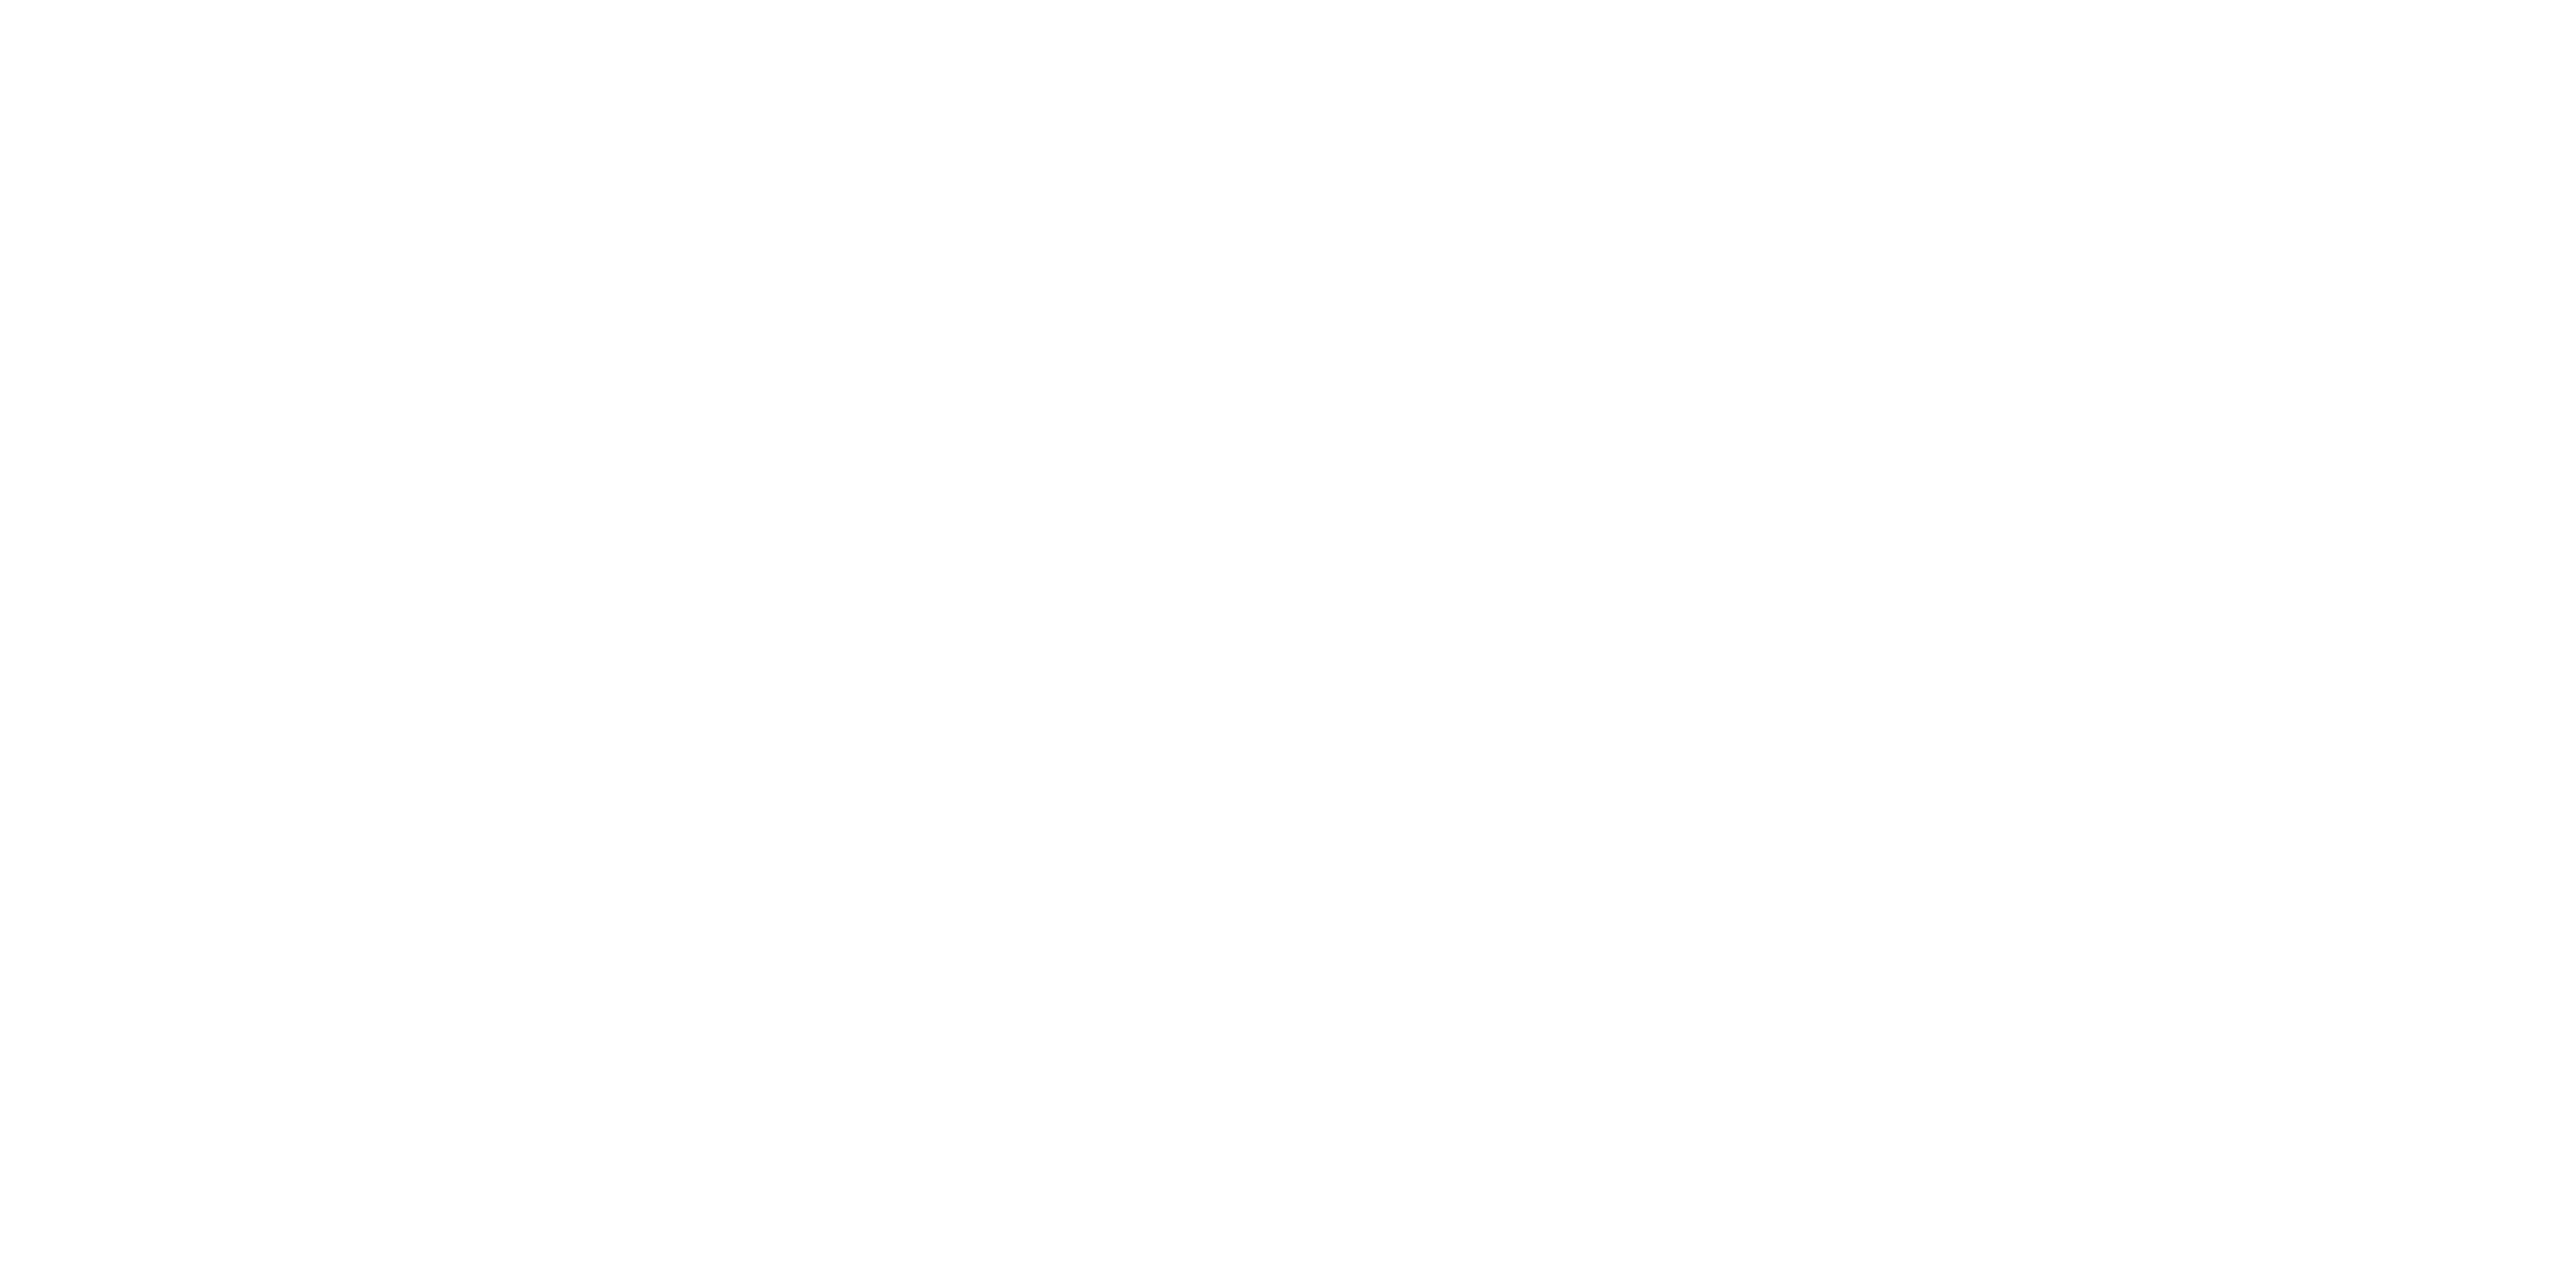

<IPython.core.display.Javascript object>


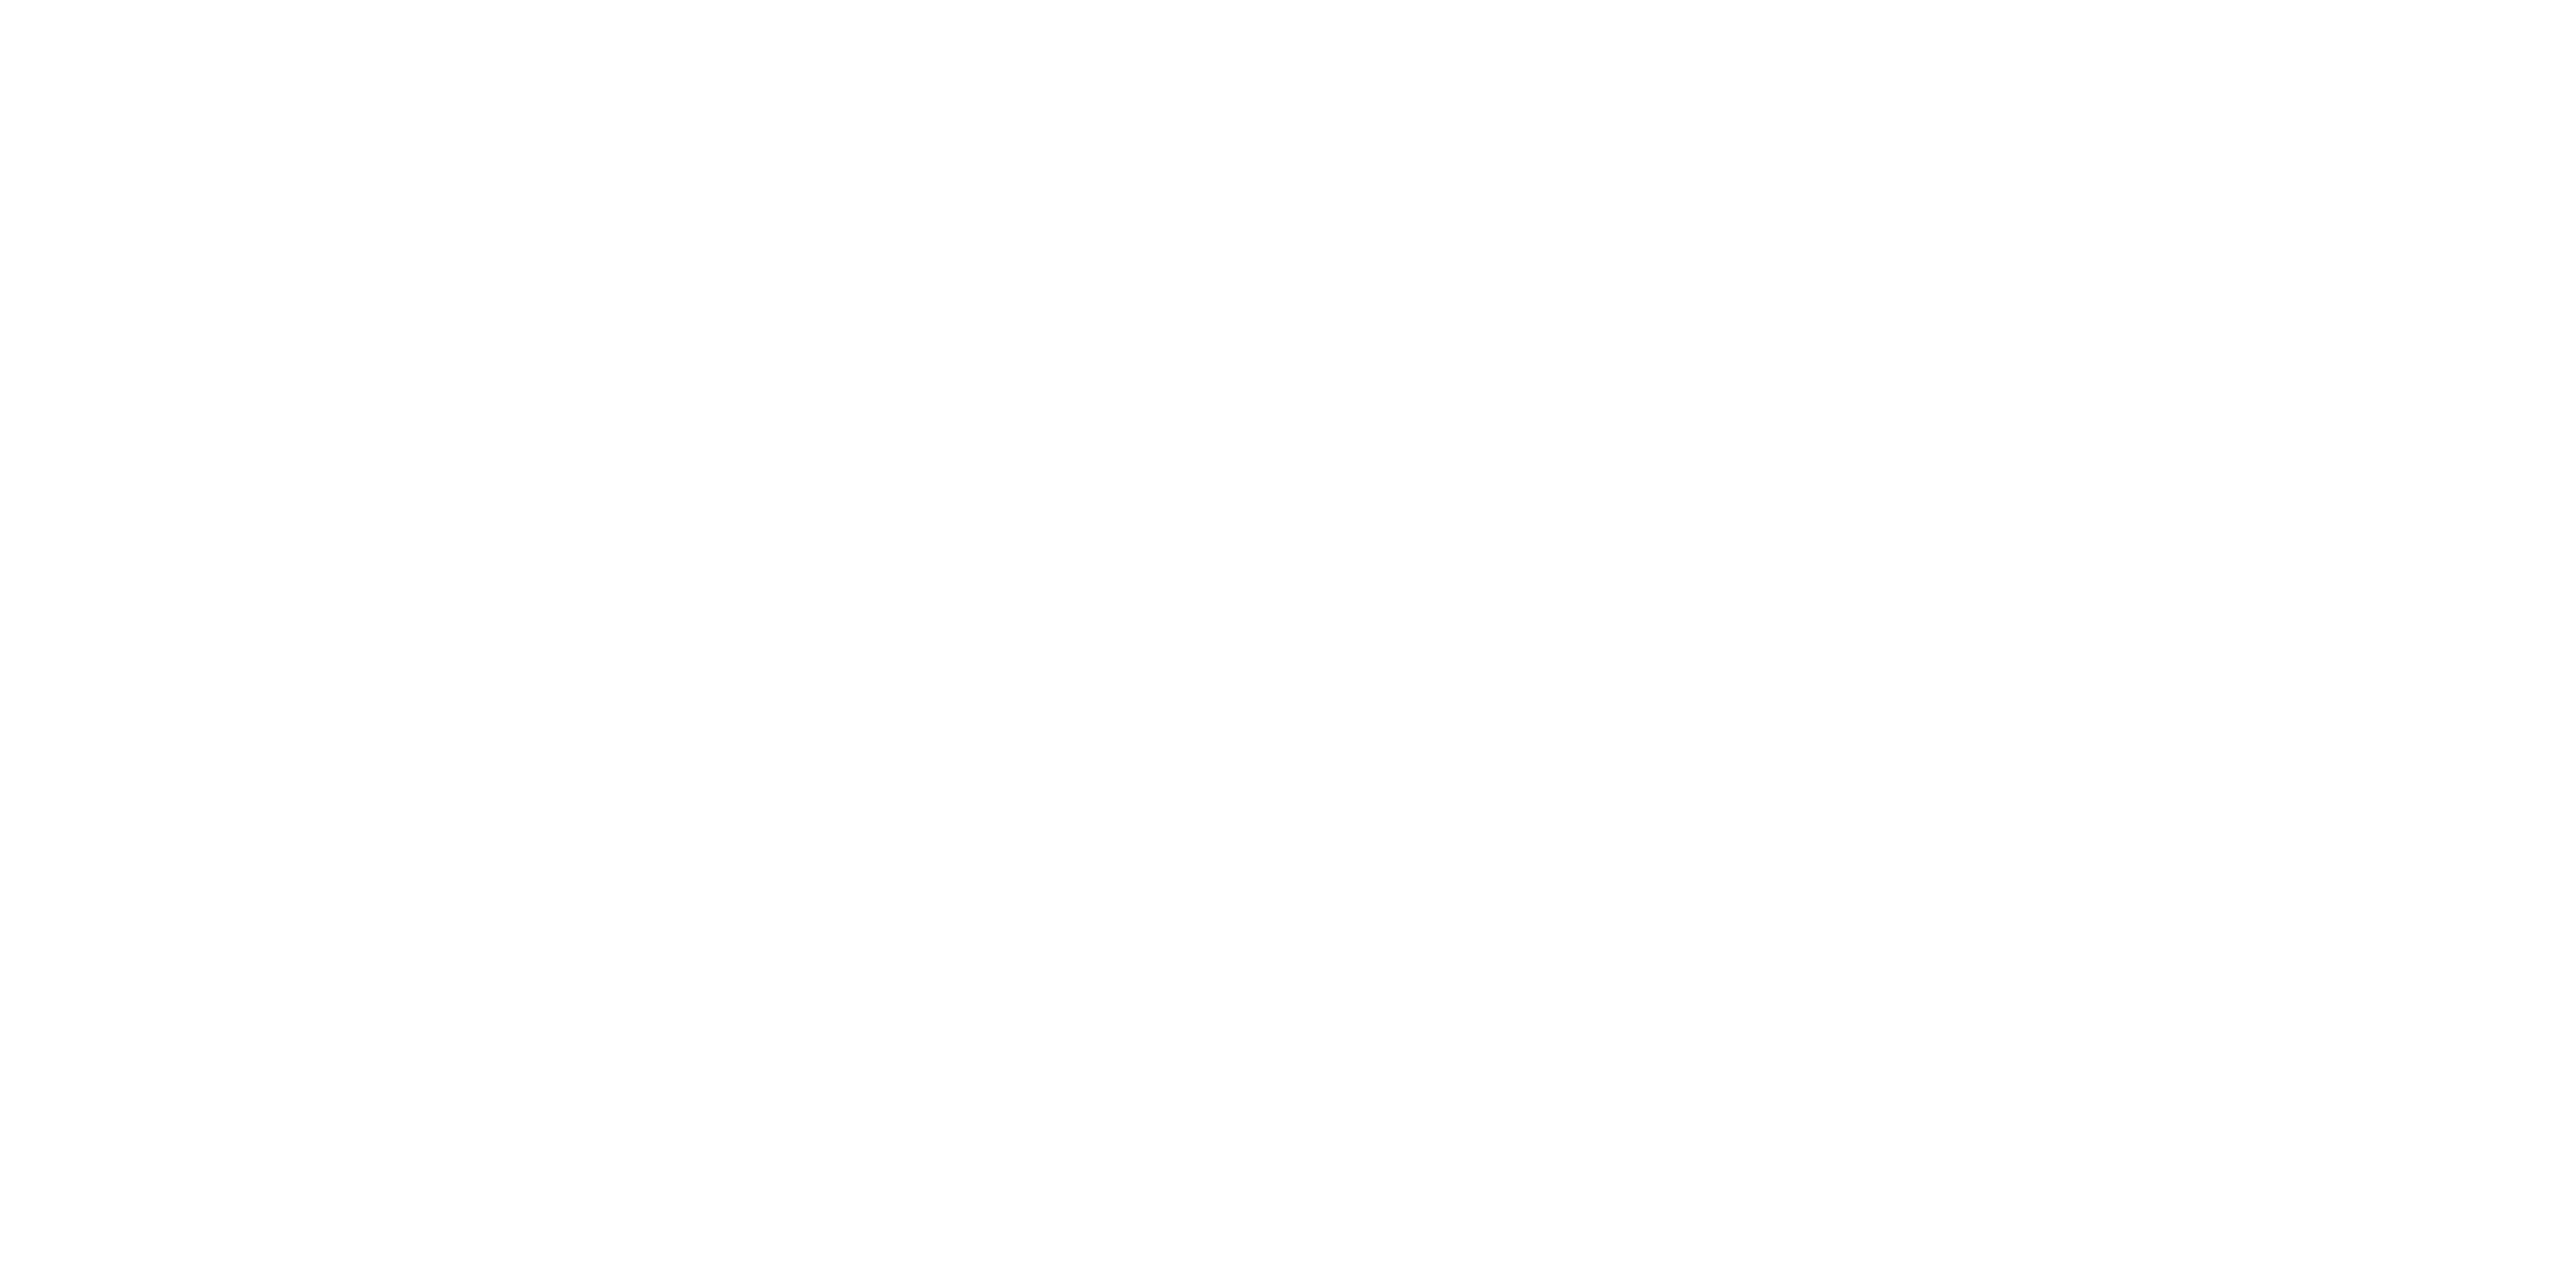

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


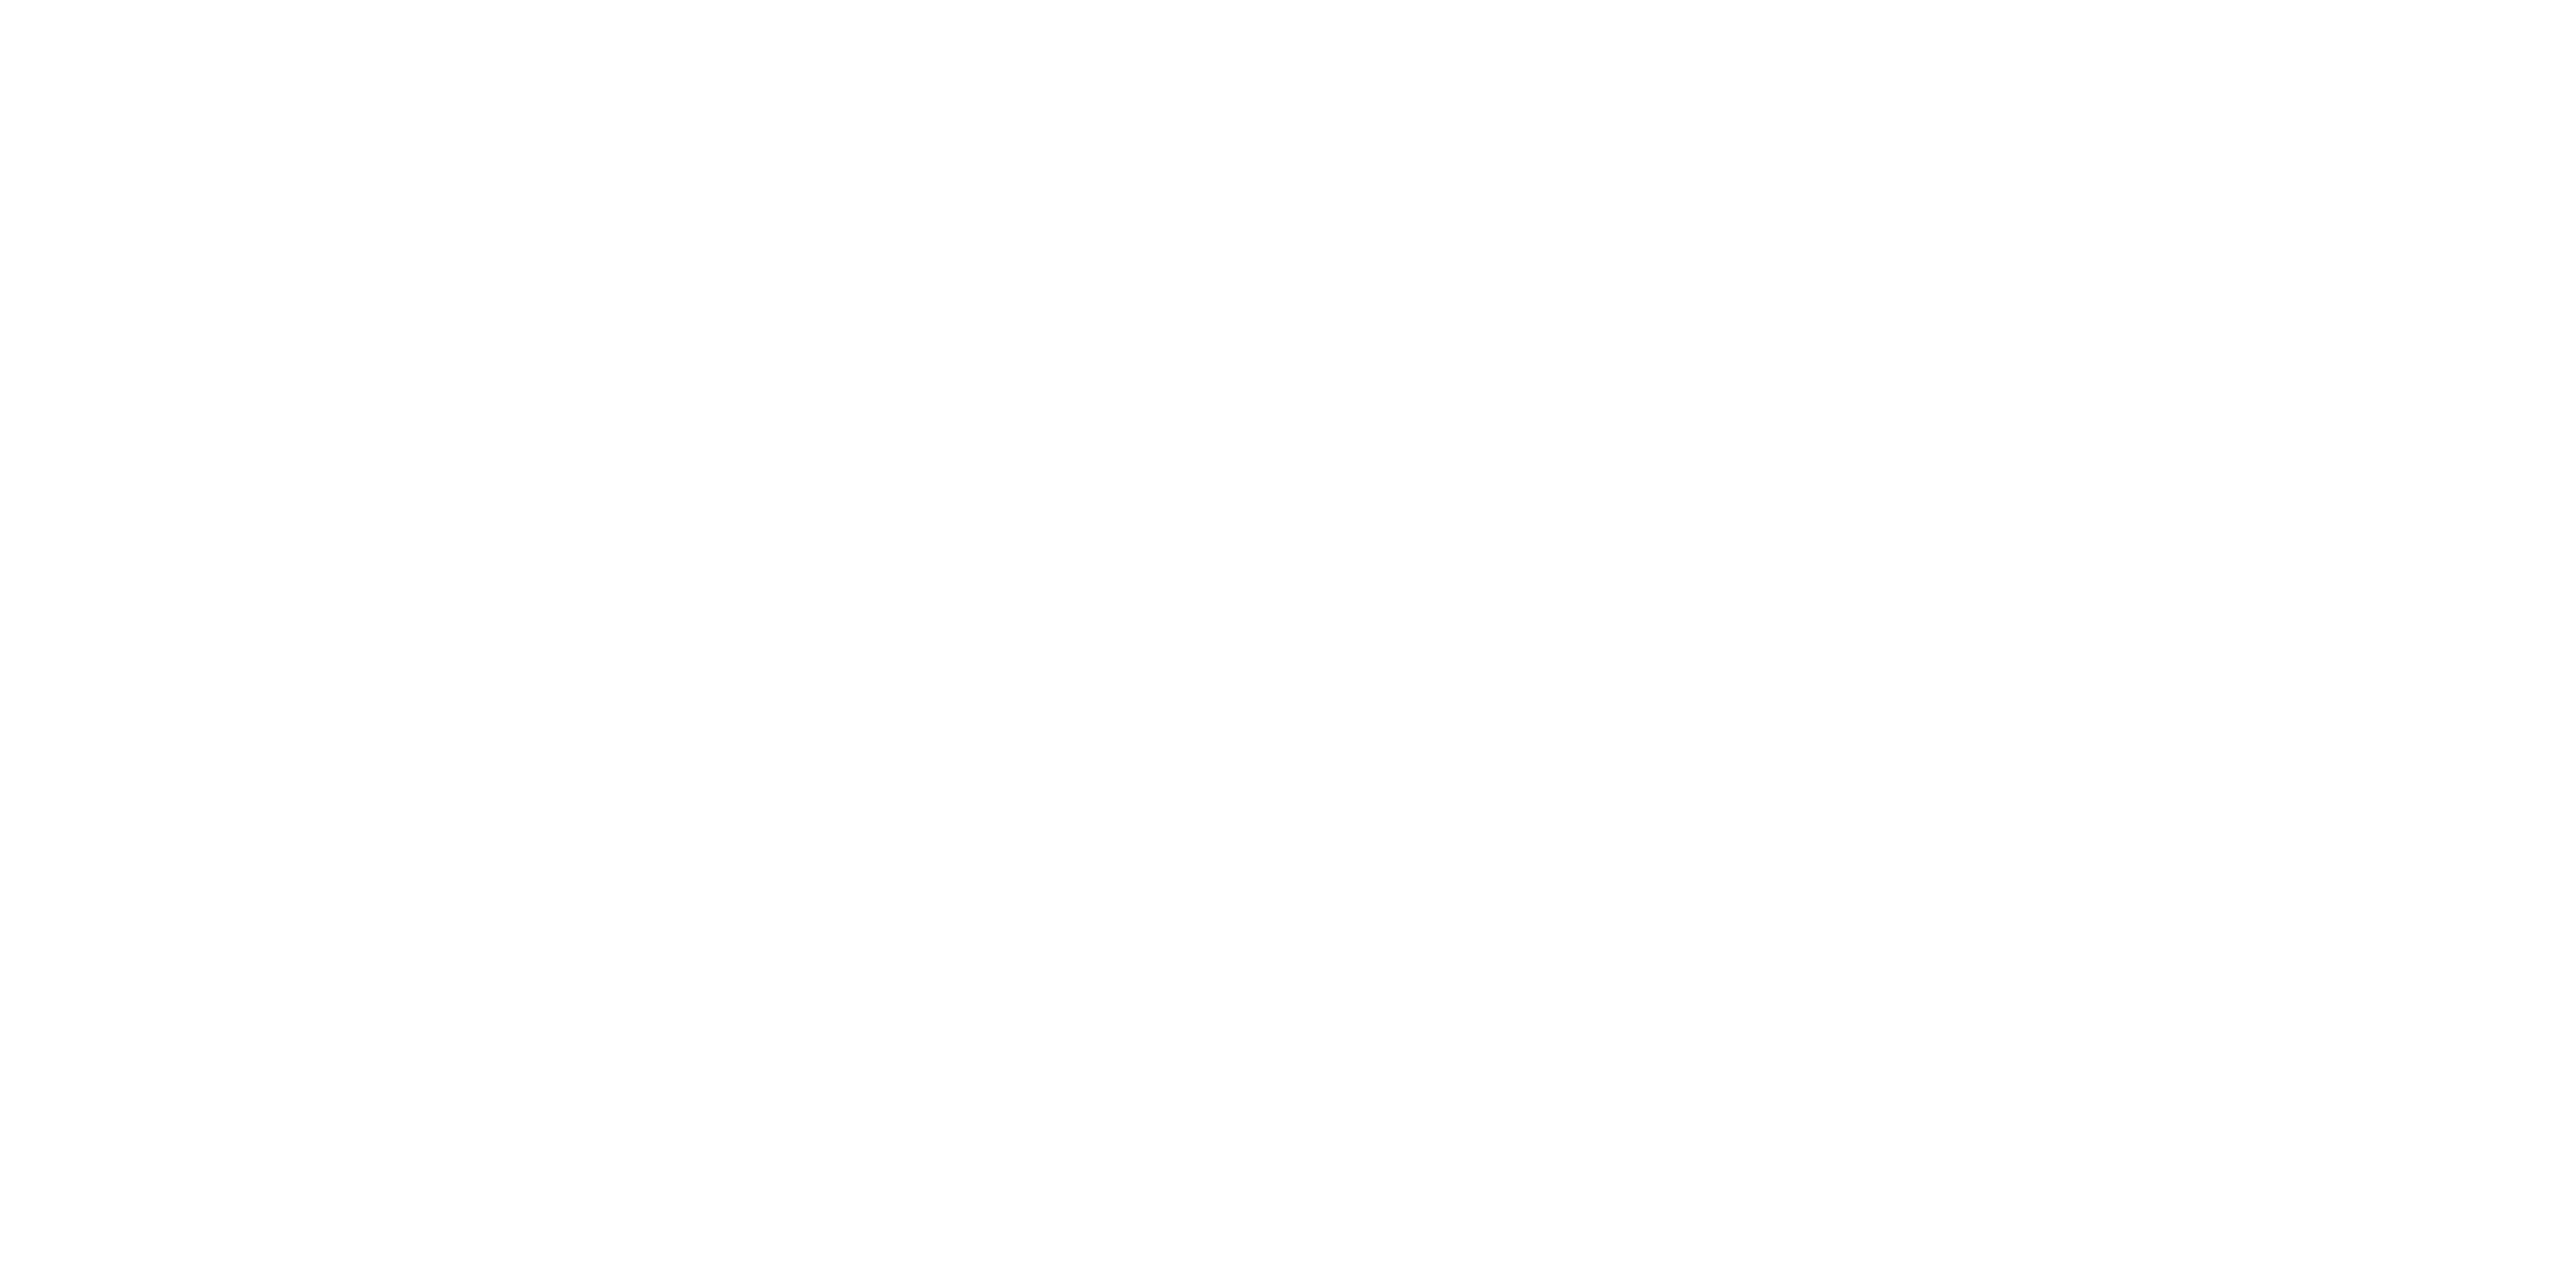

<IPython.core.display.Javascript object>


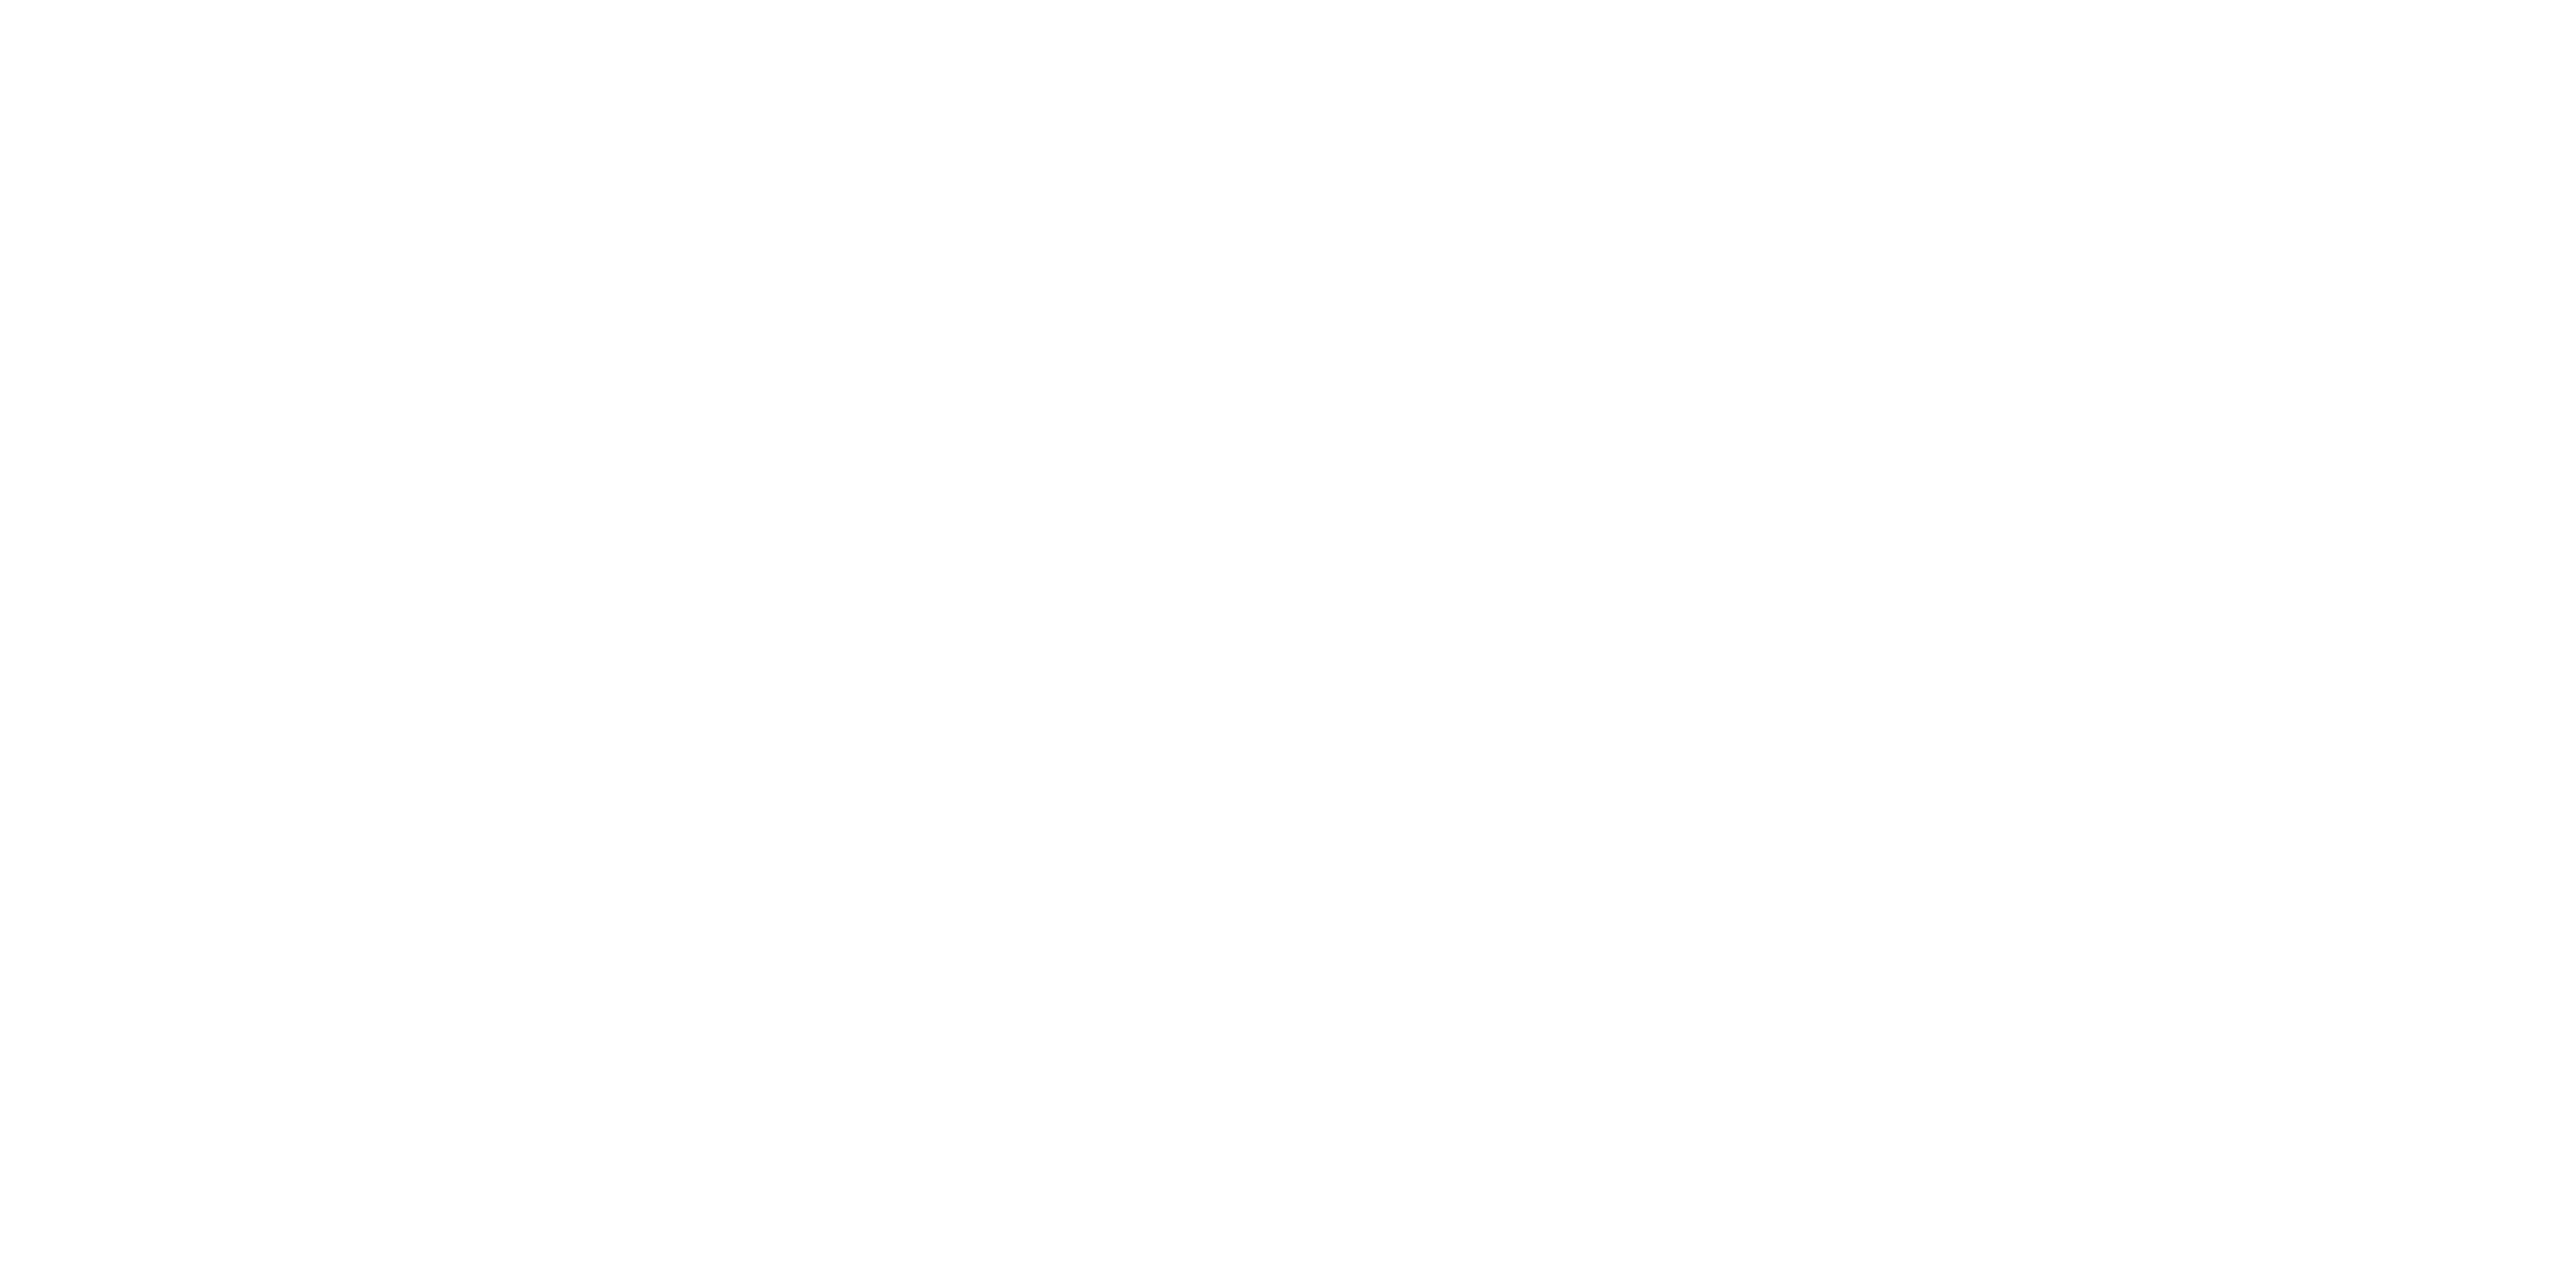

<IPython.core.display.Javascript object>


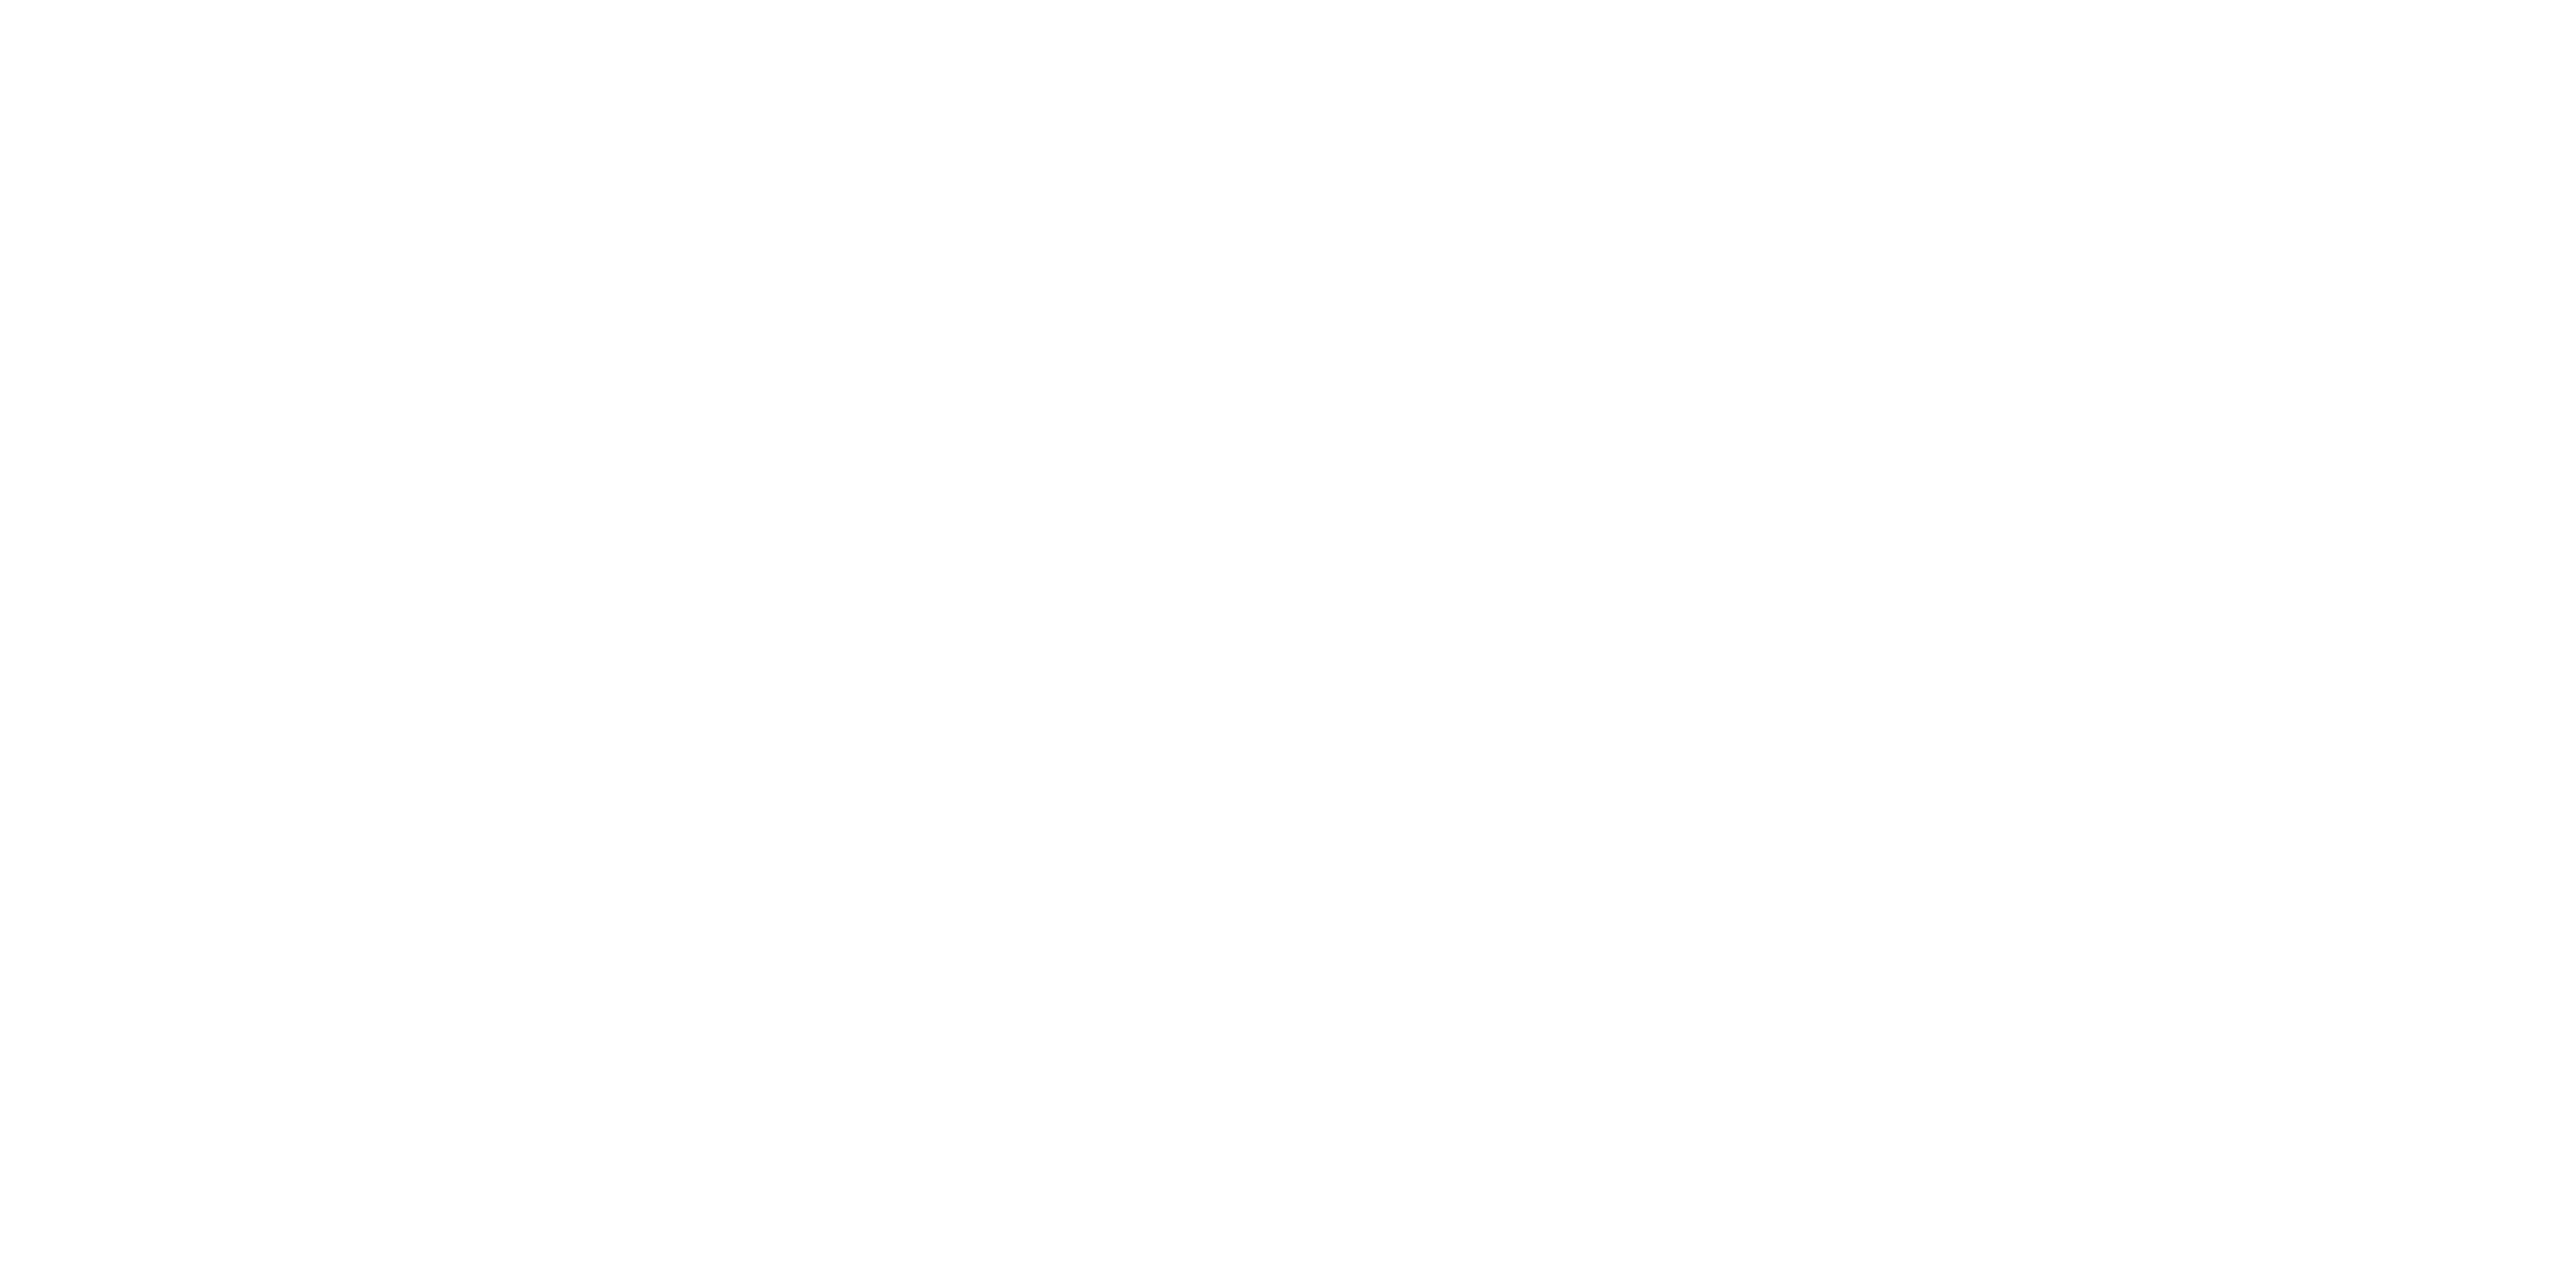

<IPython.core.display.Javascript object>


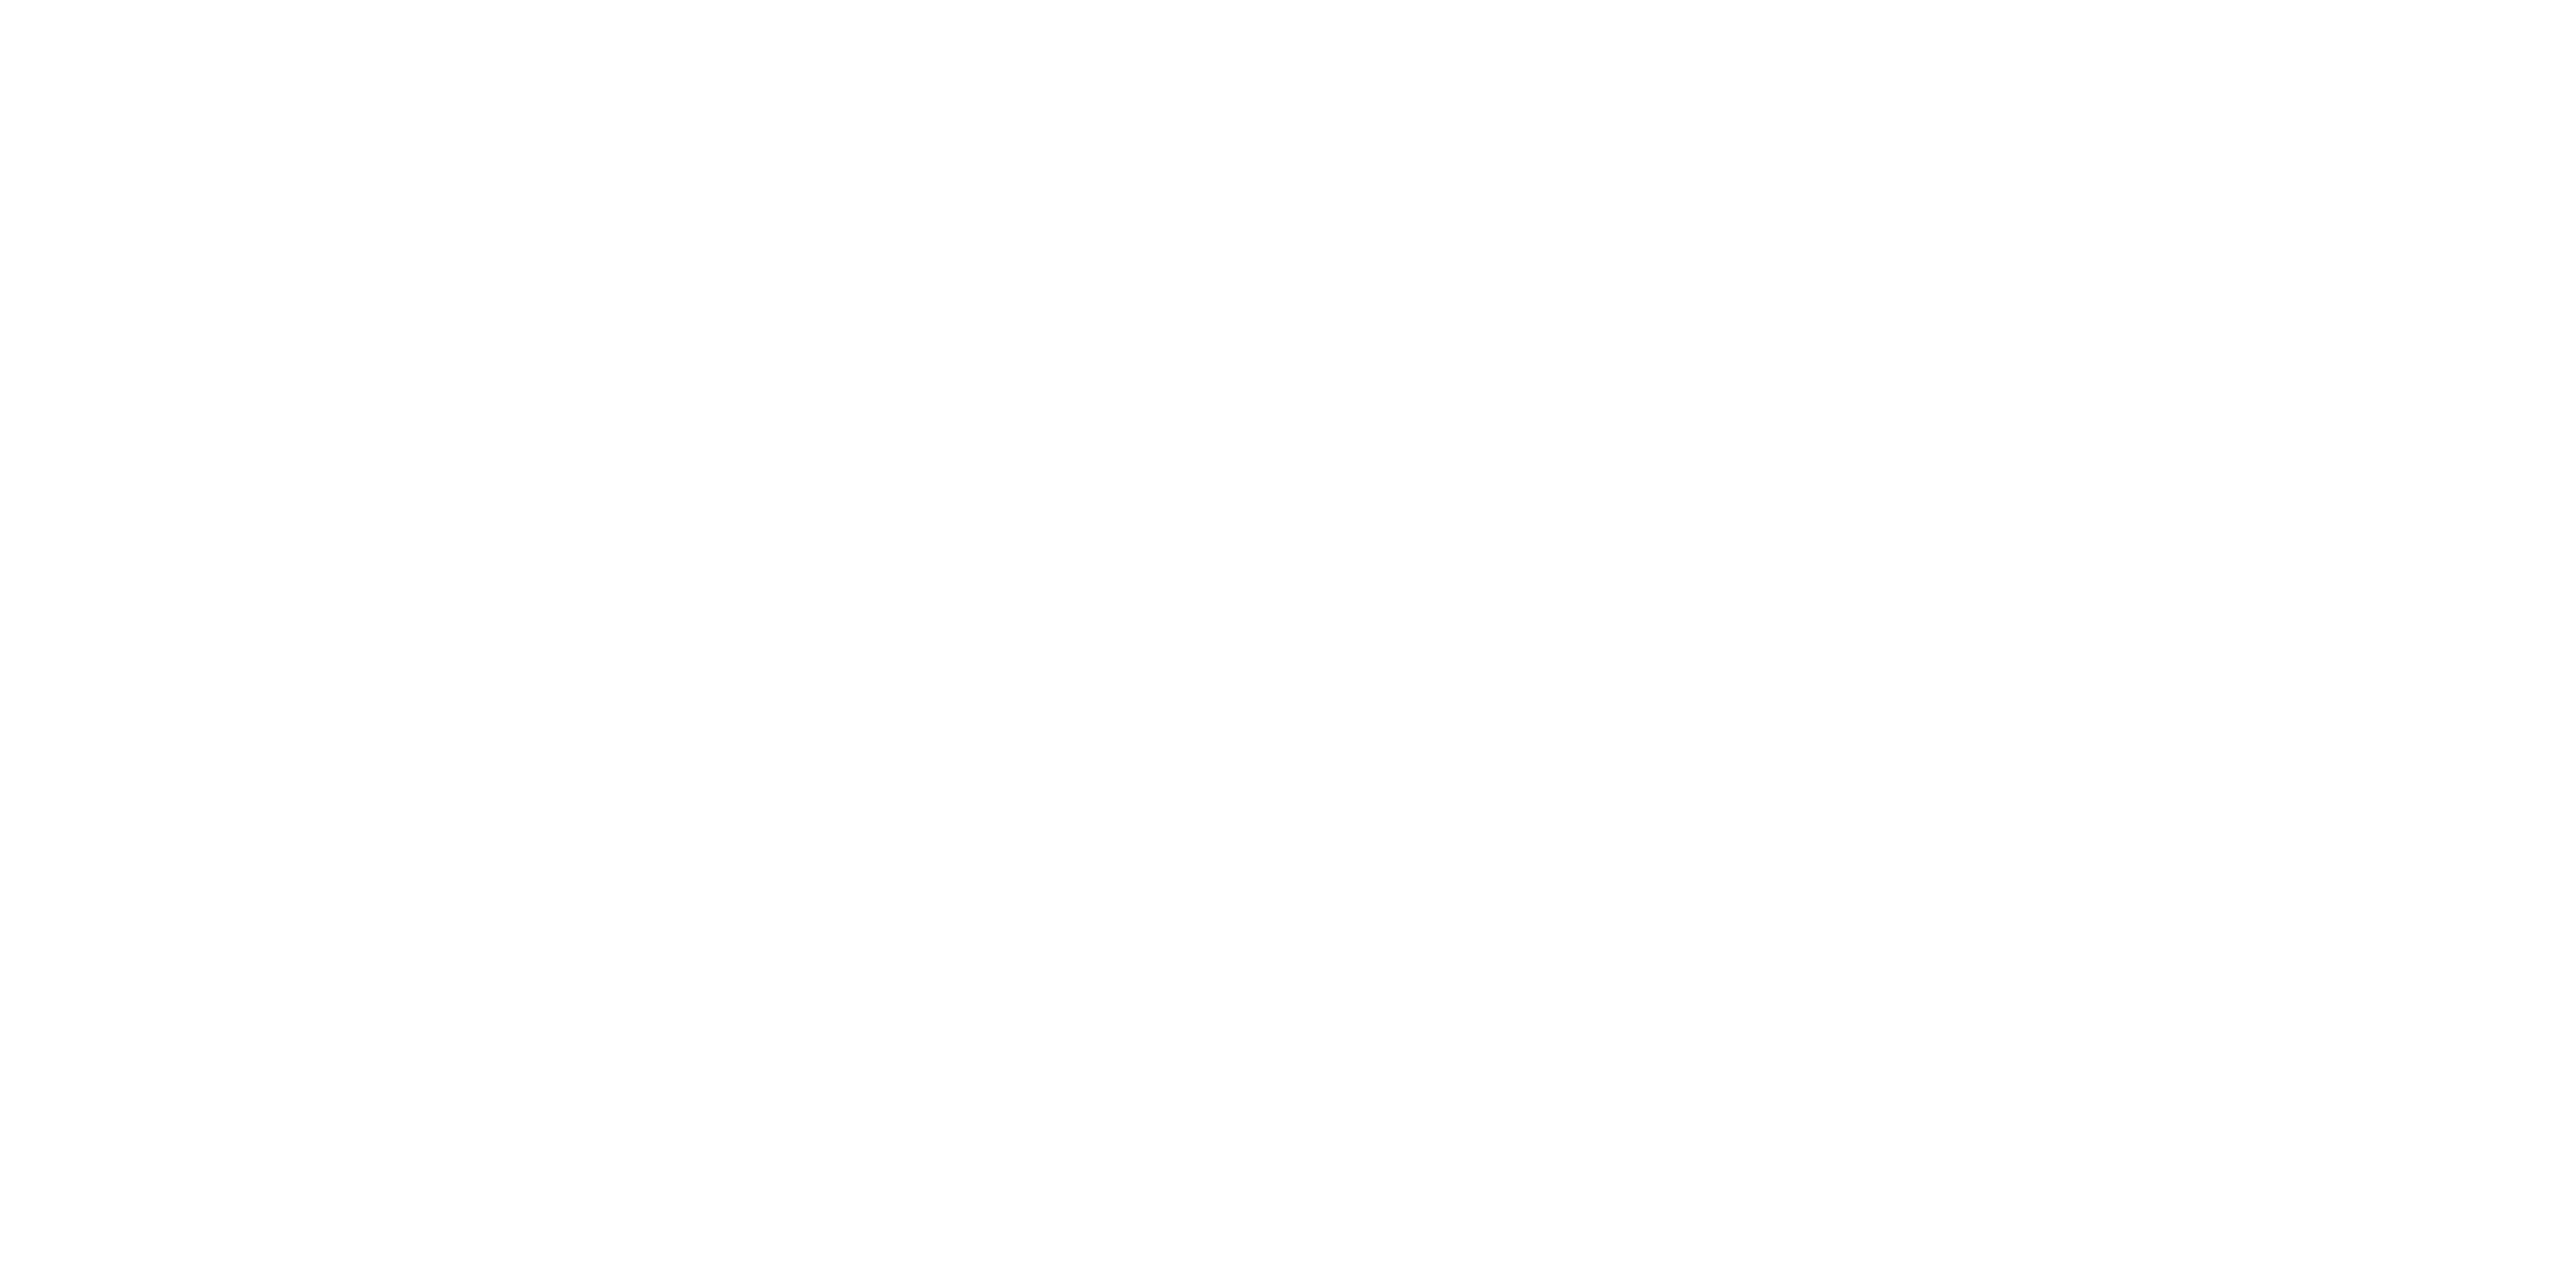

<IPython.core.display.Javascript object>


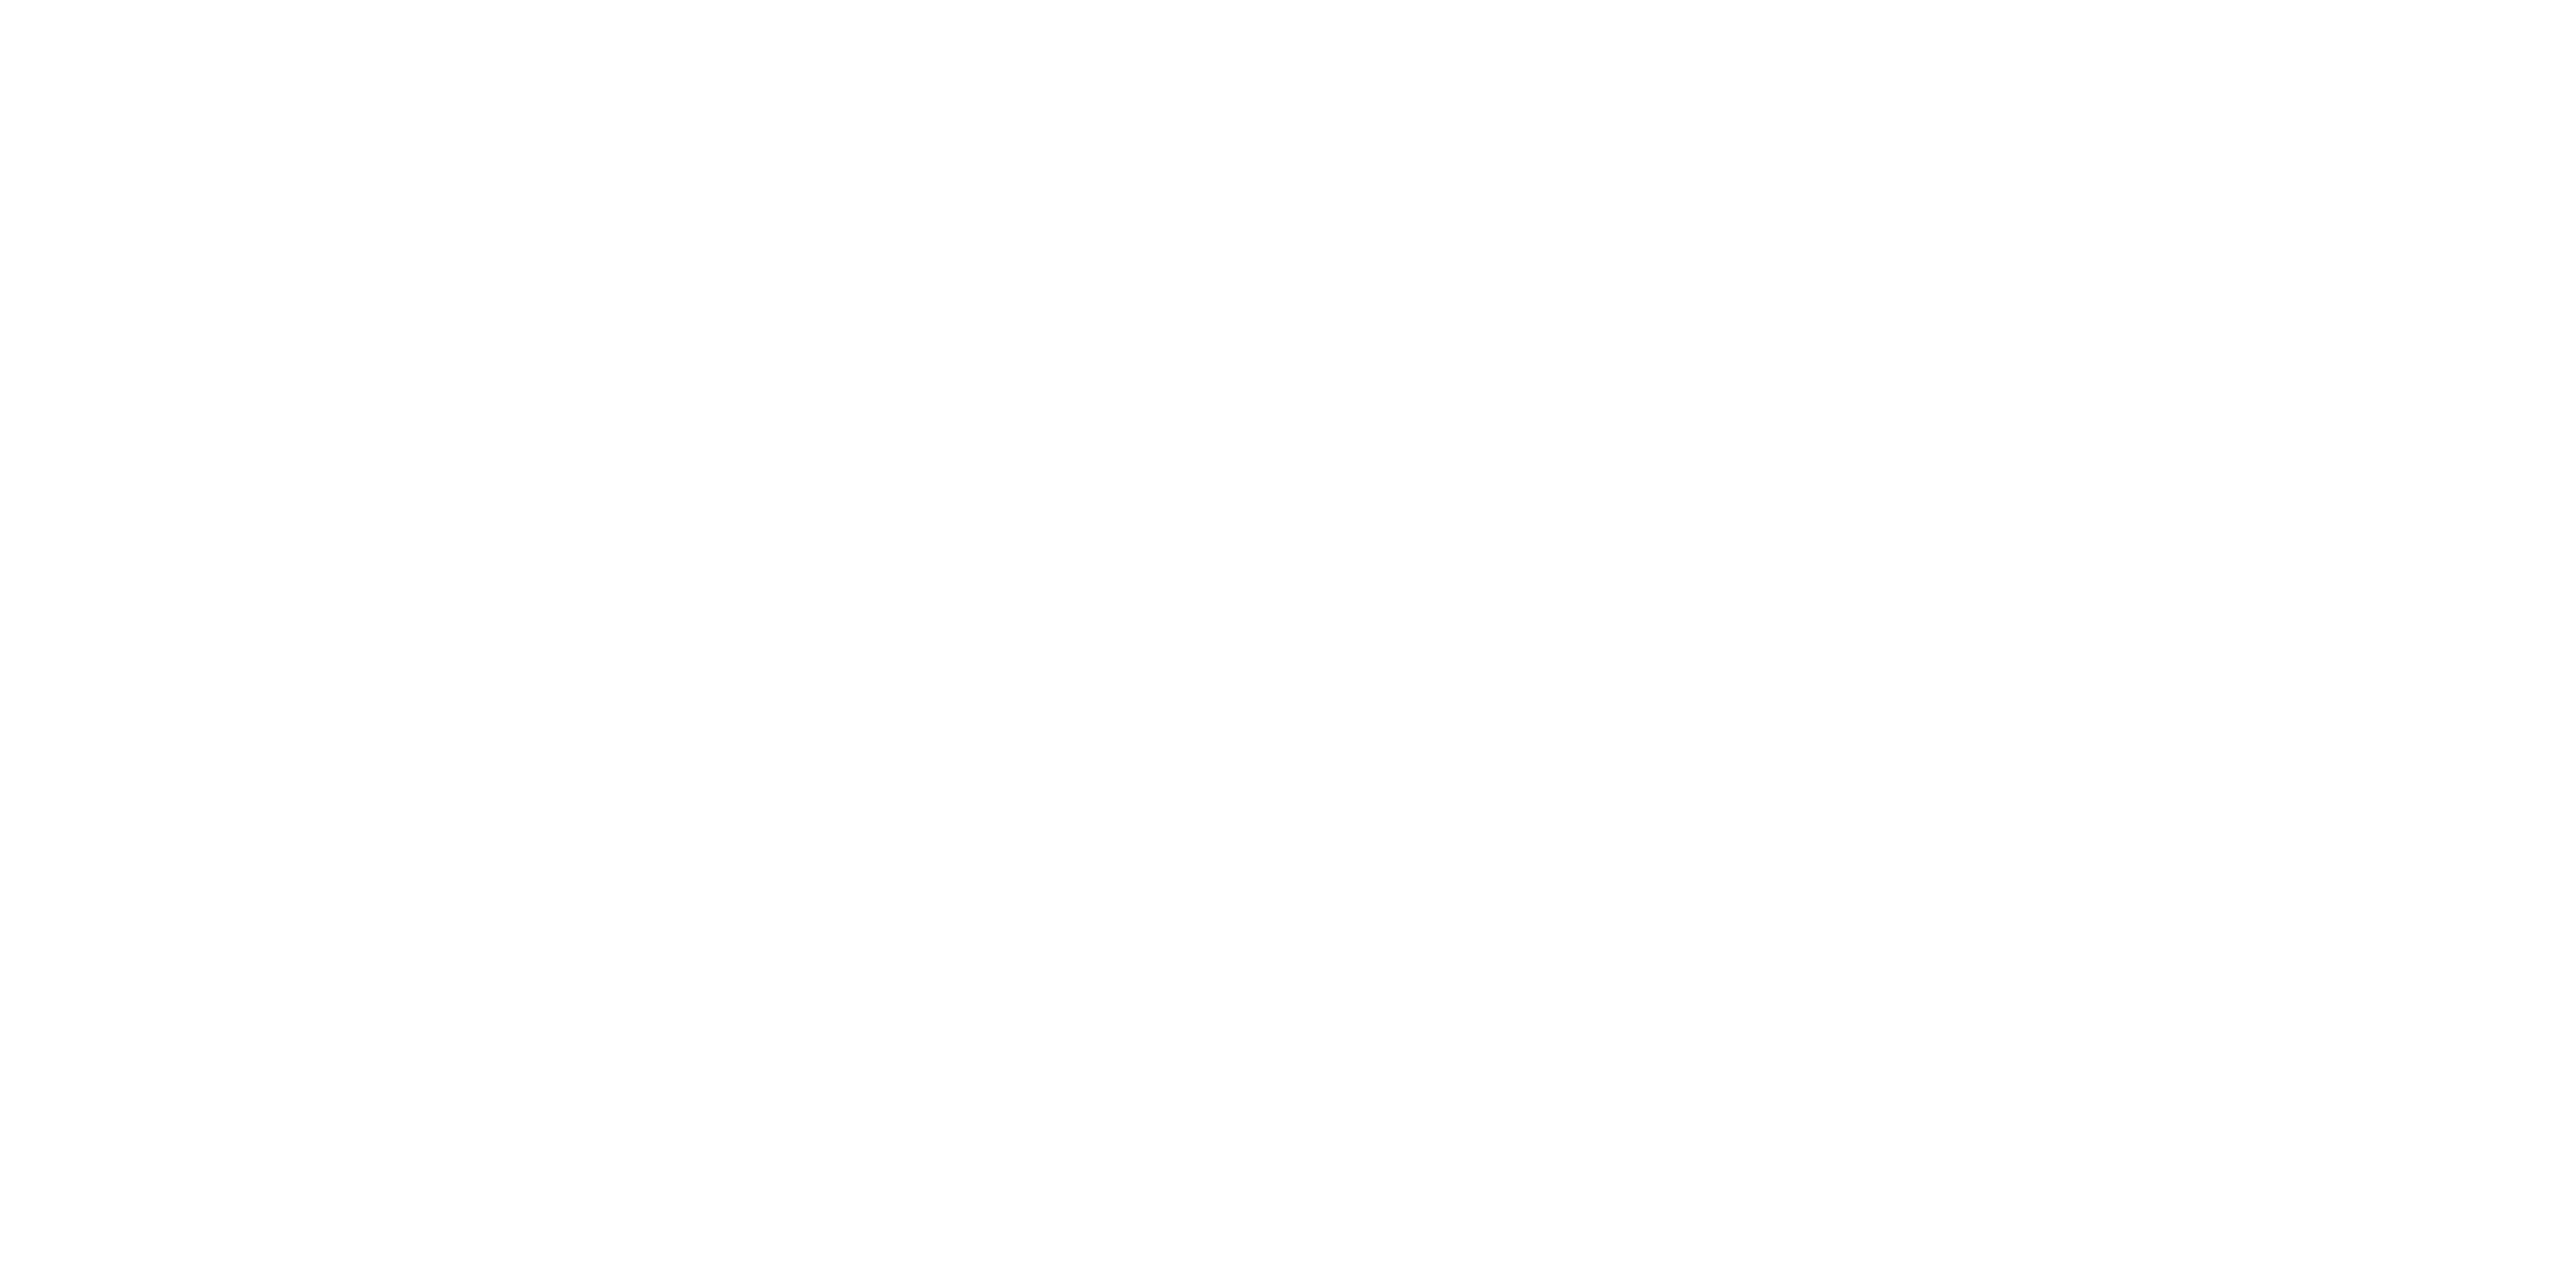

<IPython.core.display.Javascript object>


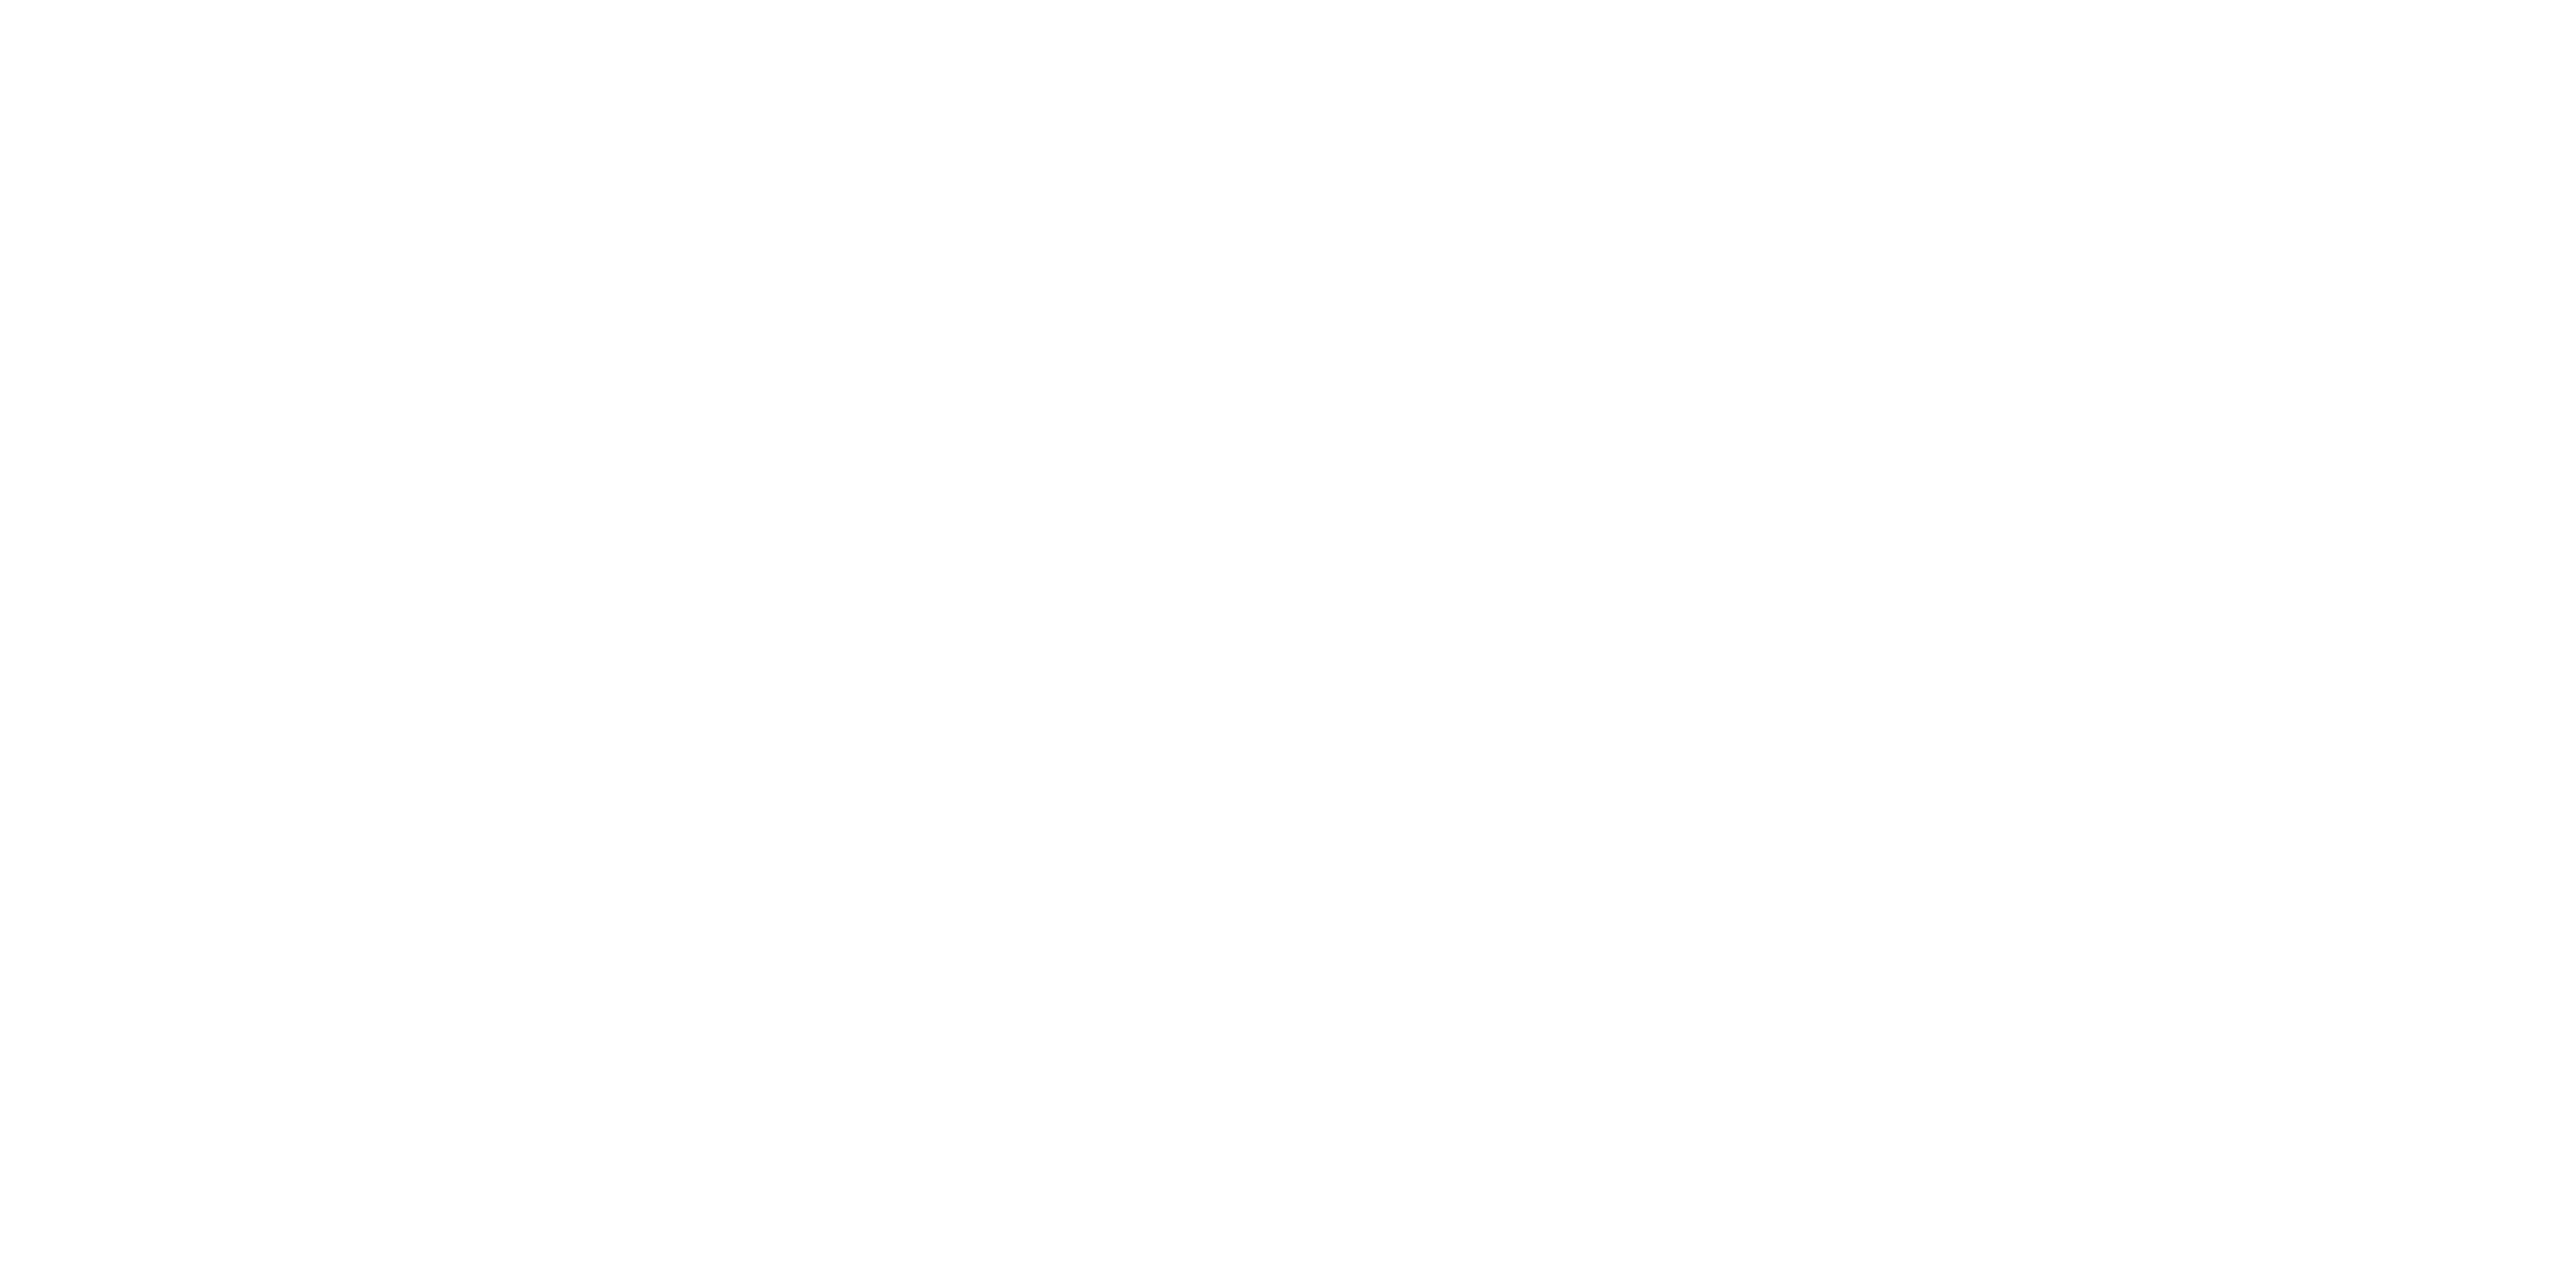

<IPython.core.display.Javascript object>


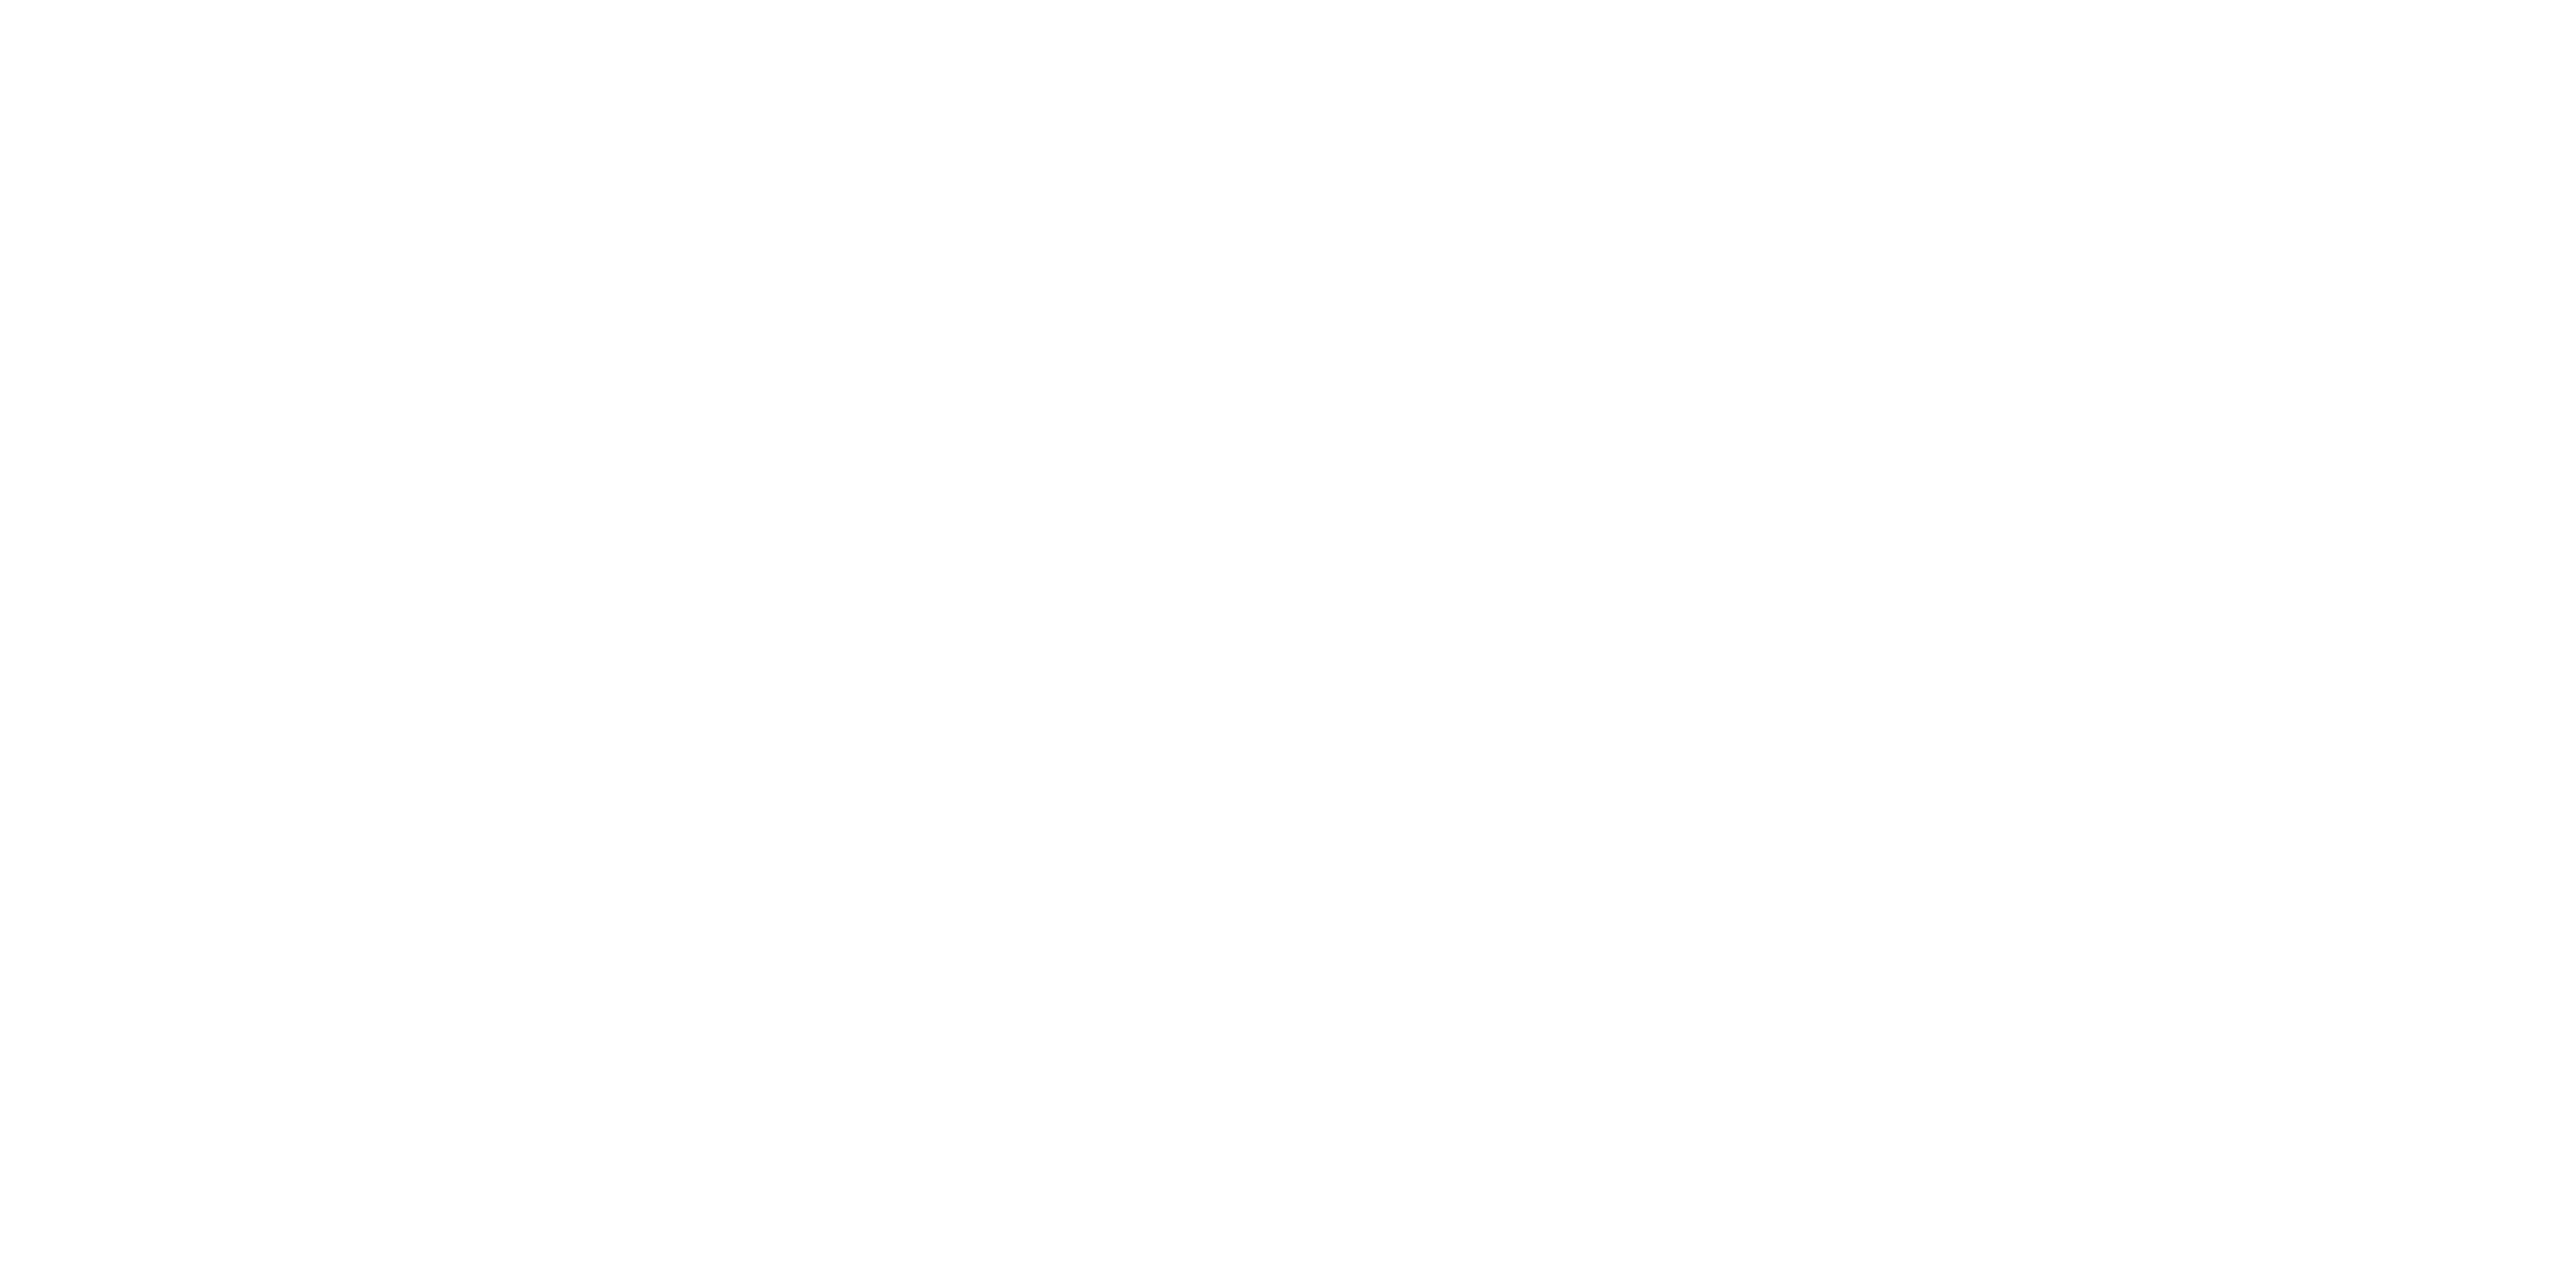

<IPython.core.display.Javascript object>


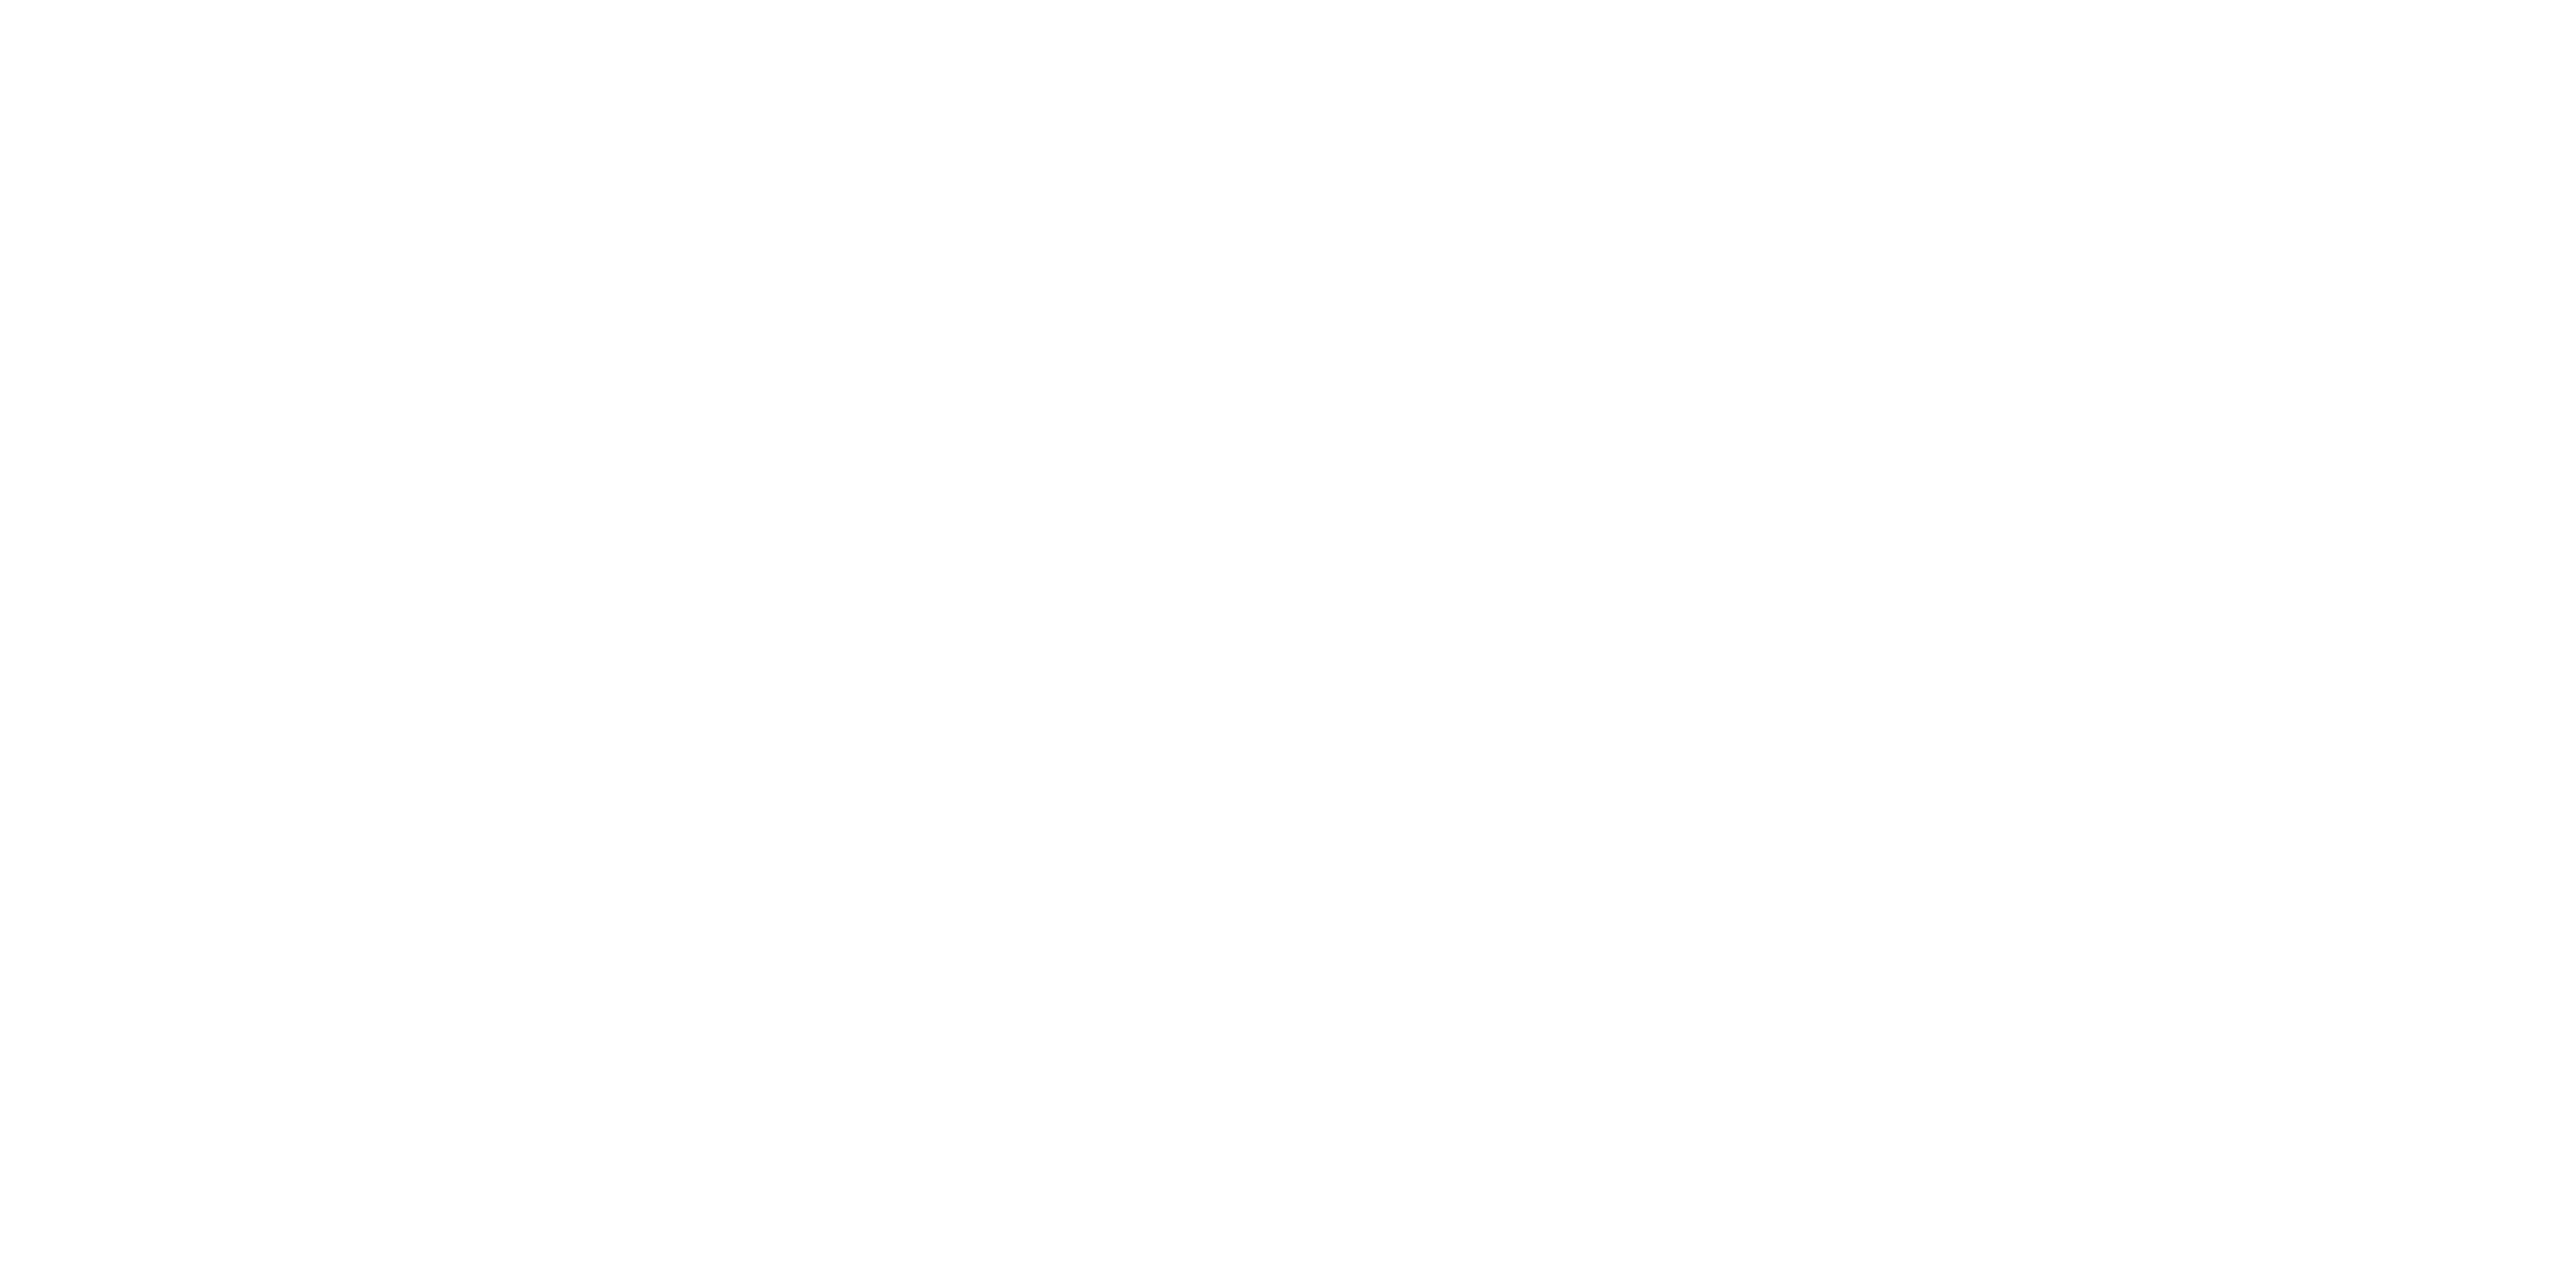

<IPython.core.display.Javascript object>


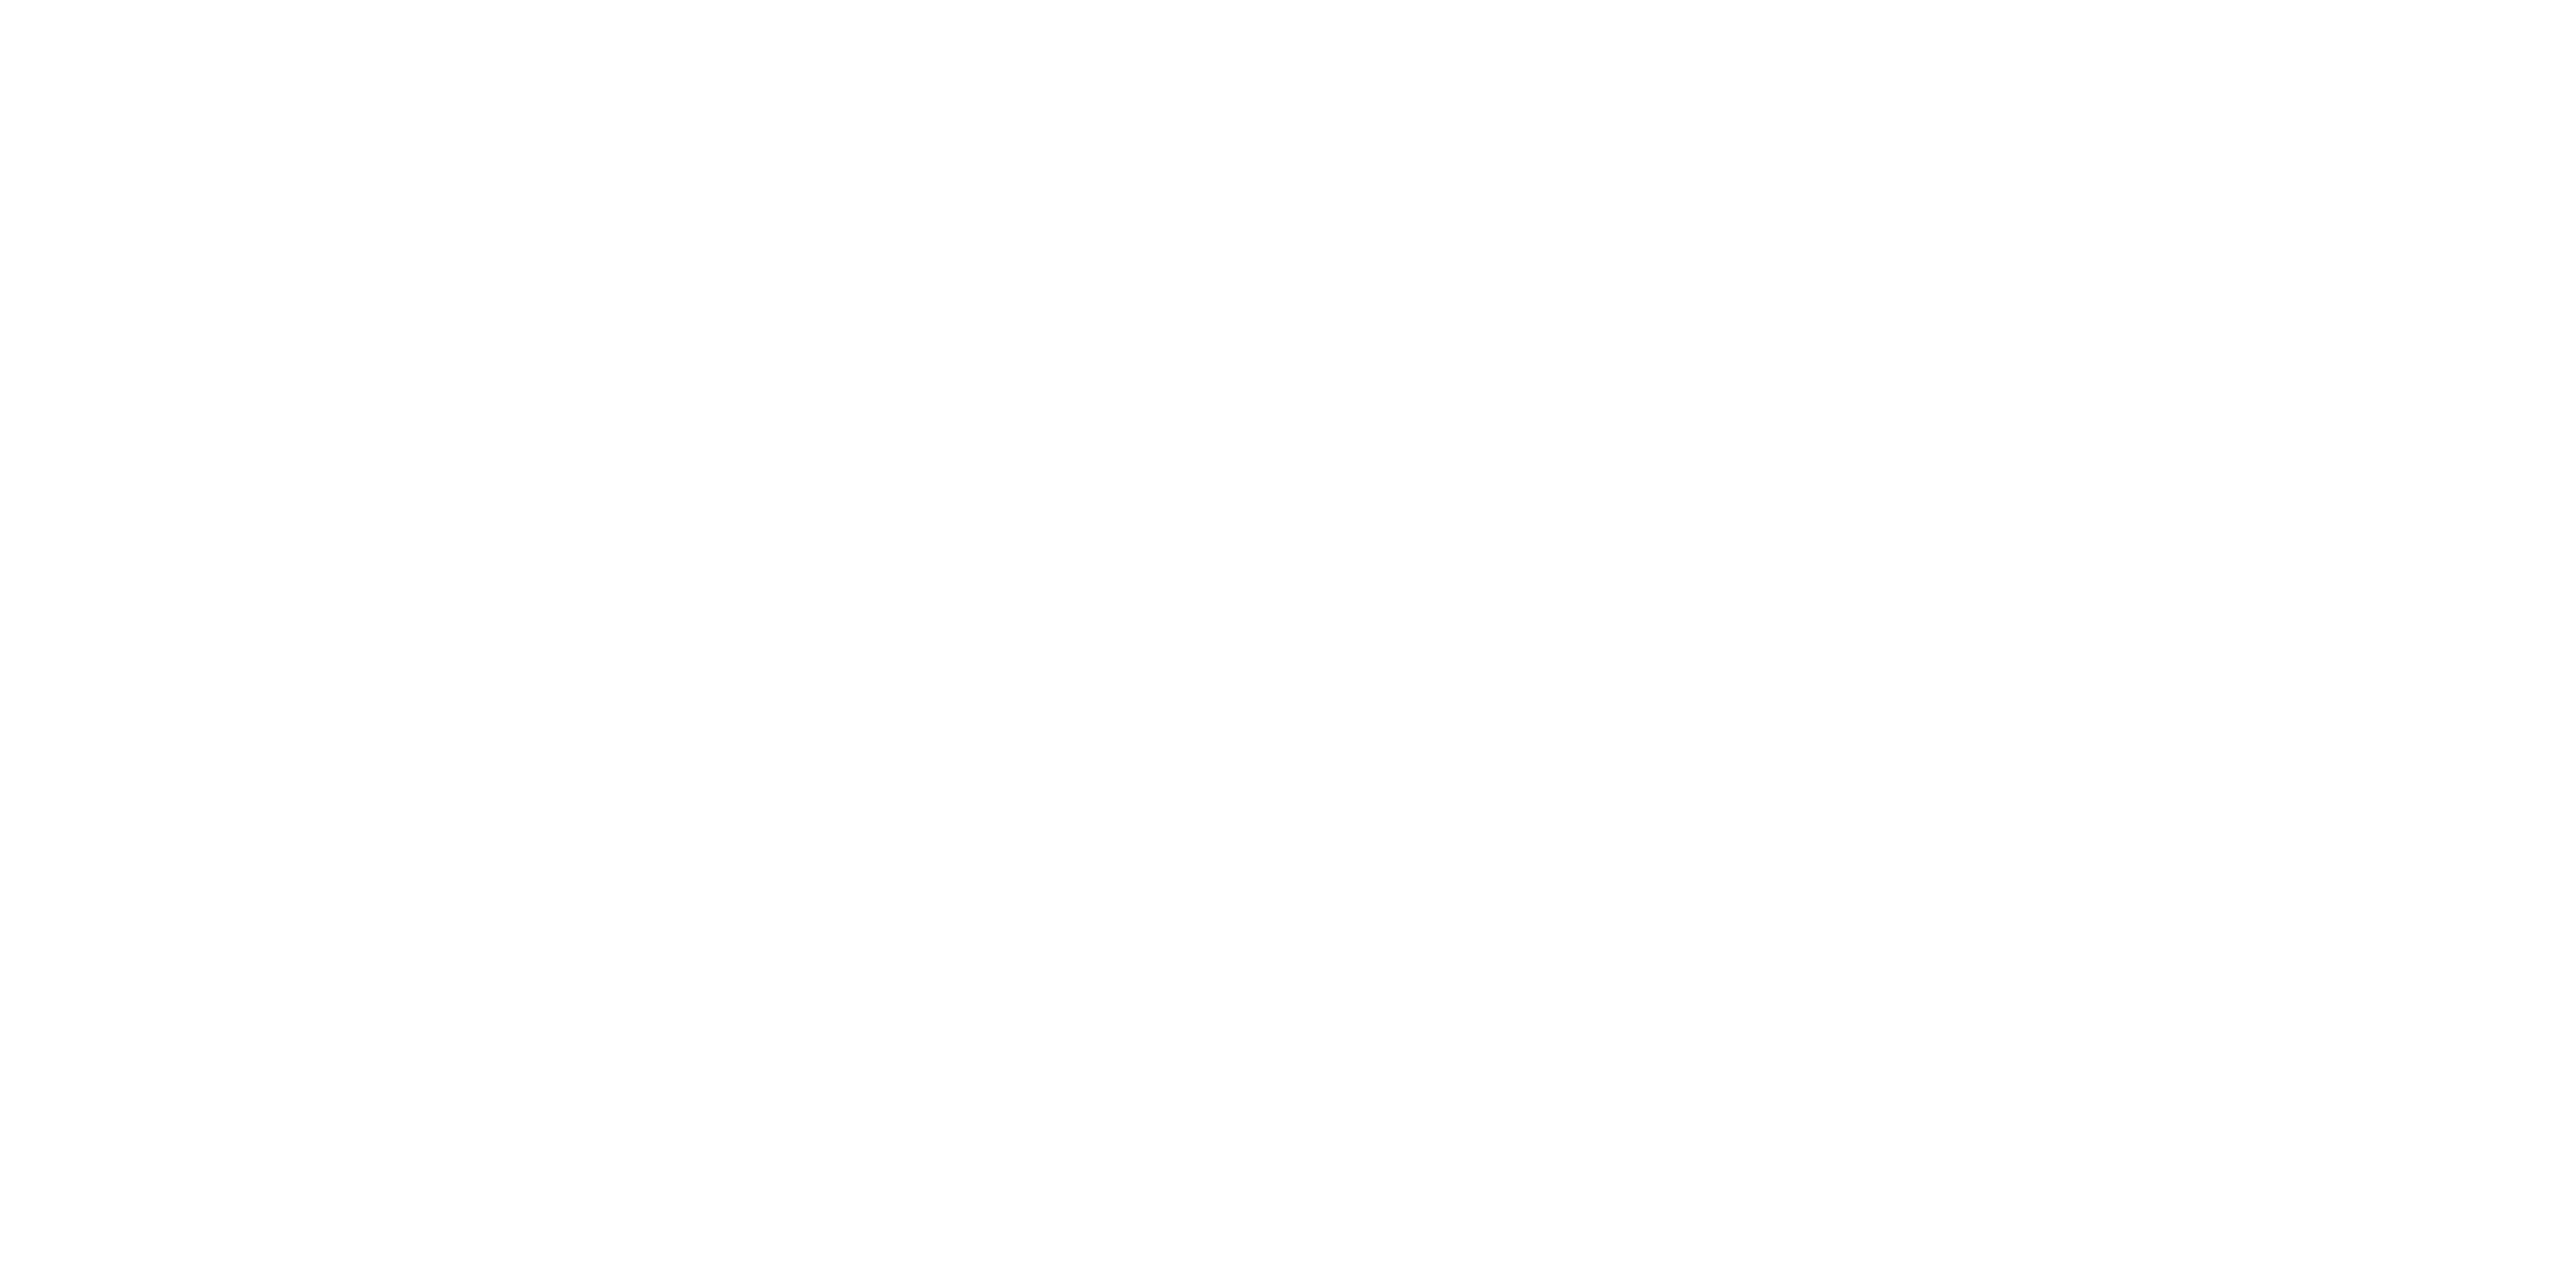

<IPython.core.display.Javascript object>


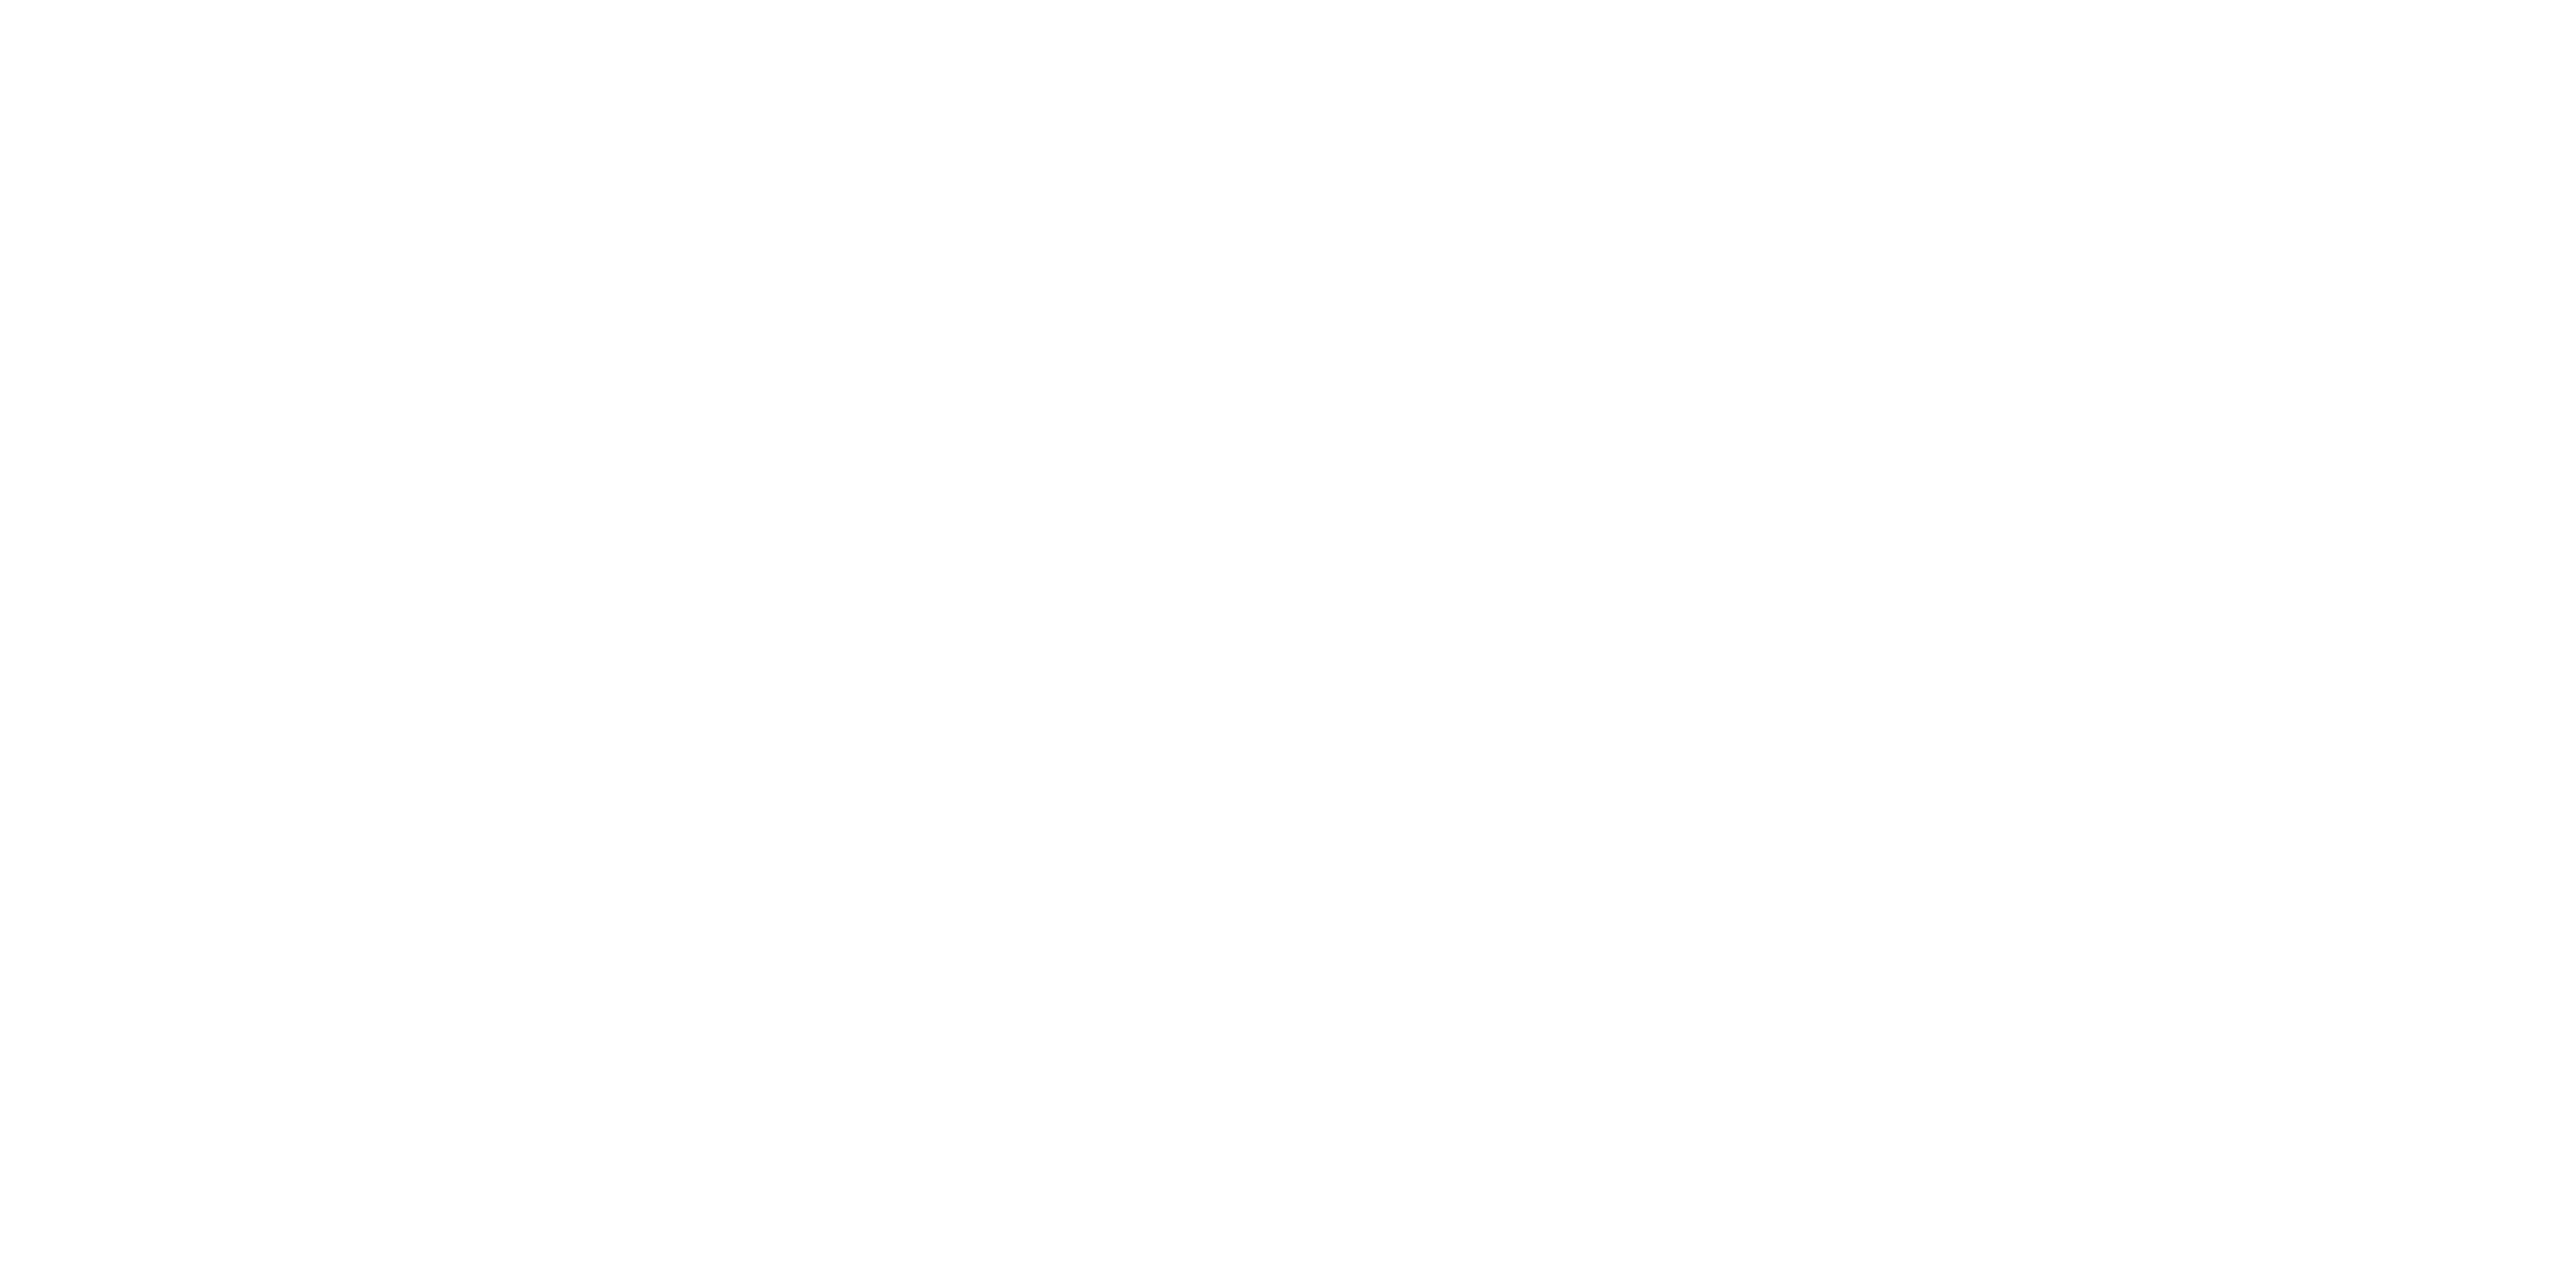

<IPython.core.display.Javascript object>


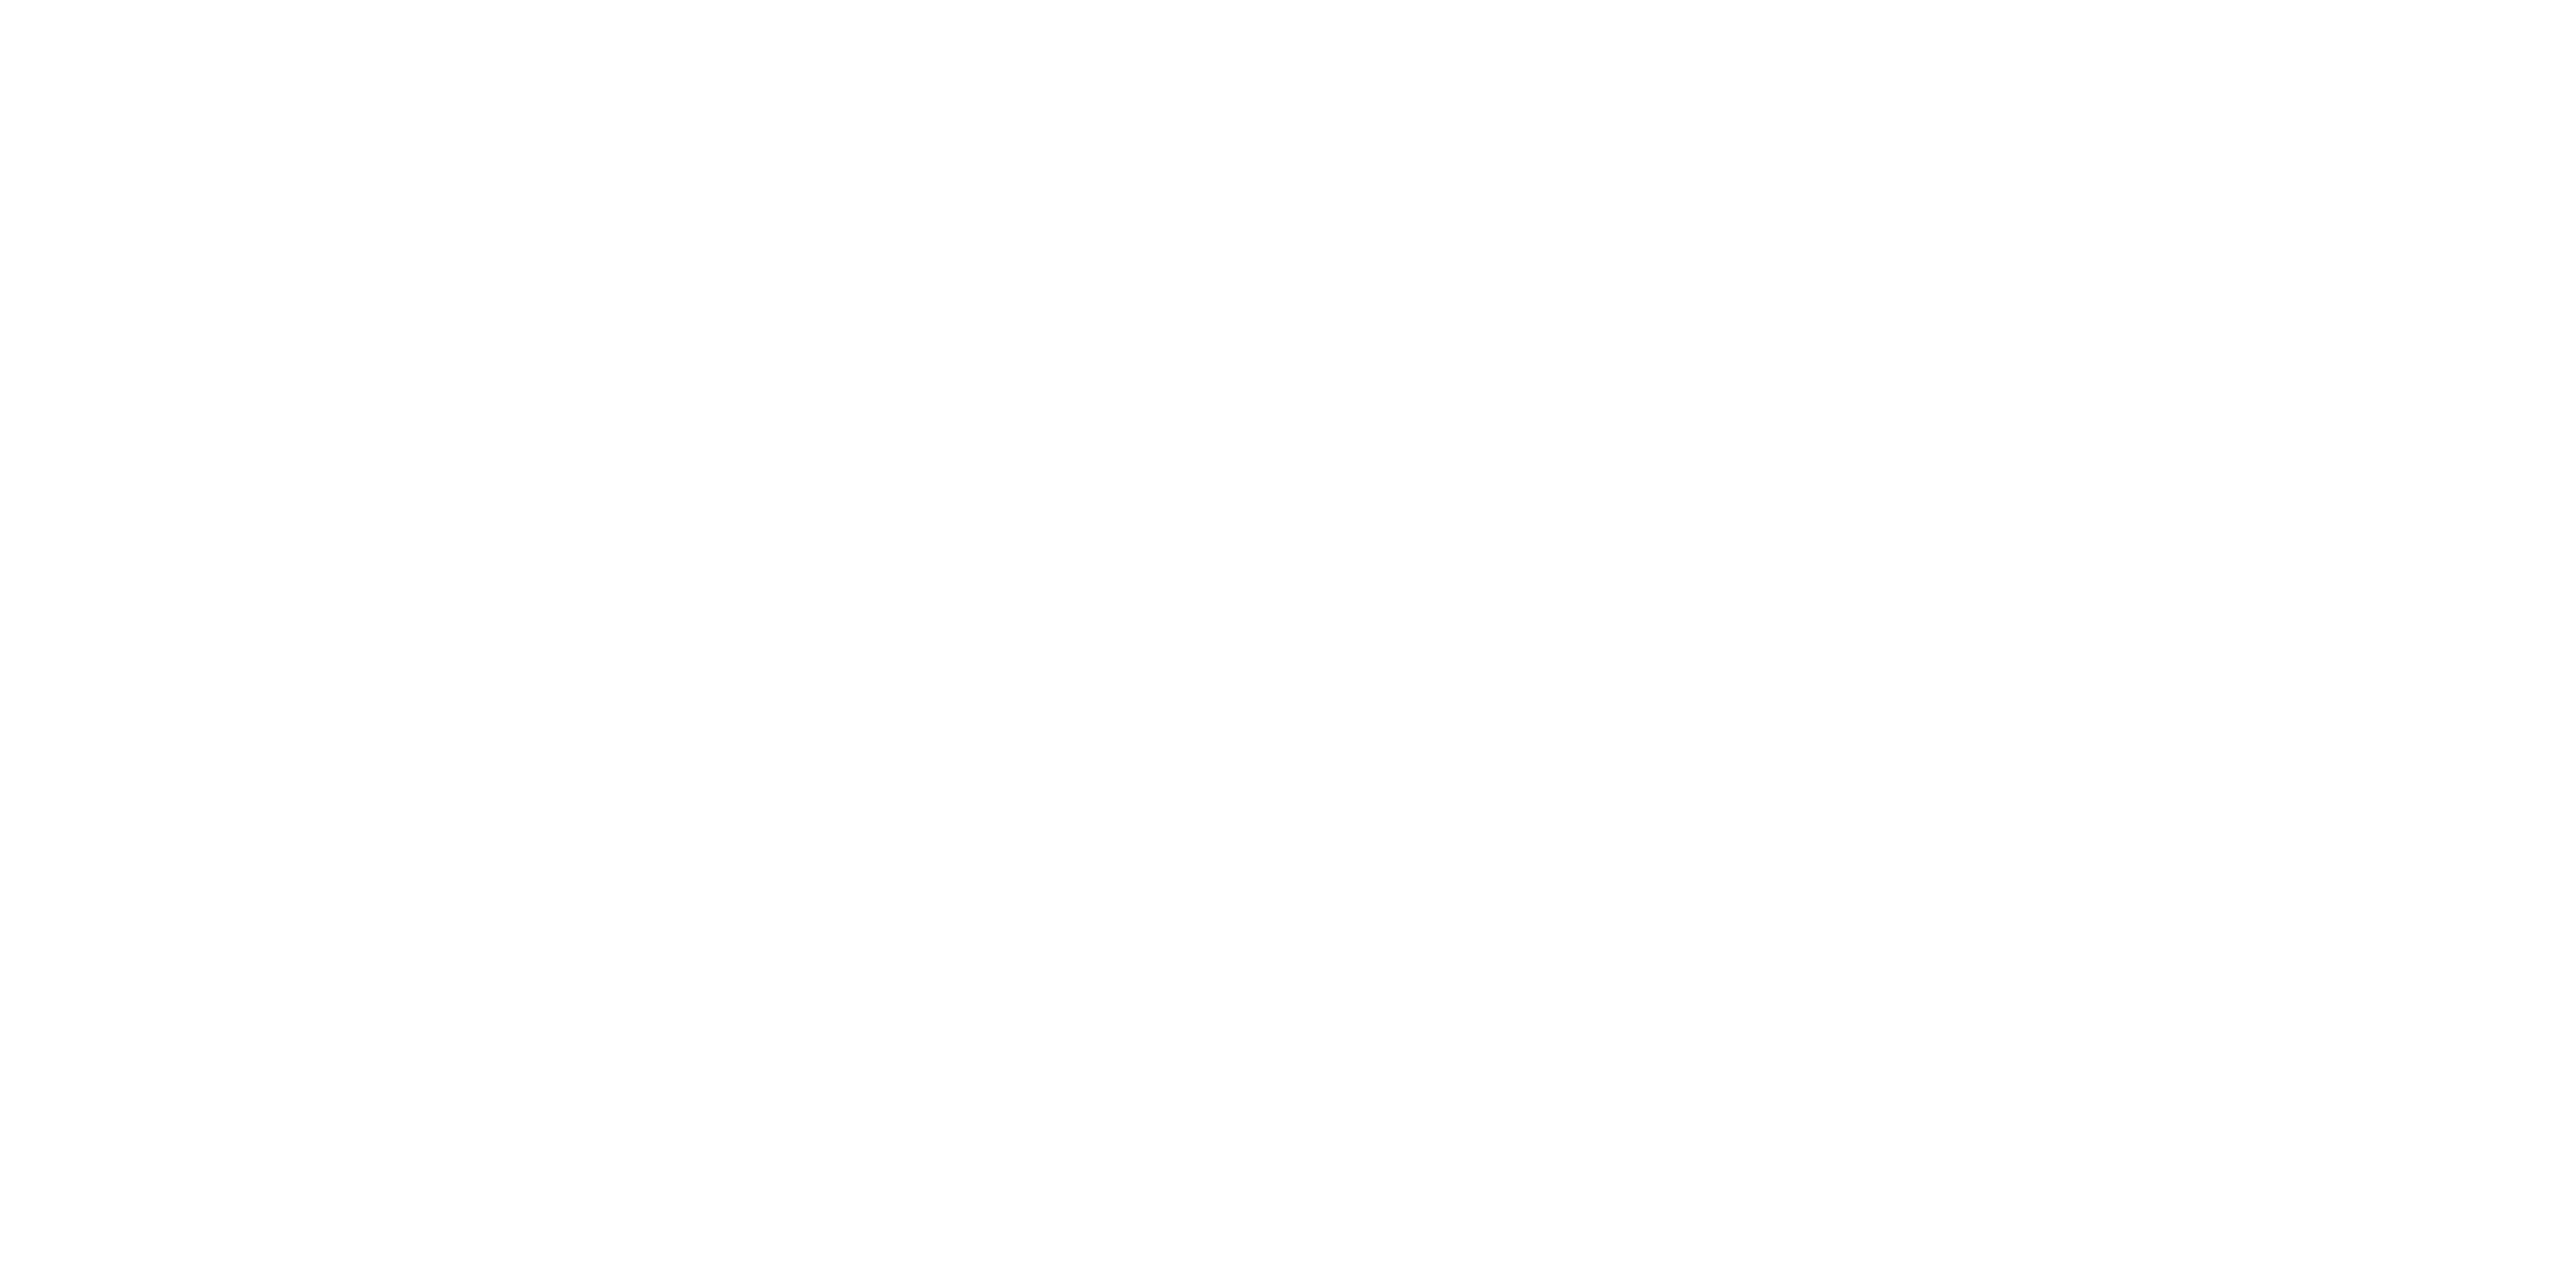

<IPython.core.display.Javascript object>


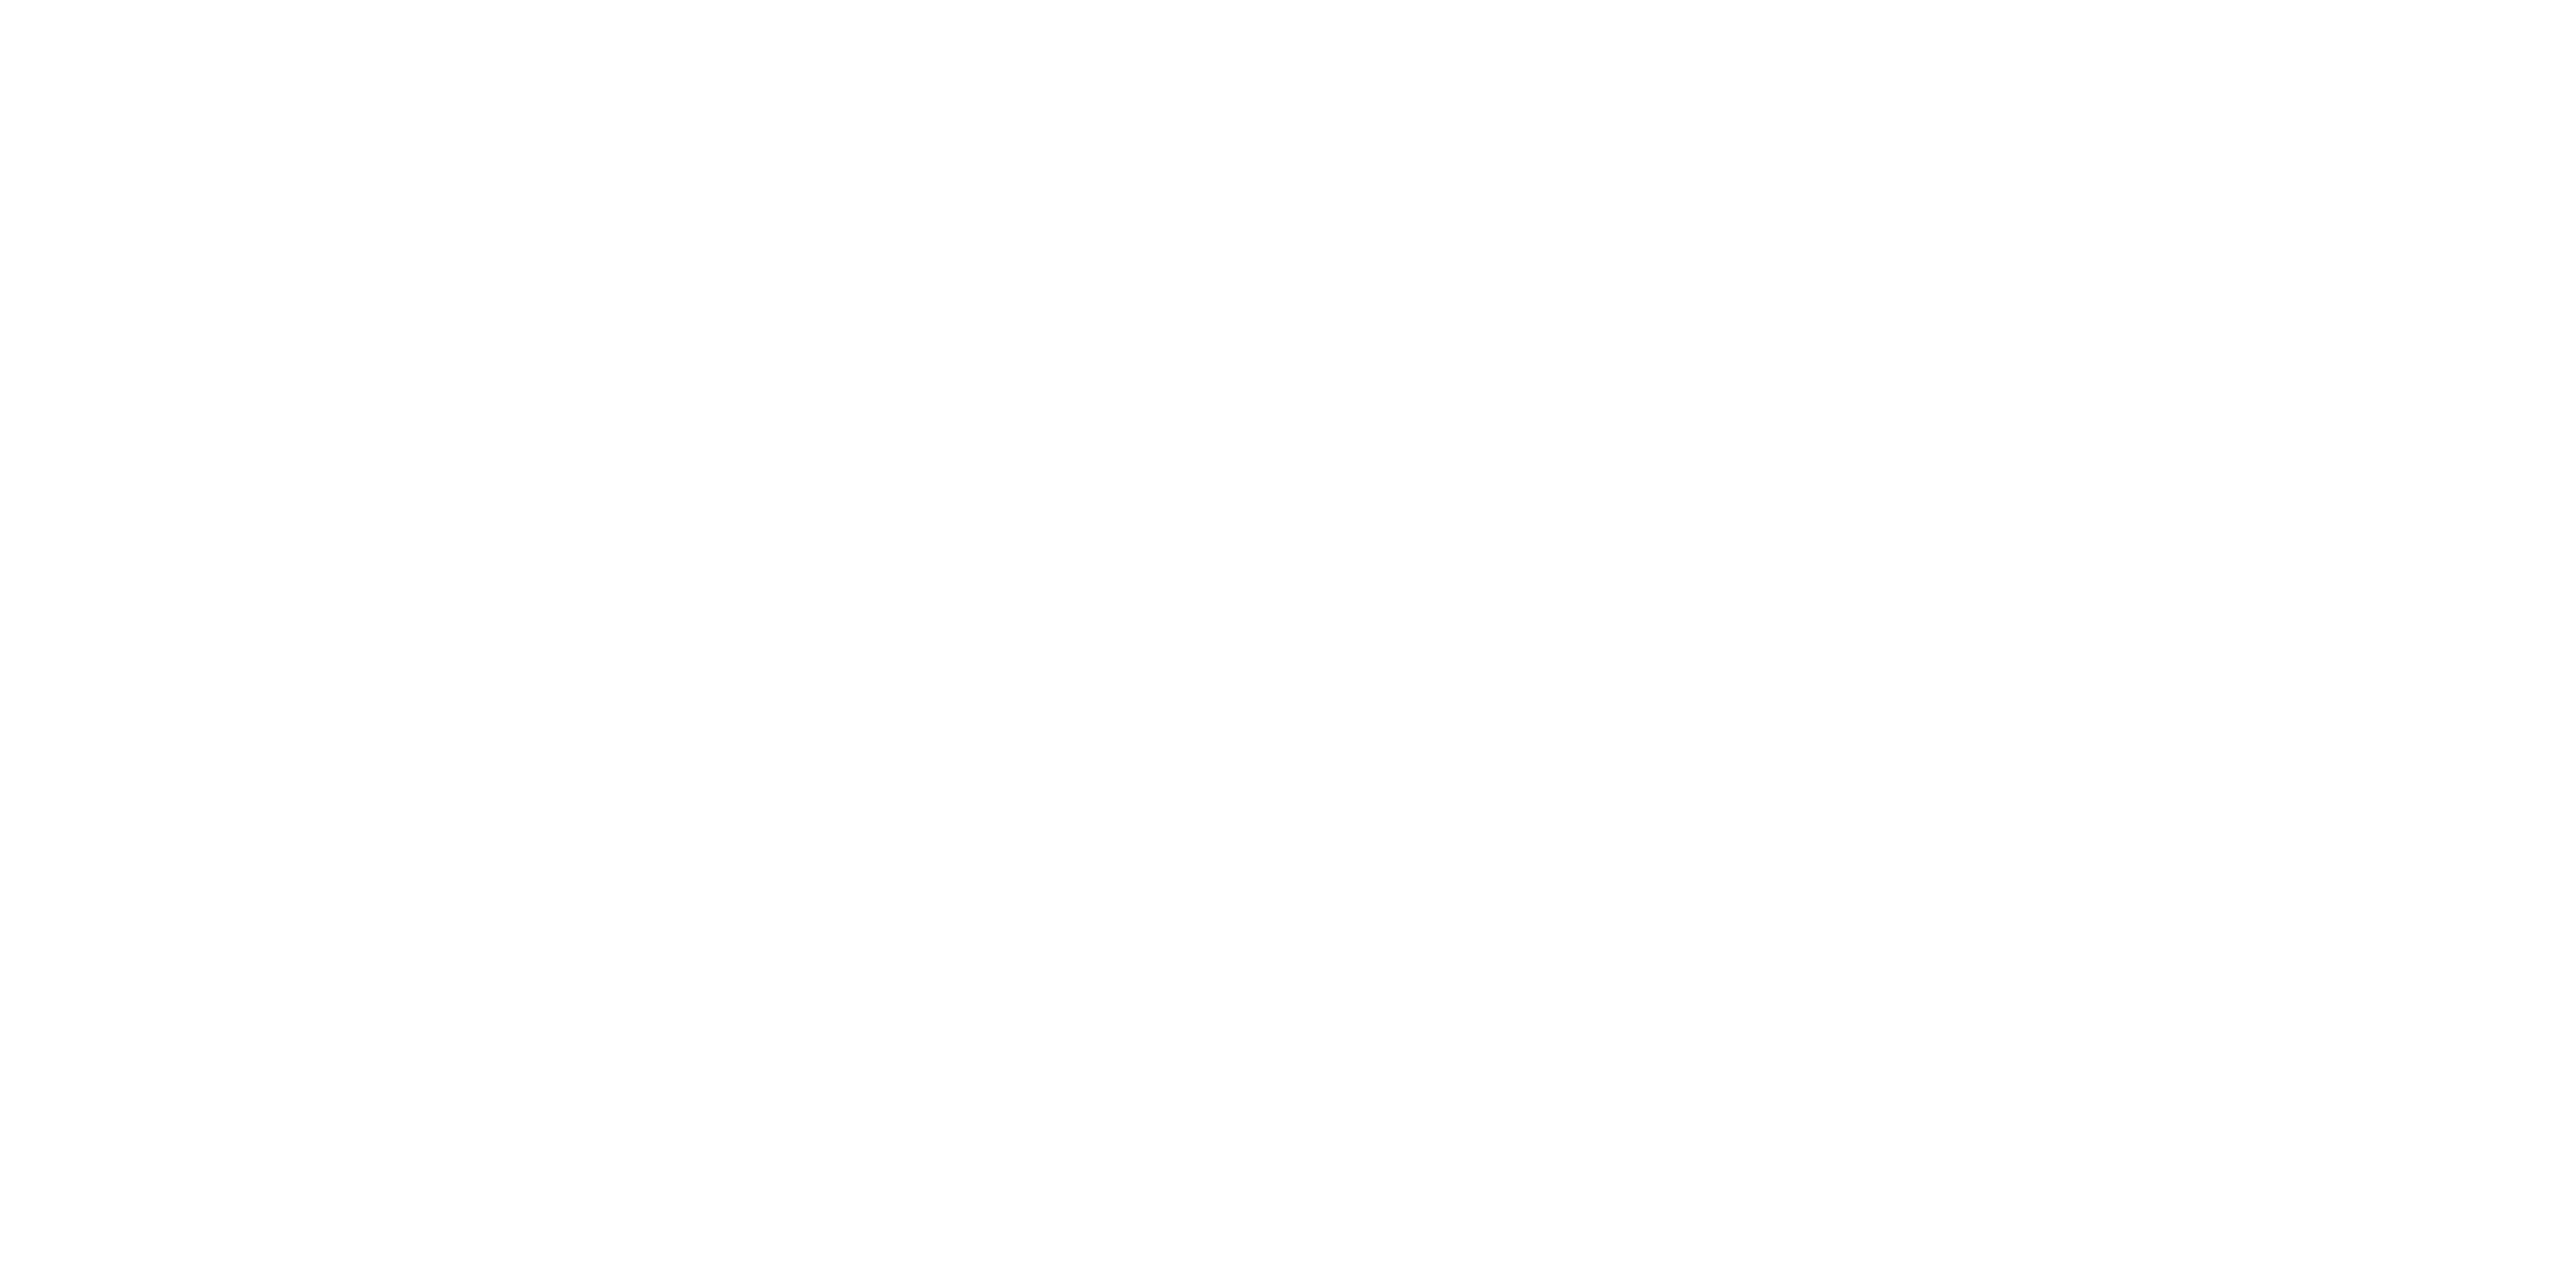

<IPython.core.display.Javascript object>


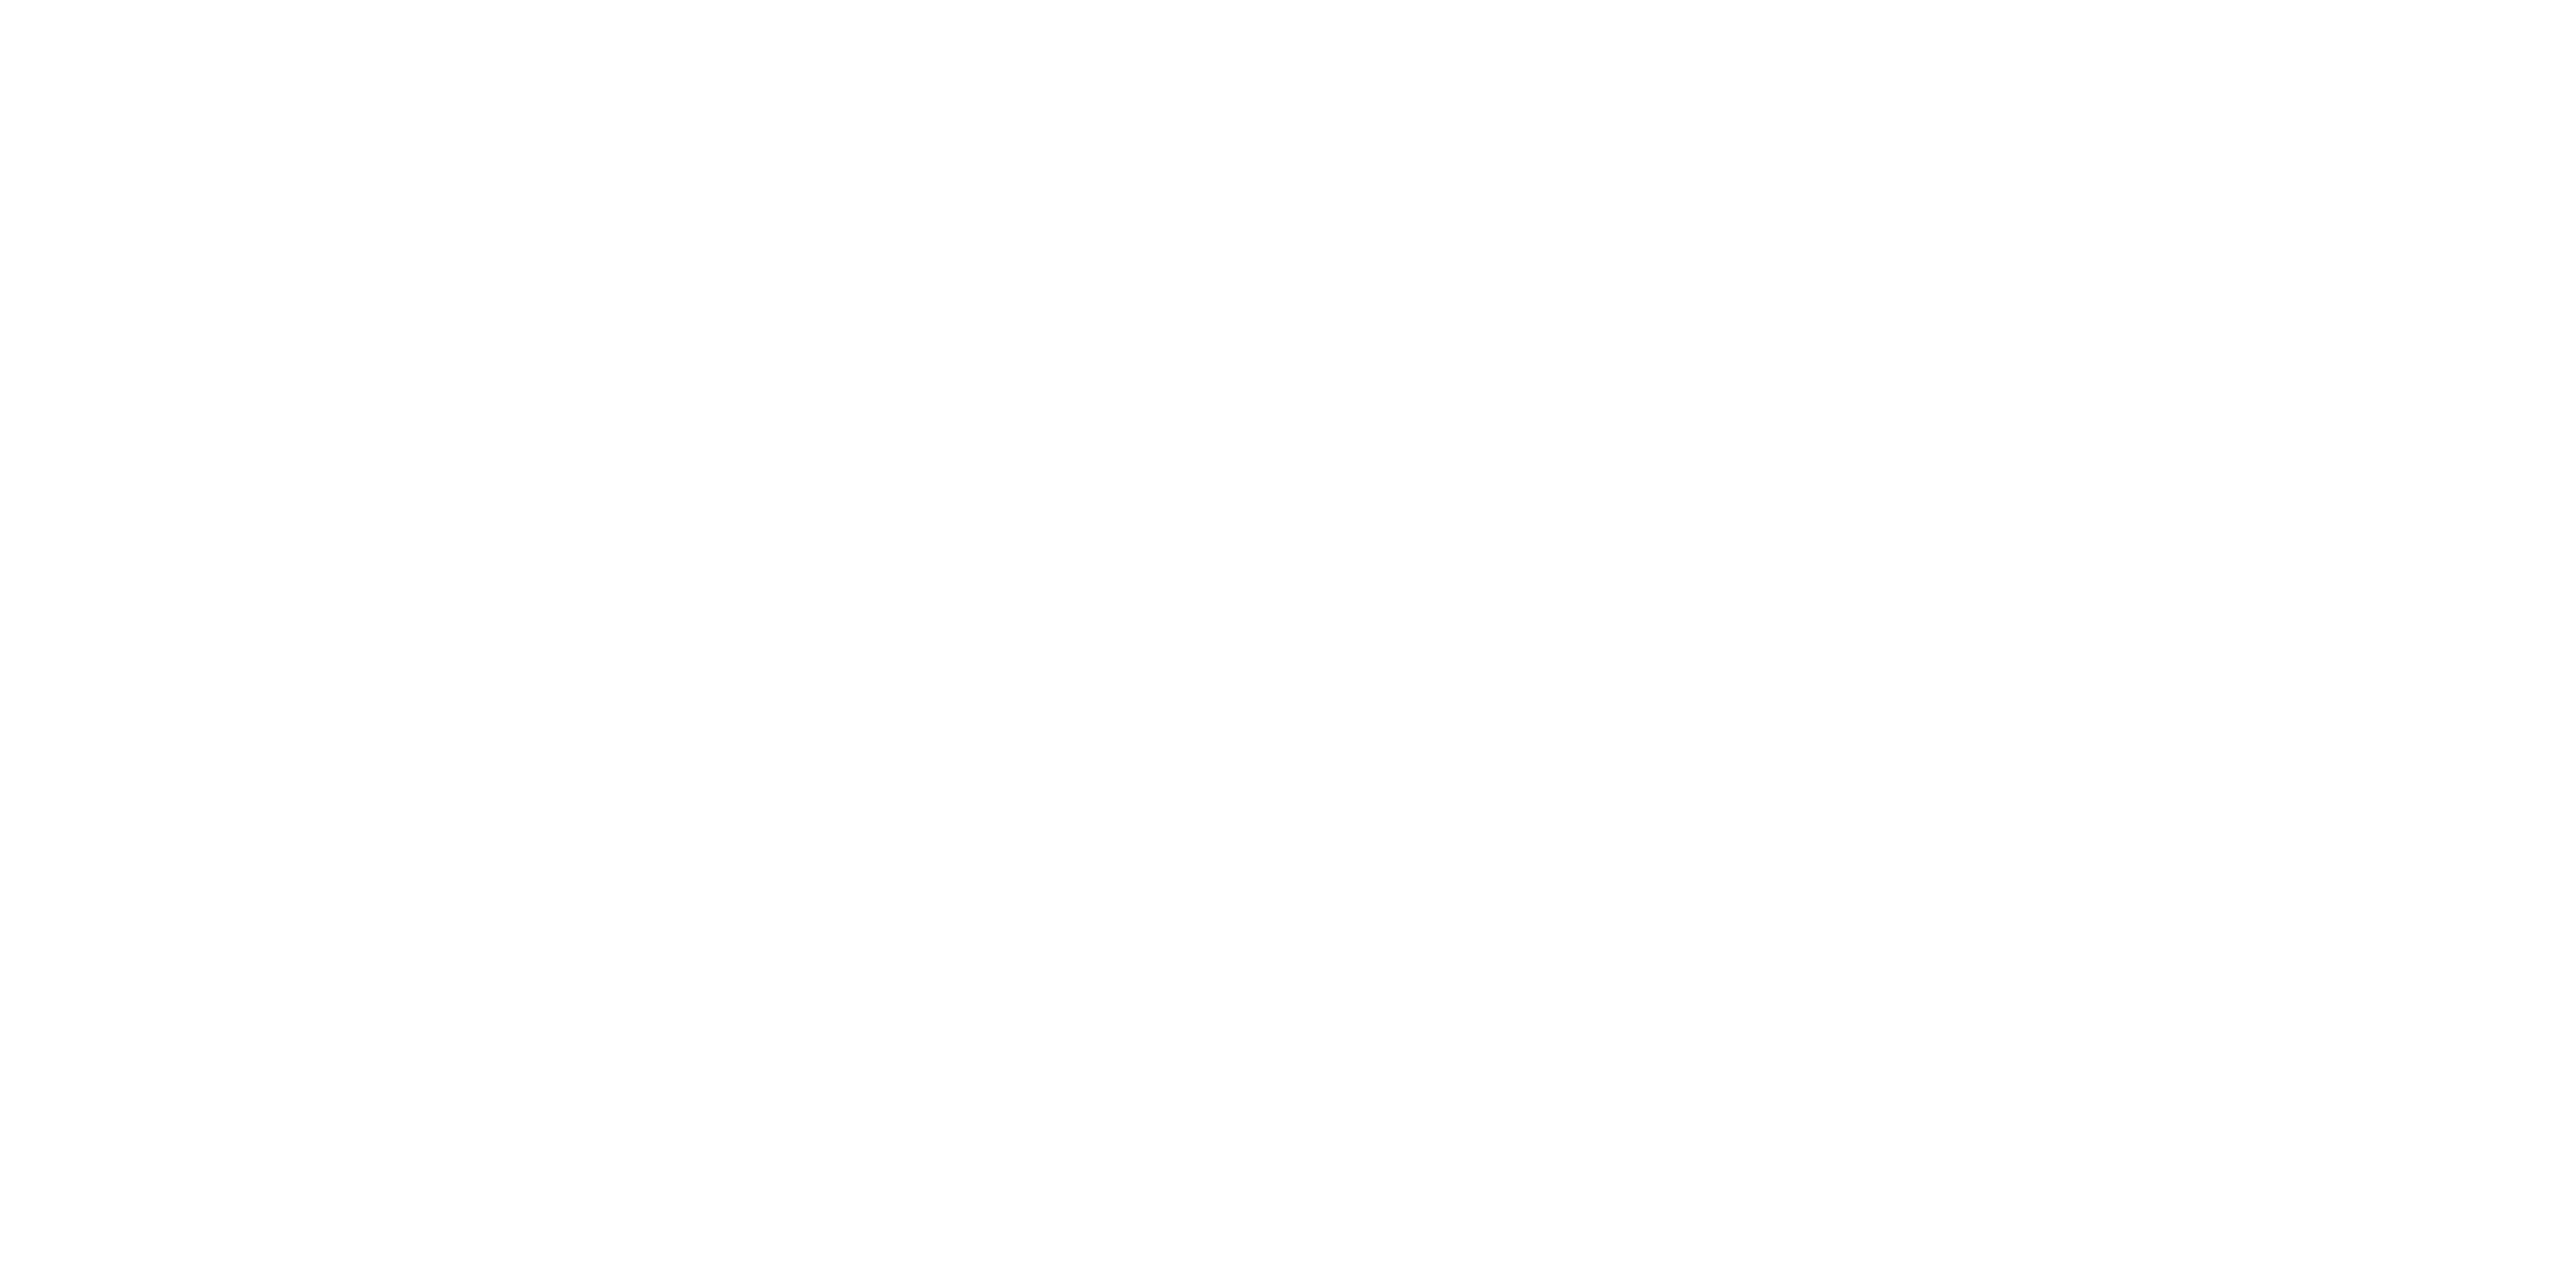

<IPython.core.display.Javascript object>


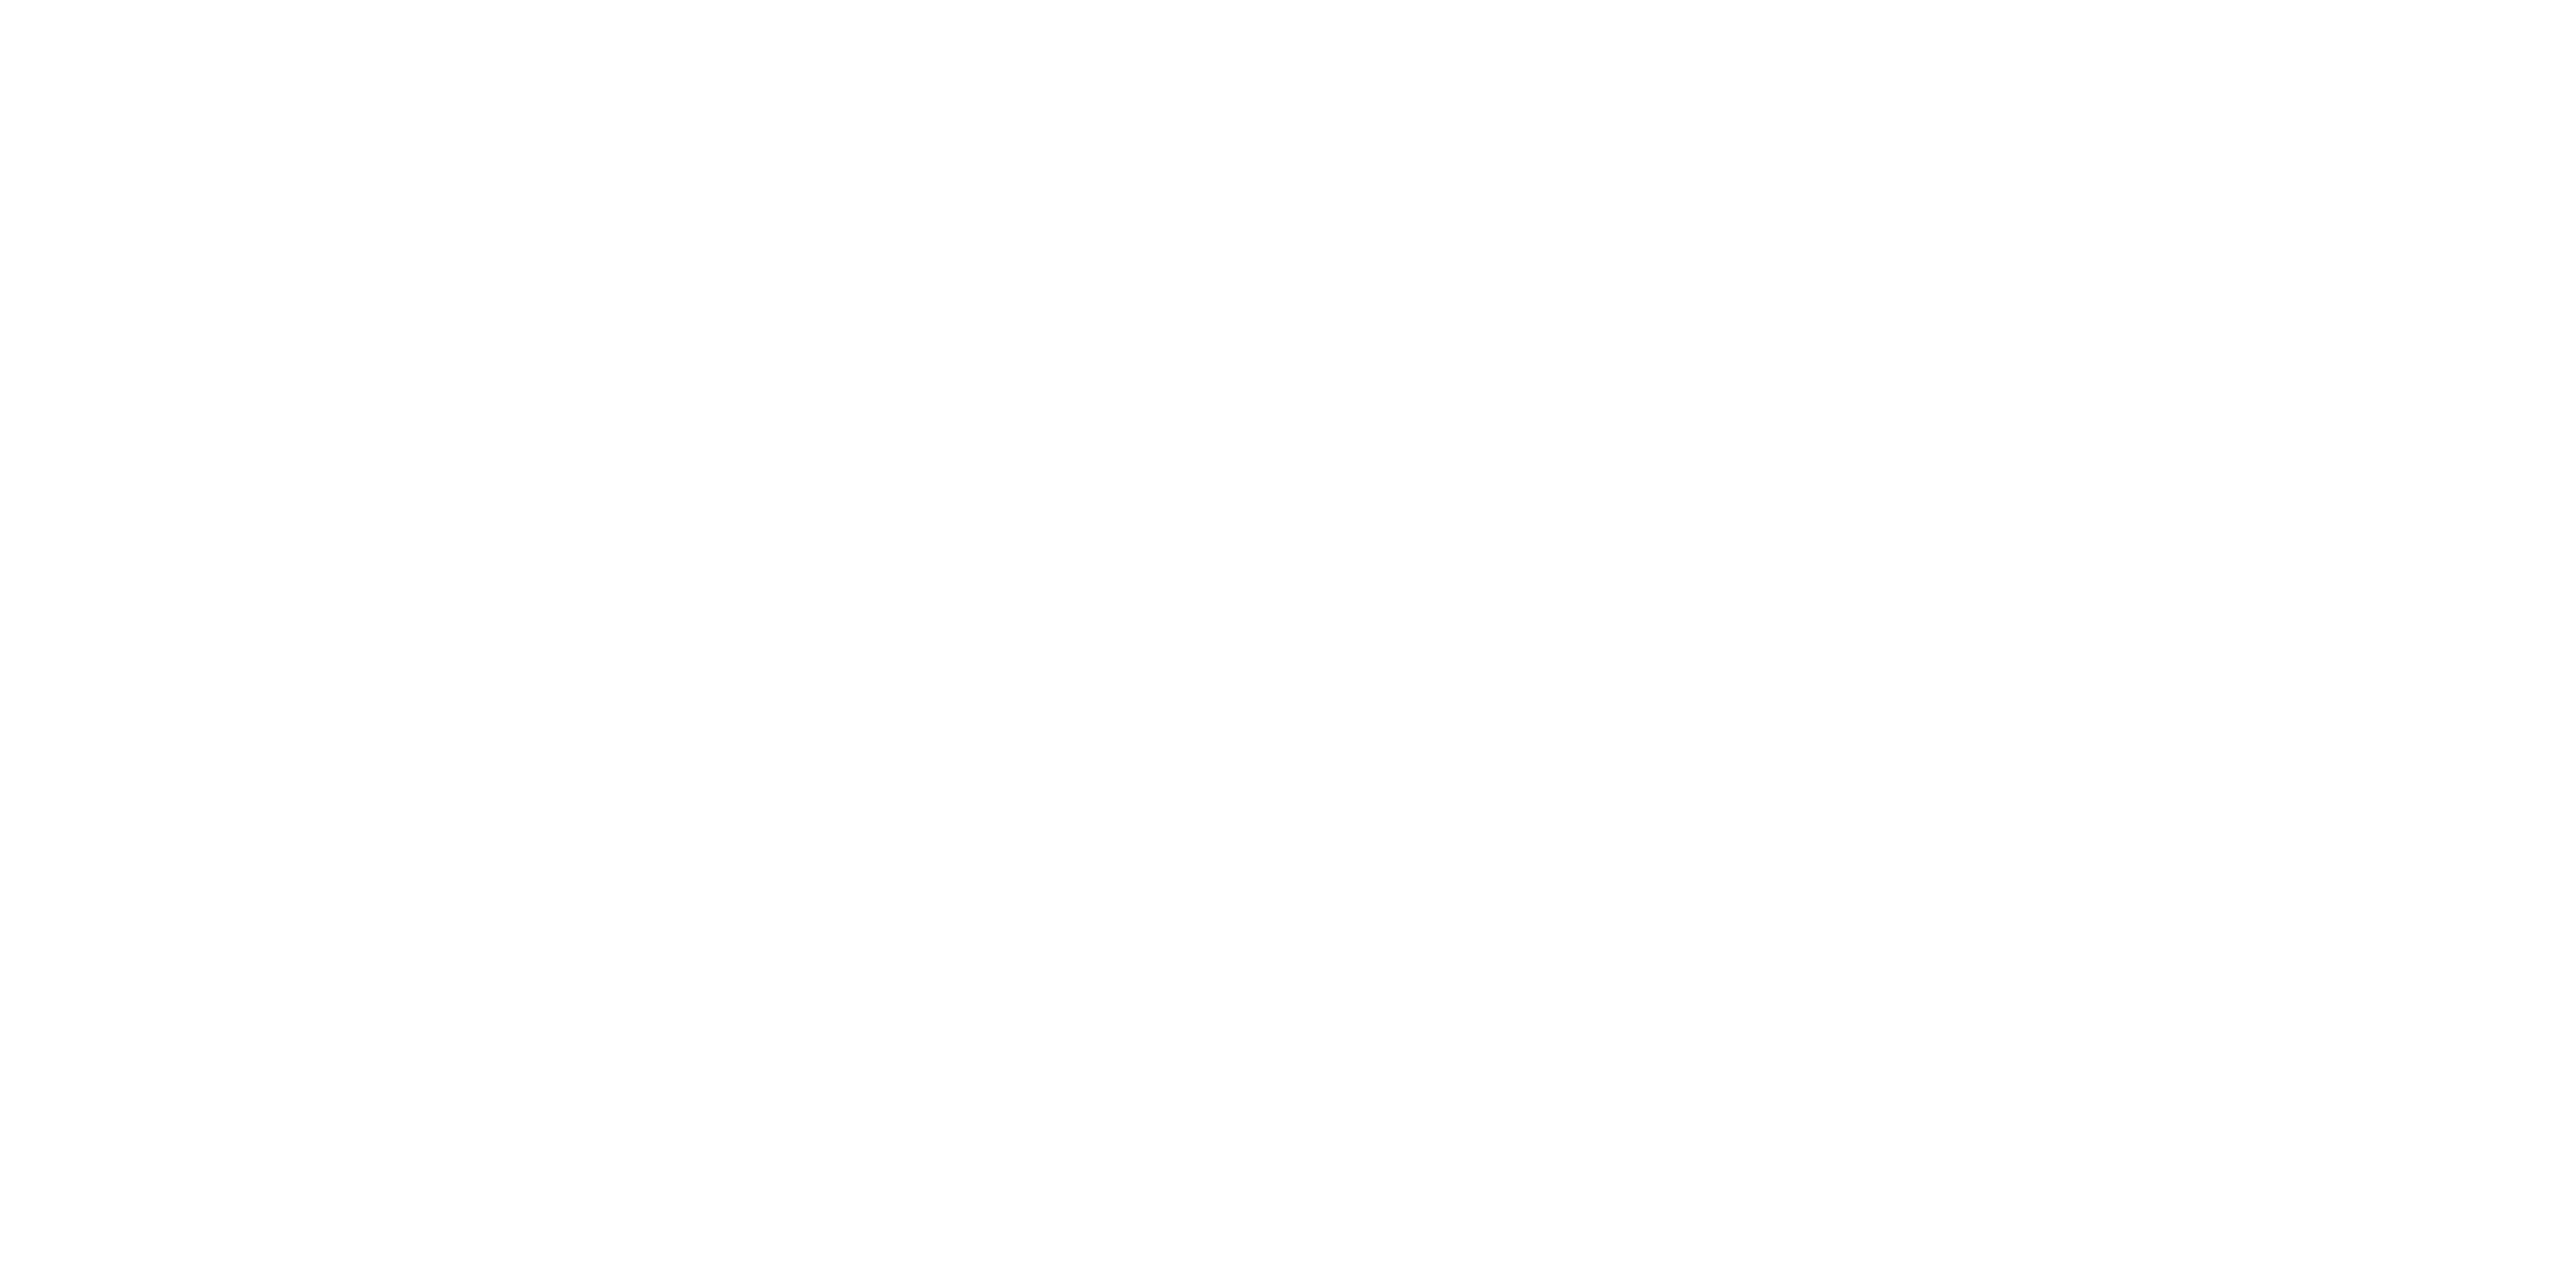

<IPython.core.display.Javascript object>


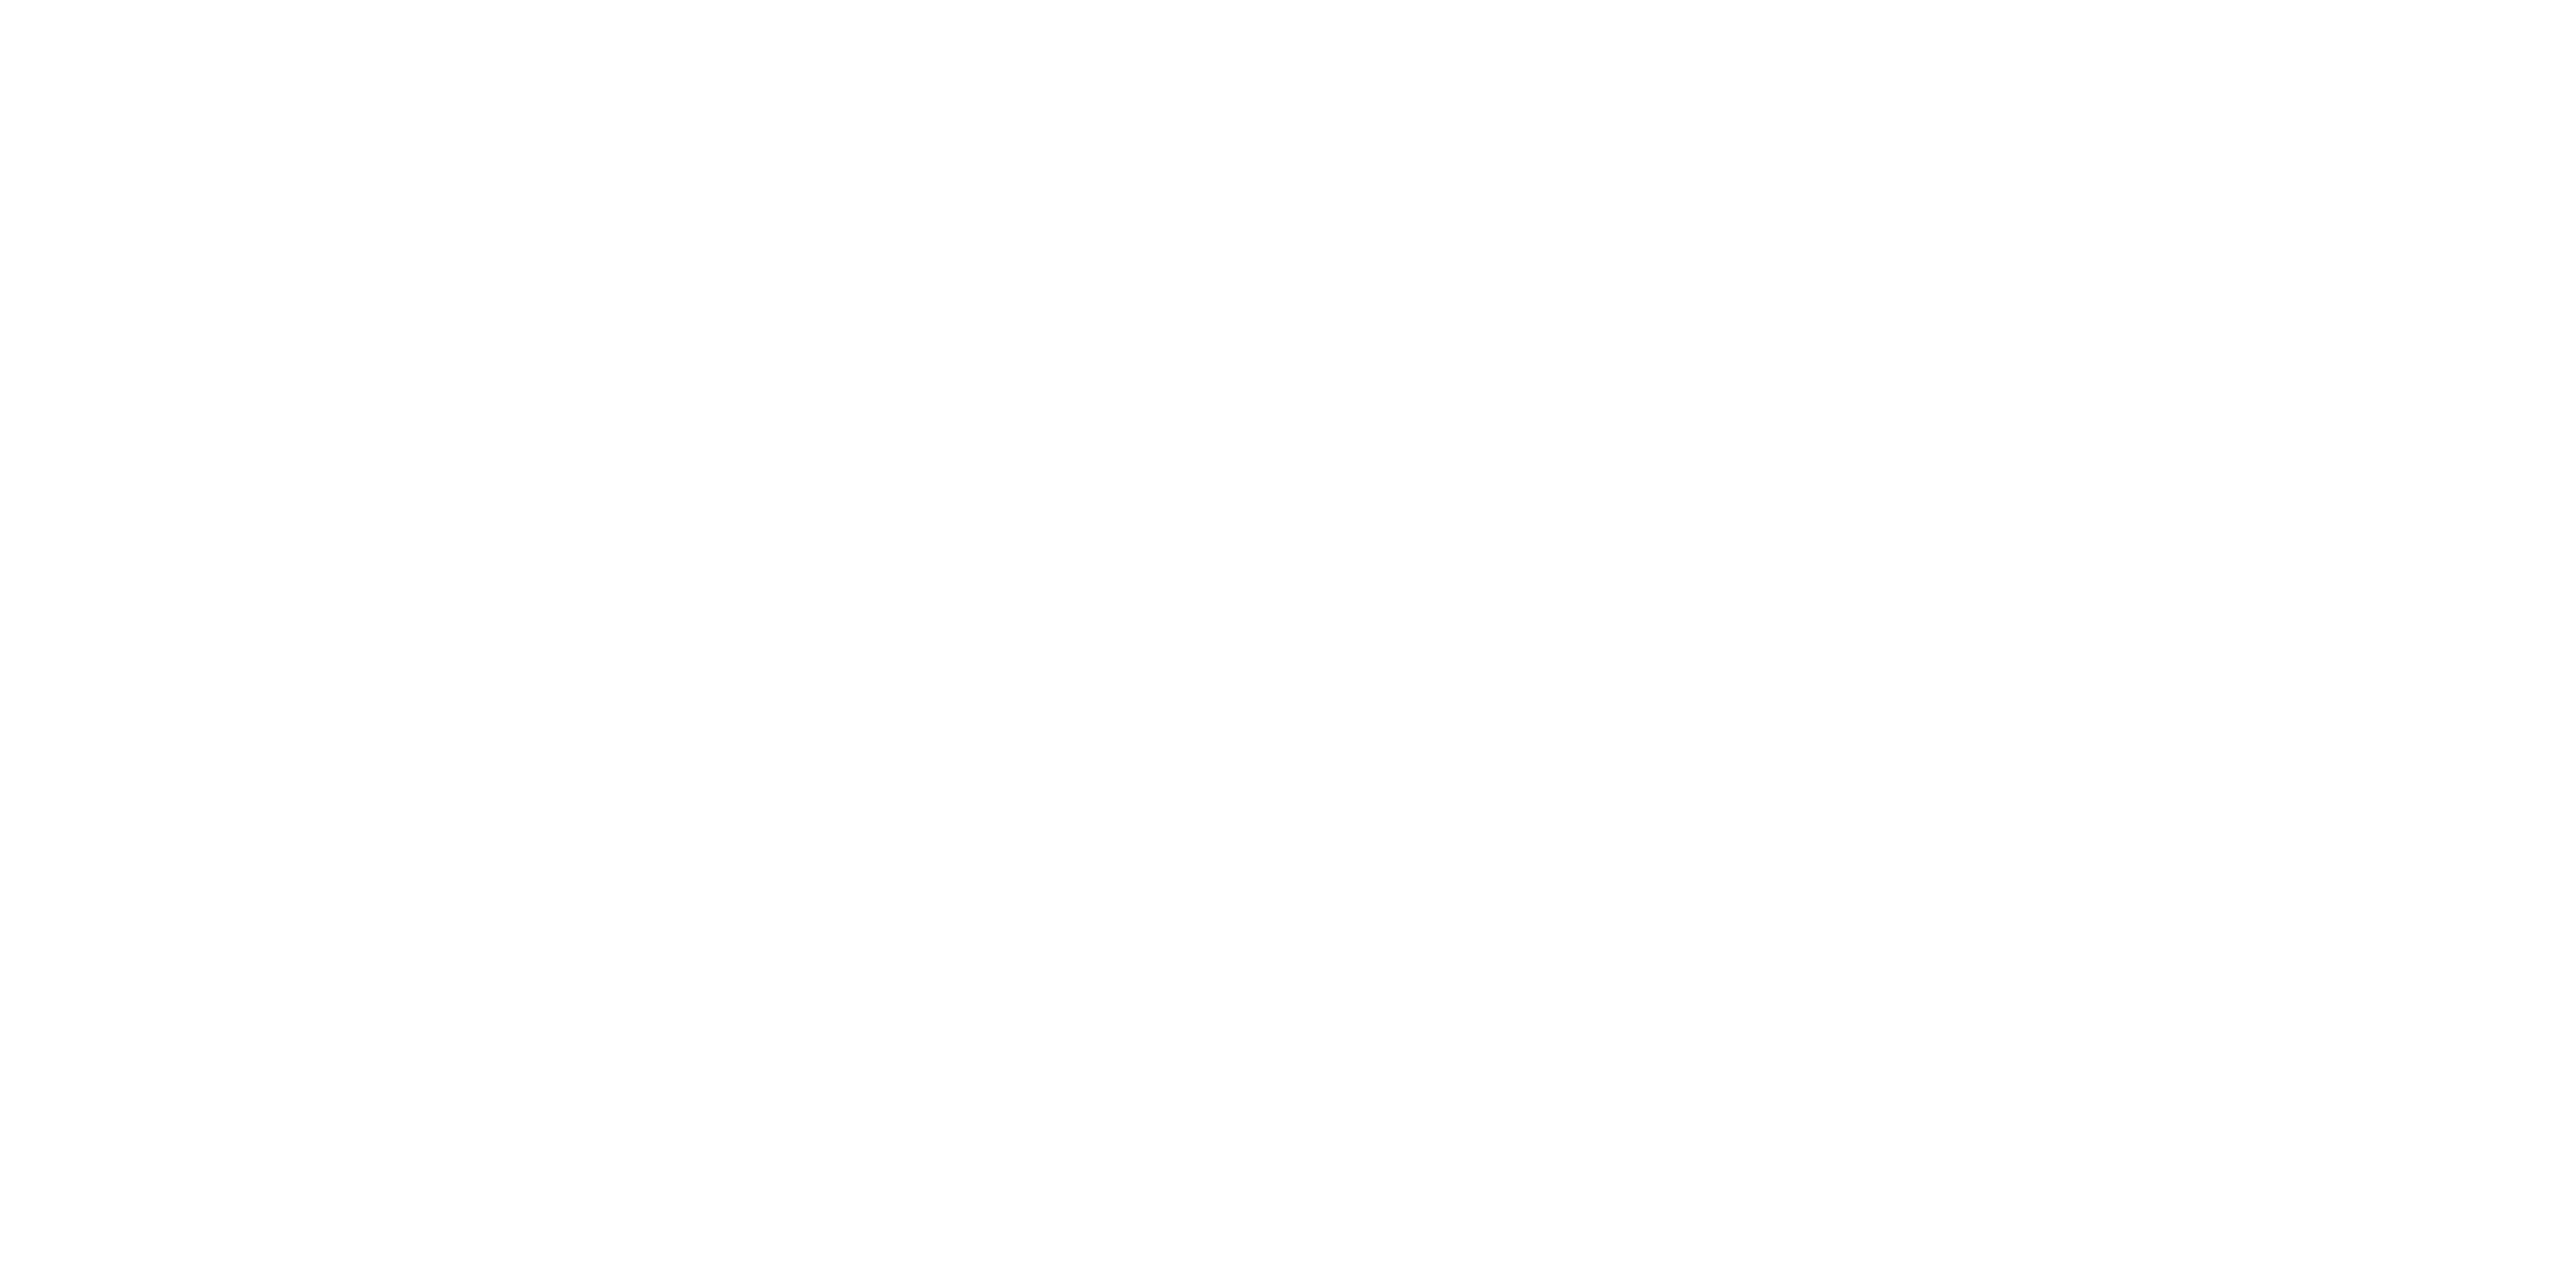

<IPython.core.display.Javascript object>


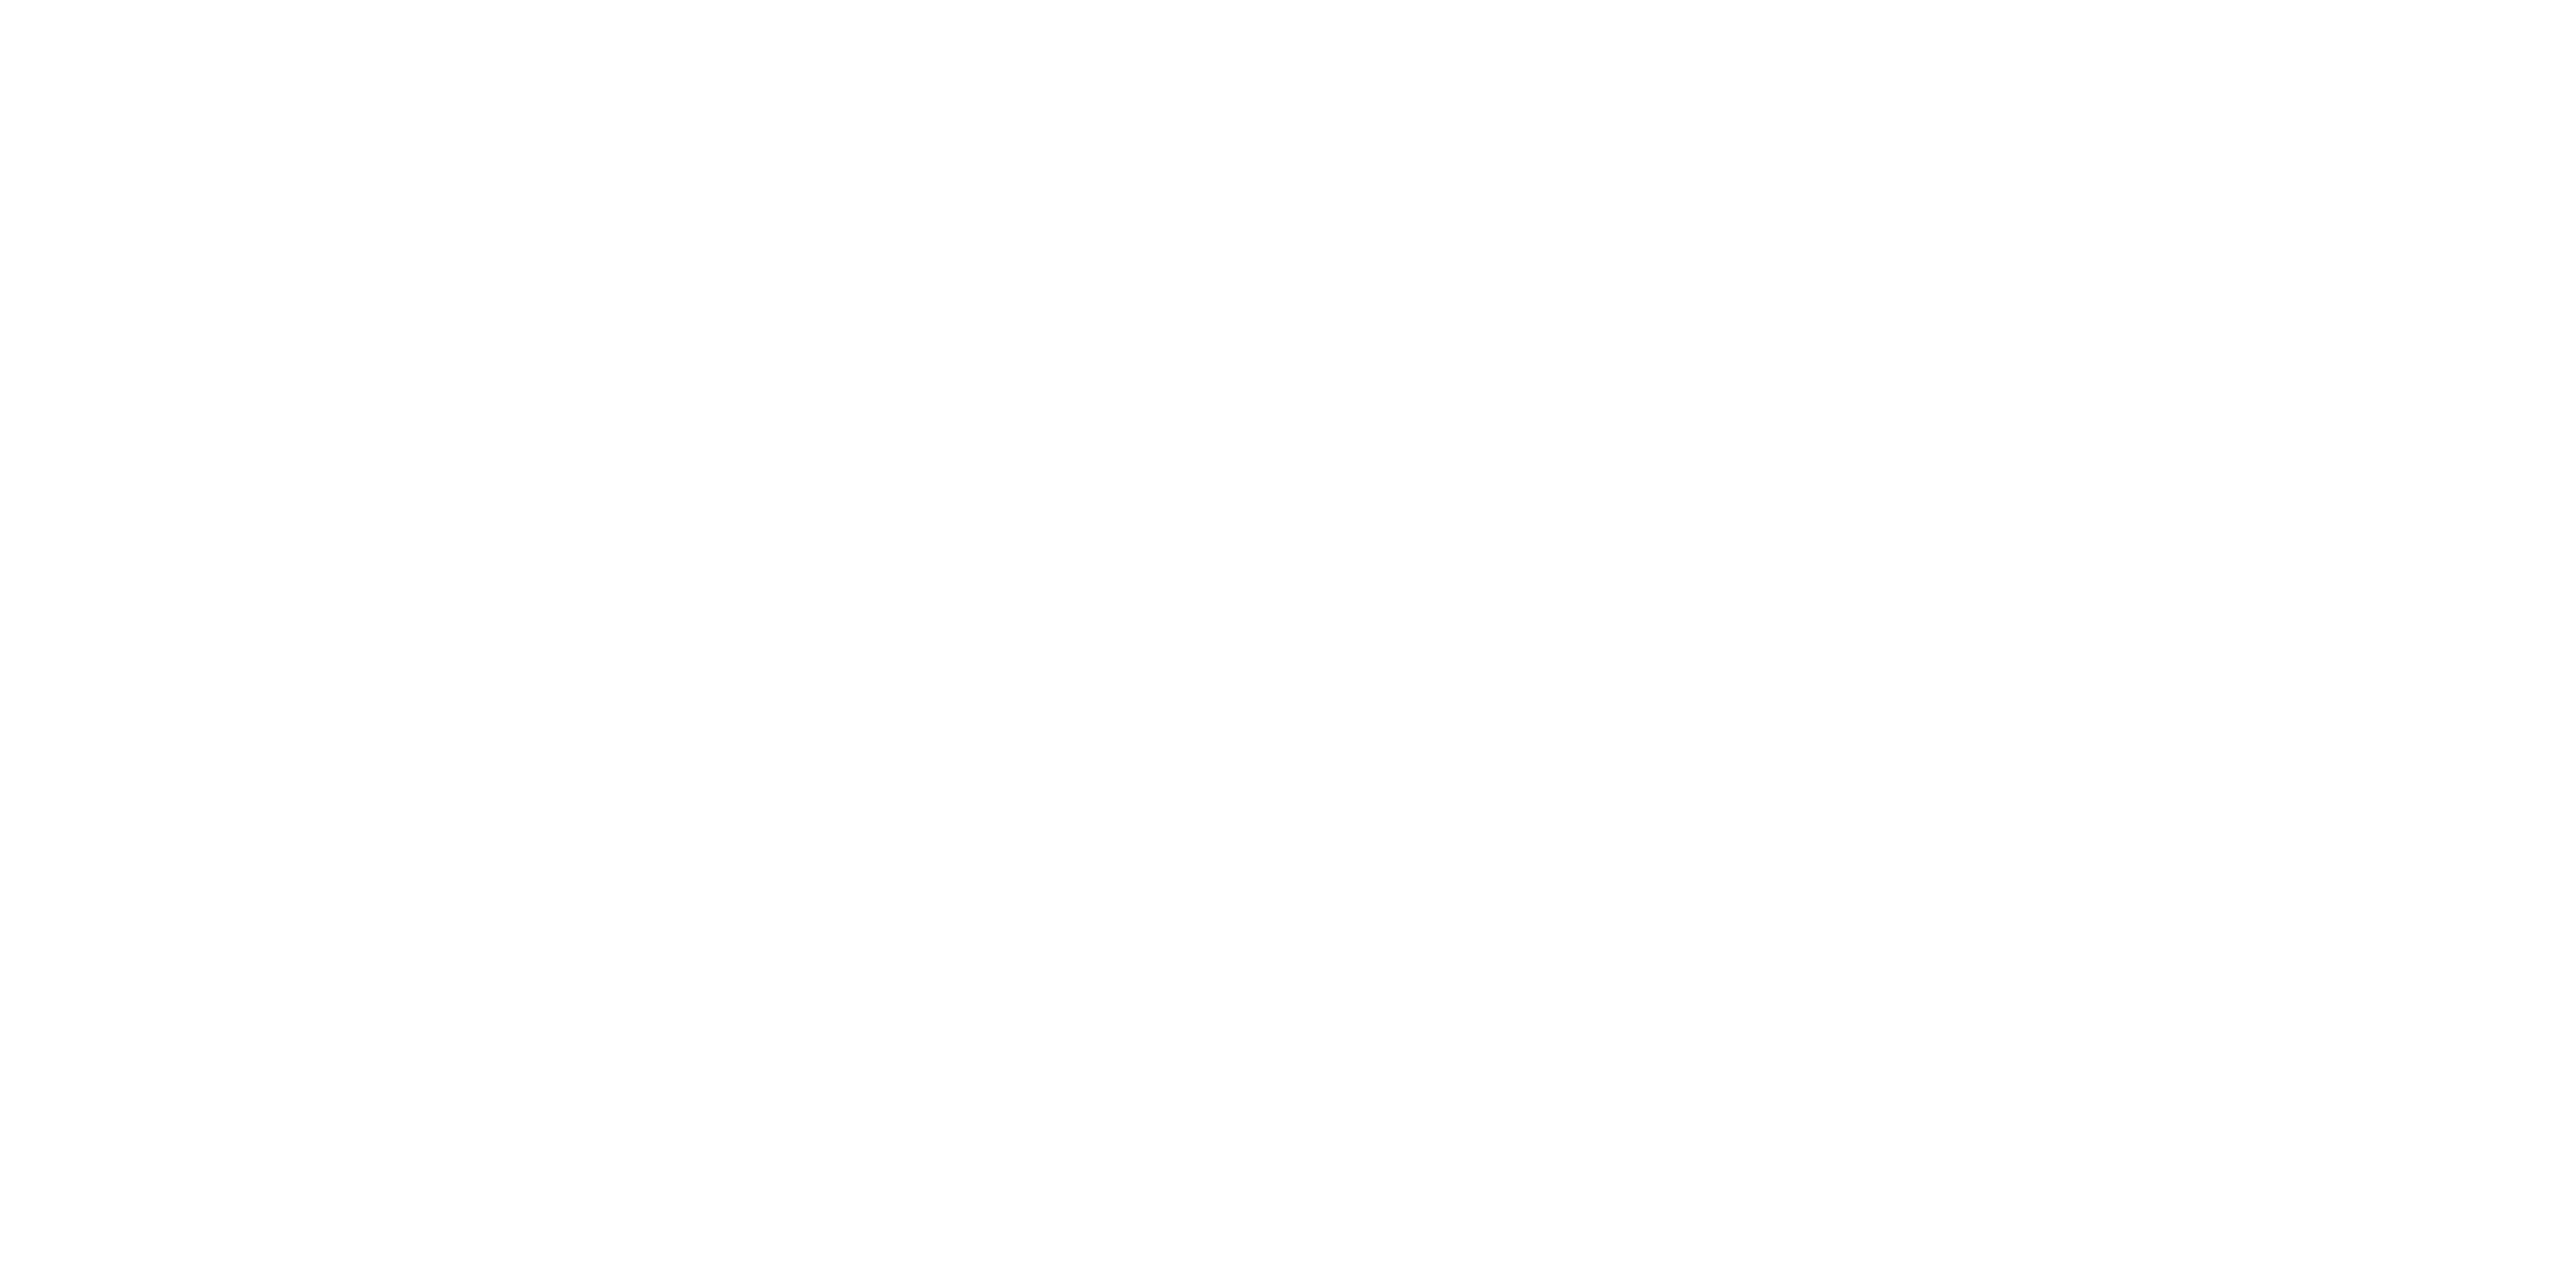

<IPython.core.display.Javascript object>


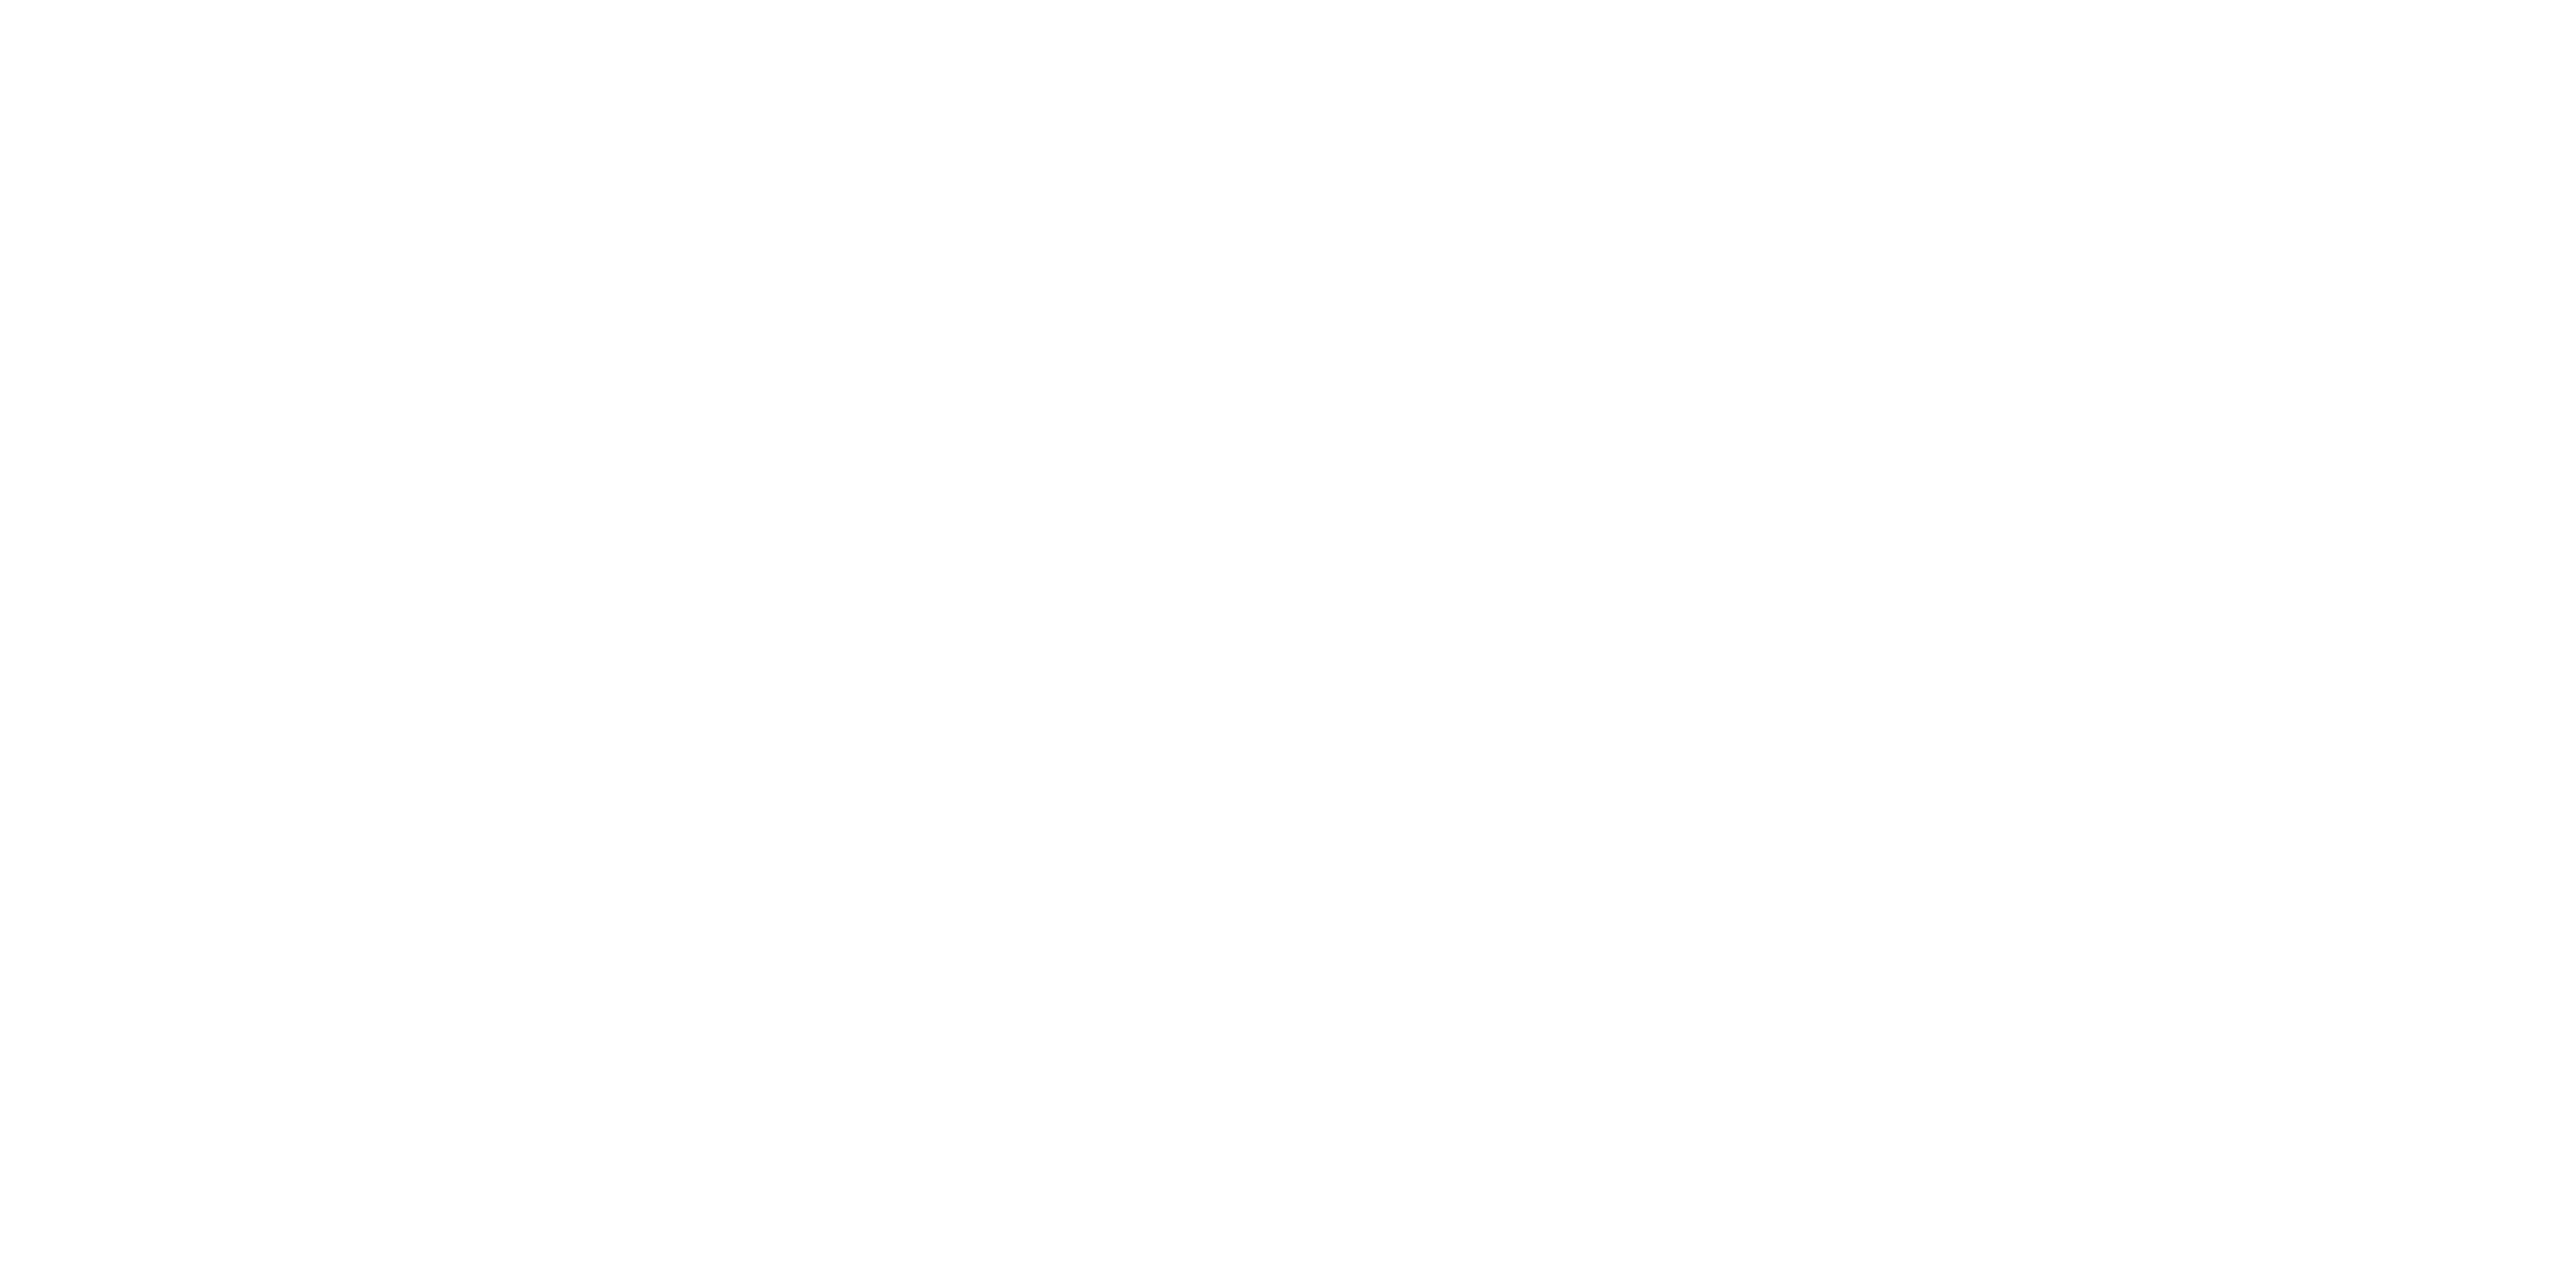

<IPython.core.display.Javascript object>


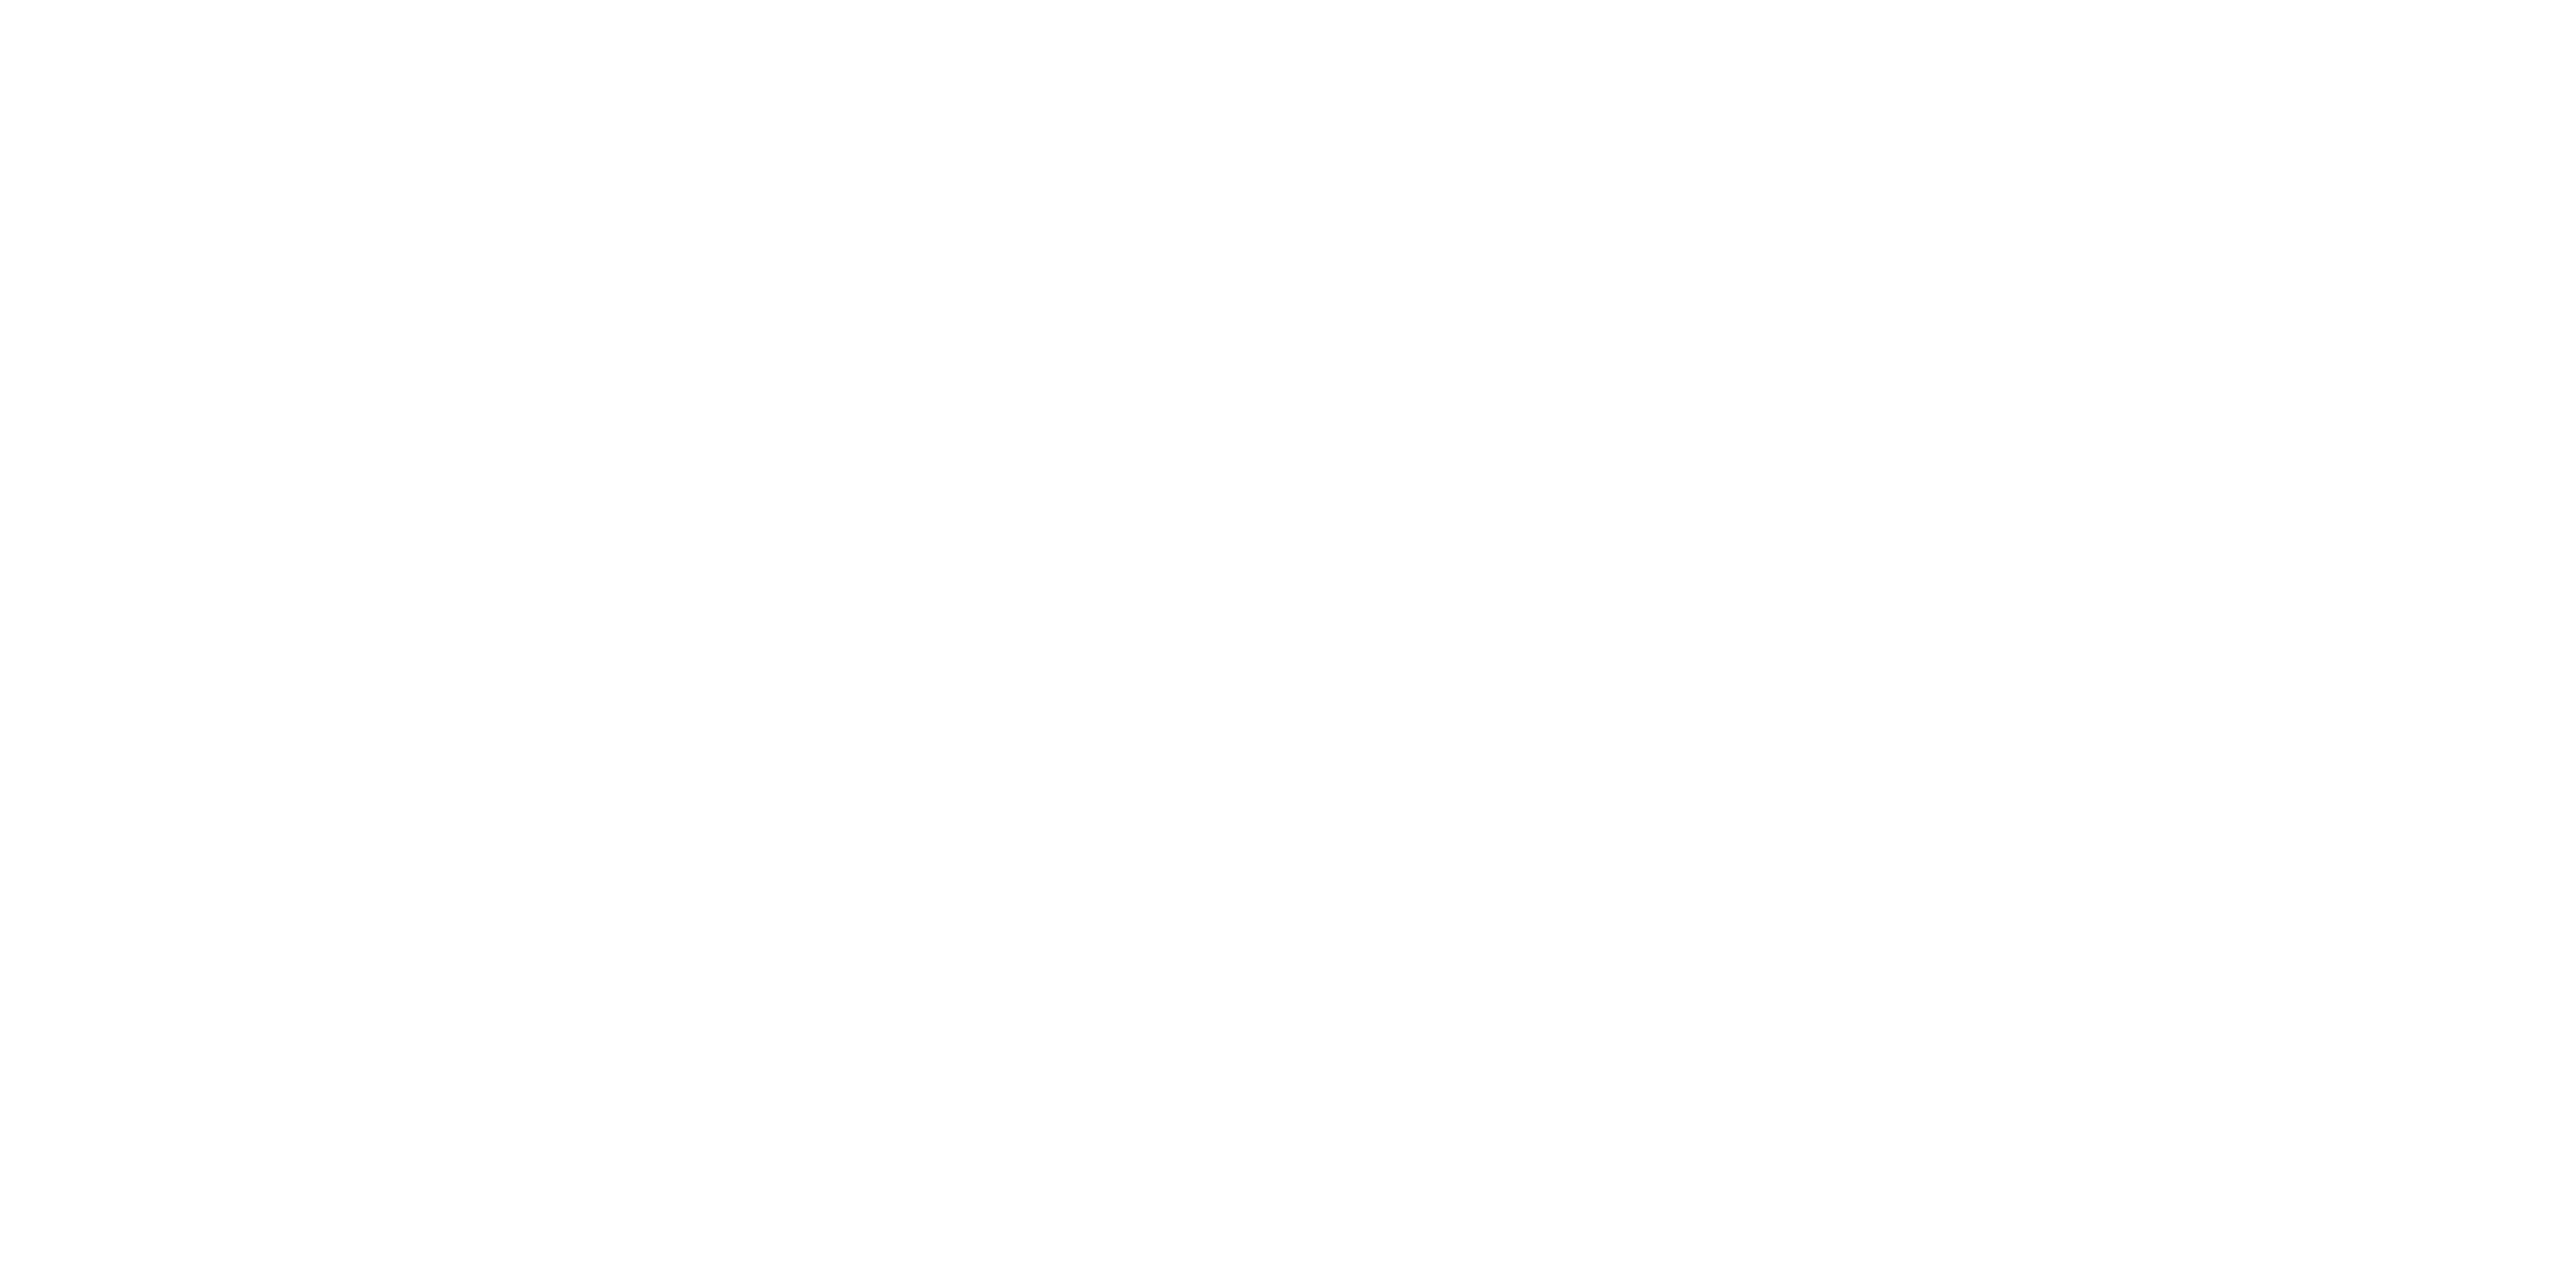

<IPython.core.display.Javascript object>


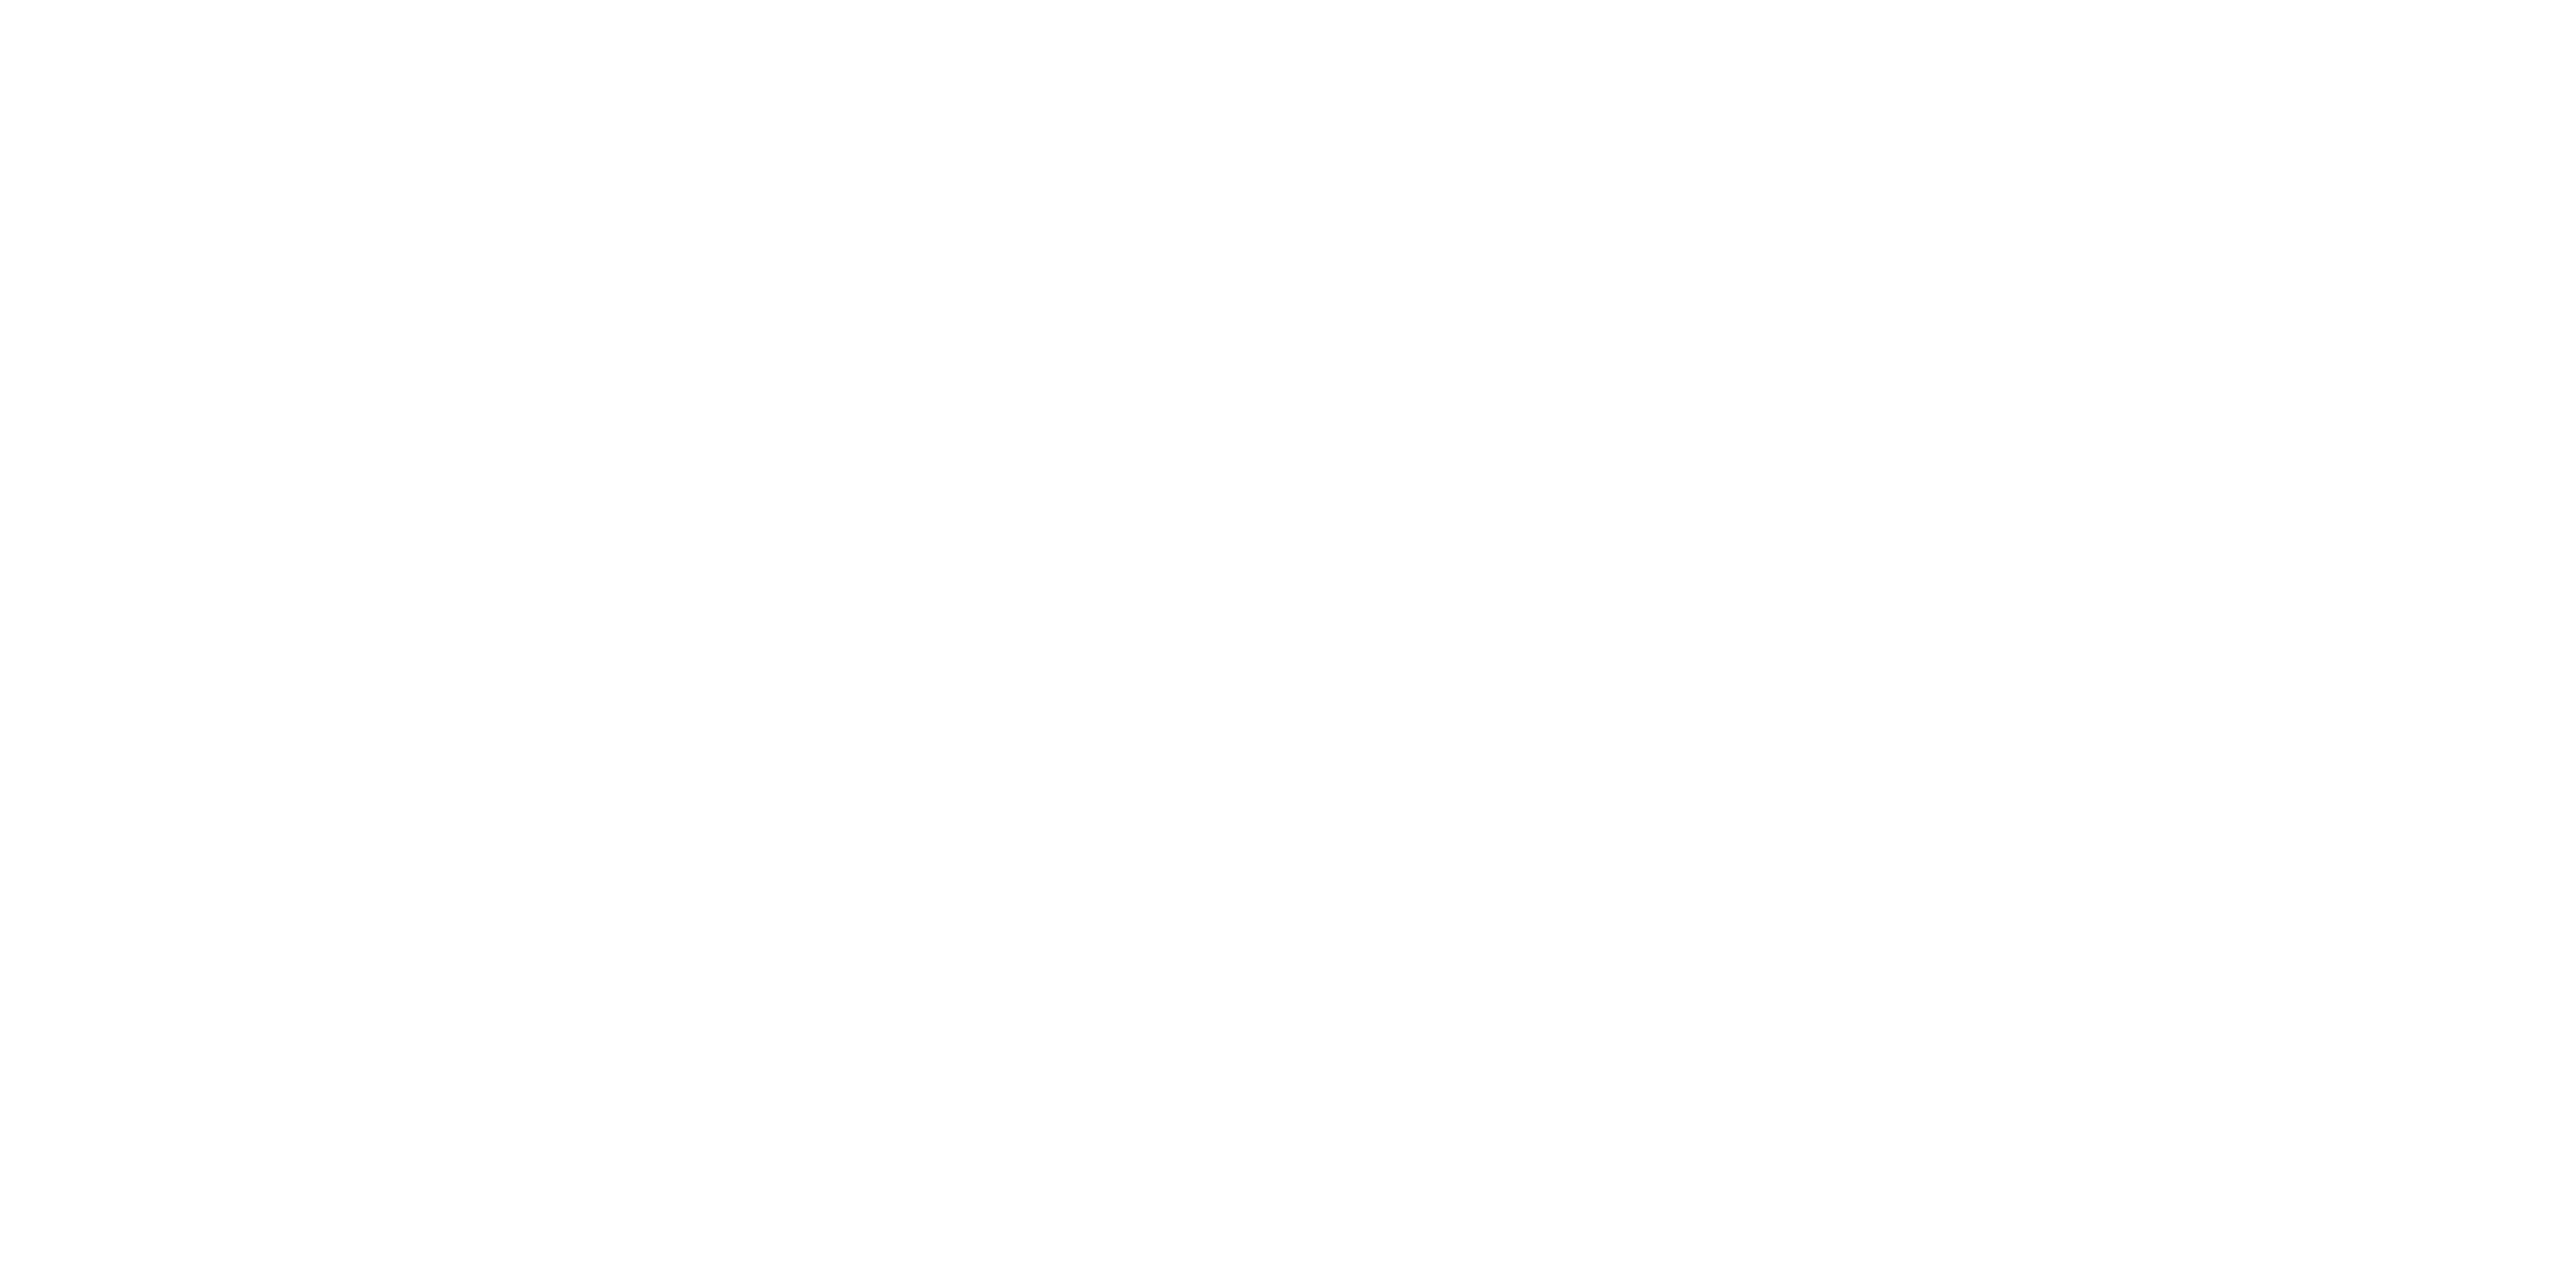

<IPython.core.display.Javascript object>


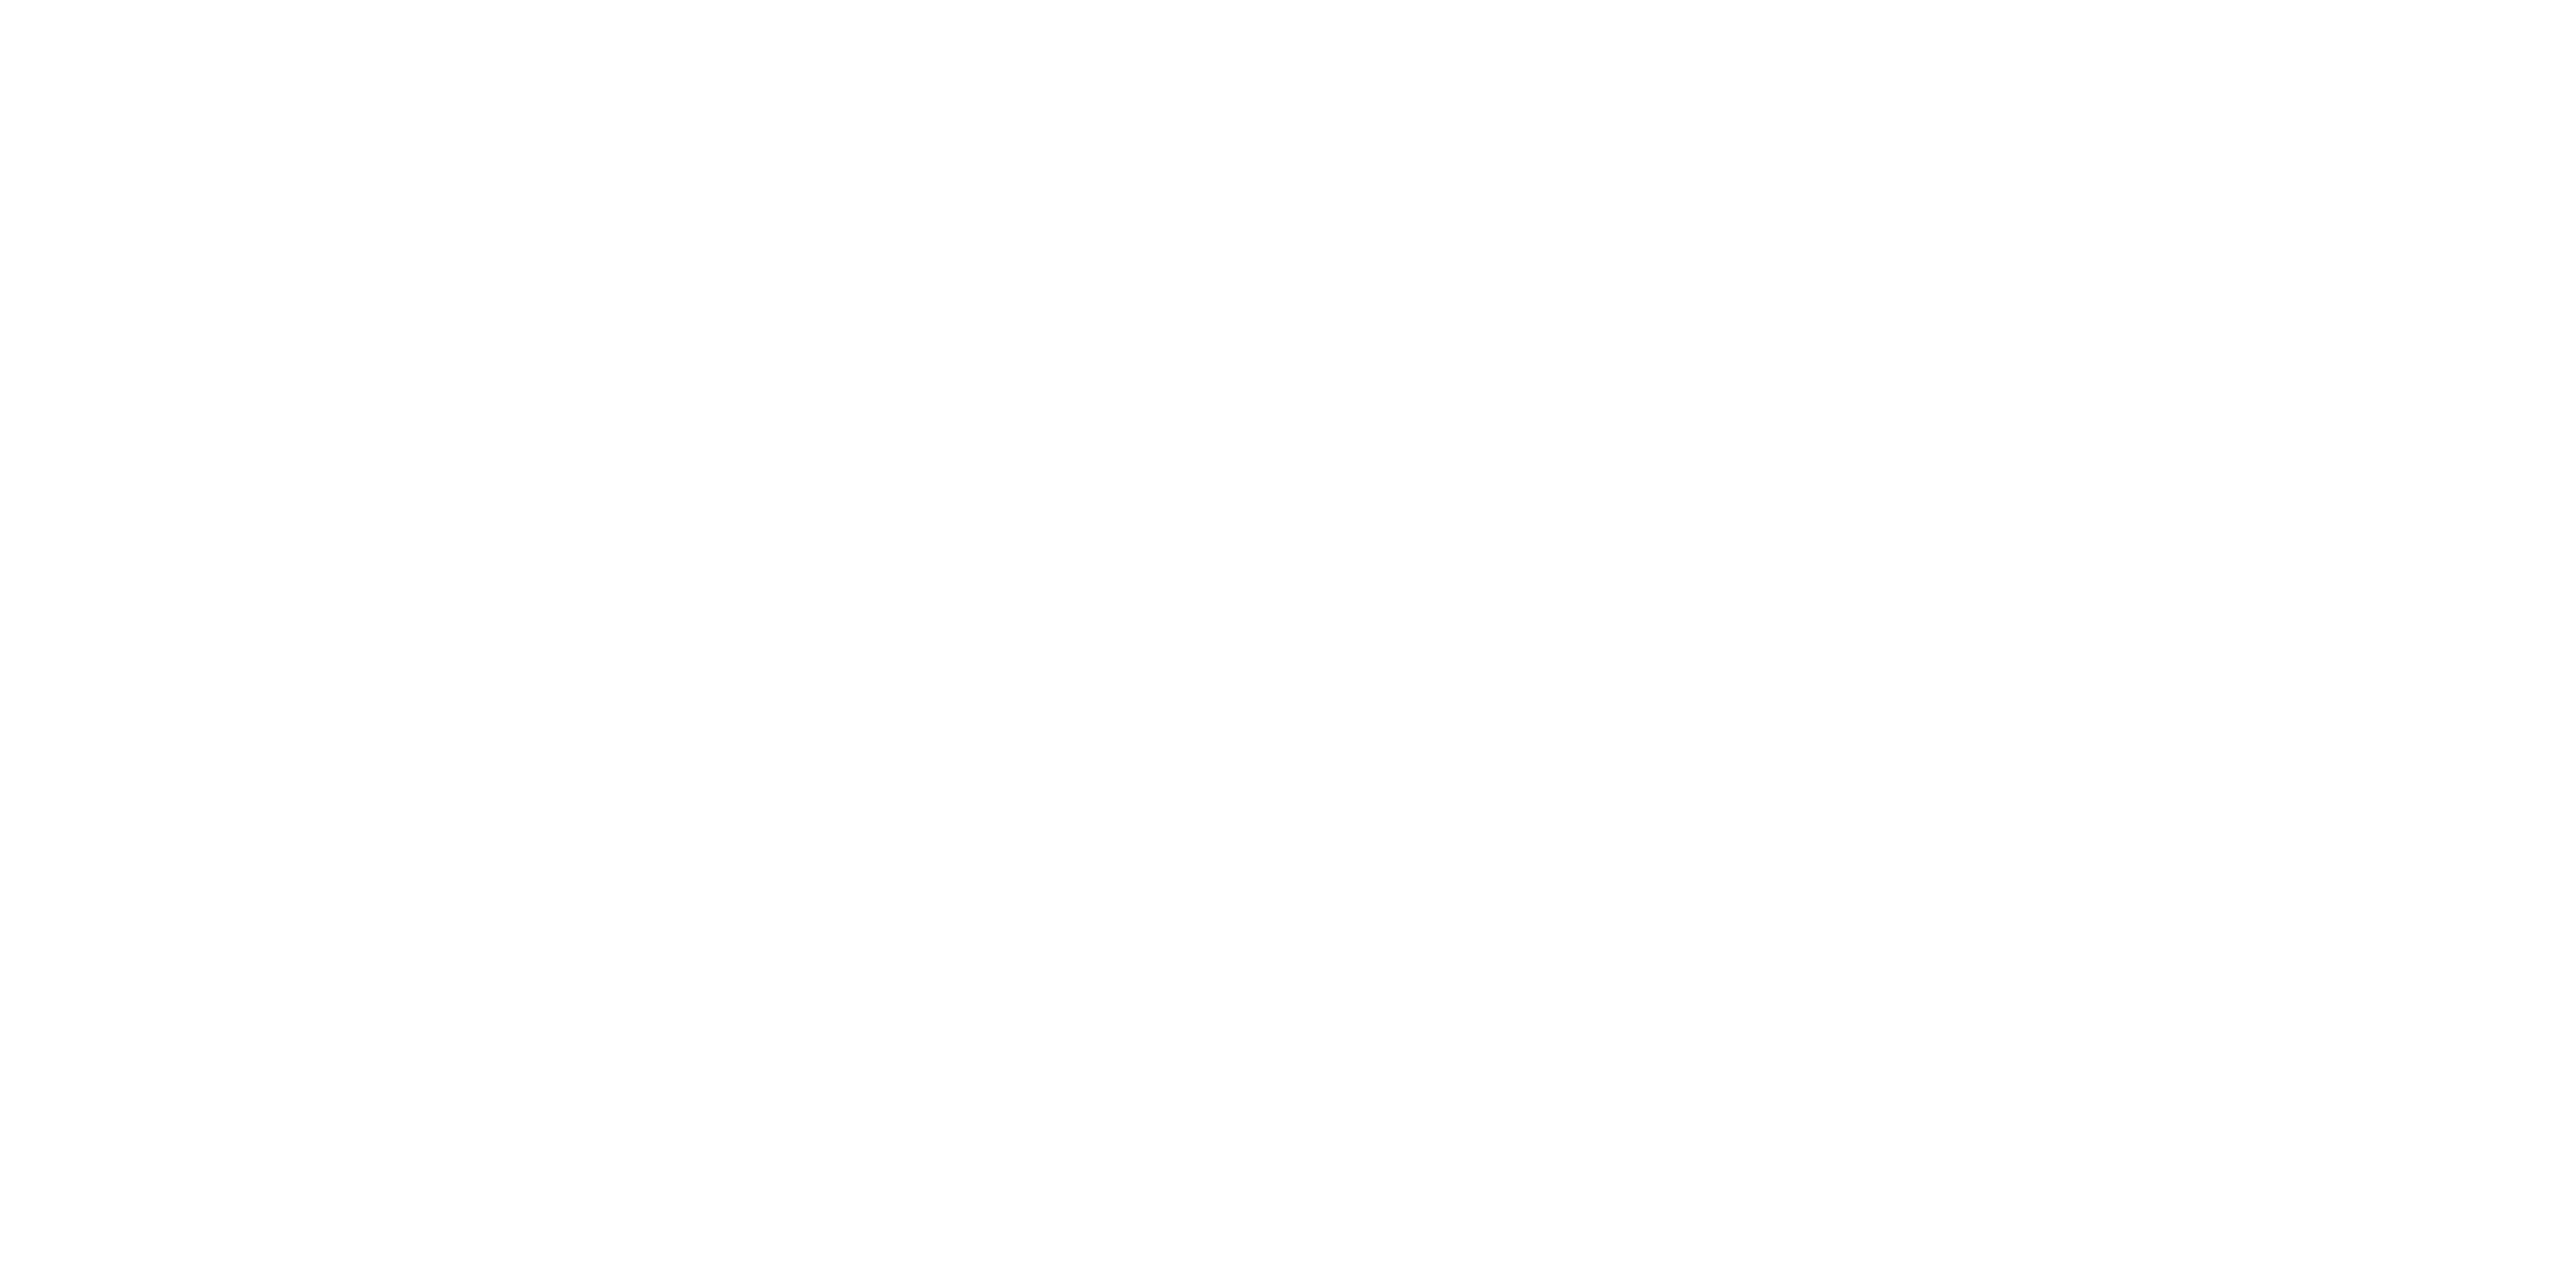

<IPython.core.display.Javascript object>


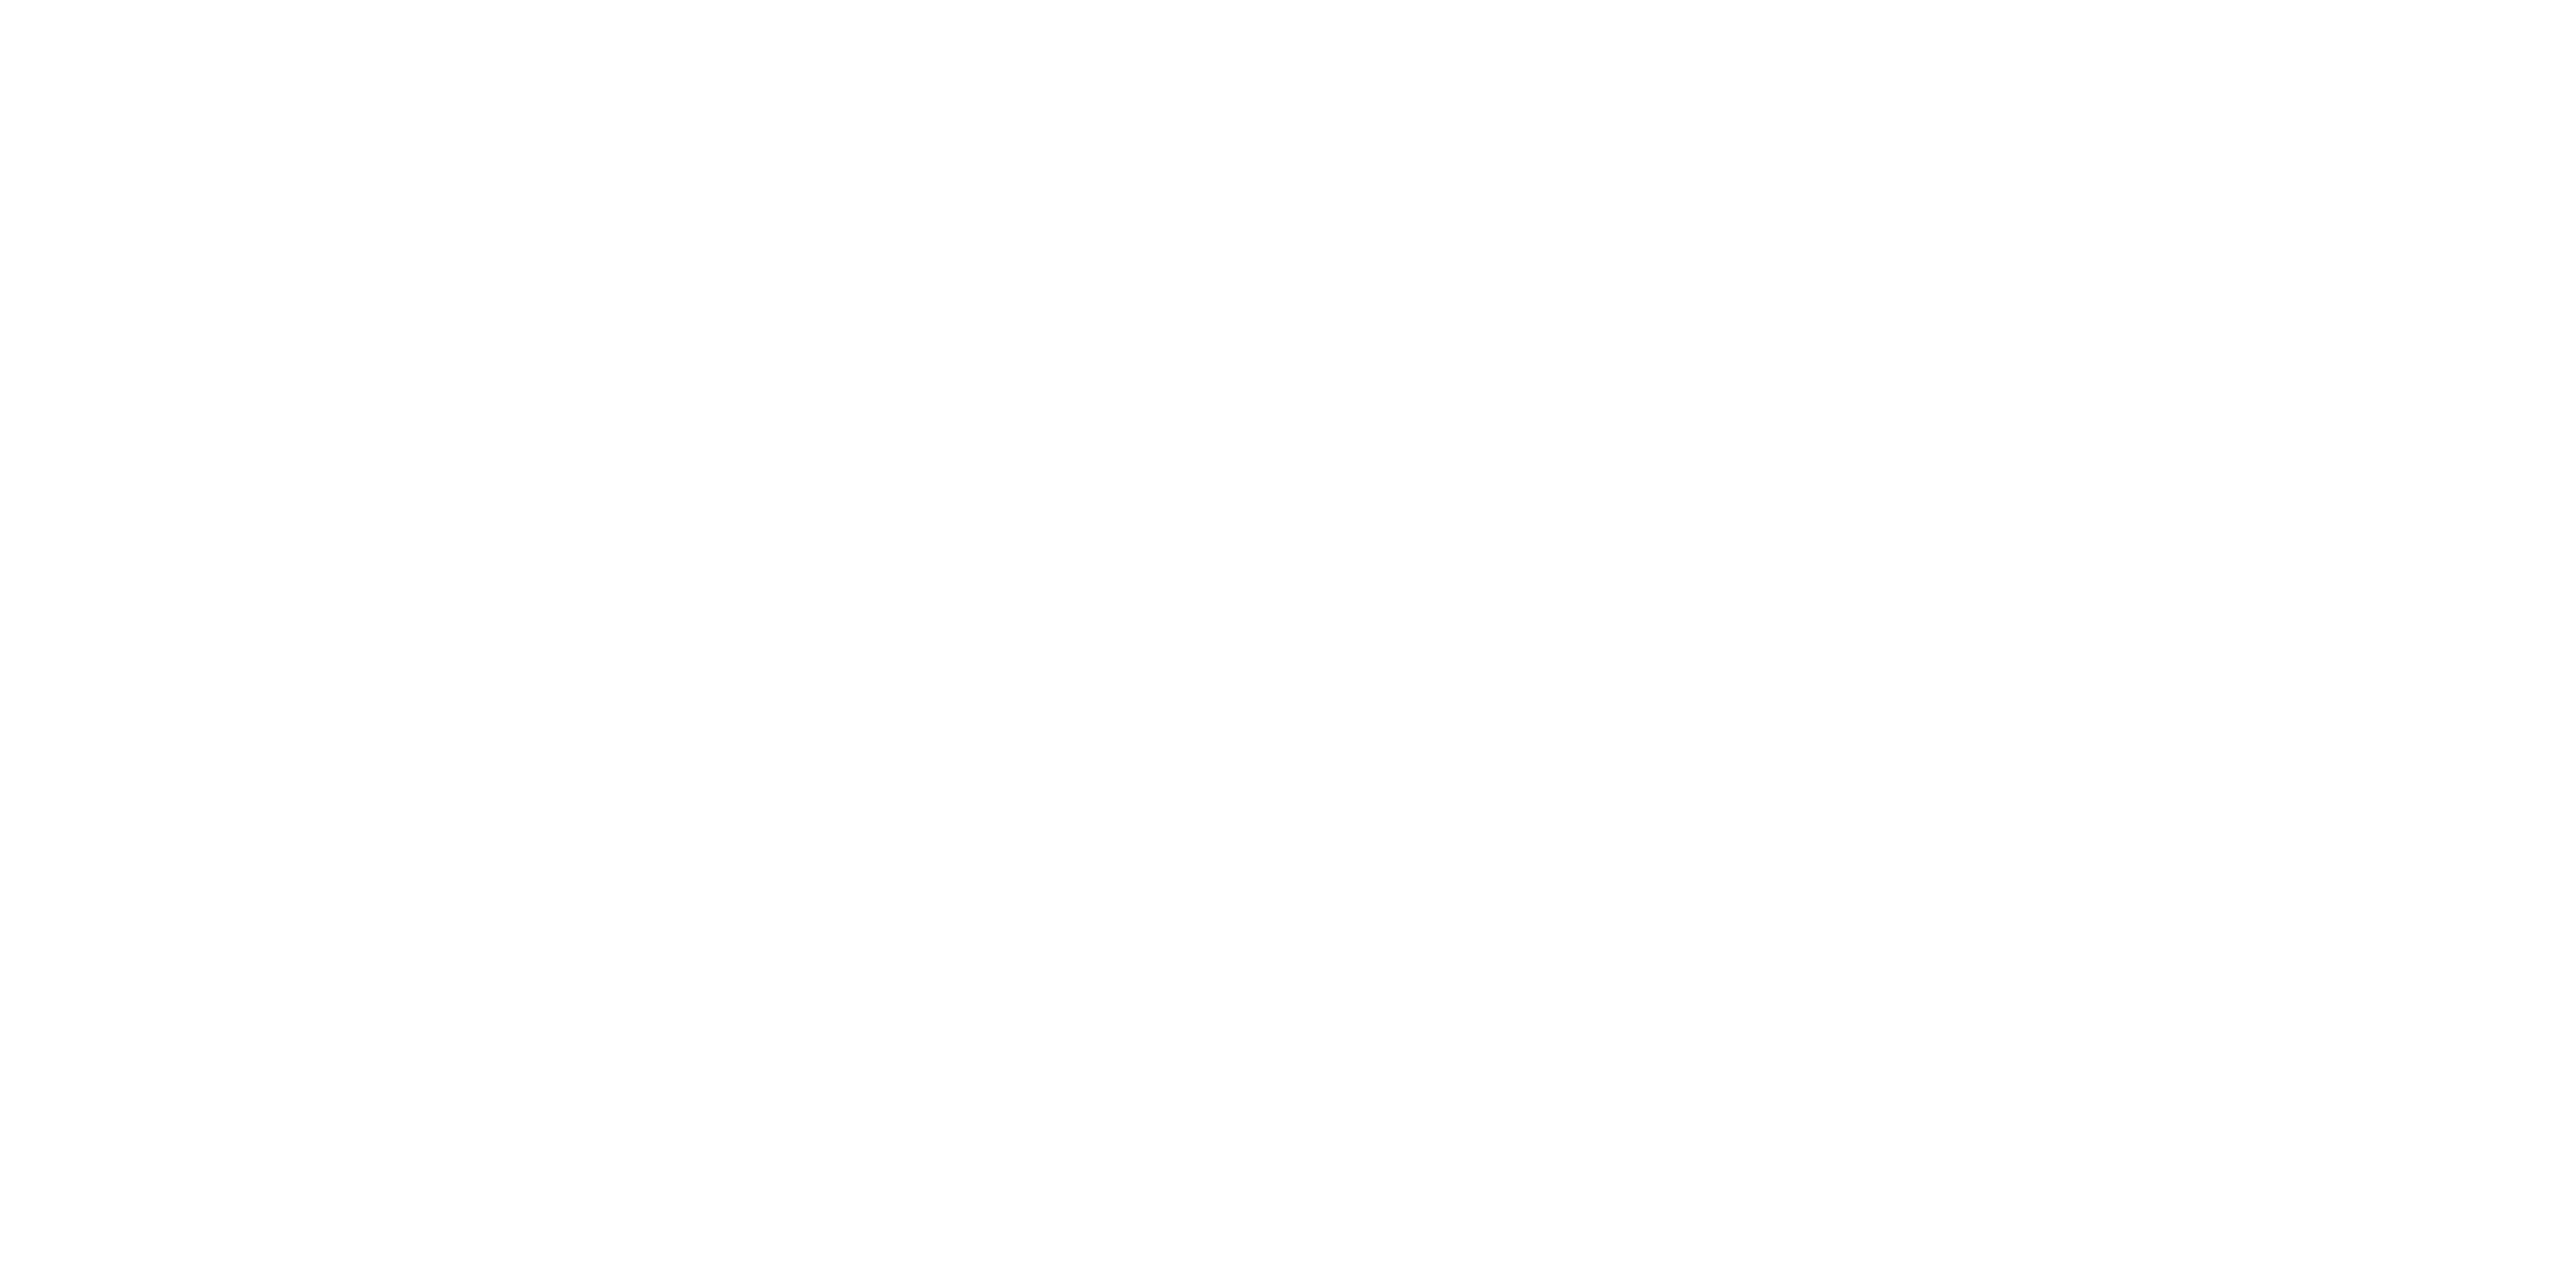

<IPython.core.display.Javascript object>


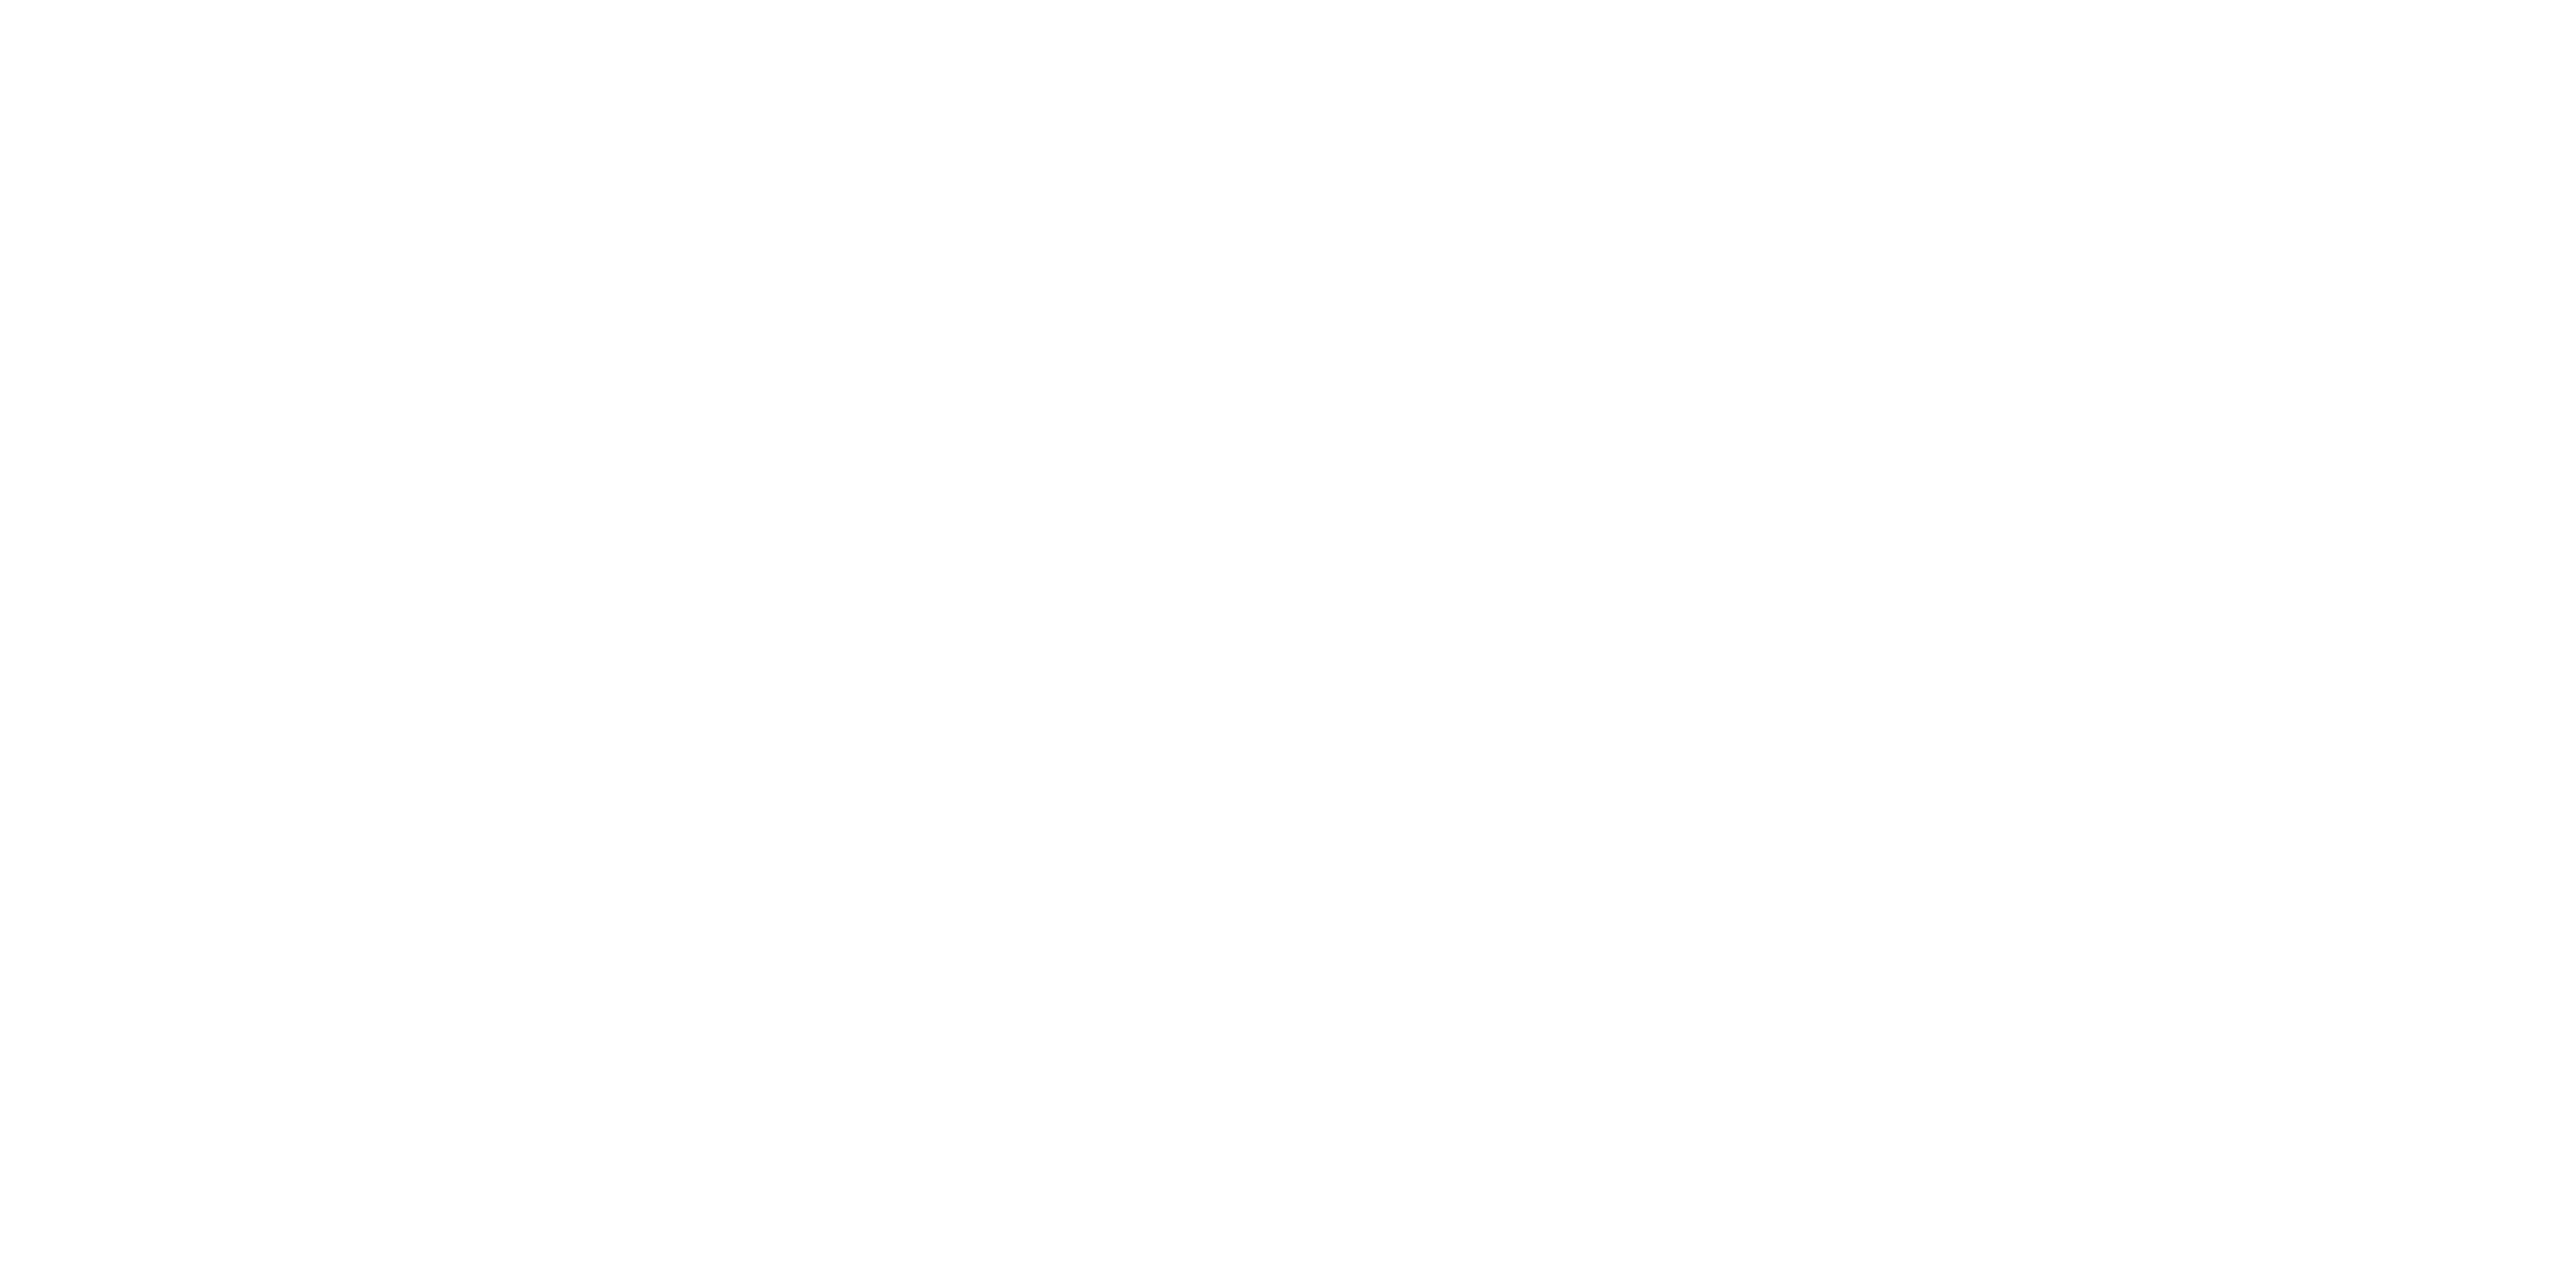

In [57]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = ('Sleep Duration', 'stress level', 'migraine index')
y_pos = np.arange(len(objects))
for i, row in dpd.loc[condition_dpd, :].iterrows() : 
    fig, axs = plt.subplots(1,figsize=(20, 10))
    performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
    axs.barh(y_pos,performance, alpha=1,align='center')
    axs.set_yticks(y_pos, objects)
#     plt.xticks(y_pos, objects)
#     axs.set_ylabel('Migraine')
#     axs.title('Programming language usage')
#     axs.show()

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


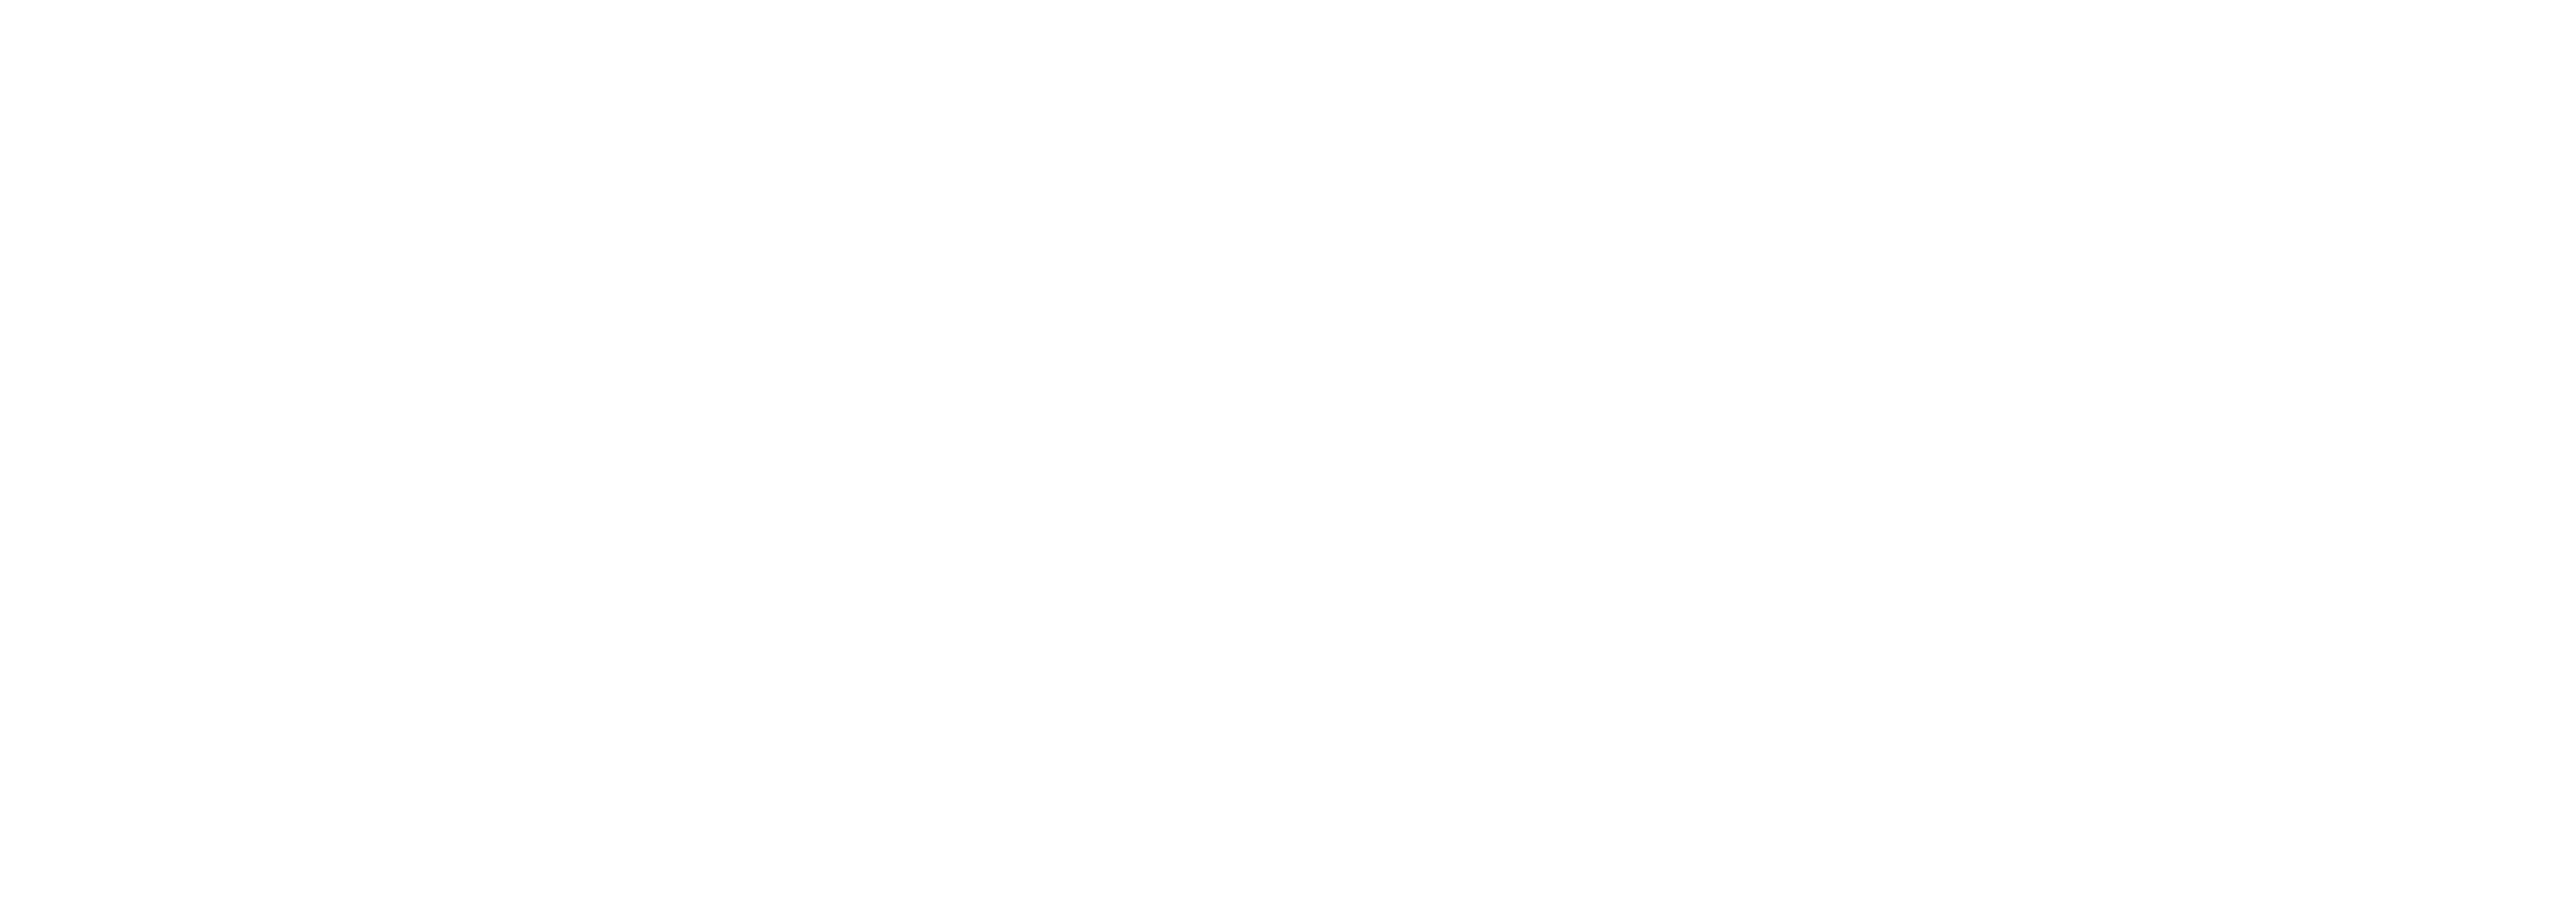

In [58]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
fig = plt.figure(figsize=(20, 7))
grid = plt.GridSpec(8, 4, wspace=0.2, hspace=0.2)
left_bar=plt.subplot(grid[3, 0])
x0=plt.subplot(grid[0, 1:3])
x1=plt.subplot(grid[1, 1:3])
x2=plt.subplot(grid[2, 1:3])
x3=plt.subplot(grid[3, 1:3])
x4=plt.subplot(grid[4, 1:3])
x5=plt.subplot(grid[5, 1:3])
x6=plt.subplot(grid[6, 1:3])
right_bar=plt.subplot(grid[3, 3])
right_bar.plot(x, y, 'ok', markersize=3, alpha=0.2)

x6.plot(x, y, 'ok', markersize=3, alpha=0.2)

left_bar.plot(x, y, 'ok', markersize=3, alpha=0.2)
# plt.subplot(grid[1, :3])
# plt.subplot(grid[1, 2]);

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


2017-04-05


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


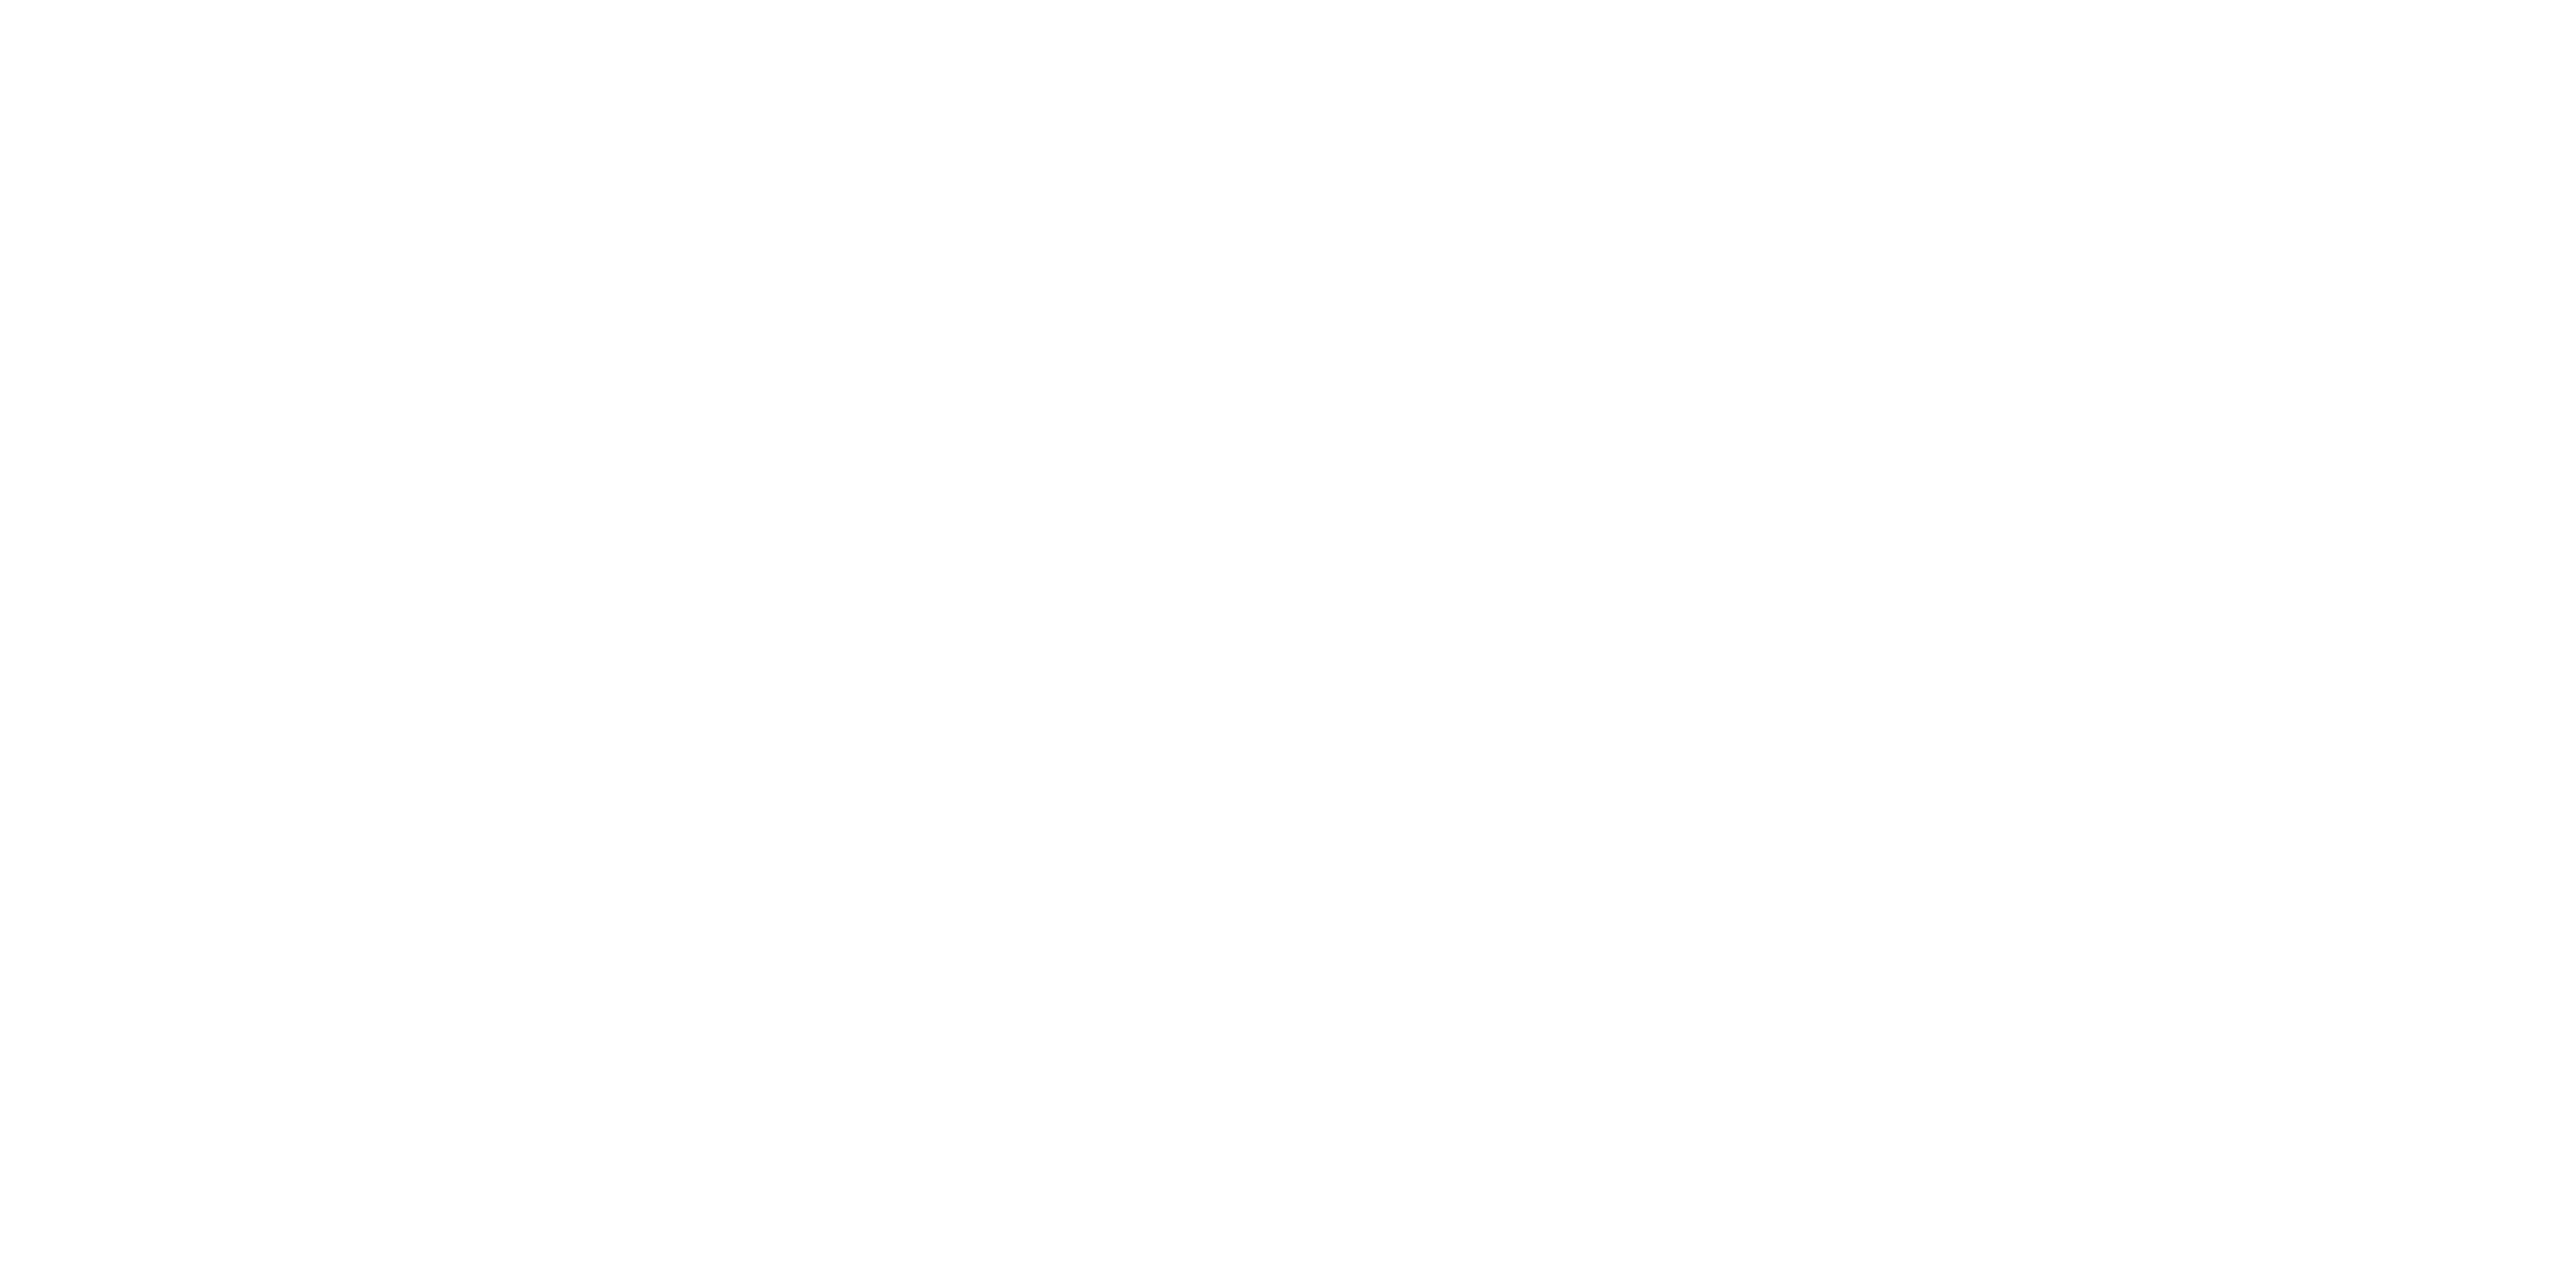

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


KeyboardInterrupt: 

In [61]:
#weather + stress leverl addition
for f in range(0,len(files)):
    df = pd.read_csv(files[f], index_col=0, parse_dates=[0])
    df_hrv = pd.read_csv(files_hrv[f], index_col=0, parse_dates=[0])
    newdata_hrv = df_hrv.sort_index()
    newdata1 = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
    newdata1 = newdata1.sort_index()
    newdata10=newdata1.resample('10t').mean()
    newdata=newdata1.resample('1T').mean()
    data=newdata1[['AccelX','AccelY','AccelZ']]
    features, steps, motion = computeAllAccelerometerFeatures(data, time_frames)
    data["steps"] = steps
    data["motion"] = motion
    condition_dpd = ( (dpd['MIGRAINESTART_TimeZone'].notnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )
#     newdata = newdata.drop_duplicates(subset=, keep='first')
    date=str(newdata.index[0].date())
    df_wthr=df_weather.loc[date]
    print(date)

    fig, axs = plt.subplots(ncols=2, nrows=9,figsize=(20, 10))
    gs = axs[1, 1].get_gridspec()
# remove the underlying axes

    axbig = fig.add_subplot(gs[3:4, 1])
    axbig = fig.add_subplot(gs[3:4, 1])
    objects = ('Sleep Duration', 'stress level', 'migraine index')
    y_pos = np.arange(len(objects))
    performance = [int(dpd['SLEEPDURATIONHOURS'][3]),int(dpd['MIGRAINESEVERITY'][3]),int(dpd['SLEEPQUALITY'][3])]
    axbig.bar(y_pos,performance, alpha=1,align='center')
    axbig.set_xticks(y_pos, objects)
    fig.suptitle('Sensor Data Plots '+date) 
    y_pos = np.arange(len(objects))
    if date in dpd.index:
        row=dpd.loc[date]
        performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
        axbig.bar(y_pos,performance, alpha=1,align='center')
        axbig.set_xticks(y_pos, objects)
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
        
    
        if (date in date_extra): 
            #extrapolated date time
#         print('extrapolated date time')
            for ax in axs[0:,0]:
                ax.axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
                ax.axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'blue', alpha = 0.15)
                ax.axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                ax.axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
        else:
#             print('real date time')
            for ax in axs[0:,0]:
                ax.axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

                ax.axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
                ax.axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                ax.axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
    
    axs[0][0].plot(newdata10.index, newdata10['Temp'],label='Body Temperature')
    #                axs[1].plot(peaks.index,peaks['peaks_plot'],'#4DBD33')
    axs[1][0].plot(newdata1.index,5*newdata1['peaks_plot'],'#4DBD33')
    axs[1][0].plot(newdata.index, newdata['filtered_eda'],label='Phasic')
    axs[1][0].plot(newdata.index,newdata['tonic'],label='Tonic')
    axs[2][0].plot(newdata.index, newdata['AccelX'],newdata.index, newdata['AccelY'],newdata.index, newdata['AccelZ'])
    axs[3][0].plot(data.index, (3*data['steps']),data.index, data['motion'])
    axs[4][0].plot(newdata_hrv.index, newdata_hrv['IBI'])
    axs[5][0].plot(newdata_hrv.index, newdata_hrv['HRV'])
    axs[8][0].plot(df_wthr.index, df_wthr['apparentTemperature'],label='Atmospheric Temperature')
    axs[6][0].plot(df_wthr.index, df_wthr['humidity'],label='Humidity')
    axs[7][0].plot(df_wthr.index, df_wthr['pressure'],label='Pressure')
    axs[6][0].plot(df_wthr.index, df_wthr['cloudCover'],label='Cloud Cover')
    
    
#     plt.legend()
    axs[0][0].legend(fontsize='xx-small')
    axs[1][0].legend(fontsize='xx-small')
    axs[2][0].legend(fontsize='xx-small')
    axs[3][0].legend(fontsize='xx-small')
    axs[4][0].legend(fontsize='xx-small')
    axs[5][0].legend(fontsize='xx-small')
    axs[6][0].legend(fontsize='xx-small')
    axs[7][0].legend(fontsize='xx-small')
    #            plt.xticks( rotation=25 )
    axs[0][0].set_ylabel('Temperature',fontsize='x-small')
#     axs[0].set_ylim (24 ,50)
    axs[1][0].set_ylabel('EDA',fontsize='x-small')
    data_min = min(newdata['EDA'])
    data_max =5
    axs[1][0].set_ylim(data_min ,data_max)
    axs[2][0].set_ylabel('Accelerometer',fontsize='x-small')
    axs[3][0].set_ylabel('Motion/Steps',fontsize='x-small')
    axs[4][0].set_ylabel('IBI',fontsize='x-small')
    axs[5][0].set_ylabel('HRV',fontsize='x-small')
    axs[8][0].set_ylabel('Temperature',fontsize='x-small')
    axs[6][0].set_ylabel('Hum & CC',fontsize='x-small')
    axs[7][0].set_ylabel('Pressure',fontsize='x-small')
#     axs[8].set_ylabel('CloudCover')
    axs[8][0].set_xlabel('Time',fontsize='x-small')
    for ax in axs[0:,1]:
        
        ax.remove()
    for ax in axs[0:,0]:
        
        ax.set_xticklabels([])
    
    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs[0:,0]:
       ax.label_outer()
       hours = mdates.HourLocator(interval = 6)
       h_fmt = mdates.DateFormatter('%I:%M %p')
       ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
       #     ax.set_xlim(["00:00:00", "23:59:59"])
       xax = ax.get_xaxis()
       xax.set_major_locator(hours)
       xax.set_major_formatter(h_fmt)
       xax.set_minor_locator(mdates.HourLocator(interval = 1))
       xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
       xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/test/'+date+".png",bbox_inches="tight",dpi = 300)
#     plt.close()
#     axs1.savefig('subplots_sensordata/ '+date+"-da3.png",bbox_inches="tight",dpi = 900)
        

In [ ]:
df_weather

In [62]:
df_weather['Gradienthumidity_12'] = np.gradient(df_weather['humidity'].rolling(center=False,window=12).mean())

In [63]:
df_weather['GradientcloudCover_12'] = np.gradient(df_weather['cloudCover'].rolling(center=False,window=12).mean())

In [64]:
df_weather['GradientTemp_12'] = np.gradient(df_weather['apparentTemperature'].rolling(center=False,window=12).mean())

In [65]:
df_weather['Gradienthumidity_24'] = np.gradient(df_weather['humidity'].rolling(center=False,window=24).mean())
df_weather['GradientcloudCover_24'] = np.gradient(df_weather['cloudCover'].rolling(center=False,window=24).mean())
df_weather['GradientTemp_24'] = np.gradient(df_weather['apparentTemperature'].rolling(center=False,window=24).mean())

In [66]:
df_weather['Gradienthumidity_6'] = np.gradient(df_weather['humidity'].rolling(center=False,window=6).mean())
df_weather['GradientcloudCover_6'] = np.gradient(df_weather['cloudCover'].rolling(center=False,window=6).mean())
# df_weather['GradientTemp_1'] = np.gradient(df_weather['apparentTemperature'])


In [67]:
df_weather['deltaTemp_1'] = df_weather.apparentTemperature.diff().fillna(0).astype(float)
df_weather['deltahumidity_1'] = df_weather.humidity.diff().fillna(0).astype(float)
df_weather['deltacloudCover_1'] = df_weather.cloudCover.diff().fillna(0).astype(float)
df_weather['delta_pressure'] = df_weather.pressure.diff().fillna(0).astype(float)

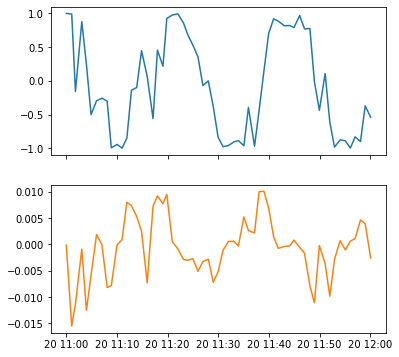

In [68]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# Base time series
base_t = pd.date_range("2017-07-20 11:00", "2017-07-20 12:00", freq="T")

# We add some random noise to achieve non uniform spacing
t = base_t + pd.to_timedelta(5 * np.random.randn(len(base_t)), unit='s')
assert t.is_monotonic_increasing

# Extract numerical values
values = (t - t[0]).total_seconds()

# My function
y = pd.Series(np.cos(0.1 * values))

# Derivative! Requires NumPy >= 1.13
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html#numpy.gradient
dy = np.gradient(y, values)

# Plotting
fig, ax = plt.subplots(2, sharex=True, figsize=(6, 6))

ax[0].plot(t, y)
ax[1].plot(t, dy, color="C1")

In [ ]:
df_weather.loc['2017-04-17']['GradientTemp']

In [ ]:
df_weather.loc['2017-04-17']['apparentTemperature']

In [ ]:
df_weather['GradientTemp_1'] = df_weather.apparentTemperature.diff().fillna(0).astype(float)
df_weather.loc['2017-04-17']['GradientTemp_1']

df_weather['GradientTemp_1'] =df_weather.apparentTemperature.rolling('3601s').apply(lambda x: x[-1] - x[0]) / 2

In [ ]:
df_weather['GradientTemp_1']

In [ ]:
objects = ('Sleep', 'stress', 'migraine')
x_pos = np.arange(3)
for i, row in dpd.loc[condition_dpd, :].iterrows() :     
    fig, axs = plt.subplots(2,figsize=(20, 10))
    performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
    # dpd['MIGRAINESEVERITY'][0] 
    
    plt.bar(x_pos,performance, alpha=1,align='center')
#     ax.set_yticks(x_pos)
    plt.xticks(x_pos, ('Sleep Duration', 'Stress Level', 'Migraine'))
#     ax.set_yticklabels(objects) 
#     axs.set_yticks(y_pos, objects)
    
#     axs.set_ylabel('Usage')
#     axs.set_title('Programming language usage')

In [ ]:
dpd=dpd.set_index('dt_diary')

In [ ]:
date

In [ ]:
'2017-04-21' in dpd.index
# dpd.loc['2017-04-05']

In [ ]:
cnd=(row1['SLEEPDURATIONHOURS'].notnull() & row1['MIGRAINESEVERITY'].notnull() & row1['SLEEPQUALITY'].notnull())

In [ ]:
dpd['SLEEPDURATIONHOURS'] = dpd['SLEEPDURATIONHOURS'].fillna(0)
dpd['MIGRAINESEVERITY'] = dpd['MIGRAINESEVERITY'].fillna(0)
dpd['SLEEPQUALITY'] = dpd['SLEEPQUALITY'].fillna(0)

In [ ]:
#testing weather data and derivatives
for f in range(0,len(files)):
    fig = plt.figure(figsize=(20, 7))
    grid = plt.GridSpec(8, 4, wspace=0.2, hspace=0.2)
    left_bar=plt.subplot(grid[3, 0])
    x0=plt.subplot(grid[0, 1:3])
    x1=plt.subplot(grid[1, 1:3])
    x2=plt.subplot(grid[2, 1:3])
    x3=plt.subplot(grid[3, 1:3])
    x4=plt.subplot(grid[4, 1:3])
    x5=plt.subplot(grid[5, 1:3])
    x6=plt.subplot(grid[6, 1:3])
    x7=plt.subplot(grid[7, 1:3])
    right_bar=plt.subplot(grid[3, 3])
    right_bar.plot(x, y, 'ok', markersize=3, alpha=0.2)
    df = pd.read_csv(files[f], index_col=0, parse_dates=[0])
    date=str(df.index[0].date())
    df_wthr=df_weather.loc[date]
    fig.suptitle('Sensor Data Plots '+date) 
    objects = ('Sleep', 'stress', 'migraine')
    y_pos = np.arange(len(objects))
    x_pos = np.arange(3)
    if date in dpd.index:
        
        row1=dpd.loc[date]    
        if(len(row1)<2):
            performance = [int(row1['SLEEPDURATIONHOURS']),int(row1['MIGRAINESEVERITY']),int(row1['SLEEPQUALITY'])]
            # dpd['MIGRAINESEVERITY'][0] 
            left_bar.bar(x_pos,performance, alpha=1,align='center')
            #     ax.set_yticks(x_pos)
            left_bar.xticks(x_pos, ('Sleep Duration', 'Stress Level', 'Migraine'))
            right_bar.bar(x_pos,performance, alpha=1,align='center')
            #     ax.set_yticks(x_pos)
            right_bar.xticks(x_pos, ('Sleep Duration', 'Stress Level', 'Migraine'))
#     for i, row in dpd.loc[condition_dpd, :].iterrows() :         
# #         performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
# #         axs[9].set_yticks(y_pos, objects)
# #         axs[9].ylabel('Usage')
# #         axs[9].title('Programming language usage')
#     #print(t)
# #         print(row['dt_diary'].date() + 'while date looping is '+date )
# #         if(date==str(row['dt_diary'].date())):
#         if (date in date_extra): 
#             #extrapolated date time
# #         print('extrapolated date time')
#             for i in range(8):
#                 axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
#                 #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
#                 axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'blue', alpha = 0.15)
#                 axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
#                 axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
#         else:
# #             print('real date time')
#             for i in range(8):
#                 axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
#                 #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

#                 axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
#                 axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
#                 axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
    
    x0.plot(df_wthr.index, df_wthr['apparentTemperature'],label='Atmospheric Temperature')
    x1.plot(df_wthr.index, df_wthr['humidity'],label='Humidity')
    x2.plot(df_wthr.index, df_wthr['pressure'],label='Pressure')
    x3.plot(df_wthr.index, df_wthr['cloudCover'],label='Cloud Cover')
    x4.plot(df_wthr.index, df_wthr['deltaTemp_1'],label='Delta Temperature')
    x5.plot(df_wthr.index, df_wthr['deltahumidity_1'],label='Delta Humidity')
    x6.plot(df_wthr.index, df_wthr['delta_pressure'],label='Delta Pressure')
    x7.plot(df_wthr.index, df_wthr['deltacloudCover_1'],label='Delta Cloud Cover')
    
#     axs[8].plot(df_wthr.index, df_wthr['GradientcloudCover_24'],label='Delta Cloud Cover 24')
#     axs[7].plot(df_wthr.index, df_wthr['GradientcloudCover'],label='Delta Cloud Cover')
    
    
#     plt.legend()
    x0.legend(fontsize='xx-small')
    x1.legend(fontsize='xx-small')
    x2.legend(fontsize='xx-small')
    x3.legend(fontsize='xx-small')
    x4.legend(fontsize='xx-small')
    x5.legend(fontsize='xx-small')
    x6.legend(fontsize='xx-small')
    x7.legend(fontsize='xx-small')
    #            plt.xticks( rotation=25 )
#     axs[0].set_ylabel('Temperature',fontsize='x-small')
# #     axs[0].set_ylim(24 ,50)
#     axs[1].set_ylabel('EDA',fontsize='x-small')
#     data_min = min(newdata['EDA'])
#     data_max =5
#     axs[1].set_ylim(data_min ,data_max)
#     axs[2].set_ylabel('Accelerometer',fontsize='x-small')
#     axs[3].set_ylabel('Motion/Steps',fontsize='x-small')
#     axs[4].set_ylabel('IBI',fontsize='x-small')
#     axs[5].set_ylabel('HRV',fontsize='x-small')
#     axs[8].set_ylabel('Temperature',fontsize='x-small')
#     axs[6].set_ylabel('Hum & CC',fontsize='x-small')
#     axs[7].set_ylabel('Pressure',fontsize='x-small')
# #     axs[8].set_ylabel('CloudCover')
    x0.set_xlabel('Time',fontsize='x-small')

    # Hide x labels and tick labels for all but bottom plot.
#     for ax in axs:
#        ax.label_outer()
#        hours = mdates.HourLocator(interval = 6)
#        h_fmt = mdates.DateFormatter('%I:%M %p')
#     #        ax.xaxis.set_minor_locator(minutes)
#     #        ax.xaxis.set_major_locator(hours)
#     #        ax.xaxis.set_major_formatter(h_fmt)
#        # set date ticks to something sensible:
#        ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
#        #     ax.set_xlim(["00:00:00", "23:59:59"])
#        xax = ax.get_xaxis()
#        xax.set_major_locator(hours)
#        xax.set_major_formatter(h_fmt)
#        xax.set_minor_locator(mdates.HourLocator(interval = 1))
#        xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
#        xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/weatherdataplots/delta_bar/'+date+".png",bbox_inches="tight",dpi = 300)


In [ ]:
#testing weather data and derivatives
for f in range(0,len(files)):
#     io.StringIO(df.to_csv()), index_col=0
#     pd.read_csv(io.StringIO(f),index_col=0)
    df = pd.read_csv(files[f], index_col=0, parse_dates=[0])
    date=str(df.index[0].date())
    df_wthr=df_weather.loc[date]
    fig, axs = plt.subplots(9,figsize=(20, 10),sharex = False, sharey = False,gridspec_kw={'hspace': 0})
    fig.suptitle('Sensor Data Plots '+date) 
    objects = ('Sleep', 'stress', 'migraine')
    y_pos = np.arange(len(objects))
    x_pos = np.arange(3)
    if date in dpd.index:
        
        row1=dpd.loc[date]    
        if(len(row1)<2):
            performance = [int(row1['SLEEPDURATIONHOURS']),int(row1['MIGRAINESEVERITY']),int(row1['SLEEPQUALITY'])]
            # dpd['MIGRAINESEVERITY'][0] 
            plt.bar(x_pos,performance, alpha=1,align='center')
            #     ax.set_yticks(x_pos)
            plt.xticks(x_pos, ('Sleep Duration', 'Stress Level', 'Migraine'))
#     for i, row in dpd.loc[condition_dpd, :].iterrows() :         
# #         performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
# #         axs[9].set_yticks(y_pos, objects)
# #         axs[9].ylabel('Usage')
# #         axs[9].title('Programming language usage')
#     #print(t)
# #         print(row['dt_diary'].date() + 'while date looping is '+date )
# #         if(date==str(row['dt_diary'].date())):
#         if (date in date_extra): 
#             #extrapolated date time
# #         print('extrapolated date time')
#             for i in range(8):
#                 axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
#                 #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
#                 axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'blue', alpha = 0.15)
#                 axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
#                 axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
#         else:
# #             print('real date time')
#             for i in range(8):
#                 axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
#                 #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

#                 axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
#                 axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
#                 axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
    
    axs[0].plot(df_wthr.index, df_wthr['apparentTemperature'],label='Atmospheric Temperature')
    axs[1].plot(df_wthr.index, df_wthr['humidity'],label='Humidity')
    axs[2].plot(df_wthr.index, df_wthr['pressure'],label='Pressure')
    axs[3].plot(df_wthr.index, df_wthr['cloudCover'],label='Cloud Cover')
    axs[4].plot(df_wthr.index, df_wthr['deltaTemp_1'],label='Delta Temperature')
    axs[5].plot(df_wthr.index, df_wthr['deltahumidity_1'],label='Delta Humidity')
    axs[6].plot(df_wthr.index, df_wthr['delta_pressure'],label='Delta Pressure')
    axs[7].plot(df_wthr.index, df_wthr['deltacloudCover_1'],label='Delta Cloud Cover')
    
#     axs[8].plot(df_wthr.index, df_wthr['GradientcloudCover_24'],label='Delta Cloud Cover 24')
#     axs[7].plot(df_wthr.index, df_wthr['GradientcloudCover'],label='Delta Cloud Cover')
    
    
#     plt.legend()
    axs[0].legend(fontsize='xx-small')
    axs[1].legend(fontsize='xx-small')
    axs[2].legend(fontsize='xx-small')
    axs[3].legend(fontsize='xx-small')
    axs[4].legend(fontsize='xx-small')
    axs[5].legend(fontsize='xx-small')
    axs[6].legend(fontsize='xx-small')
    axs[7].legend(fontsize='xx-small')
    #            plt.xticks( rotation=25 )
#     axs[0].set_ylabel('Temperature',fontsize='x-small')
# #     axs[0].set_ylim(24 ,50)
#     axs[1].set_ylabel('EDA',fontsize='x-small')
#     data_min = min(newdata['EDA'])
#     data_max =5
#     axs[1].set_ylim(data_min ,data_max)
#     axs[2].set_ylabel('Accelerometer',fontsize='x-small')
#     axs[3].set_ylabel('Motion/Steps',fontsize='x-small')
#     axs[4].set_ylabel('IBI',fontsize='x-small')
#     axs[5].set_ylabel('HRV',fontsize='x-small')
#     axs[8].set_ylabel('Temperature',fontsize='x-small')
#     axs[6].set_ylabel('Hum & CC',fontsize='x-small')
#     axs[7].set_ylabel('Pressure',fontsize='x-small')
# #     axs[8].set_ylabel('CloudCover')
    axs[0].set_xlabel('Time',fontsize='x-small')

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
       ax.label_outer()
       hours = mdates.HourLocator(interval = 6)
       h_fmt = mdates.DateFormatter('%I:%M %p')
    #        ax.xaxis.set_minor_locator(minutes)
    #        ax.xaxis.set_major_locator(hours)
    #        ax.xaxis.set_major_formatter(h_fmt)
       # set date ticks to something sensible:
       ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
       #     ax.set_xlim(["00:00:00", "23:59:59"])
       xax = ax.get_xaxis()
       xax.set_major_locator(hours)
       xax.set_major_formatter(h_fmt)
       xax.set_minor_locator(mdates.HourLocator(interval = 1))
       xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
       xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/weatherdataplots/delta_bar/'+date+".png",bbox_inches="tight",dpi = 300)
    fig, axs = plt.subplots(9,figsize=(20, 10),sharex = False, sharey = False,gridspec_kw={'hspace': 0})

		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-05


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: Mean of empty slice


2017-04-06


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-04-07


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-12


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-13


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-04-14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-16


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-17


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-18


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-04-19


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-20


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-21


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-22


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-23


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-24


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-25


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-26


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-27


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-28


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017-04-29


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-04-30


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-01


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-02


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-03


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-05-04


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-05


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-05-06


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-07


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-05-08


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-09


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-10


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-11


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-05-12


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1


C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: Mean of empty slice
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

2017-05-13


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


		computing motion...
		computing steps...
		computing stillness...
0
		computing features for time frame. Start index: 0 end index: -1
2017-05-14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

C:\Users\Chisel-Lab\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


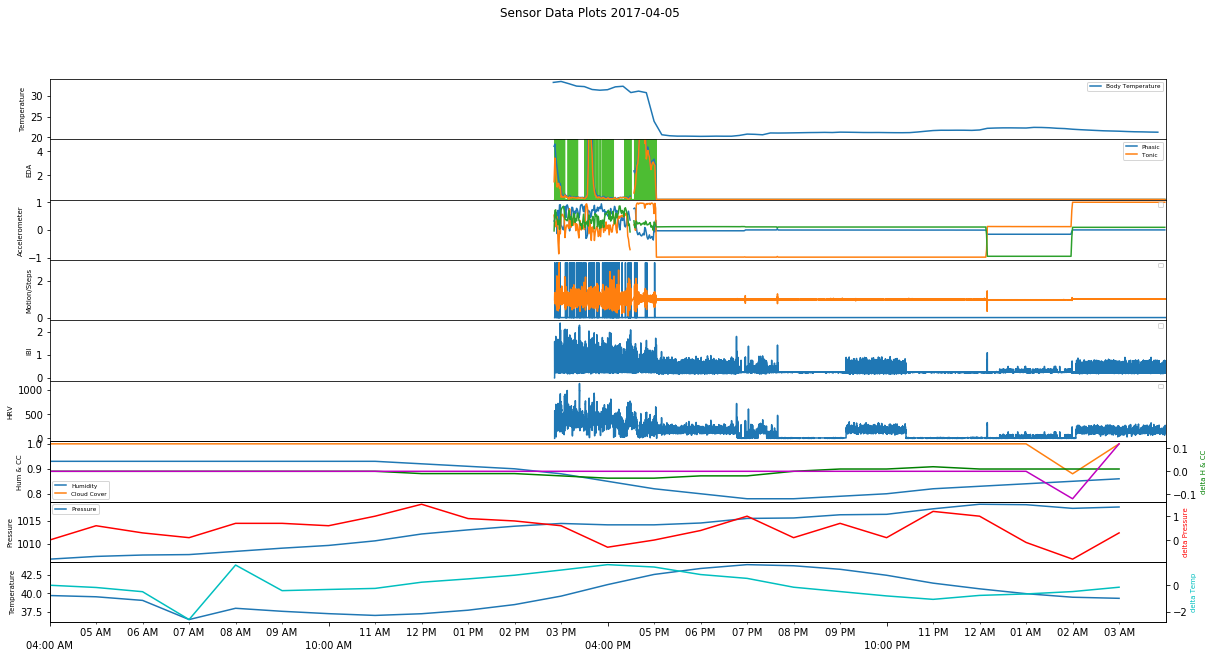

Error in callback <function flush_figures at 0x000002BCE1BC2730> (for post_execute):


KeyboardInterrupt: 

In [77]:
#adding IBI and HRV
for f in range(0,len(files)):
#     io.StringIO(df.to_csv()), index_col=0
#     pd.read_csv(io.StringIO(f),index_col=0)
    df = pd.read_csv(files[f], index_col=0, parse_dates=[0])
    df_hrv = pd.read_csv(files_hrv[f], index_col=0, parse_dates=[0])
#     df4 = df3.drop_duplicates(subset='rownum', keep='last')
#     newdata_hrv = df_hrv.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
    newdata_hrv = df_hrv.sort_index()
    newdata1 = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
    newdata1 = newdata1.sort_index()
    newdata10=newdata1.resample('10t').mean()
    newdata=newdata1.resample('1T').mean()
    data=newdata1[['AccelX','AccelY','AccelZ']]
    features, steps, motion = computeAllAccelerometerFeatures(data, time_frames)
    data["steps"] = steps
    data["motion"] = motion
    
    
    condition_dpd = ( (dpd['MIGRAINESTART_TimeZone'].notnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )
#     newdata = newdata.drop_duplicates(subset=, keep='first')
    date=str(newdata.index[0].date())
    df_wthr=df_weather.loc[date]
    print(date)
#     sfig_dpd01_2 = plt.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpd01_1, sharey = sfig_dpd01_1)
#     data = data.append(df)
    fig, axs = plt.subplots(9,figsize=(20, 10),sharex = True, sharey = False,gridspec_kw={'hspace': 0})
#     fig, axs1 = plt.subplots(1,figsize=(20, 7), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
    fig.suptitle('Sensor Data Plots '+date) 
    objects = ('Sleep Duration', 'stress level', 'migraine index')
    y_pos = np.arange(len(objects))
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
        
        performance = [int(row['SLEEPDURATIONHOURS']),int(row['MIGRAINESEVERITY']),int(row['SLEEPQUALITY'])]
        # dpd['MIGRAINESEVERITY'][0] 
#         axs[9].barh(y_pos,performance, alpha=1,align='center')
#         axs[9].set_yticks(y_pos, objects)
#         axs[9].xticks(y_pos, objects)
#         axs[9].ylabel('Usage')
#         axs[9].title('Programming language usage')
    #print(t)
#         print(row['dt_diary'].date() + 'while date looping is '+date )
#         if(date==str(row['dt_diary'].date())):
        if (date in date_extra): 
            #extrapolated date time
#         print('extrapolated date time')
            for i in range(9):
                axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
                axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'blue', alpha = 0.15)
                axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
        else:
#             print('real date time')
            for i in range(9):
                axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

                axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
                axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
    
    axs[0].plot(newdata10.index, newdata10['Temp'],label='Body Temperature')
    #                axs[1].plot(peaks.index,peaks['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata1.index,5*newdata1['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata.index, newdata['filtered_eda'],label='Phasic')
    axs[1].plot(newdata.index,newdata['tonic'],label='Tonic')
    axs[2].plot(newdata.index, newdata['AccelX'],newdata.index, newdata['AccelY'],newdata.index, newdata['AccelZ'])
    axs[3].plot(data.index, (3*data['steps']),data.index, data['motion'])
    axs[4].plot(newdata_hrv.index, newdata_hrv['IBI'])
    axs[5].plot(newdata_hrv.index, newdata_hrv['HRV'])
    axs[8].plot(df_wthr.index, df_wthr['apparentTemperature'],label='Atmospheric Temperature')
    axs[6].plot(df_wthr.index, df_wthr['humidity'],label='Humidity')
    axs[7].plot(df_wthr.index, df_wthr['pressure'],label='Pressure')
    axs[6].plot(df_wthr.index, df_wthr['cloudCover'],label='Cloud Cover')
    delta_t=axs[8].twinx()
    delta_t.plot(df_wthr.index, df_wthr['deltaTemp_1'],'c-',label='Delta Temperature')
    delta_h_cc=axs[6].twinx()
    delta_h_cc.plot(df_wthr.index, df_wthr['deltahumidity_1'],'g-',label='Delta Humidity')
    
    delta_h_cc.plot(df_wthr.index, df_wthr['deltacloudCover_1'],'m-',label='Delta Cloud Cover')
    delta_p=axs[7].twinx()
    delta_p.plot(df_wthr.index, df_wthr['delta_pressure'],'r-',label='Delta Pressure')
    
    
#     plt.legend()


    
    delta_h_cc.set_ylabel('delta H & CC',color='g',fontsize='x-small')
    delta_p.set_ylabel('delta Pressure',color='r',fontsize='x-small')
    delta_t.set_ylabel('delta Temp',color='c',fontsize='x-small')
    axs[0].legend(fontsize='xx-small')
    axs[1].legend(fontsize='xx-small')
    axs[2].legend(fontsize='xx-small')
    axs[3].legend(fontsize='xx-small')
    axs[4].legend(fontsize='xx-small')
    axs[5].legend(fontsize='xx-small')
    axs[6].legend(fontsize='xx-small')
    axs[7].legend(fontsize='xx-small')
    #            plt.xticks( rotation=25 )
    axs[0].set_ylabel('Temperature',fontsize='x-small')
#     axs[0].set_ylim(24 ,50)
    axs[1].set_ylabel('EDA',fontsize='x-small')
    data_min = min(newdata['EDA'])
    data_max =5
    axs[1].set_ylim(data_min ,data_max)
    axs[2].set_ylabel('Accelerometer',fontsize='x-small')
    axs[3].set_ylabel('Motion/Steps',fontsize='x-small')
    axs[4].set_ylabel('IBI',fontsize='x-small')
    axs[5].set_ylabel('HRV',fontsize='x-small')
    axs[8].set_ylabel('Temperature',fontsize='x-small')
    axs[6].set_ylabel('Hum & CC',fontsize='x-small')
    axs[7].set_ylabel('Pressure',fontsize='x-small')
#     axs[8].set_ylabel('CloudCover')
    axs[0].set_xlabel('Time',fontsize='x-small')

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
       ax.label_outer()
       hours = mdates.HourLocator(interval = 6)
       h_fmt = mdates.DateFormatter('%I:%M %p')
    #        ax.xaxis.set_minor_locator(minutes)
    #        ax.xaxis.set_major_locator(hours)
    #        ax.xaxis.set_major_formatter(h_fmt)
       # set date ticks to something sensible:
       ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
       #     ax.set_xlim(["00:00:00", "23:59:59"])
       xax = ax.get_xaxis()
       xax.set_major_locator(hours)
       xax.set_major_formatter(h_fmt)
       xax.set_minor_locator(mdates.HourLocator(interval = 1))
       xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
       xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/weatherdataplots/deltas/'+date+".png",bbox_inches="tight",dpi = 300)
#     plt.close()
#     axs1.savefig('subplots_sensordata/ '+date+"-da3.png",bbox_inches="tight",dpi = 900)
        

In [ ]:
#working code till accelerometer
for f in files:
#     io.StringIO(df.to_csv()), index_col=0
#     pd.read_csv(io.StringIO(f),index_col=0)
    df = pd.read_csv(f, index_col=0, parse_dates=[0])
#     df4 = df3.drop_duplicates(subset='rownum', keep='last')
    newdata1 = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
    newdata1 = newdata1.sort_index()
    newdata10=newdata1.resample('10t').mean()
    newdata=newdata1.resample('1T').mean()
    data=newdata1[['AccelX','AccelY','AccelZ']]
    features, steps, motion = computeAllAccelerometerFeatures(data, time_frames)
    data["steps"] = steps
    data["motion"] = motion
    
    
    condition_dpd = ( (dpd['MIGRAINESTART_TimeZone'].notnull() ) ) & ( dpd['MIGRAINEEND_TimeZone'].notnull() )
#     newdata = newdata.drop_duplicates(subset=, keep='first')
    date=str(newdata.index[0].date())
#     sfig_dpd01_2 = plt.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpd01_1, sharey = sfig_dpd01_1)
#     data = data.append(df)
    fig, axs = plt.subplots(4,figsize=(20, 7))
#     fig, axs1 = plt.subplots(1,figsize=(20, 7), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
    fig.suptitle('Sensor Data Plots'+date) 
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
    #print(t)
#         print(row['dt_diary'].date() + 'while date looping is '+date )
#         if(date==str(row['dt_diary'].date())):
        if (date in date_extra): 
            #extrapolated date time
#         print('extrapolated date time')
            for i in range(4):
                axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')
                axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'blue', alpha = 0.15)
                axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)
        else:
            print('real date time')
            for i in range(4):
                axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

                axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
                axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)

    axs[0].plot(newdata10.index, newdata10['Temp'])
    #                axs[1].plot(peaks.index,peaks['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata1.index,newdata1['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata.index, newdata['filtered_eda'])
    axs[1].plot(newdata.index,newdata['tonic'])
    axs[2].plot(newdata.index, newdata['AccelX'],newdata.index, newdata['AccelY'],newdata.index, newdata['AccelZ'])
    axs[3].plot(data.index, (3*data['steps']),data.index, data['motion'])

    plt.legend()
    #            plt.xticks( rotation=25 )
    
    axs[0].set_ylabel('Temperature')
    axs[1].set_ylabel('EDA')
    data_min = min(newdata['EDA'])
    data_max = max(newdata['EDA'])
    axs[1].set_ylim(data_min ,data_max)
    axs[2].set_ylabel('Accelerometer')
    axs[3].set_ylabel('Motion/Steps')
    axs[0].set_xlabel('Time')

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
       ax.label_outer()
    #        minutes = mdates.MinuteLocator(byminute=[0,15,30,45], interval = 1)
       hours = mdates.HourLocator(interval = 6)
       h_fmt = mdates.DateFormatter('%I:%M %p')
       ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
       #     ax.set_xlim(["00:00:00", "23:59:59"])
       xax = ax.get_xaxis()
       xax.set_major_locator(hours)
       xax.set_major_formatter(h_fmt)
       xax.set_minor_locator(mdates.HourLocator(interval = 1))
       xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
       xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/ '+date+"-3.png",bbox_inches="tight",dpi = 300)
#     plt.close()
#     axs1.savefig('subplots_sensordata/ '+date+"-da3.png",bbox_inches="tight",dpi = 900)
        

In [ ]:
for f in files:
#     io.StringIO(df.to_csv()), index_col=0
#     pd.read_csv(io.StringIO(f),index_col=0)
    df = pd.read_csv(f, index_col=0, parse_dates=[0])
#     df4 = df3.drop_duplicates(subset='rownum', keep='last')
    newdata1 = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
    newdata1 = newdata1.sort_index()
    newdata10=newdata1.resample('10t').mean()
    newdata=newdata1.resample('1T').mean()
#     newdata = newdata.drop_duplicates(subset=, keep='first')
    date=str(newdata.index[0].date())
#     sfig_dpd01_2 = plt.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpd01_1, sharey = sfig_dpd01_1)
#     data = data.append(df)
    fig, axs = plt.subplots(3,figsize=(20, 7))
#     fig, axs1 = plt.subplots(1,figsize=(20, 7), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
    fig.suptitle('Sensor Data Plots'+date)
    
    
    
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
    #print(t)
        print(row['dt_diary'].date())
        if(date==str(row['dt_diary'].date())):
            print('inside loop')
            for i in range(3):
                axs[i].axvline(row['dt_diary_tz'], color = 'green', linewidth = 2)
                #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

                axs[i].axvspan(row['MIGRAINESTART_TimeZone'],row['MIGRAINEEND_TimeZone'], color = 'orchid', alpha = 0.5)
                axs[i].axvline(row['MIGRAINESTART_TimeZone'], color = 'red', linewidth = 1)
                axs[i].axvline(row['MIGRAINEEND_TimeZone'], color = 'blue', linewidth = 1)

    axs[0].plot(newdata10.index, newdata10['Temp'])
    #                axs[1].plot(peaks.index,peaks['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata1.index,newdata1['peaks_plot'],'#4DBD33')
    axs[1].plot(newdata.index, newdata['filtered_eda'])
    axs[1].plot(newdata.index,newdata['tonic'])
    axs[2].plot(newdata.index, newdata['AccelX'],newdata.index, newdata['AccelY'],newdata.index, newdata['AccelZ'])
    
    plt.legend()
    #            plt.xticks( rotation=25 )
    
    axs[0].set_ylabel('Temperature')
    axs[1].set_ylabel('EDA')
    data_min = min(newdata['EDA'])
    data_max = max(newdata['EDA'])
    axs[1].set_ylim(data_min ,data_max)
    axs[2].set_ylabel('Accelerometer')
    axs[0].set_xlabel('Time')

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
       ax.label_outer()
    #        minutes = mdates.MinuteLocator(byminute=[0,15,30,45], interval = 1)
       hours = mdates.HourLocator(interval = 6)
       h_fmt = mdates.DateFormatter('%I:%M %p')
    #        ax.xaxis.set_minor_locator(minutes)
    #        ax.xaxis.set_major_locator(hours)
    #        ax.xaxis.set_major_formatter(h_fmt)
       # set date ticks to something sensible:
       ax.set_xlim([date+" 00:00:00-04:00", date+" 23:59:59-04:00"])
       #     ax.set_xlim(["00:00:00", "23:59:59"])
       xax = ax.get_xaxis()
       xax.set_major_locator(hours)
       xax.set_major_formatter(h_fmt)
       xax.set_minor_locator(mdates.HourLocator(interval = 1))
       xax.set_minor_formatter(mdates.DateFormatter('%I %p'))
       xax.set_tick_params(which='major', pad=15)
    plt.savefig('subplots_sensordata/ '+date+"-3.png",bbox_inches="tight",dpi = 900)
#     axs1.savefig('subplots_sensordata/ '+date+"-da3.png",bbox_inches="tight",dpi = 900)
        

In [ ]:


plt.axvline(x=0.22058956)

In [ ]:
dpf.loc['2017-04-21']
strdate='2017-04-21'
x=dpf.loc[date]
# x1=x.iloc[0]
len(x.index)
# x[date]['MIGRAINESTART']
condition_dpd = ( (x['MIGRAINESTART'].notnull() ) ) & ( x['MIGRAINEEND'].notnull() )
# print(condition_dpd)

In [ ]:
dpd['MIGRAINESTART_TimeZone']=dpd[condition].MIGRAINEEND_TimeZone-timedelta(hours = 15)


In [ ]:
condition_dpd11 = ( (dpd['MIGRAINESTART'].isnull() ) ) & ( dpd['MIGRAINEEND'].isnull() )

In [ ]:
if True:

#     fig_dpd01 = plt.figure(figsize = (12,8))
    fig, ax = plt.subplots(figsize=(25,15))
#     fig_dpd01.set_label('')

#     legend_prop_dct = {'size' : 'medium'}        # Elements to pass to legend(prop = prop)

#     sfig_dpd01_1 = plt.subplot2grid((2,4),(0,0), colspan = 3)
#     plt.subplot2grid((2,4),(0,0), colspan = 3)
#     fig,sfig_dpd01_2 = plt.subplots(3,figsize=(20, 7), sharex=False, sharey=False, gridspec_kw={'hspace': 0})
    fig, axx = plt.subplots(4,figsize=(20, 7))
    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())

    #Create legend handles
    mig0 = [mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (1 * 15)**(1/2), label = 'Migraine Severity = 1'),
            mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (2 * 15)**(1/2), label = 'Migraine Severity = 2')
           ]

    mig1 = mlines.Line2D([],[],color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End Time")
    mig2 = mlines.Line2D([],[],color = 'navy', linewidth = 2, linestyle = '--', label ='Migraine w/ End Time Only')
    mig3 = mlines.Line2D([],[], color = 'orangered', linewidth = 2, linestyle = '--',label = "Migraine w/o Start or End Time")
    mig4 = mlines.Line2D([],[], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5, label = "No Migraine")

    # Create legend instance
#     axs[0].legend(handles = [mig1, mig2, mig3, mig4]+mig0, ncol = 1, numpoints = 1
#                        , loc = 'center left', title = 'Diary Entry Time Stamps:'
#                        , bbox_to_anchor=(1.01, .5),borderaxespad=0.
#                        , prop = legend_prop_dct)
    strdate='2017-04-28'
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
        #print(t)
        print(row['dt_diary'].date())
        if(strdate==str(row['dt_diary'].date())):
            print('inside loop')
            axx[1].axvline(row['dt_diary'], color = 'green', linewidth = 2)
            #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

            axx[1].axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
            axx[1].axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
            axx[1].axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)
            #Add entries with partial entries
    hours = mdates.HourLocator(interval = 1)
    h_fmt = mdates.DateFormatter('%I:%M %p')
#     sfig_dpd01_2.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 0), xmax = dpd['dt_diary'].max() + timedelta(days = 0))
    ax.set_ylabel("Migraine Duration (hours)")
#     ax.set_xlim([strdate+" 00:00:00", strdate+" 23:59:59"])
    xax = ax.get_xaxis()
    xax.set_major_locator(hours)
    xax.set_major_formatter(h_fmt)
    # Create legend handles
    mig9 = mlines.Line2D([],[],linewidth = 2, color = 'green', linestyle = '-', label = 'Diary Entry of Migraine \nwith Start and End Times')
    mig8 = mlines.Line2D([],[], linewidth = 1, color = 'blue', linestyle = '-', label = 'Migraine End Time')
    mig7 = mlines.Line2D([],[], linewidth = 1, color = 'red', linestyle = '-', label = 'Migraine Start Time')
    mig6 = mpatches.Patch(color = 'orchid', alpha = 0.5, label = 'Migraine Duration/Span')
   
#     axs[0].legend(handles = [mig9, mig8, mig7, mig6] , ncol = 1, bbox_to_anchor=(1.01, 0.5), borderaxespad=0., loc = 'center left'
#                       , prop = legend_prop_dct)


In [ ]:
if True:
    plt.ion()
    fig_dpd01 = plt.figure(figsize = (12,8))

    fig_dpd01.set_label('')

    legend_prop_dct = {'size' : 'medium'}        # Elements to pass to legend(prop = prop)

#     sfig_dpd01_1 = plt.subplot2grid((2,4),(0,0), colspan = 3)
    sfig_dpd01_2 = plt.subplot2grid((2,4),(0,0), colspan = 3)
#     fig, axs = plt.subplots(3,figsize=(20, 7), sharex=False, sharey=False, gridspec_kw={'hspace': 0})
    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())

    #Create legend handles
    mig0 = [mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (1 * 15)**(1/2), label = 'Migraine Severity = 1'),
            mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (2 * 15)**(1/2), label = 'Migraine Severity = 2')
           ]

    mig1 = mlines.Line2D([],[],color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End Time")
    mig2 = mlines.Line2D([],[],color = 'navy', linewidth = 2, linestyle = '--', label ='Migraine w/ End Time Only')
    mig3 = mlines.Line2D([],[], color = 'orangered', linewidth = 2, linestyle = '--',label = "Migraine w/o Start or End Time")
    mig4 = mlines.Line2D([],[], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5, label = "No Migraine")

    # Create legend instance
    sfig_dpd01_1.legend(handles = [mig1, mig2, mig3, mig4]+mig0, ncol = 1, numpoints = 1
                       , loc = 'center left', title = 'Diary Entry Time Stamps:'
                       , bbox_to_anchor=(1.01, .5),borderaxespad=0.
                       , prop = legend_prop_dct)
    strdate='2017-04-28'
    for i, row in dpd.loc[condition_dpd, :].iterrows() : 
        #print(t)
        print(row['dt_diary'].date())
        if(strdate==str(row['dt_diary'].date())):
            print('inside loop')
            sfig_dpd01_2.axvline(row['dt_diary'], color = 'green', linewidth = 2)
            #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

            sfig_dpd01_2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
            sfig_dpd01_2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
            sfig_dpd01_2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)
            #Add entries with partial entries
    hours = mdates.HourLocator(interval = 6)
    h_fmt = mdates.DateFormatter('%I:%M %p')
#     sfig_dpd01_2.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 0), xmax = dpd['dt_diary'].max() + timedelta(days = 0))
    sfig_dpd01_2.set_ylabel("Migraine Duration (hours)")

    # Create legend handles
    mig9 = mlines.Line2D([],[],linewidth = 2, color = 'green', linestyle = '-', label = 'Diary Entry of Migraine \nwith Start and End Times')
    mig8 = mlines.Line2D([],[], linewidth = 1, color = 'blue', linestyle = '-', label = 'Migraine End Time')
    mig7 = mlines.Line2D([],[], linewidth = 1, color = 'red', linestyle = '-', label = 'Migraine Start Time')
    mig6 = mpatches.Patch(color = 'orchid', alpha = 0.5, label = 'Migraine Duration/Span')

    sfig_dpd01_2.legend(handles = [mig9, mig8, mig7, mig6] , ncol = 1, bbox_to_anchor=(1.01, 0.5), borderaxespad=0., loc = 'center left'
                      , prop = legend_prop_dct)


In [ ]:
for i, row in dpd.loc[condition_dpd, :].iterrows() : #print(t)
        sfig_dpd01_2.axvline(row['dt_diary'], color = 'green', linewidth = 2)
        #sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

        sfig_dpd01_2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
        sfig_dpd01_2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
        sfig_dpd01_2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)

In [ ]:
# testing what is inside each dataframe
dpd.index[91]

In [ ]:
plt.ion()
fig_dpdI = plt.figure(figsize = (10,8))
fig_dpdI.set_label('Unambiguous Events')



sfig_dpdI1 = fig_dpdI.add_subplot(111)
condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )

# durtion in ascending order
tmp = dpd.loc[condition_dpd, ['dt_diary','ts_delta','dt_delta', 'MIGRAINESEVERITY']].sort_values(by = 'dt_delta')
tmp.reset_index(inplace = True)

# plot data
for i, row in tmp.iterrows() :
    sfig_dpdI1.plot(i, row['dt_delta']/timedelta(hours = 1), color = "tomato",marker = 'o', ms = ((row['MIGRAINESEVERITY']*100))**(1/2) )

# format x-axis
sfig_dpdI1.set_xlim(xmin = -0.5, xmax = tmp.shape[0])
sfig_dpdI1.set_ylabel('Migraine Duration in Hours')
sfig_dpdI1.set_title('Migraine Events - Wel-defined')
sfig_dpdI1.grid(True)

sfig_dpdI1.axhline(tmp['dt_delta'].mean()/timedelta(hours = 1), color = 'black')


In [ ]:
#fig_dpdI.savefig(osp.join(dpd_dir,'fig1.png'), dpi = 1200)

condition_dpdm1 = (condition_dpd) & (dpd['MIGRAINESEVERITY']==1)
#condition_dpdm1

In [ ]:
if True:
    plt.ion()
    fig_dpdII = plt.figure(figsize = (12,8))

    fig_dpdII.set_label('')

    legend_prop_dct = {'size' : 'medium'}        # Elements to pass to legend(prop = prop)

    sfig_dpdII1 = plt.subplot2grid((2,4),(0,0), colspan = 3)
    sfig_dpdII2 = plt.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpdII1, sharey = sfig_dpdII1)
    #invalid declaration: #sfig_dpdII1 = fig_dpdII.subplot2grid((2,4),(0,0), colspan = 3)
    #invalid declaration: #sfig_dpdII2 = fig_dpdII.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpdII1, sharey = sfig_dpdII1)


    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())

    tmp = dpd.loc[condition_dpd, ['dt_diary','ts_delta','dt_delta']]

    sfig_dpdII1.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 3), xmax = dpd['dt_diary'].max() + timedelta(days = 3))
    # Selecting time span:
    #sfig_dpdII1.set_xlim(xmin = datetime(2017,7,8) - timedelta(days = 0), xmax = datetime(2017,7,21) + timedelta(days = 0))
        
    sfig_dpdII1.set_ylim(ymax = 1.1 * (tmp['dt_delta']/timedelta(hours = 1)).max())
    sfig_dpdII1.set_ylabel("Migraine Duration (hours)")

    #Add diary entries
    condition_dpdm1 = (condition_dpd) & (dpd['MIGRAINESEVERITY']==1)
    sfig_dpdII1.plot(dpd.loc[condition_dpdm1,'dt_diary'], dpd.loc[condition_dpdm1,'dt_delta']/timedelta(hours = 1), 
                     linewidth = 0 , color = "lime", marker = 'o', 
                     markersize = (((1)*15))**(1/2) , markeredgewidth = 1, markeredgecolor = 'darkgreen')
    condition_dpdm2 = (condition_dpd) & (dpd['MIGRAINESEVERITY']==2)
    sfig_dpdII1.plot(dpd.loc[condition_dpdm2,'dt_diary'], dpd.loc[condition_dpdm2,'dt_delta']/timedelta(hours = 1), 
                     linewidth = 0 , color = "lime", marker = 'o', 
                     markersize = (((2)*15))**(1/2) , markeredgewidth = 1, markeredgecolor = 'darkgreen')

    
    for i, row in dpd.iterrows():
        if (row['HADMIGRAINE'] == 1) & (condition_dpd[i]) : 
            sfig_dpdII1.axvline(row['dt_diary'], color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End")# default linewidth =1 ; default linestyle ='-'
            sfig_dpdII1.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'darkgreen')
            
            #sfig_dpdII1.plot(row['dt_diary'], row['dt_delta']/timedelta(hours = 1), color = "lime", 
            #                 marker = 'o', markersize = ((row['MIGRAINESEVERITY']*15))**(1/2) , markeredgewidth = 2, markeredgecolor = 'darkgreen')
            
        if (row['HADMIGRAINE'] == 1) & ((condition[i])) : 
            sfig_dpdII1.axvline(row['dt_diary'], color = 'navy', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'
        if (row['HADMIGRAINE'] == 1) & ((condition_[i])) : 
            sfig_dpdII1.axvline(row['dt_diary'], color = 'orangered', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'
        if row['HADMIGRAINE'] != 1 : 
            sfig_dpdII1.axvline(row['dt_diary'], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5)

    #Create legend handles
    mig0 = [mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (1 * 15)**(1/2), label = 'Migraine Severity = 1'),
            mlines.Line2D([],[], color = 'lime', linewidth = 0, marker = 'o', markeredgewidth = 1, markeredgecolor = 'darkgreen', 
                          markersize = (2 * 15)**(1/2), label = 'Migraine Severity = 2')
           ]

    mig1 = mlines.Line2D([],[],color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End Time")
    mig2 = mlines.Line2D([],[],color = 'navy', linewidth = 2, linestyle = '--', label ='Migraine w/ End Time Only')
    mig3 = mlines.Line2D([],[], color = 'orangered', linewidth = 2, linestyle = '--',label = "Migraine w/o Start or End Time")
    mig4 = mlines.Line2D([],[], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5, label = "No Migraine")

    # Create legend instance
    sfig_dpdII1.legend(handles = [mig1, mig2, mig3, mig4]+mig0, ncol = 1, numpoints = 1
                       , loc = 'center left', title = 'Diary Entry Time Stamps:'
                       , bbox_to_anchor=(1.01, .5),borderaxespad=0.
                       , prop = legend_prop_dct)
    
    for i, row in dpd.loc[condition_dpd, :].iterrows() : #print(t)
        sfig_dpdII2.axvline(row['dt_diary'], color = 'green', linewidth = 2)
        sfig_dpdII2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

        sfig_dpdII2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
        sfig_dpdII2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
        sfig_dpdII2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)
            #Add entries with partial entries

    sfig_dpdII2.set_ylabel("Migraine Duration (hours)")

    # Create legend handles
    mig9 = mlines.Line2D([],[],linewidth = 2, color = 'green', linestyle = '-', label = 'Diary Entry of Migraine \nwith Start and End Times')
    mig8 = mlines.Line2D([],[], linewidth = 1, color = 'blue', linestyle = '-', label = 'Migraine End Time')
    mig7 = mlines.Line2D([],[], linewidth = 1, color = 'red', linestyle = '-', label = 'Migraine Start Time')
    mig6 = mpatches.Patch(color = 'orchid', alpha = 0.5, label = 'Migraine Duration/Span')

    sfig_dpdII2.legend(handles = [mig9, mig8, mig7, mig6] , ncol = 1, bbox_to_anchor=(1.01, 0.5), borderaxespad=0., loc = 'center left'
                      , prop = legend_prop_dct)


In [ ]:
#fig_dpd01_.savefig(osp.join(dpd_dir,'fig2.png'), dpi = 1200)
dpd['SLEEPQUALITY'].unique()

In [ ]:
if True:
    plt.ion()
    fig_dpd01_I = plt.figure(figsize = (12,8))
    fig_dpd01_I.set_label('Properties of Diary Entries: Sleep Quality and Migraine Durations')
    sfig_dpd01_I1 = plt.subplot2grid((2,4),(0,0), colspan = 3) #fig_dpd01_I.add_subplot(211)
    sfig_dpd01_I2 = plt.subplot2grid((2,4),(1,0), colspan = 3, sharex = sfig_dpd01_I1) #fig_dpd01_I.add_subplot(212, sharex = sfig_dpd01_I1)

    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())
    
    condition_dpds = dpd['dt_sleepQ'].notnull()
    condition_dpds1 = condition_dpds & ((dpd['SLEEPQUALITY'] == 1 ) | (dpd['SLEEPQUALITY'].isnull()))
    condition_dpds2 = condition_dpds & (dpd['SLEEPQUALITY'] == 2 )
    condition_dpds3 = condition_dpds & (dpd['SLEEPQUALITY'] == 3 )
    condition_dpds4 = condition_dpds & (dpd['SLEEPQUALITY'] == 4 )
    condition_dpds5 = condition_dpds & (dpd['SLEEPQUALITY'] == 5 )
    #sfig_dpd01_I1.plot(dpd['dt_diary'], dpd['dt_sleepQ']/timedelta(hours = 1), 'ro', markersize = (((1)*10))**(1/2))
    sfig_dpd01_I1.plot(dpd.loc[condition_dpds1,'dt_diary'], dpd.loc[condition_dpds1, 'dt_sleepQ']/timedelta(hours = 1), 'ro', markersize = (((1)*10))**(1/2))
    sfig_dpd01_I1.plot(dpd.loc[condition_dpds2,'dt_diary'], dpd.loc[condition_dpds2, 'dt_sleepQ']/timedelta(hours = 1), 
                      'ro', markersize = (((2)*10))**(1/2))
    sfig_dpd01_I1.plot(dpd.loc[condition_dpds3,'dt_diary'], dpd.loc[condition_dpds3, 'dt_sleepQ']/timedelta(hours = 1), 
                      'ro', markersize = (((3)*10))**(1/2))
    sfig_dpd01_I1.plot(dpd.loc[condition_dpds4,'dt_diary'], dpd.loc[condition_dpds4, 'dt_sleepQ']/timedelta(hours = 1), 
                      'ro', markersize = (((4)*10))**(1/2))
    sfig_dpd01_I1.plot(dpd.loc[condition_dpds5,'dt_diary'], dpd.loc[condition_dpds5, 'dt_sleepQ']/timedelta(hours = 1), 
                      'ro', markersize = (((5)*10))**(1/2))

    sfig_dpd01_I1.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 7), xmax = dpd['dt_diary'].max() + timedelta(days = 7))
    sfig_dpd01_I1.set_ylim(ymin = -2, ymax = 45)
    sfig_dpd01_I1.set_ylabel("sleep quality x sleep duration\n in hours")
    sfig_dpd01_I2.set_ylabel("sleep quality x sleep duration\n in hours")

    for i, row in dpd.iterrows():
        if (row['HADMIGRAINE'] == 1) & (condition_dpd[i]) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'green', linewidth = 2, linestyle = '-')# default linewidth =1 ; default linestyle ='-'

        if (row['HADMIGRAINE'] == 1) & ((condition[i])) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'navy', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'

        if (row['HADMIGRAINE'] == 1) & ((condition_[i])) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'orangered', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'

        if row['HADMIGRAINE'] != 1 : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5)
            
    mig1 = mlines.Line2D([],[],color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End Time")
    mig2 = mlines.Line2D([],[],color = 'navy', linewidth = 2, linestyle = '--', label ='Migraine w/ End Time Only')
    mig3 = mlines.Line2D([],[], color = 'orangered', linewidth = 2, linestyle = '--',label = "Migraine w/o Start or End Time")
    mig4 = mlines.Line2D([],[], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5, label = "No Migraine")



    sfig_dpd01_I2.plot(dpd['dt_diary'], dpd['dt_sleepQ']/timedelta(hours = 1), 'ro')
    for i, row in dpd.loc[condition_dpd, :].iterrows() : #print(t)
        sfig_dpd01_I2.axvline(row['dt_diary'], color = 'green', linewidth = 2)


        sfig_dpd01_I2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
        sfig_dpd01_I2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
        sfig_dpd01_I2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)
    
    # Create legend handles
    mig9 = mlines.Line2D([],[],linewidth = 2, color = 'green', linestyle = '-', label = 'Diary Entry of Migraine \nwith Start and End Times')
    mig8 = mlines.Line2D([],[], linewidth = 1, color = 'blue', linestyle = '-', label = 'Migraine End Time')
    mig7 = mlines.Line2D([],[], linewidth = 1, color = 'red', linestyle = '-', label = 'Migraine Start Time')
    mig6 = mpatches.Patch(color = 'orchid', alpha = 0.5, label = 'Migraine Duration/Span')

    sfig_dpd01_2.legend(handles = [mig9, mig8, mig7, mig6] , ncol = 1, bbox_to_anchor=(1.01, 0.5), borderaxespad=0., loc = 'center left'
                      , prop = legend_prop_dct)



In [ ]:
if True:
    plt.ion()
    fig_dpd01_I = plt.figure(figsize = (12,8))
    fig_dpd01_I.set_label('Properties of Diary Entries')
    sfig_dpd01_I1 = fig_dpd01_I.add_subplot(211)
    sfig_dpd01_I2 = fig_dpd01_I.add_subplot(212, sharex = sfig_dpd01_I1)

    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())

    sfig_dpd01_I1.plot(dpd['dt_diary'], dpd['dt_sleepQ']/timedelta(hours = 1), 'ro')

    sfig_dpd01_I1.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 7), xmax = dpd['dt_diary'].max() + timedelta(days = 7))
    sfig_dpd01_I1.set_ylim(ymin = -2, ymax = 45)
    sfig_dpd01_I1.set_ylabel("sleep quality x sleep duration\n in hours")
    sfig_dpd01_I2.set_ylabel("sleep quality x sleep duration\n in hours")

    for i, row in dpd.iterrows():
        if (row['HADMIGRAINE'] == 1) & (condition_dpd[i]) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'green', linewidth = 2, linestyle = '-')# default linewidth =1 ; default linestyle ='-'

        if (row['HADMIGRAINE'] == 1) & ((condition[i])) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'navy', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'

        if (row['HADMIGRAINE'] == 1) & ((condition_[i])) : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'orangered', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'

        if row['HADMIGRAINE'] != 1 : 
            sfig_dpd01_I1.axvline(row['dt_diary'], color = 'black', linewidth = 1, linestyle = '-', alpha = 0.5)

    sfig_dpd01_I2.plot(dpd['dt_diary'], dpd['dt_sleepQ']/timedelta(hours = 1), 'ro')
    for i, row in dpd.loc[condition_dpd, :].iterrows() : #print(t)
        sfig_dpd01_I2.axvline(row['dt_diary'], color = 'green', linewidth = 2)


        sfig_dpd01_I2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
        sfig_dpd01_I2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
        sfig_dpd01_I2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)



In [ ]:
#fig_dpd01_I.savefig(osp.join(dpd_dir,'fig3.png'), dpi = 1200)

In [ ]:
#dpd[['HADMIGRAINE','MIGRAINESEVERITY' ,   'STRESSLEVEL']]

In [ ]:
if False :
    plt.ion()
    fig_dpd = plt.figure(figsize = (10,12))
    fig_dpd.set_label('Unambiguous Events')
    sfig_dpd1 = fig_dpd.add_subplot(411)
    sfig_dpd2 = fig_dpd.add_subplot(311)  #, sharey = sfig_dpd1)
    sfig_dpd3 = fig_dpd.add_subplot(312, sharey = sfig_dpd2, sharex = sfig_dpd2)
    sfig_dpd4 = fig_dpd.add_subplot(313, sharey = sfig_dpd2, sharex = sfig_dpd2)

    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    tmp = dpd.loc[condition_dpd, ['dt_diary','ts_delta','dt_delta']].sort_values(by = 'dt_delta')
    #tmp.reset_index(inplace = True)
    # durtion in ascending order
    sfig_dpd1.plot(tmp['dt_delta'], 'b.')
    sfig_dpd1.set_xlim =(-1, len(tmp['dt_delta'])+1)
    #plt.gcf().autofmt_xdate()

    sfig_dpd2.plot(tmp['dt_diary'], tmp['dt_delta']/timedelta(hours = 1), 'g^')
    sfig_dpd2.set_xlim((dpd['dt_diary'].min(),dpd['dt_diary'].max()))
    #sfig_dpd2.set_xticks(rotation = 45)
    #plt.ioff()

    sfig_dpd4.plot(tmp['dt_diary'], tmp['dt_delta'], 'g^')


In [ ]:
if False :
    plt.ion()
    fig_dpdIV = plt.figure(figsize = (10,8))
    sfig_dpdIV1 = fig_dpdIV.add_subplot(111)
    tmp1 = dpd.loc[dpd['HADMIGRAINE']!= True, :]
    sfig_dpdIV1.plot(tmp1['dt_diary'], tmp1['STRESSLEVEL'], linewidth = 0, marker = '+')
    tmp2 = dpd.loc[dpd['HADMIGRAINE']== True, :]
    sfig_dpdIV1.plot(tmp2['dt_diary'], tmp2['STRESSLEVEL'], linewidth = 0, marker = 'x', color = 'red')
    sfig_dpdIV1.set_ylim(ymin = -1, ymax = 1.2* dpd['STRESSLEVEL'].max())
    sfig_dpdIV1.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 7), xmax = dpd['dt_diary'].max() + timedelta(days = 7))


In [ ]:
# Show "robust" events with migraine duration
#for index, row in dpd.loc[condition_dpd,:].iterrows(): 
#    sfig_dpd4.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
    
#sfig_dpd2.set_ylim( (timedelta(hours = 0),timedelta(hours = 15)))
#sfig_dpd2.set_yticklabels( timedelta)


In [ ]:
if True:
    plt.ion()
    fig_dpd01_ = plt.figure(figsize = (12,8))
    fig_dpd01_.set_label('Properties of Diary Entries')
    sfig_dpd01_1 = fig_dpd01_.add_subplot(211)
    sfig_dpd01_2 = fig_dpd01_.add_subplot(212, sharex = sfig_dpd01_1, sharey = sfig_dpd01_1)
    #sfig_dpd01_3 = fig_dpd01_.add_subplot(312, sharey = sfig_dpd01_2, sharex = sfig_dpd01_2)
    #sfig_dpd01_4 = fig_dpd01_.add_subplot(313, sharey = sfig_dpd01_2, sharex = sfig_dpd01_2)

    condition_dpd = ( (dpd['MIGRAINESTART'].notnull() ) ) & ( dpd['MIGRAINEEND'].notnull() )
    condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
    condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())

    tmp = dpd.loc[condition_dpd, ['dt_diary','ts_delta','dt_delta']]

    sfig_dpd01_1.plot(tmp['dt_diary'], tmp['dt_delta']/timedelta(hours = 1), 'ro')
    sfig_dpd01_1.plot( tmp['dt_delta']/timedelta(hours = 1), 'ro')

    sfig_dpd01_1.set_xlim(xmin = dpd['dt_diary'].min() - timedelta(days = 7), xmax = dpd['dt_diary'].max() + timedelta(days = 7))
    sfig_dpd01_1.set_ylabel("Migraine Duration")
    sfig_dpd01_1_handle = np.array([])
    #Add diary entries
    for i, row in dpd.iterrows():
        if (row['HADMIGRAINE'] == 1) & (condition_dpd[i]) : 

            sfig_dpd01_1.plot(row['dt_diary'], row['dt_delta']/timedelta(hours = 1), color = "lime",
                             marker = 'o', markersize = ((row['MIGRAINESEVERITY']*40))**(1/2) , markeredgewidth = 2, markeredgecolor = 'darkgreen')
            sfig_dpd01_1.axvline(row['dt_diary'], color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End")# default linewidth =1 ; default linestyle ='-'
            sfig_dpd01_1.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'darkgreen')
        if (row['HADMIGRAINE'] == 1) & ((condition[i])) : 
            sfig_dpd01_1.axvline(row['dt_diary'], color = 'navy', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'
        if (row['HADMIGRAINE'] == 1) & ((condition_[i])) : 
            sfig_dpd01_1.axvline(row['dt_diary'], color = 'orangered', linewidth = 2, linestyle = '--')# default linewidth =1 ; default linestyle ='-'
        if row['HADMIGRAINE'] != 1 : 
            sfig_dpd01_1.axvline(row['dt_diary'], color = 'black', linewidth = 1, linestyle = '-')
        #sfig_dpd01_1.axvline(dpd.loc[i1,'dt_diary'], color = 'green', linewidth = 2, linestyle = '-', label = "Migraine w/ Start and End")

    #sfig_dpd01_1.legend(handles = [x1])
    for i, row in dpd.loc[condition_dpd, :].iterrows() : #print(t)
        sfig_dpd01_2.axvline(row['dt_diary'], color = 'green', linewidth = 2)
        sfig_dpd01_2.axhline(row['dt_delta']/timedelta(hours = 1), linestyle = ':', color = 'black')

        sfig_dpd01_2.axvspan(row['MIGRAINESTART'],row['MIGRAINEEND'], color = 'orchid', alpha = 0.5)
        sfig_dpd01_2.axvline(row['MIGRAINESTART'], color = 'red', linewidth = 1)
        sfig_dpd01_2.axvline(row['MIGRAINEEND'], color = 'blue', linewidth = 1)
            #Add entries with partial entries

    sfig_dpd01_2.set_ylabel("Migraine Duration")

    # Adding lines where we have end but no start time
    #for i, row in dpd.loc[condition, :].iterrows() : #print(t)
    #    sfig_dpd01_2.axvline(row['dt_diary'], color = 'indigo', linewidth = 1, linestyle = "--")
        #sfig_dpd3.axvline(row['MIGRAINEEND'], color = 'red')


    # Adding lines where we have neither end nor start time
    #for i, row in dpd.loc[condition_, :].iterrows() : #print(t)
        #sfig_dpd01_2.axvline(row['dt_diary'], color = 'orangered', linewidth = 2, linestyle = "-.")


In [ ]:
# values where we have a migraine end time but no start time:
condition = (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].notnull())
# Checking that the condition does eliminate null values in 'ts_MSTART'
print(dpd.loc[(condition),'ts_MSTART'].notnull().sum())
# Checking that the condition does eliminate null values in 'ts_MEND'
print(dpd.loc[(condition),'ts_MEND'].isnull().sum())
#print(condition)

In [ ]:
# For data where we have ts_MEND but no ts_MSTART, create ts_MSTART = ts_MEND - MDUR_mean
tmp = ( dpd.loc[( condition ),['ts_MEND','ts_delta']] ) #- MDUR_mean['ts_delta']
tmp.columns = ['ts_MSTART','ts_delta']; #print(tmp)
tmp['ts_MSTART']=tmp['ts_MSTART'].apply(lambda x : x - MDUR_mean['ts_delta'] )
tmp['ts_delta']=tmp['ts_delta'].apply(lambda x : MDUR_mean['ts_delta'] )
#print(tmp)
dpd.loc[condition,['ts_MSTART','ts_delta']] = tmp.loc[:,['ts_MSTART','ts_delta']]
del tmp

In [ ]:
# For data where we have dt_MEND but no dt_MSTART, create dt_MSTART = dt_MEND - MDUR_mean
# Contains an additional and unnecessary step of apply(pd.to_datetime) to get 
tmp = ( dpd.loc[( condition ),['dt_MEND','dt_delta']] ) #- MDUR_mean['ts_delta']
tmp.columns = ['dt_MSTART','dt_delta']; #print(tmp)
tmp['dt_MSTART']=tmp['dt_MSTART'].apply(pd.to_datetime).apply(lambda x : x - MDUR_mean.loc['dt_delta'] )
tmp['dt_delta']=tmp['dt_delta'].apply(pd.to_timedelta).apply(lambda x : MDUR_mean['dt_delta'] )


dpd.loc[condition,['dt_MSTART','dt_delta']] = tmp[['dt_MSTART','dt_delta']]
#print(tmp)
del tmp

In [ ]:
# For data where we have neither ts_MSTART or ts_MEND, use pt reported duration (4 hours), centered at 'ts_diary'
condition_ =  (dpd['HADMIGRAINE'] == True) & (dpd['MIGRAINESTART'].isnull() )  & ( dpd['MIGRAINEEND'].isnull())
pt_rep_dur = 4.0

tmp = dpd.loc[condition_ , ['dt_diary', 'dt_MSTART', 'dt_MEND','ts_diary', 'ts_MSTART', 'ts_MEND']]
tmp['dt_MSTART']=tmp['dt_diary'].apply(pd.to_datetime) - pd.to_timedelta(pt_rep_dur/2,unit = 'h')# pd.to_timedelta([2,2],unit = 'h')
tmp['dt_MEND']=tmp['dt_diary'].apply(pd.to_datetime) + pd.to_timedelta(pt_rep_dur/2,unit = 'h')# pd.to_timedelta([2,2],unit = 'h')

tmp['ts_MSTART']=tmp['dt_MSTART'].map(datetime.timestamp)
tmp['ts_MEND']=tmp['dt_MEND'].map(datetime.timestamp)

dpd.loc[condition_ , [ 'dt_MSTART', 'dt_MEND', 'ts_MSTART', 'ts_MEND']]= tmp[ [ 'dt_MSTART', 'dt_MEND', 'ts_MSTART', 'ts_MEND']]
del tmp

#print(dpd.loc[condition_ , [ 'dt_MSTART', 'dt_MEND', 'ts_MSTART', 'ts_MEND']])

In [ ]:
dpd_mdur = dpd.loc[((dpd['HADMIGRAINE'] == True)), [ 'dt_MSTART', 'dt_MEND', 
                                                    'ts_MSTART', 'ts_MEND',
                                                    'MIGRAINESTART','MIGRAINEEND'] ]
dpd_mdur.reset_index(inplace = True)
print(dpd_mdur.shape)

condition_dpdmdur = ( (dpd_mdur['MIGRAINESTART'].notnull() ) ) & ( dpd_mdur['MIGRAINEEND'].notnull() )


In [ ]:
# Get paths of directories that contain file 'info.json'
dw_dir0 = '../MigraineApp_RawData'
dw_dir = list()
dw_sdir = ['Migraine Project_001', 'Migraine Project_002', 'Migraine Project_003', 'Migraine Project_004']
#dw_sdir = ['Migraine Project_001']
for l in dw_sdir:
    if osp.exists(osp.join(dw_dir0,l, 'info.json')):
        dw_dir = dw_dir + [osp.join(dw_dir0,l)]
#print(dw_dir, dw_sdir )

# Get directories containing weareable data
dw_ssdir = list()
for d in dw_dir :
    for root, dirs, files in os.walk(d, topdown=True):
        #print(root)
        dw_ssdir = dw_ssdir + [ osp.join(root,dd) for dd in dirs ]
        dirs.clear() #with topdown true, this will prevent walk from going into subs
#print(dw_ssdir)    

In [ ]:
# updated
wvars_dict = {'TEMP': {'names':['TEMP'], 'wmin':24.0, 'wmax':43.0}, # names, min, max
              'IBI':{'names':['IBI'], 'wmin':0.6, 'wmax':1.26},
              'HR': {'names':['HR'], 'wmin':35.0, 'wmax':200.0},
              'EDA':{'names':['EDA'], 'wmin':1.0, 'wmax':20.0}, # GSR
              'BVP':{'names':['BVP'], 'wmin':35.0, 'wmax':200.0},
              'ACC':{'names':['ACC_x','ACC_y','ACC_z'], 'wmin':None, 'wmax':None}
             }
wvars = ['TEMP','IBI','HR','EDA','BVP','ACC']
wvars = ['TEMP','HR','EDA','BVP']
wvars = ['TEMP','HR','EDA']
#wvars = ['BVP']
#wvars = ['TEMP']
#wvars = ['HR']

var_exists = 'dw_dict' in locals() or 'dw_dict' in globals()
if not(var_exists) :
    dw_dict = dict()

for wvar in wvars :
    dw_dict[wvar] = pd.DataFrame()
    
    wvar_fl = wvar + '.csv'
    
    tmp_names = wvars_dict[wvar]['names']
    
    if wvar == 'IBI' :
        for dw in dw_ssdir: 
            if osp.exists(osp.join(dw, wvar_fl)):        

                t_start = pd.read_csv(osp.join(dw, wvar_fl), header = None, nrows = 1); #print(t_start)
                dtmp = pd.read_csv(osp.join(dw, wvar_fl), header = None, skiprows = 0, names =  tmp_names ); 
                #dtmp['IBI']
                # STILL NEED TO FIGURE OUT HOW TO PROCESS
                
    else :
        for dw in dw_ssdir: 
            if osp.exists(osp.join(dw, wvar_fl)):
                tmp_names = wvars_dict[wvar]['names']

                t_start = pd.read_csv(osp.join(dw, wvar_fl), header = None, nrows = 1); #print(t_start)

                freq =pd.read_csv(osp.join(dw, wvar_fl), header = None, skiprows = 1, nrows = 1); #print(freq)
                t_delta = 1/freq; #print(t_delta)

                dtmp = pd.read_csv(osp.join(dw, wvar_fl), header = None, skiprows = 2, names =  tmp_names ); 
                dtmp.reset_index(inplace = True);# print(dtmp.shape)
                dtmp['ts_time_duration']=dtmp['index']* t_delta.iloc[0,0]; #print(dtmp.shape); #print(dtmp.head(2))
                dtmp['ts_time'] = dtmp['ts_time_duration'] + t_start.iloc[0,0]; #print(dtmp.shape);# print(dtmp.head(2))
                dtmp['dt_time'] = dtmp['ts_time'].apply(datetime.utcfromtimestamp)
                for nm in tmp_names :
                    if type( wvars_dict[wvar]['wmin']) != None :
                        pass # for now, not excluding any values
                        #dtmp = dtmp.loc[( (dtmp[nm] > wvars_dict[wvar]['wmin']) ), :];# print(dtmp.head(2))
                        #dtmp = dtmp.loc[( (dtmp[nm] < wvars_dict[wvar]['wmin']) ), nm] = None;
                    if type( wvars_dict[wvar]['wmax']) != None :
                        pass
                        #dtmp = dtmp.loc[( (dtmp[nm] < wvars_dict[wvar]['wmax'])), :];# print(dtmp.head(2))

                dtmp.drop(['index', 'ts_time_duration'], inplace = True, axis=1);# print(dtmp.shape); print(dtmp.head(2))
                dw_dict[wvar] = pd.concat([dw_dict[wvar], dtmp], axis = 0); #print(dw_dict[wvar].shape);# print(dw_dict[wvar].head()) 
        dw_dict[wvar].sort_values(by = ('ts_time'), inplace = True, axis = 0)
        dw_dict[wvar].reset_index(inplace = True)
        dw_dict[wvar].drop(['index'], inplace = True, axis = 1)
        print(dw_dict[wvar].dtypes)

In [ ]:
print(dw_dict['TEMP'].shape, dw_dict['HR'].shape, dw_dict['EDA'].shape)

In [ ]:
# Add migraine flag column (0 = False, 1 = True)
if False :
    for wvar in wvars :
        dw_dict[wvar]['Migraine'] = 0
        for index, row in dpd_mdur.iterrows() :    
            dw_dict[wvar].loc[(dw_dict[wvar]['dt_time'] > row['dt_MSTART']) 
                              & (dw_dict[wvar]['dt_time'] < row['dt_MEND']),'Migraine'] = 1



In [ ]:
# Write code to save .csv
#for wvar in wvars:

if False :
    for wvar in ['TEMP','HR','EDA']:
        dw_dict[wvar].to_csv(osp.join(dw_dir0, wvar + '.csv'))

In [ ]:
# Setting up to plot
#plt.ioff()

xvar = 'TEMP'; df1 = dw_dict[xvar].copy()
t1 = df1['ts_time']; x1 = df1['dt_time']; y1 = df1[xvar];
#print(x1)

In [ ]:
#plt.ion()

figT = plt.figure(figsize = (8,8))

sfigT1 = figT.add_subplot(3,1,1)
sfigT2 = figT.add_subplot(3,1,2, sharex =sfigT1)
sfigT3 = figT.add_subplot(3,1,3, sharex =sfigT1)

sfigT1.plot(x1, y1, 'b.',linewidth = .1)
sfigT2.plot(x1, y1, 'r.',linewidth = .1)
sfigT3.plot(x1, y1, 'g.',linewidth = .1)

sfigT2.set_ylim((0.0,50.0))
sfigT3.set_ylim((wvars_dict['TEMP']['wmin'],wvars_dict['TEMP']['wmax']))

sfigT1.axhline(37.0)
sfigT2.axhline(37.0)
sfigT3.axhline(37.0)

figT.autofmt_xdate(rotation=45)

In [ ]:
xvar = 'HR'; df2 = dw_dict[xvar].copy()
t2 = df2['ts_time']; x2 = df2['dt_time']; y2 = df2[xvar]

In [ ]:
figH = plt.figure(figsize = (8,8))

sfigH1 = figH.add_subplot(1,1,1)
#sfigH2 = figH.add_subplot(3,1,2)
#sfigH3 = figH.add_subplot(3,1,3)

sfigH1.plot(x2, y2, 'b.',linewidth = .1)

sfigH1.axhline(wvars_dict['HR']['wmin'])
sfigH1.axhline(wvars_dict['HR']['wmax'])
#sfigH2.plot(x2,y2, 'r.',linewidth = .1)
#sfigH3.plot(x2,y2, 'g.',linewidth = .1)
figH.autofmt_xdate(rotation=45)

In [ ]:
#del figE

In [ ]:
xvar = 'EDA'; df3 = dw_dict[xvar].copy()
t3 = df3['ts_time']; x3 = df3['dt_time']; y3 = df3[xvar]

#xvar = 'BVP'; df4 = dw_dict[xvar].copy()
#t4 = df4['ts_time']; x4 = df4['dt_time']; y4 = df4[xvar]

In [ ]:
figE = plt.figure(figsize = (8,8))

sfigE1 = figE.add_subplot(1,1,1)
#sfigE2 = figE.add_subplot(3,1,2)
#sfigE3 = figE.add_subplot(3,1,3)

sfigE1.plot(x3, y3, 'b.',linewidth = .1)

#sfigH2.plot(x2,y2, 'r.',linewidth = .1)
#sfigH3.plot(x2,y2, 'g.',linewidth = .1)
sfigE1.axhline(wvars_dict['EDA']['wmin'])
sfigE1.axhline(wvars_dict['EDA']['wmax'])


figE.autofmt_xdate(rotation=45)


In [ ]:
#del figT

In [ ]:
#datetime.timestamp(datetime(2017,9,1))

In [ ]:
#plt.ioff()

fig_w = plt.figure(figsize = (10,10))
#xvar = 'TEMP'; df1 = dw_dict[xvar].copy()
#t1 = df1['ts_time']; x1 = df1['dt_time']; y1 = df1[xvar]

sfig_w1 = fig_w.add_subplot(4,1,1)
#sfig1 = fig.add_subplot(1,1,1)
sfig_w1.plot(x1, y1, 'b.')
#sfig_w1.set_xlim(dpd['dt_diary'].min(),dpd['dt_diary'].max())
sfig_w1.set_xlim((date(2017,3,1), date(2017,9,1)))
sfig_w1.set_ylim(25,42)
#sfig1.fill_between(x1,dpd_mdur['dt_MSTART'][0],dpd_mdur['dt_MSTART'][10])



#xvar = 'HR'; df2 = dw_dict[xvar].copy()
#t2 = df2['ts_time']; x2 = df2['dt_time']; y2 = df2[xvar]
sfig_w2 = fig_w.add_subplot(4,1,2, sharex=sfig_w1)
sfig_w2.plot(x2,y2, 'g.', linewidth = .1)

#xvar = 'EDA'; df3 = dw_dict[xvar].copy()
#t3 = df3['ts_time']; x3 = df3['dt_time']; y3 = df3[xvar]
sfig_w3 = fig_w.add_subplot(4,1,3, sharex=sfig_w1)
sfig_w3.plot(x3,y3, 'r.', linewidth = .1)

#xvar = 'BVP'; df4 = dw_dict[xvar].copy()
#t4 = df4['ts_time']; x4 = df4['dt_time']; y4 = df4[xvar]

sfig_w4 = fig_w.add_subplot(4,1,4, sharex=sfig_w1)
#sfig4.plot(x4,y4, 'g-.', linewidth = .1)

for index, row in dpd.loc[condition_dpd].iterrows() :    
    sfig_w1.axvspan(( row['dt_MSTART']), ( row['dt_MEND']), facecolor = 'orchid')
    sfig_w2.axvspan(( row['dt_MSTART']), ( row['dt_MEND']), facecolor = 'orchid')
    sfig_w3.axvspan(( row['dt_MSTART']), ( row['dt_MEND']), facecolor = 'orchid')
    sfig_w4.axvspan(( row['dt_MSTART']), ( row['dt_MEND']), facecolor = 'orchid')
    

#figtemp.scatter(x['dt_diary'],x['time'], alpha = 0.02, color = 'green')
#fig.savefig(osp.join(dw_dir,'fig_test.png'), dpi = 125)
#fig.savefig('fig_time.png', dpi = 125)

In [ ]:
x1[0]

In [ ]:
pd.Timestamp('2017-03-01')
# Test iterating over rows:
#for (index,row) in  dpd_mdur.iterrows() :
#    print(index, row['dt_MSTART'], row['dt_MEND'] )
#print(row)

In [ ]:
#dpd_mdur

In [ ]:
print(dw_dict['TEMP'].columns)

print(dw_dict['TEMP'].shape)

In [ ]:
#(dw_dict['TEMP'].loc[dw_dict['TEMP']['dt_time'] < dpd_mdur['dt_MSTART'][20],:]).shape

In [ ]:
# Code for testing reading input data


In [ ]:
#Test subsetting with datetime
#xvar = 'TEMP'; df1 = dw_dict[xvar].loc[dw_dict[xvar]['dt_time'] < datetime(2017,5,1,0,0,0),:].copy()
#print(dw_dict[xvar].shape, df1.columns, df1.shape, df1.head(4))

In [ ]:
#Test subsetting and plotting time data:
fig = plt.figure(figsize = (10,6))
xvar = 'TEMP'; df1 = dw_dict[xvar].loc[dw_dict[xvar]['dt_time'] < datetime(2017,5,1,0,0,0),:].copy()
#xvar = 'TEMP'; df1 = dw_dict[xvar].copy()
t1 = df1['ts_time']; x1 = df1['dt_time']; y1 = df1[xvar]

#sfig1 = fig.add_subplot(4,1,1)
sfig1 = fig.add_subplot(1,1,1)
sfig1.plot(x1,y1, 'b:', linewidth = .1)

sfig1.axvspan( x1[10],x1[200000], facecolor = 'orchid')
sfig1.fill_between(x1,dpd_mdur['dt_MSTART'][0],dpd_mdur['dt_MSTART'][10])

xvar = 'HR'; df2 = dw_dict[xvar].copy()
t2 = df2['ts_time']; x2 = df2['dt_time']; y2 = df2[xvar]
sfig2 = fig.add_subplot(4,1,2)
sfig2.plot(x2,y2, 'g:', linewidth = .1)

xvar = 'EDA'; df3 = dw_dict[xvar].copy()
t3 = df3['ts_time']; x3 = df3['dt_time']; y3 = df3[xvar]
sfig3 = fig.add_subplot(4,1,3)
sfig3.plot(x3,y3, 'r:', linewidth = .1)

xvar = 'BVP'; df4 = dw_dict[xvar].copy()
t4 = df4['ts_time']; x4 = df4['dt_time']; y4 = df4[xvar]

sfig4 = fig.add_subplot(4,1,4)
sfig4.plot(x4,y4, 'g-.', linewidth = .1)


figtemp.scatter(x['dt_diary'],x['time'], alpha = 0.02, color = 'green')
fig.savefig(osp.join(dw_dir,'fig_test.png'), dpi = 125)
fig.savefig('fig_time.png', dpi = 125)

In [ ]:
#dw_dict['HR'].head()

#type(5.0) != None
#df.sort_values(by = 'time', inplace = True)

In [ ]:
#df['time'].apply(pd.to_datetime)

In [ ]:
# Test adding migraine column
xvar = 'TEMP'; #df1 = dw_dict[xvar].loc[dw_dict[xvar]['dt_time'] < datetime(2017,5,1,0,0,0),:].copy()
df1 = dw_dict[xvar].copy()
df1['Migraine'] = 0
#dpd_mdur.iloc[10]['dt_MSTART']  #OUTPUT: Timestamp('2017-07-04 10:00:15')
for index, row in dpd_mdur.iterrows() :
    
    df1.loc[(df1['dt_time'] > row['dt_MSTART']) & (df1['dt_time'] < row['dt_MEND']),'Migraine'] = 1
    print(index, row['dt_MSTART'], row['dt_MEND'] )
#df1.head()

In [ ]:
fig = plt.figure(figsize = (8,4))
t = df['time']; y = df['TEMP']
x = pd.DataFrame(t); x.sort_values(by = 'time',inplace=True)
x.reset_index(inplace = True)
x.drop(['dt_diary'], axis = 1, inplace = True)
x.reset_index(inplace = True)
figtemp = fig.add_subplot(1,1,1)
figtemp.plot(x['dt_diary'],x['time'], 'b-', linewidth = .1)
figtemp.scatter(x['dt_diary'],x['time'], alpha = 0.02, color = 'green')
#fig.savefig(osp.join(dw_dir,'fig_test.png'), dpi = 125)
fig.savefig('fig_time.png', dpi = 125)

In [ ]:
#Test create simple figure
fig = plt.figure(figsize = (8,4))
t = df['time']; y = df['TEMP']
figtemp = fig.add_subplot(1,1,1)
figtemp.plot(t, y, 'b-', linewidth = 2)
figtemp.scatter(t, y, alpha = 0.02, color = 'pink')
#fig.savefig(osp.join(dw_dir,'fig_test.png'), dpi = 125)
fig.savefig('fig_test.png', dpi = 125)

In [ ]:
#failed attempt to use matplotlib.collections
#for (index, row) in  dpd_mdur.iterrows() :
    #print(row)
#    collection1 = matplotlib.collections.BrokenBarHCollection.span_where(
        #x1, where=  ( x1 > row['dt_MSTART'] & x1 <row['dt_MEND']) ,  facecolor='orchid', alpha=0.5)
        # ymin=row['dt_MSTART'], ymax=row['dt_MEND'] ,
    #sfig1.add_collection(collection1)